In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/GradientBoostingClassifier_model.joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/ncf_hist_1.pickle
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/ncf_hist.pickle
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/LogisticRegression_model (1).joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/LogisticRegression_model.joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/ncf_model.h5
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/SVC_model.joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/DecisionTreeClassifier_model (1).joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/BaggingClassifier_model.joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/GradientBoostingClassifier_model (1).joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/DecisionTreeClassifier_model.joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/SVC_model (1).joblib
/kaggle/input/task003-p003-ml-dl-ncf-hist-20

# 🎯Objectives

Course4U grows rapidly and reaches millions of learners in a very short period. The learning topics of AI Training Room can be summarized in the following word cloud:

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_1/images/word_cloud.png" width="600" alt="word cloud">
<center>

Starting this year, machine learning engineer team is working very hard on a recommender system project. **The main goal of this project is to improve learners’ learning experience via helping them quickly find new interested courses and better paving their learning paths**. Meanwhile, **with more learners interacting with more courses via C4U recommender systems,C4U company’s revenue may also be increased**.

This project is currently at the *Proof of Concept (PoC) phase* so your **main focus at this moment is to explore and compare various machine learning models and find one with the best performance in off-line evaluations.**

In <a href="https://www.kaggle.com/code/wahyuardhitama/task003-p001-ml-dl-rec-sys-course-20231025">part 1 (P01)</a>, we elaborate on a content-based recommender system using unsupervised learning, where we utilize user profiles and course genres. In <a href="https://www.kaggle.com/code/wahyuardhitama/task003-p002-ml-dl-rec-sys-course-20231029">part 2 (P02)</a>, we explore clustering-based recommender system using unsupervised learning. Finally, in the last part,part 3 (P03)</a>, we take a deep dive into a content-based recommender system using supervised learning. All documents are available in the <a href="https://github.com/whyzie/Task003-ML-DL-Rec-Sys-Course-20231201">Github.</a>

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
Note: 
This project's dataset was created for pedagogical purposes and may not represent real-world data. The project consists of multiple notebook parts, focusing on combining data from various tables and conducting data analysis and prediction to acquire valuable insights.</div>

## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Import">Import the relevant libraries</a></li>
    <li><a href="#Coll_Fil">Collaborative Filtering based Recommender System using K Nearest Neighbor</a></li>
    <ul>
        <li><a href="#Opt_1">Implementation Option 1: Use Surprise library (recommended)</a></li>
    </ul>
    <li><a href="#Coll_NMF">Collaborative Filtering based Recommender System using Non-negative Matrix Factorization</a></li>
    <ul>
        <li><a href="#Opt_2">Implementation Option 1: Use Surprise library (recommended)</a></li>
    </ul>
    <li><a href="#Coll_NN">Course Rating Prediction using Neural Networks</a></li>
    <ul>
        <li><a href="#Opt_3">TASK (Optional): Customize the RecommenderNet to potentially improve the model performance</a></li>
    </ul>
    <li><a href="#Reg_Bas">Regression-based Rating Score Prediction using Embedding Features</a></li>
    <li><a href="#Cls_Bas">Classification-based Rating Score Prediction using Embedding Features</a></li>
</ol>

## __Rating Prediction in a Glance (Simple Small Dataset Practice)__


A user-item interaction matrix is usually very sparse as you can imagine one user very likely only interacts with a very small subset of items and one item is very likely to be interacted by a small subset of users.
Now to determine if two users are similar, we can simply calculate the similarities between their row vectors in the interaction matrix. Then based on the similarity measurements, we can find the `k` nearest neighbor as the similar users.
Item-based collaborative filtering works similarly, we just need to look at the user-item matrix vertically. Instead of finding similar users, we are trying to find similar items (courses). If two courses are enrolled by two groups of similar users, then we could consider the two items are similar and use the known ratings from the other users to predict the unknown ratings.


#### If we formulate the KNN based collaborative filtering,  the predicted rating of user $u$ to item $i$, $\hat{r}\_{ui}$ is given by:

**User-based** collaborative filtering:


### $$\hat{r}*{ui} = \frac{
\sum\limits*{v \in N^k_i(u)} \text{similarity}(u, v) \cdot r\_{vi}}
{\sum\limits\_{v \in N^k_i(u)} \text{similarity}(u, v)}$$


**Item-based** collaborative filtering:


### $$\hat{r}*{ui} = \frac{
\sum\limits*{j \in N^k_u(i)} \text{similarity}(i, j) \cdot r\_{uj}}
{\sum\limits\_{j \in N^k_u(i)} \text{similarity}(i, j)}$$


#### Here $N^k_i(u)$ notates the nearest k neighbors of $u$.

Let's illustrate how the equation works using a simple example. From the above figure, suppose ***we want to predict the rating of `user8` to item `Machine Learning Capstone` course***. After some similarity measurements, ***we found that k = 4 nearest neighbors: `user3, user4, user6, user7`*** with similarities in array `knn_sims`:


In [2]:
from sklearn.metrics.pairwise import cosine_similarity
import math

Below shows example ratings matrix user item (rows: users - user id (user 1, user 2,..user n), columns: items - item id (item 1, item 2,...item n))  with ratings 2 & 3

In [3]:
# Example ratings matrix (course genres) row: users - user ids and columns: items - item ids
ratings_matrix = np.array([
    [2, 3, 3, 3],  # User 1 - user id
    [3, 2, 2, 3],  # User 2
    [3, 3, 3, 3],  # User 3
    [3, 3, 2, 2],  # User 4
    [2, 3, 3, 2],  # User 5
    [3, 3, 3, 3],  # User 6
    [3, 3, 3, 2],  # User 7
    [2, 2, 3, 3],  # User 8 (target user)
])
ratings_matrix

array([[2, 3, 3, 3],
       [3, 2, 2, 3],
       [3, 3, 3, 3],
       [3, 3, 2, 2],
       [2, 3, 3, 2],
       [3, 3, 3, 3],
       [3, 3, 3, 2],
       [2, 2, 3, 3]])

In [4]:
# Calculate the cosine similarity between all users
user_sims = cosine_similarity(ratings_matrix)
user_sims

array([[1.        , 0.95103444, 0.98782916, 0.95103444, 0.98625794,
        0.98782916, 0.96774194, 0.98625794],
       [0.95103444, 1.        , 0.98058068, 0.96153846, 0.92307692,
        0.98058068, 0.95103444, 0.96153846],
       [0.98782916, 0.98058068, 1.        , 0.98058068, 0.98058068,
        1.        , 0.98782916, 0.98058068],
       [0.95103444, 0.96153846, 0.98058068, 1.        , 0.96153846,
        0.98058068, 0.98625794, 0.92307692],
       [0.98625794, 0.92307692, 0.98058068, 0.96153846, 1.        ,
        0.98058068, 0.98625794, 0.96153846],
       [0.98782916, 0.98058068, 1.        , 0.98058068, 0.98058068,
        1.        , 0.98782916, 0.98058068],
       [0.96774194, 0.95103444, 0.98782916, 0.98625794, 0.98625794,
        0.98782916, 1.        , 0.95103444],
       [0.98625794, 0.96153846, 0.98058068, 0.92307692, 0.96153846,
        0.98058068, 0.95103444, 1.        ]])

Target user 8 which is row index 7

In [5]:
# Target user index (user 8 : user id) , users are rows
target_user_index = 7 #user id2idx
# An example similarity to user8
sims_2_u8 = user_sims[7]

In [6]:
# An example similarity of other users to user8 (as you can see 1 is user 8 to user 8)
sims_2_u8

array([0.98625794, 0.96153846, 0.98058068, 0.92307692, 0.96153846,
       0.98058068, 0.95103444, 1.        ])

##### Example item 2 which is Machine Learning Capstone

In [7]:
# Example item index (e.g., item 2 - ml - Machine Learning Capstone (item id)), items are columns
item_index = 1 #id2idx

# Get ratings for the specific item from users 3, 4, 6, and 7 (rows)
knn_ratings = ratings_matrix[[2, 3, 5, 6], item_index]

# Get similarities for users 3, 4, 6, and 7 to user 8 (rows)
knn_sims = sims_2_u8[[2, 3, 5, 6]] #user id2idx

Their rating 2.0 means audit and 3.0 means complete the course

In [8]:
print(f"Ratings for item {item_index + 1} - Machine Learning Capstone by users 3, 4, 6, and 7: {knn_ratings}")
print(f"Similarities of users 3, 4, 6, and 7 to user 8: {knn_sims}")

Ratings for item 2 - Machine Learning Capstone by users 3, 4, 6, and 7: [3 3 3 3]
Similarities of users 3, 4, 6, and 7 to user 8: [0.98058068 0.92307692 0.98058068 0.95103444]


#### So the predicted rating of `user8` to item `Machine Learning Capstone` course can be calculated where ***$\hat{r}\_{ui}$ rating user item*** or user item rating as below:

In [9]:
# Calculate the predicted rating for user 8 on the specific item (item 2 - ml)
predicted_r_user8_ml = np.dot(knn_sims, knn_ratings) / np.sum(knn_sims)

print(f"Predicted rating for user 8 on item {item_index + 1} - Machine Learning Capstone: {predicted_r_user8_ml:.2f}")

Predicted rating for user 8 on item 2 - Machine Learning Capstone: 3.00


In [10]:
sims_ratings = np.dot(knn_sims,knn_ratings)
sims_ratings

11.505818135765495

In [11]:
sum(knn_sims)

3.8352727119218315

In [12]:
predicted_r_user8_ml

3.0

If we already know the true rating to be 3.0, then we get a prediction error RMSE (Rooted Mean Squared Error) as:


In [13]:
true_rating_ml = ratings_matrix[target_user_index, item_index]
true_rating_ml

2

In [14]:
# Calculate the squared error
squared_error = (true_rating_ml - predicted_r_user8_ml) ** 2

# Calculate RMSE
rmse = math.sqrt(squared_error)
rmse

1.0

***The predicted rating is around 3 (close to 3.0 with RMSE 1)***, which indicates the course `Machine Learning Capstone`, that on average, the model's predictions are off by 1 unit from the actual values. ***As such, Accuracy: For data that only spans a range of 2 to 3, such large errors suggest that the model is not performing well. Further, Model Performance:*** This might imply that ***the model is missing key patterns in the data or is overly simplistic.***. Yes it is a simple example😊.


<img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="80">

<h1><a id="Import">Import the Relevant Libraries</a></h1>

In [15]:
# also set a random state
rs = 42

In [16]:
## Preprocessing
### Load the data
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
#course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)
ratings_df

user        item  rating
0       1889878    CC0101EN     3.0
1       1342067    CL0101EN     3.0
2       1990814  ML0120ENv3     3.0
3        380098    BD0211EN     3.0
4        779563    DS0101EN     3.0
...         ...         ...     ...
233301  1540125    DS0101EN     3.0
233302  1250651    PY0101EN     3.0
233303  1003832  CB0105ENv1     3.0
233304   922065    BD0141EN     3.0
233305  1596120    DS0301EN     3.0

[233306 rows x 3 columns]

<img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">

# Explarotary Data Analysis (EDA)

<h1><a id="Coll_Fil">Collaborative Filtering based Recommender System using K Nearest Neighbor</a></h1>

In [17]:
ratings_df.head()

user        item  rating
0  1889878    CC0101EN     3.0
1  1342067    CL0101EN     3.0
2  1990814  ML0120ENv3     3.0
3   380098    BD0211EN     3.0
4   779563    DS0101EN     3.0

In [18]:
ratings_df['rating'].unique()

array([3., 2.])

In [19]:
num_users = len(ratings_df['user'].unique())
num_items = len(ratings_df['item'].unique())
print(f"There are total `{num_users}` of users and `{num_items}` items")

There are total `33901` of users and `126` items


Note that this matrix is presented as the dense or vertical form, and you may convert it to a sparse matrix using `pivot` :

In [20]:
# Creating a sparse matrix
rating_sparse_df = ratings_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df.head()

user  AI0111EN  BC0101EN  BC0201EN  BC0202EN  BD0101EN  BD0111EN  BD0115EN  \
0     2       0.0       3.0       0.0       0.0       3.0       2.0       0.0   
1     4       0.0       0.0       0.0       0.0       2.0       2.0       2.0   
2     5       2.0       2.0       2.0       0.0       2.0       0.0       0.0   
3     7       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4     8       0.0       0.0       0.0       0.0       0.0       2.0       0.0   

   BD0121EN  BD0123EN  ...  SW0201EN  TA0105  TA0105EN  TA0106EN  TMP0101EN  \
0       2.0       2.0  ...       0.0     2.0       0.0       3.0        0.0   
1       2.0       2.0  ...       0.0     2.0       0.0       0.0        0.0   
2       0.0       2.0  ...       0.0     0.0       2.0       2.0        2.0   
3       0.0       0.0  ...       0.0     0.0       0.0       0.0        0.0   
4       0.0       0.0  ...       0.0     0.0       0.0       0.0        0.0   

   TMP0105EN  TMP0106  TMP107  WA0101EN  WA0103EN  
0        2.0      2.0     0.0       3.0       0.0  
1        2.0      2.0     0.0       2.0       2.0  
2        2.0      2.0     2.0       0.0       2.0  
3        0.0      0.0     0.0       0.0       0.0  
4        0.0      0.0     0.0       0.0       0.0  

[5 rows x 127 columns]

Perform KNN-based collaborative filtering on the user-item interaction matrix. 
You may choose one of the two following implementation options of KNN-based collaborative filtering. 
- The first one is to use `scikit-surprise` which is a popular and easy-to-use Python recommendation system library. 
- The second way is to implement it with standard `numpy`, `pandas`, and `sklearn`. You may need to write a lot of low-level implementation code along the way.

<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

# Construct Stage

<h3><a id="Opt_1">Implementation Option 1: Use <b>Surprise</b> library (recommended)</a>

One-stop Suprise solution: Suprise is a Python library specifically designed for building and analyzing recommender systems. It provides a high-level interface for implementing various recommendation algorithms, including KNN, with minimal coding effort. Using the "one-stop Suprise solution" means utilizing Suprise library's built-in functions and classes to implement the KNN model without delving deeply into the underlying algorithms or implementations.

In [21]:
pip show scikit-surprise

Name: scikit-surprise
Version: 1.1.3
Summary: An easy-to-use library for recommender systems.
Home-page: https://surpriselib.com
Author: Nicolas Hug
Author-email: contact@nicolas-hug.com
License: GPLv3+
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


Now we import required classes and methods

In [22]:
# Import surprise library
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [23]:
# Import SSL context used for making HTTPS requests. This is often done to bypass SSL certificate verification.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Perform KNN collaborative filtering on a sample movie review dataset, which contains about 100k movie ratings from users.

In [24]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k', prompt=False)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Define the KNN model
#n_neighbors = 20
#sim_options = {'name': 'cosine', 'user_based': True}
#model = KNNBasic(k=n_neighbors, sim_options=sim_options) - require a lot of memory
model = KNNBasic()

#trainset = data.build_full_trainset()
# Train the algorithm on the trainset, and predict ratings for the testset of the movielens-100k dataset 
model.fit(trainset)
predictions_knn_1 = model.test(testset)

# Then compute RMSE of he movielens-100k dataset 
accuracy.rmse(predictions_knn_1)

Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9882


0.9882257163567261

As you can see, just a couple of lines and you can apply KNN collaborative filtering on the sample movie lens dataset. The main evaluation metric is `Root Mean Square Error (RMSE)` which is a very popular rating estimation error metric used in recommender systems as well as many regression model evaluations.

The choice between using KNN Basic for classification or regression depends on the specific problem and the type of data being analyzed. For example, KNN Basic can be applied to classification tasks such as predicting customer churn (where the target variable is binary) or regression tasks such as predicting house prices (where the target variable is continuous).

#### Using data.build_full_trainset()

In [25]:
# Load the movielens-100k dataset (download it if needed),
#data = Dataset.load_builtin('ml-100k', prompt=False)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# Define the KNN model
#n_neighbors = 20
#sim_options = {'name': 'cosine', 'user_based': True}
#model = KNNBasic(k=n_neighbors, sim_options=sim_options) - require a lot of memory
model = KNNBasic()

trainset = data.build_full_trainset()
# Train the algorithm on the trainset, and predict ratings for the testset of the movielens-100k dataset 
model.fit(trainset)
predictions_knn_1 = model.test(testset)

# Then compute RMSE of he movielens-100k dataset 
accuracy.rmse(predictions_knn_1)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7756


0.7756249695038118

Comparing the RMSE (Root Mean Square Error) between using data.build_full_trainset() and not using it, the later (using it) RMSE is 0.7801 while the other is 0.985. The lower RMSE value indicates better model performance. 

#### Our dataset

In [26]:
ratings_df.to_csv("course_ratings.csv", index=False)
# Read the course rating dataset with columns user item rating
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

course_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

In [27]:
course_dataset

In [28]:
# Load the data into the trainset
# trainset = course_dataset.build_full_trainset()
# sample random trainset and testset
# test set is made of 30% of the ratings of the course dataset.
trainset, testset = train_test_split(course_dataset, test_size=.3)

In [29]:
print(f"Total {trainset.n_users} users and {trainset.n_items} items in the trainingset")

Total 31297 users and 125 items in the trainingset


In [30]:
%%time
#9min 25s
# Define the KNN model
n_neighbors = 20
#sim_options = {'name': 'cosine', 'user_based': True}
#model = KNNBasic(k=n_neighbors, sim_options=sim_options) # - require a lot of memory
model = KNNBasic(k=n_neighbors)
#model = KNNBasic()


# Train the algorithm on the trainset, and predict ratings for the testset
model.fit(trainset)
predictions_knn_2 = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions_knn_2)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.1934
CPU times: user 5min 50s, sys: 23 s, total: 6min 13s
Wall time: 6min 12s


0.19341428746542183

In [31]:
%%time
# Define the KNN model
#n_neighbors = 20
#sim_options = {'name': 'cosine', 'user_based': True}
#model = KNNBasic(k=n_neighbors, sim_options=sim_options) # - require a lot of memory
#model_1 = KNNBasic(k=n_neighbors)
#model = KNNBasic()

# test set is made of 25% of the ratings.
#trainset_1, testset_1 = train_test_split(data, test_size=.25)

#trainset_1 = course_dataset.build_full_trainset()
# Train the algorithm on the trainset, and predict ratings for the testset
#model_1.fit(trainset_1)

# Create a testset from the training data
#testset = trainset.build_anti_testset()
#predictions_knn_3 = model_1.test(testset_1)

# Then compute RMSE
#accuracy.rmse(predictions_knn_3)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">

<ol>
    <li><b>Magnitude of Error:</b>The first scenario (the movielens-100k) without n-neighbors has a higher RMSE (0.982), indicating larger prediction errors, while the later has a lower RMSE (0.779), indicating smaller prediction errors.
    <li> Our course dataset has <mark style="background-color: #49A9F9;">a lower RMSE (0.1918)</mark> which has a better model performance of providing better predictions or recommendations.
    <li><b>Precision:</b>The second scenario for the courses dataset reflects higher precision in predicting ratings or constructing a similarity matrix.
</ol>
     Comparing the RMSE (Root Mean Square Error) between using data.build_full_trainset() and not using it, both methods have their place, <mark style="background-color: #49A9F9;">splitting the data into training and test sets</mark> (not using build_full_trainset()) is generally more useful for <mark style="background-color: #49A9F9;">model development, evaluation, and ensuring generalizability</mark>. <mark style="background-color: #49A9F9;">Using build_full_trainset() can be advantageous for final model deployment in a production environment</mark>.
    <br><br>
    <mark style="background-color: #49A9F9;">Note:</mark> The RMSE results may differ after the notebook is saved because the notebook will re-run the process during the saving operation.
</div>

In [32]:
# Compute MAE, MSE, RMSE
mae_knn = accuracy.mae(predictions_knn_2)
mse_knn = accuracy.mse(predictions_knn_2)
rmse_knn = accuracy.rmse(predictions_knn_2)

MAE:  0.0417
MSE: 0.0374
RMSE: 0.1934


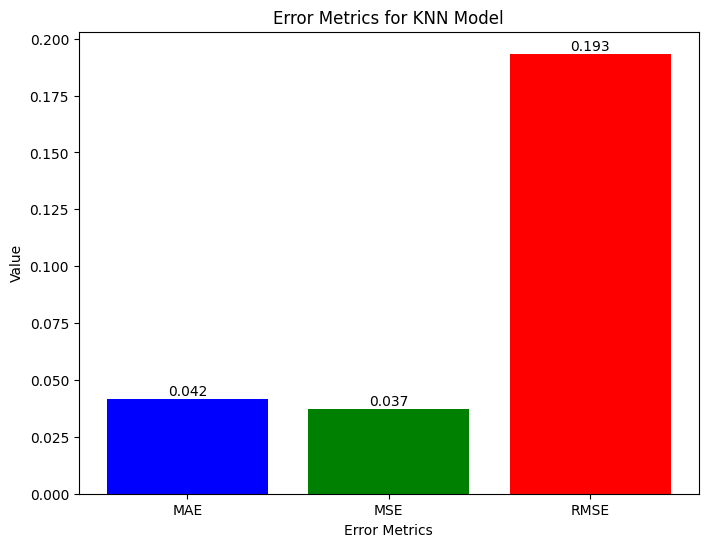

In [33]:
import matplotlib.pyplot as plt

# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_knn, mse_knn, rmse_knn]

# Plotting the graph
plt.figure(figsize=(8, 6))
#plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for KNN Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3), 
             ha='center', va='bottom', color='black')

# Save the figure
#plt.savefig('01_knn_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

These metrics are more appropriate for evaluating the performance of regression models predicting continuous values like ratings.

In [34]:
# Remmember in the simple dataset, predicting rating user item, r_user8_ml = np.dot(knn_sims,knn_ratings)/sum(knn_sims)
# rating dictionary
r = {}
# Display prediction results and calculate score
for prediction in predictions_knn_2[:15]:  # Displaying the first 15 predictions as an example
    # Calculate the score for each item
    r[prediction.iid] =round((prediction.est * 100) / 3,2) # p = model.predict(uid=user_id, r_ui=r_ui, iid=c) r[c] = (p[3]*100)/3. Change form predcition.est
    print(f"User {prediction.uid} rated Item {prediction.iid} with a true rating of {prediction.r_ui} and predicted rating of {float(prediction.est)} with score {r[prediction.iid]}")

User 1120491 rated Item BD0131EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 1590362 rated Item IT0101EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 1999970 rated Item SC0105EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 985429 rated Item DS0101EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 21709 rated Item ML0120ENv2 with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 904847 rated Item BC0101EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 1185467 rated Item SC0105EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 1127367 rated Item CO0301EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 1396069 rated Item DB0101EN with a true rating of 3.0 and predicted rating of 3.0 with score 100.0
User 1134090 rated Item DS0301EN with a true rating of 3.0 and pre

##### True actual rating
prediction.r_ui: This is used when you want to calculate a score based on the actual ratings the user has provided. However, since the goal is to predict ratings for unenrolled.

##### Estimated predicted rating
prediction.est: This is used when you want to calculate a score based on the model's prediction. This is the correct approach for predicting ratings for courses the user hasn't rated yet.


### Finding the correct prediction function
We are going to display the different results from the various functions we have created, including model.test() and model.predict()

Applying model.test()

In [35]:
# Define target users
target_users = [1078030, 733707, 674939,2057052]

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id)]
    
    print(f"\nPredictions for User {user_id}:")
    for prediction in user_predictions:
        try:
            print(f"Item {prediction.iid}, True Rating= {prediction.r_ui}, Predicted Rating= {prediction.est}")
        except KeyError:
            print(f"Item {prediction.iid}, No rating available")


Predictions for User 1078030:
Item ML0120ENv2, True Rating= 3.0, Predicted Rating= 3
Item ST0101EN, True Rating= 3.0, Predicted Rating= 3

Predictions for User 733707:
Item ML0120EN, True Rating= 3.0, Predicted Rating= 3
Item DS0101EN, True Rating= 3.0, Predicted Rating= 3
Item ST0101EN, True Rating= 3.0, Predicted Rating= 3
Item DB0151EN, True Rating= 3.0, Predicted Rating= 3
Item BD0141EN, True Rating= 3.0, Predicted Rating= 3

Predictions for User 674939:
Item BD0121EN, True Rating= 3.0, Predicted Rating= 3
Item BD0141EN, True Rating= 3.0, Predicted Rating= 3
Item BD0143EN, True Rating= 3.0, Predicted Rating= 3

Predictions for User 2057052:


#### Set score

In [36]:
# Define target users
target_users = [1078030, 733707, 674939,2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_knn_2:
    r[prediction.iid] = round((prediction.est * 100) / 3, 2)

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id)]
    
    print(f"\nPredictions for User {user_id}:")
    for prediction in user_predictions:
        try:
            print(f"Item {prediction.iid}: Score = {r[prediction.iid]}")
        except KeyError:
            print(f"Item {prediction.iid}: No score available")


Predictions for User 1078030:
Item ML0120ENv2: Score = 100.0
Item ST0101EN: Score = 100.0

Predictions for User 733707:
Item ML0120EN: Score = 100.0
Item DS0101EN: Score = 100.0
Item ST0101EN: Score = 100.0
Item DB0151EN: Score = 100.0
Item BD0141EN: Score = 100.0

Predictions for User 674939:
Item BD0121EN: Score = 100.0
Item BD0141EN: Score = 100.0
Item BD0143EN: Score = 100.0

Predictions for User 2057052:


In [37]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_knn_2:
    r[prediction.iid] = round((prediction.est * 100) / 3, 2)

# Initialize a list to store the results
results_list = []

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id)]
    
    for prediction in user_predictions:
        item_id = prediction.iid
        pred_rat = prediction.est
        #score = r[prediction.iid]
        try:
            score = r[item_id]
        except KeyError:
            score = "No score available"
        
        # Append the result to the list
        results_list.append({
            'User': user_id,
            'Item': item_id,
            'True_Rating': prediction.r_ui,
            'Prediction_Rating':pred_rat,
            'Score': score
        })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

results_df

User        Item  True_Rating  Prediction_Rating  Score
0  1078030  ML0120ENv2          3.0                  3  100.0
1  1078030    ST0101EN          3.0                  3  100.0
2   733707    ML0120EN          3.0                  3  100.0
3   733707    DS0101EN          3.0                  3  100.0
4   733707    ST0101EN          3.0                  3  100.0
5   733707    DB0151EN          3.0                  3  100.0
6   733707    BD0141EN          3.0                  3  100.0
7   674939    BD0121EN          3.0                  3  100.0
8   674939    BD0141EN          3.0                  3  100.0
9   674939    BD0143EN          3.0                  3  100.0

#### True rating audit (2)

In [38]:
import pandas as pd

# Example: Assuming predictions_knn_2 is a list of prediction objects
# from the KNN model with attributes uid (user ID), iid (item ID), r_ui (true rating), and est (predicted rating)

# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r
r = {}
#for prediction in predictions_knn_2:
    #if prediction.r_ui < 3:
        #r[prediction.iid] = round((prediction.est * 100) / 3, 2)

# Initialize a list to store the results
results_list = []

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id) or pred.r_ui < 3]
    
    for prediction in user_predictions:
        item_id = prediction.iid
        pred_rat = prediction.est
        r[item_id] = round((prediction.est * 100) / 3, 2)
        try:
            score = r[item_id]
        except KeyError:
            score = "No score available"
        
        # Append the result to the list
        results_list.append({
            'User': user_id,
            'Item': item_id,
            'True_Rating': prediction.r_ui,
            'Prediction_Rating': pred_rat,
            'Score': score
        })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

results_df


User      Item  True_Rating  Prediction_Rating  Score
0      1078030  DAI101EN          2.0           2.000000  66.67
1      1078030  CNSC02EN          2.0           2.953145  98.44
2      1078030  ML0103EN          2.0           2.953145  98.44
3      1078030  BD0212EN          2.0           2.600000  86.67
4      1078030  CB0103EN          2.0           2.953145  98.44
...        ...       ...          ...                ...    ...
13301  2057052  CB0103EN          2.0           2.953145  98.44
13302  2057052  BD0101EN          2.0           2.000000  66.67
13303  2057052  CL0101EN          2.0           2.953145  98.44
13304  2057052  CNSC02EN          2.0           2.000000  66.67
13305  2057052  CNSC02EN          2.0           2.953145  98.44

[13306 rows x 5 columns]

In [39]:
results_df.nunique()

User                   4
Item                  84
True_Rating            2
Prediction_Rating    174
Score                165
dtype: int64

In [40]:
results_df['True_Rating'].unique()

array([2., 3.])

#### Set treshold and handle NaN

In [41]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r
r = {}

# Initialize a list to store the results
results_list = []

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id) or pred.r_ui < 3]
    
    for pred in user_predictions:
        item_id = pred.iid
        pred_rat = pred.est
        
        # Replace NaN true ratings with 0
        true_rat = pred.r_ui if not np.isnan(pred.r_ui) else 0
        
        # Consider only predictions with true ratings < 3
        if true_rat < 3:
            r[item_id] = round((pred_rat * 100) / 3, 2)
            score = r.get(item_id, "No score available")
            
            # Append the result to the list only if the score is > 90
            if score > 90:
                r[item_id] = score
            # Append the result to the list
                results_list.append({
                    'User': user_id,
                    'Item': item_id,
                    'True_Rating': true_rat,
                    'Prediction_Rating': pred_rat,
                    'Score': score
                })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

results_df


User        Item  True_Rating  Prediction_Rating  Score
0      1078030    CNSC02EN          2.0           2.953145  98.44
1      1078030    ML0103EN          2.0           2.953145  98.44
2      1078030    CB0103EN          2.0           2.953145  98.44
3      1078030    DS0132EN          2.0           2.953145  98.44
4      1078030  ML0122ENv1          2.0           2.953145  98.44
...        ...         ...          ...                ...    ...
11347  2057052    ST0101EN          2.0           2.953145  98.44
11348  2057052    DS0101EN          2.0           2.953145  98.44
11349  2057052    CB0103EN          2.0           2.953145  98.44
11350  2057052    CL0101EN          2.0           2.953145  98.44
11351  2057052    CNSC02EN          2.0           2.953145  98.44

[11352 rows x 5 columns]

In [42]:
results_df.nunique()

User                  4
Item                 73
True_Rating           1
Prediction_Rating    33
Score                31
dtype: int64

In [43]:
results_df[results_df['User']==1078030].nunique()

User                  1
Item                 73
True_Rating           1
Prediction_Rating    33
Score                31
dtype: int64

In [44]:
results_df['True_Rating'].unique()

array([2.])

In [45]:
results_df[results_df['User']==2057052].nunique()

User                  1
Item                 73
True_Rating           1
Prediction_Rating    33
Score                31
dtype: int64

In [46]:
results_df['Score'].describe()

count    11352.000000
mean        98.380832
std          0.766094
min         90.740000
25%         98.440000
50%         98.440000
75%         98.440000
max        100.000000
Name: Score, dtype: float64

#### Try on unenrolled course instead based of audit (2)

In [47]:
## Preprocessing
### Load the data
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"

# This is course_genres file it is different from course_processed file (Course_ID Title Description)
course_df = pd.read_csv(course_genre_url)
course_df

COURSE_ID                                              TITLE  Database  \
0      ML0201EN  robots are coming  build iot apps with watson ...         0   
1      ML0122EN                accelerating deep learning with gpu         0   
2    GPXX0ZG0EN  consuming restful services using the reactive ...         0   
3      RP0105EN         analyzing big data in r using apache spark         1   
4    GPXX0Z2PEN  containerizing  packaging  and running a sprin...         0   
..          ...                                                ...       ...   
302  excourse89                       javascript  jquery  and json         0   
303  excourse90  programming foundations with javascript  html ...         0   
304  excourse91               front end web development with react         0   
305  excourse92                    introduction to web development         0   
306  excourse93           interactivity with javascript and jquery         0   

     Python  CloudComputing  DataAnalysis  Containers  MachineLearning  \
0         0               0             0           0                0   
1         1               0             0           0                1   
2         0               0             0           0                0   
3         0               0             1           0                0   
4         0               0             0           1                0   
..      ...             ...           ...         ...              ...   
302       0               0             0           0                0   
303       0               0             0           0                0   
304       0               0             0           0                0   
305       0               0             0           0                0   
306       0               0             0           0                0   

     ComputerVision  DataScience  BigData  Chatbot  R  BackendDev  \
0                 0            0        0        0  0           1   
1                 0            1        0        0  0           0   
2                 0            0        0        0  0           1   
3                 0            0        1        0  1           0   
4                 0            0        0        0  0           1   
..              ...          ...      ...      ... ..         ...   
302               0            0        0        0  0           1   
303               0            0        0        0  0           1   
304               0            0        0        0  0           0   
305               0            0        0        0  0           1   
306               0            0        0        0  0           1   

     FrontendDev  Blockchain  
0              1           0  
1              0           0  
2              1           0  
3              0           0  
4              0           0  
..           ...         ...  
302            1           0  
303            1           0  
304            1           0  
305            1           0  
306            1           0  

[307 rows x 16 columns]

In [48]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_desc_df = pd.read_csv(course_url)
course_desc_df

COURSE_ID                                              TITLE  \
0      ML0201EN  robots are coming  build iot apps with watson ...   
1      ML0122EN                accelerating deep learning with gpu   
2    GPXX0ZG0EN  consuming restful services using the reactive ...   
3      RP0105EN         analyzing big data in r using apache spark   
4    GPXX0Z2PEN  containerizing  packaging  and running a sprin...   
..          ...                                                ...   
302  excourse89                       javascript  jquery  and json   
303  excourse90  programming foundations with javascript  html ...   
304  excourse91               front end web development with react   
305  excourse92                    introduction to web development   
306  excourse93           interactivity with javascript and jquery   

                                           DESCRIPTION  
0    have fun with iot and learn along the way  if ...  
1    training complex deep learning models with lar...  
2    learn how to use a reactive jax rs client to a...  
3    apache spark is a popular cluster computing fr...  
4    learn how to containerize  package  and run a ...  
..                                                 ...  
302  in this course  we ll look at the javascript l...  
303  learn foundational programming concepts  e g  ...  
304  this course explores javascript based front en...  
305  this course is designed to start you on a path...  
306  this course is the third in our javascript for...  

[307 rows x 3 columns]

There are 307 courses offered with 14 genres

#### Recommending the unenrolled courses

In [49]:
enrolled_courses_user1 = ratings_df[ratings_df['user'] == 1078030]['item'].to_list()
enrolled_courses_user1 = set(enrolled_courses_user1)

In [50]:
enrolled_courses_user1

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

In [51]:
ratings_df[ratings_df['user'] == 2057052]['rating']

94400    2.0
Name: rating, dtype: float64

In [52]:
enrolled_courses_user2 = ratings_df[ratings_df['user'] == 2057052]['item'].to_list()
enrolled_courses_user2 = set(enrolled_courses_user2)

In [53]:
enrolled_courses_user2

{'DS0132EN'}

In [54]:
ratings_df[ratings_df['user'] == 2057052]

user      item  rating
94400  2057052  DS0132EN     2.0

Enrolled courses are those with ranks 2 and 3, while unenrolled courses include all others

In [55]:
all_courses = set(course_df['COURSE_ID'].values)
all_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01

In [56]:
unknown_courses_user1 = all_courses.difference(enrolled_courses_user1)
unknown_courses_user1

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

Another coding

In [57]:
unknown_courses_user1 = all_courses - enrolled_courses_user1
unknown_courses_user1 

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

### Creating several knn_predict functions

#### Function 1, Applying prediction_knn_2 with unenrolled courses

In [58]:
def knn_predict(target_users, ratings_df, course_df, predictions_knn_2):
    """
    Returns predicted course ratings for active user's unenrolled courses using precomputed predictions.
    
    Parameters:
        target_users       : A list of target user IDs.
        ratings_df         : A dataframe of user-item-rating data.
        course_df          : A dataframe containing course information.
        predictions_knn_2  : Precomputed predictions from the KNN model.
    
    Returns:
        results_df         : A dataframe with user, course_ID, predicted rating, and score.
    """
    
    # Initialize an empty list to store results
    results_list = []
    
    # Get the list of all course IDs
    all_courses = set(course_df['COURSE_ID'].values)
    
    # Convert predictions to a dictionary for quick lookup
    #predictions_dict = {(int(pred.uid), pred.iid): pred.est for pred in predictions_knn_2}
   
    
    # Iterate over all target users
    for user_id in target_users:
        # Display predictions for the specified users
        user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id)]
        # Get the list of enrolled courses for the user
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())
        
        # Get the list of unenrolled courses for the user
        unenrolled_courses = all_courses - enrolled_courses
        
        for pred in user_predictions:
            item_id = pred.iid
            pred_rat = pred.est
            
            # Iterate over all unenrolled courses
            for course_id in unenrolled_courses:
                # Predict the rating using the precomputed predictions
                if prediction is not None:
                    r[pred.iid] = round((pred_rat * 100) / 3, 2)
                    score = r.get(item_id, "No score available")
                
                    # Append to results list
                    results_list.append({
                        'User': user_id,
                        'Course_ID': course_id,
                        'Predicted_Rating': pred.est,
                        'Score': score
                    })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by User and Score in descending order
    results_df = results_df.sort_values(by=['User', 'Score'], ascending=False).reset_index(drop=True)
    
    return results_df

In [59]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Get predictions for unenrolled courses
predictions = knn_predict(target_users, ratings_df, course_df, predictions_knn_2)
predictions

# Key  Error : User

User   Course_ID  Predicted_Rating  Score
0     1078030  excourse73                 3  100.0
1     1078030    PA0107EN                 3  100.0
2     1078030  excourse23                 3  100.0
3     1078030  GPXX0NHZEN                 3  100.0
4     1078030  GPXX0XFQEN                 3  100.0
...       ...         ...               ...    ...
2889   674939  GPXX04HEEN                 3  100.0
2890   674939  GPXX05P1EN                 3  100.0
2891   674939  excourse55                 3  100.0
2892   674939    EE0101EN                 3  100.0
2893   674939  GPXX0M7ZEN                 3  100.0

[2894 rows x 4 columns]

#### Function 2 Applying model.predict() with unenrolled courses (apply list instead of set)
enrolled courses are not defined in function

In [60]:

def knn_predict(enrolled_courses, target_users, ratings_df, course_df):
    """
    Returns predicted course ratings for active user's unenrolled courses.
    
    Parameters:
        model               : A trained KNNBasic model from the surprise library.
        enrolled_courses    : A list of courses that the user has already enrolled in.
        target_users        : A list of target user IDs.
        ratings_df          : A dataframe of user-item-rating data.
        course_df           : A dataframe containing course information.
    
    Returns:
        results_df          : A dictionary with key: value pairs representing course_ID: predicted rating.
    """
    
    # Initialize an empty dictionary for predictions
    #r = {}
    # Initialize an empty list to store results
    results_list = []
    
    # Load the data into the trainset
    #trainset = course_dataset.build_full_trainset() 
    # Fit the model on the trainset
    #model.fit(trainset)
    
    # Get the list of enrolled courses (where rating is 3)
    #enrolled_courses = ratings_df[ratings_df['rating'] == 3]['item'].tolist() 
    
    # Get the list of all course IDs
    all_courses = course_df['COURSE_ID'].tolist()
    
    # Iterate over all target users
    for user_id in target_users:
        # Iterate over all courses, c = course id = item id
        for c in all_courses:
            # Check if the course is not in the list of enrolled_courses
            if c not in enrolled_courses:
                # Retrieve the rating the user has given to the course
                user_ratings = ratings_df[(ratings_df['user'] == user_id) & (ratings_df['item'] == c)]
                r_ui = user_ratings.iloc[0]['rating'] if not user_ratings.empty else np.nan
                
                # Predict the rating using the KNN model
                prediction = model.predict(uid=user_id, iid=c, r_ui=r_ui) # prediction = prediction.prediction_knn_2(uid=user_id, iid=c, r_ui=r_ui)
                r[c] = round((prediction.est * 100) / 3, 2)
                
                # Append to results list
                results_list.append({
                        'User': user_id,
                        'Course_ID': c,
                        'Predicted_Rating': prediction.est,
                        'Score': score
                })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by Score in descending order
    results_df = results_df.sort_values(by='Score', ascending=False).reset_index(drop=True)
    
    return results_df
    
    # Sort dictionary by predicted rating 
    #r = {k: v for k, v in sorted(r.items(), key=lambda item: item[1], reverse=True)}
    
    #return r

enrolled courses equal to 3

In [61]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]
enrolled_courses = ratings_df[ratings_df['rating'] == 3]['item'].tolist()

# Get predictions for unenrolled courses
predictions = knn_predict(enrolled_courses,target_users, ratings_df, course_df)
predictions

User   Course_ID  Predicted_Rating  Score
0    1078030  GPXX0ZG0EN          2.953145  98.44
1     674939  excourse31          2.953145  98.44
2     674939  excourse21          2.953145  98.44
3     674939  excourse22          2.953145  98.44
4     674939  excourse23          2.953145  98.44
..       ...         ...               ...    ...
795   733707  GPXX06KEEN          2.953145  98.44
796   733707  GPXX0YBFEN          2.953145  98.44
797   733707  GPXX0KHHEN          2.953145  98.44
798   733707  GPXX04P5EN          2.953145  98.44
799  2057052  excourse93          2.953145  98.44

[800 rows x 4 columns]

adding title

In [62]:
def knn_predict(enrolled_courses, target_users, ratings_df, course_df):
    """
    Returns predicted course ratings for active user's unenrolled courses.
    
    Parameters:
        target_users        : A list of target user IDs.
        ratings_df          : A dataframe of user-item-rating data.
        course_df           : A dataframe containing course information.
        model               : A trained KNNBasic model from the surprise library.
    
    Returns:
        results_df          : A dataframe with columns ['User', 'Course_ID', 'Score'].
    """
    
    # Initialize an empty list to store results
    results_list = []

    # Get the list of enrolled courses (where rating is 3)
    #enrolled_courses = ratings_df[ratings_df['rating'] == 3]['item'].tolist()
    
    # Get the list of all course IDs
    all_courses = course_df['COURSE_ID'].tolist()
    
    # Iterate over all target users
    for user_id in target_users:
        # Iterate over all courses, c = course id = item id
        for c in all_courses:
            # Check if the course is not in the list of enrolled_courses
            if c not in enrolled_courses:
                # Retrieve the rating the user has given to the course
                user_ratings = ratings_df[(ratings_df['user'] == user_id) & (ratings_df['item'] == c)]
                r_ui = user_ratings.iloc[0]['rating'] if not user_ratings.empty else np.nan
                
                # Retrieve title from course_df
                title = course_df[course_df['COURSE_ID'] == c]['TITLE'].values[0] #if 'TITLE' in courses_df.columns else 'N/A'
                
                # Predict the rating using the KNN model
                prediction = model.predict(uid=user_id, iid=c, r_ui=r_ui) # prediction = prediction.prediction_knn_2(uid=user_id, iid=c, r_ui=r_ui)
                score = round((prediction.est * 100) / 3, 2)
                
                # Append to results list
                results_list.append({
                    'User': user_id,
                    'Course_ID': c,
                    'Title' : title,
                    'Score': score
                })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list, columns=['User', 'Course_ID', 'Title', 'Score'])
    
    # Sort DataFrame by Score in descending order
    results_df = results_df.sort_values(by=['User','Score'], ascending=False).reset_index(drop=True)
    
    return results_df


enrolled courses 2 and 3 include

In [63]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]
enrolled_courses = ratings_df[ratings_df['rating'] <= 3]['item'].tolist()

# Get predictions for unenrolled courses
predictions = knn_predict(enrolled_courses, target_users, ratings_df, course_df)
predictions

User   Course_ID                                              Title  \
0    2057052  GPXX0ZG0EN  consuming restful services using the reactive ...   
1    2057052  GPXX0Z2PEN  containerizing  packaging  and running a sprin...   
2    2057052  GPXX0FTCEN  learn how to use docker containers for iterati...   
3    2057052  GPXX06RFEN                 create your first mongodb database   
4    2057052  GPXX0SDXEN  testing microservices with the arquillian mana...   
..       ...         ...                                                ...   
719   674939  excourse89                       javascript  jquery  and json   
720   674939  excourse90  programming foundations with javascript  html ...   
721   674939  excourse91               front end web development with react   
722   674939  excourse92                    introduction to web development   
723   674939  excourse93           interactivity with javascript and jquery   

     Score  
0    98.44  
1    98.44  
2    98.44  
3    98.44  
4    98.44  
..     ...  
719  98.44  
720  98.44  
721  98.44  
722  98.44  
723  98.44  

[724 rows x 4 columns]

In [64]:
predictions.nunique()

User           4
Course_ID    181
Title        176
Score          1
dtype: int64

In [65]:
predictions[predictions['User']==1078030].nunique()

User           1
Course_ID    181
Title        176
Score          1
dtype: int64

In [66]:
predictions[predictions['User']==2057052].nunique()

User           1
Course_ID    181
Title        176
Score          1
dtype: int64

In [67]:
#rec_merge_df = pd.merge(results_df, course_df[['COURSE_ID','TITLE']], how='left', left_on='Item', right_on='COURSE_ID')
# Drop unnecessary columns
#rec_merge_df = rec_merge_df.drop(['COURSE_ID'], axis=1)
#rec_merge_df

#### Function 3 Applying model.predict() with unenrolled courses (apply set)

In [68]:
def knn_predict(target_users, ratings_df, courses_df):
    """
    Returns predicted course ratings for active user's unenrolled courses.
    
    Parameters:
        target_users        : A list of target user IDs.
        ratings_df          : A dataframe of user-item-rating data.
        courses_df          : A dataframe containing course information.
        model               : A trained KNNBasic model from the surprise library.
    
    Returns:
        results_df          : A dataframe containing user IDs, course IDs, predicted ratings, scores, and titles.
    """
    
    # Initialize an empty dictionary for predictions
    results_list = []

    # Get the list of all course IDs
    all_courses = set(courses_df['COURSE_ID'].values)
    
    # Iterate over all target users
    for user_id in target_users:
        # Get the list of enrolled courses for the user
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())
        
        # Identify unenrolled courses
        unenrolled_courses = all_courses - enrolled_courses
        
        # Iterate over all unenrolled courses, c = course id = item id
        for c in unenrolled_courses:
            # Predict the rating using the KNN model
            prediction = model.predict(uid=user_id, iid=c)
            score = round((prediction.est * 100) / 3, 2)
            
            # Retrieve title from course_df
            title = courses_df[courses_df['COURSE_ID'] == c]['TITLE'].values[0] #if 'TITLE' in courses_df.columns else 'N/A'
            
            # Append to results list
            results_list.append({
                'User': user_id,
                'Course_ID': c,
                'Predicted_Rating': prediction.est,
                'Score': score,
                'Title': title
            })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by Score in descending order
    results_df = results_df.sort_values(by=['User','Score'], ascending=False).reset_index(drop=True)
    
    return results_df

In [69]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Get predictions for unenrolled courses
predictions = knn_predict(target_users, ratings_df, course_df)
predictions

User   Course_ID  Predicted_Rating  Score  \
0     2057052  excourse73          2.953145  98.44   
1     2057052    PA0107EN          2.953145  98.44   
2     2057052    ST0101EN          2.953145  98.44   
3     2057052  excourse23          2.953145  98.44   
4     2057052  GPXX0NHZEN          2.953145  98.44   
...       ...         ...               ...    ...   
1176   674939  GPXX04HEEN          2.953145  98.44   
1177   674939  GPXX05P1EN          2.953145  98.44   
1178   674939  excourse55          2.953145  98.44   
1179   674939    EE0101EN          2.953145  98.44   
1180   674939  GPXX0M7ZEN          2.953145  98.44   

                                                  Title  
0                           analyzing big data with sql  
1         predicting financial performance of a company  
2                                        statistics 101  
3                            data analysis using python  
4     normalization   keys   constraints in relation...  
...                                                 ...  
1176  insurance business modelling and basic actuari...  
1177  acknowledging messages using microprofile reac...  
1178           advanced computer vision with tensorflow  
1179                   modernizing java ee applications  
1180  consuming a restful java web service using jso...  

[1181 rows x 5 columns]

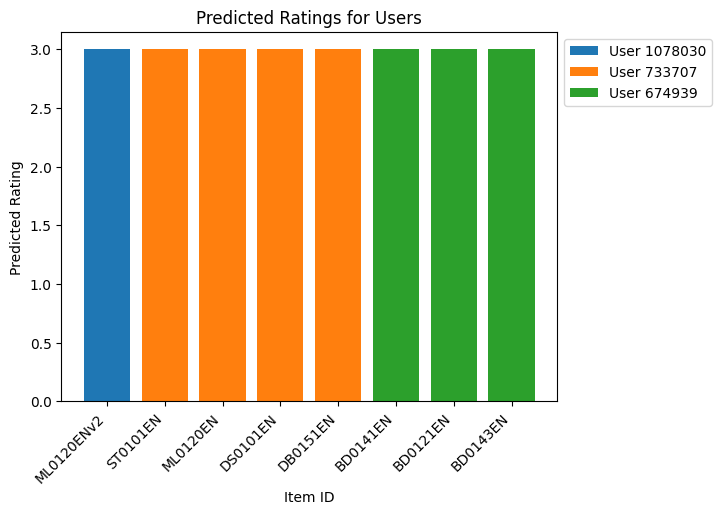

In [70]:
from matplotlib import pyplot as plt
# Function to get predicted ratings for a user
def get_user_predictions(predictions_knn_2, user_id):
    return [(pred.iid, pred.est) for pred in predictions_knn_2 if pred.uid == str(user_id)]

# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Display predictions in a bar chart
for user_id in target_users:
    user_predictions = get_user_predictions(predictions_knn_2, user_id)
    
    # Check if there are predictions for the user
    if user_predictions:
        # Separate item IDs and predicted ratings
        item_ids, predicted_ratings = zip(*user_predictions)
        
        # Create a bar chart
        plt.bar(item_ids, predicted_ratings, label=f'User {user_id}')

# Add labels and legend
plt.xlabel('Item ID')
plt.ylabel('Predicted Rating')
plt.title('Predicted Ratings for Users')

# Rotate x-labels by 45 degrees
plt.xticks(rotation=45, ha='right')
# Set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot to a file (choose the format you prefer, e.g., PNG, PDF, SVG)
#plt.savefig('02_predicted_ratings_plot_knn.png', bbox_inches='tight')

# Show the plot
plt.show()

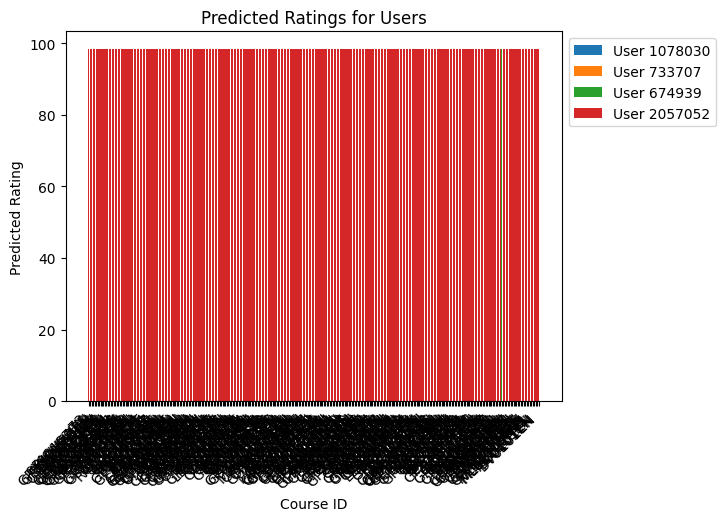

In [71]:
def get_user_predictions(results_df, user_id):
    """
    Returns predicted ratings for a user.
    
    Parameters:
        results_df : A dataframe containing prediction results.
        user_id    : The ID of the user.
    
    Returns:
        A list of tuples containing item IDs and predicted ratings for the user.
    """
    user_predictions = results_df[results_df['User'] == user_id]
    return list(zip(user_predictions['Course_ID'], user_predictions['Score']))


# Get predictions for unenrolled courses
results_df = knn_predict(target_users, ratings_df, course_df)

# Display predictions in a bar chart
for user_id in target_users:
    user_predictions = get_user_predictions(results_df, user_id)
    
    # Check if there are predictions for the user
    if user_predictions:
        # Separate item IDs and predicted ratings
        item_ids, predicted_ratings = zip(*user_predictions)
        
        # Create a bar chart
        plt.bar(item_ids, predicted_ratings, label=f'User {user_id}')

# Add labels and legend
plt.xlabel('Course ID')
plt.ylabel('Predicted Rating')
plt.title('Predicted Ratings for Users')

# Rotate x-labels by 45 degrees
plt.xticks(rotation=45, ha='right')
# Set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot to a file (choose the format you prefer, e.g., PNG, PDF, SVG)
#plt.savefig('02_predicted_ratings_plot_knn.png', bbox_inches='tight')

# Show the plot
plt.show()

**We do not compute ROC AUC since the regression task is not suitable for ROC curve analysis** due to the nature of the problem. Instead, we focus on evaluating the model using classification metrics suitable for the binary classification approach applied to the regression problem.

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">

<ol>
    <li>As we can see the different iterations will yield different results to the function that we are creating which imply the quality of the recommendations
</ol>
     Comparing the model.test() and model.predict(), both methods have their merits, <mark style="background-color: #49A9F9;">model.test()</mark>is generally more useful for <mark style="background-color: #49A9F9;">model development, evaluation, and ensuring generalizability</mark>. <mark style="background-color: #49A9F9;">model.predict() can be advantageous for final model deployment in a production environment</mark>.
    <br><br>
    <mark style="background-color: #49A9F9;">Note:</mark> The RMSE results may differ after the notebook is saved because the notebook will re-run the process during the saving operation.
</div>

## Implementation Option 2: Use `numpy`, `pandas`, and `sklearn`
If you do not prefer the one-stop Suprise solution and want more hardcore coding practices, you may implement the KNN model using `numpy`, `pandas`, and possibly `sklearn`:

More hardcore coding practices: This implies a preference for implementing the KNN model from scratch using lower-level libraries such as NumPy and pandas for data manipulation, and possibly using scikit-learn for additional functionality like data preprocessing or evaluation metrics. This approach involves a deeper understanding of the algorithm and requires more manual coding compared to using high-level libraries like Suprise.

In [72]:
# Import the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity  

# Create a user-item matrix
user_item_matrix = ratings_df.pivot(index='user', columns='item', values='rating').fillna(0)

# Compute cosine similarity between users
user_sim_matrix = cosine_similarity(user_item_matrix)
np.fill_diagonal(user_sim_matrix, 0)  # Fill diagonal with zeros for similarity with itself

In [73]:
# Predict ratings
#def predict_ratings(user_sim_matrix, user_item_matrix):
    #user_item_matrix_np = user_item_matrix.values  # Convert to numpy array
    #mean_user_rating = user_item_matrix.mean(axis=1)
    #ratings_diff = (user_item_matrix - mean_user_rating[:, np.newaxis])
    #pred = mean_user_rating[:, np.newaxis] + user_sim_matrix.dot(ratings_diff) / np.array([np.abs(user_sim_matrix).sum(axis=1)]).T
    #return pred

In [74]:
# Predict scores
def predict_scores(user_sim_matrix, user_item_matrix):
    user_item_matrix_np = user_item_matrix.values  # Convert to numpy array
    mean_user_rating = user_item_matrix_np.mean(axis=1)
    ratings_diff = user_item_matrix_np - mean_user_rating[:, np.newaxis]
    pred_ratings = mean_user_rating[:, np.newaxis] + user_sim_matrix.dot(ratings_diff) / np.array([np.abs(user_sim_matrix).sum(axis=1)]).T
    
    # Ensure no negative scores
    pred_ratings[pred_ratings < 0] = 0
    
    pred_scores = np.round((pred_ratings * 100) / 3, 2)  # Apply the score formula
    return pred_scores

score_predictions = predict_scores(user_sim_matrix, user_item_matrix)

In [75]:
# Initialize a list to store the results
results_list = []

# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Map user IDs to DataFrame index
user_id_to_index = {user_id: idx for idx, user_id in enumerate(user_item_matrix.index)}

for user_id in target_users:
    if user_id in user_id_to_index:
        user_index = user_id_to_index[user_id]
        user_scores = score_predictions[user_index]

        for item_id, score in zip(user_item_matrix.columns, user_scores):
            if score > 50:  # Apply the threshold
                results_list.append({
                    'User ID': user_id,
                    'Item ID': item_id,
                    'Score': score
                })
    #else:
        #print(f"User ID {user_id} not found in the user-item matrix.")

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Sort the DataFrame first by 'User ID' and then by 'Score' in descending order
results_df = results_df.sort_values(by=['User ID', 'Score'], ascending=[True, False]).reset_index(drop=True)

# Sort the DataFrame by 'Score' in descending order but keep 'User ID' order
#results_df['User Order'] = results_df['User ID'].rank(method='first')
#results_df = results_df.sort_values(by=['User Order', 'Score'], ascending=[True, False]).drop(columns='User Order')

results_df

User ID     Item ID  Score
0    674939    BD0101EN  83.82
1    674939    BD0111EN  81.76
2    674939    BD0211EN  64.45
3    733707    BD0101EN  72.38
4    733707    PY0101EN  70.82
5    733707    DS0101EN  68.13
6    733707    BD0111EN  64.88
7    733707    BD0211EN  51.13
8   1078030    PY0101EN  81.28
9   1078030    DA0101EN  57.46
10  1078030    DS0101EN  52.51
11  1078030  ML0101ENv3  52.47
12  2057052    DS0132EN  66.39

In [76]:
rec_merge_df = pd.merge(results_df, course_df[['COURSE_ID','TITLE']], how='left', left_on='Item ID', right_on='COURSE_ID')
# Drop unnecessary columns
rec_merge_df = rec_merge_df.drop(['COURSE_ID'], axis=1)
rec_merge_df

User ID     Item ID  Score                              TITLE
0    674939    BD0101EN  83.82                       big data 101
1    674939    BD0111EN  81.76                         hadoop 101
2    674939    BD0211EN  64.45               spark fundamentals i
3    733707    BD0101EN  72.38                       big data 101
4    733707    PY0101EN  70.82            python for data science
5    733707    DS0101EN  68.13       introduction to data science
6    733707    BD0111EN  64.88                         hadoop 101
7    733707    BD0211EN  51.13               spark fundamentals i
8   1078030    PY0101EN  81.28            python for data science
9   1078030    DA0101EN  57.46          data analysis with python
10  1078030    DS0101EN  52.51       introduction to data science
11  1078030  ML0101ENv3  52.47       machine learning with python
12  2057052    DS0132EN  66.39  data   ai  jumpstart your journey

<mark style="background-color: #49A9F9;">This exercise has not yet applied unenrolled courses.</mark> As seen in the above dataframe, the item IDs or course IDs for users 1078030 and 2057052 correspond to the enrolled courses

In [77]:
from sklearn.metrics import mean_squared_error
# Function to predict ratings
def predict_ratings(user_sim_matrix, user_item_matrix):
    mean_user_rating = user_item_matrix.mean(axis=1)
    ratings_diff = user_item_matrix - mean_user_rating.values.reshape(-1, 1)
    pred_ratings = mean_user_rating.values.reshape(-1, 1) + user_sim_matrix.dot(ratings_diff) / np.array([np.abs(user_sim_matrix).sum(axis=1)]).T
    return pred_ratings

# Predict ratings
pred_ratings = predict_ratings(user_sim_matrix, user_item_matrix)

# Flatten true and predicted ratings
true_ratings = user_item_matrix.values[user_item_matrix.values.nonzero()].flatten()
pred_ratings_flat = pred_ratings[user_item_matrix.values.nonzero()].flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_flat))
print(f"RMSE: {rmse}")

RMSE: 1.9627240365223502


### KNN Classification
If we used KNN classification, consider the prediction problem as a classification problem as rating only has two categorical values (`Audit` vs. `Completion`).

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []
#auc = []

# Initialize KNNBasic algorithm
#knn_bas = KNNBasic()

# Train the algorithm on the trainset
#knn_bas.fit(trainset)

# Predict ratings for the testset
#predictions_knn_2 = knn_bas.test(testset)

# Convert predictions to binary labels using a completion (e.g., 3)
completion = 3
y_true = [1 if pred.r_ui >= completion else 0 for pred in predictions_knn_2]
y_pred = [1 if pred.est >= completion else 0 for pred in predictions_knn_2]

# Compute Accuracy
accuracy = accuracy_score(y_true, y_pred)
accuracy_list.append(accuracy)

# Compute Precision
precision = precision_score(y_true, y_pred)  # Requires labels for binary classification
precision_list.append(precision)

# Compute Recall
recall = recall_score(y_true, y_pred)  # Requires labels for binary classification
recall_list.append(recall)

# Compute F1-Score
f1 = f1_score(y_true, y_pred)
f1_score_list.append(f1)

# Compute AUC (ROC curve is not meaningful for regression, but we can compute AUC for the precision-recall curve)
#auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
#print(f"AUC: {auc}")

# Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_score_list,
})    
metrics_df

Accuracy: 0.968667847754029
Precision: 0.9985308899713911
Recall: 0.9685306293874123
F1-Score: 0.9833019880761119


Accuracy  Precision    Recall  F1-Score
0  0.968668   0.998531  0.968531  0.983302

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
    Previously, we created the binary classification after applying the model algorithm in the y_true and y_pred data. Let’s explore the impact on metrics by changing the ranking in the dataset before training and constructing the model.</div>

### Data to Binary

In [79]:
from sklearn.preprocessing import LabelEncoder

ratings_df_1 = ratings_df.copy()
# Transform ratings using LabelEncoder
label_encoder = LabelEncoder()
ratings_df_1['rating'] = label_encoder.fit_transform(ratings_df_1['rating'])

# Convert the 'rating' column to float
ratings_df_1['rating'] = ratings_df_1['rating'].astype(float)

# Save to CSV
ratings_df_1.to_csv("course_ratings_1.csv", index=False)

ratings_df_1.head()

# Read the course rating dataset with columns user item rating
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(0.0, 1.0))

course_dataset_1 = Dataset.load_from_file("course_ratings_1.csv", reader=reader)

# sample random trainset and testset
# test set is made of 30% of the ratings of the course dataset.
trainset_1, testset_1 = train_test_split(course_dataset_1, test_size=.3)
print(f"Total {trainset_1.n_users} users and {trainset_1.n_items} items in the trainingset")


Total 31292 users and 124 items in the trainingset


In [80]:
%%time
#knn_bas = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
#knn_bas.fit(trainset_1)
#predictions_knn_3 = knn_bas.test(testset_1)

# Then compute RMSE
#accuracy.rmse(predictions_knn_3)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
    We encountered a memory issue in the code above, so we disabled it and continued with the data from previous (predict_knn_2), rather than using the later data (predict_knn_3).</div>

## Continue (with predict_knn_2)

We have determined the Y_true and Y_pred

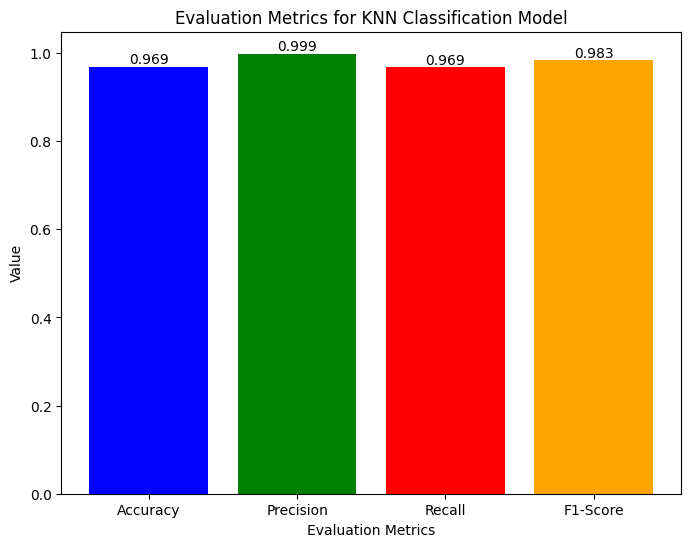

In [81]:
# List of evaluation metrics
eva_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Corresponding values
eva_values = [accuracy, precision, recall, f1]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(eva_metrics, eva_values, color=['blue', 'green', 'red', 'orange'])

# Adding labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics for KNN Classification Model')

# Adding y-values on the bars
for bar, value in zip(bars, eva_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3), 
             ha='center', va='bottom', color='black')

# Save the figure
#plt.savefig('03_knn_clf_evaluation_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute MAE, MSE, RMSE
mae_knn_clf = mean_absolute_error(y_true, y_pred)
mse_knn_clf = mean_squared_error(y_true, y_pred)
rmse_knn_clf = np.sqrt(mse_knn_clf)

print(f"MAE: {mae_knn_clf}")
print(f"MSE: {mse_knn_clf}")
print(f"RMSE: {rmse_knn_clf}")

MAE: 0.03133215224597097
MSE: 0.03133215224597097
RMSE: 0.17700890442565584


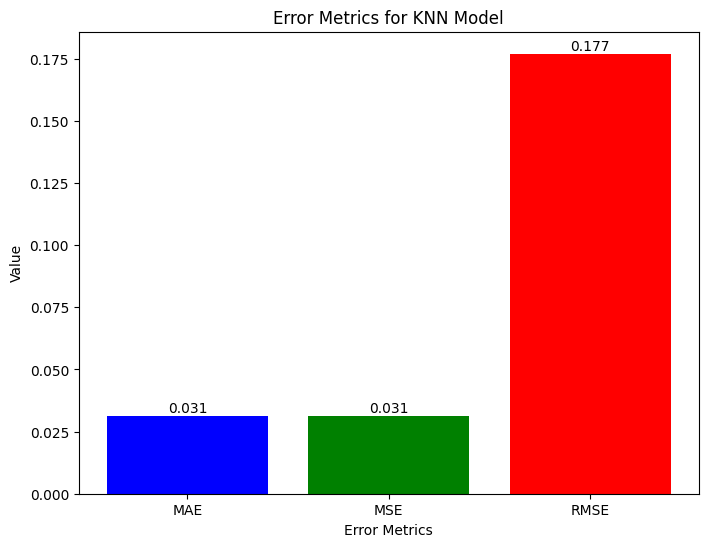

In [83]:
# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_knn_clf, mse_knn_clf, rmse_knn_clf]

# Plotting the graph
plt.figure(figsize=(8, 6))
#plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for KNN Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3), 
             ha='center', va='bottom', color='black')

# Save the figure
#plt.savefig('04_knn_clf_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

In classification, we use metrics like accuracy, precision, recall, and F1-score to evaluate the performance of the model in predicting categorical labels.
In regression, we use metrics like MAE, MSE, and RMSE to evaluate the performance of the model in predicting continuous values.

In [84]:
r = {}
# Display prediction results and calculate score
for prediction in predictions_knn_2[:15]:  # Displaying the first 15 predictions as an example
    # Calculate the score for each item
    r[prediction.iid] =round((prediction.est * 100) / 3,2) # p = model.predict(uid=user_id, r_ui=r_ui, iid=c) r[c] = (p[3]*100)/3
    print(f"User {prediction.uid} rated Item {prediction.iid} with a true rating of {prediction.r_ui} and score{prediction.est} with score {r[prediction.iid]}")

User 1120491 rated Item BD0131EN with a true rating of 3.0 and score3 with score 100.0
User 1590362 rated Item IT0101EN with a true rating of 3.0 and score3 with score 100.0
User 1999970 rated Item SC0105EN with a true rating of 3.0 and score3 with score 100.0
User 985429 rated Item DS0101EN with a true rating of 3.0 and score3 with score 100.0
User 21709 rated Item ML0120ENv2 with a true rating of 3.0 and score3 with score 100.0
User 904847 rated Item BC0101EN with a true rating of 3.0 and score3 with score 100.0
User 1185467 rated Item SC0105EN with a true rating of 3.0 and score3 with score 100.0
User 1127367 rated Item CO0301EN with a true rating of 3.0 and score3 with score 100.0
User 1396069 rated Item DB0101EN with a true rating of 3.0 and score3 with score 100.0
User 1134090 rated Item DS0301EN with a true rating of 3.0 and score3 with score 100.0
User 1758884 rated Item DS0110EN with a true rating of 3.0 and score2.95 with score 98.33
User 575808 rated Item TMP0105EN with a tr

In [85]:
# Threshold value
#completion = 3

# Convert predictions to binary labels
#y_true= [1 if pred.r_ui >= completion else 0 for pred in predictions_knn_2]
#y_pred = [1 if pred.est >= completion else 0 for pred in predictions_knn_2]

# Display prediction results
for prediction, true_label, pred_label in zip(predictions_knn_2[:15], y_true[:15], y_pred[:15]):
    print(f"User {prediction.uid} rated Item {prediction.iid} with a true rating of {prediction.r_ui}, predicted rating of {prediction.est} with score {r[prediction.iid]}.")
    print(f"True label: {true_label}, Predicted label: {pred_label}")

User 1120491 rated Item BD0131EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1590362 rated Item IT0101EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1999970 rated Item SC0105EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 985429 rated Item DS0101EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 21709 rated Item ML0120ENv2 with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 904847 rated Item BC0101EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1185467 rated Item SC0105EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1127367 rated Item CO0301EN with a true rating of 3.0, pred

In [86]:
# Define target users
target_users = [1078030, 733707, 674939,2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_knn_2:
    r[prediction.iid] = round((pred_label * 100) / 1, 2)

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id)]
    
    print(f"\nPredictions for User {user_id}:")
    for prediction in user_predictions:
        try:
            print(f"Item {prediction.iid}: Score = {r[prediction.iid]}")
        except KeyError:
            print(f"Item {prediction.iid}: No score available")


Predictions for User 1078030:
Item ML0120ENv2: Score = 100.0
Item ST0101EN: Score = 100.0

Predictions for User 733707:
Item ML0120EN: Score = 100.0
Item DS0101EN: Score = 100.0
Item ST0101EN: Score = 100.0
Item DB0151EN: Score = 100.0
Item BD0141EN: Score = 100.0

Predictions for User 674939:
Item BD0121EN: Score = 100.0
Item BD0141EN: Score = 100.0
Item BD0143EN: Score = 100.0

Predictions for User 2057052:


In [87]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_knn_2:
    r[prediction.iid] = round((pred_label * 100) / 1, 2)

#for prediction, pred_label in zip(predictions_knn_2, y_pred):
    #r[prediction.iid] = round((pred_label * 100) / 1, 2)

# Initialize a list to store the results
results_list = []

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_knn_2 if pred.uid == str(user_id)]
    
    for prediction in user_predictions:
        item_id = prediction.iid
        pred_rat = pred_label
        #score = r[prediction.iid]
        try:
            score = r[item_id]
        except KeyError:
            score = "No score available"
        
        # Append the result to the list
        results_list.append({
            'User': user_id,
            'Item': item_id,
            'Prediction_Label':pred_rat,
            'Score': score
        })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

results_df

User        Item  Prediction_Label  Score
0  1078030  ML0120ENv2                 1  100.0
1  1078030    ST0101EN                 1  100.0
2   733707    ML0120EN                 1  100.0
3   733707    DS0101EN                 1  100.0
4   733707    ST0101EN                 1  100.0
5   733707    DB0151EN                 1  100.0
6   733707    BD0141EN                 1  100.0
7   674939    BD0121EN                 1  100.0
8   674939    BD0141EN                 1  100.0
9   674939    BD0143EN                 1  100.0

In [88]:
rec_merge_df = pd.merge(results_df, course_df[['COURSE_ID','TITLE']], how='left', left_on='Item', right_on='COURSE_ID')
# Drop unnecessary columns
rec_merge_df = rec_merge_df.drop(['COURSE_ID'], axis=1)
rec_merge_df

User        Item  Prediction_Label  Score  \
0  1078030  ML0120ENv2                 1  100.0   
1  1078030    ST0101EN                 1  100.0   
2   733707    ML0120EN                 1  100.0   
3   733707    DS0101EN                 1  100.0   
4   733707    ST0101EN                 1  100.0   
5   733707    DB0151EN                 1  100.0   
6   733707    BD0141EN                 1  100.0   
7   674939    BD0121EN                 1  100.0   
8   674939    BD0141EN                 1  100.0   
9   674939    BD0143EN                 1  100.0   

                                               TITLE  
0                      deep learning with tensorflow  
1                                     statistics 101  
2                      deep learning with tensorflow  
3                       introduction to data science  
4                                     statistics 101  
5                                nosql and dbaas 101  
6                   accessing hadoop data using hive  
7                                     apache pig 101  
8                   accessing hadoop data using hive  
9  using hbase for real time access to your big data

#### Function with unenrolled courses

In [89]:
def knn_predict(target_users, ratings_df, courses_df):
    """
    Returns predicted course ratings for active user's unenrolled courses.
    
    Parameters:
        target_users        : A list of target user IDs.
        ratings_df          : A dataframe of user-item-rating data.
        courses_df          : A dataframe containing course information.
    
    Returns:
        results_df          : A dataframe containing user IDs, course IDs, predicted ratings, scores, and titles.
    """
    
    # Initialize an empty dictionary for predictions
    results_list = []

    # Get the list of all course IDs
    all_courses = set(courses_df['COURSE_ID'].values)
    
    # Iterate over all target users
    for user_id in target_users:
        # Get the list of enrolled courses for the user
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())
        
        # Identify unenrolled courses
        unenrolled_courses = all_courses - enrolled_courses
        
        # Iterate over all unenrolled courses, c = course id = item id
        for c in unenrolled_courses:
            # Predict the rating using the KNN model
            prediction = model.predict(uid=user_id, iid=c)
            score = round((pred_label * 100) / 1, 2)
            
            # Retrieve title from course_df
            title = courses_df[courses_df['COURSE_ID'] == c]['TITLE'].values[0] #if 'TITLE' in courses_df.columns else 'N/A'
            
            # Append to results list
            results_list.append({
                'User': user_id,
                'Course_ID': c,
                'Predicted_Label': pred_label,
                'Score': score,
                'Title': title
            })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by Score in descending order
    results_df = results_df.sort_values(by=['User','Score'], ascending=False).reset_index(drop=True)
    
    return results_df

In [90]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Get predictions for unenrolled courses
predictions = knn_predict(target_users, ratings_df, course_df)
predictions

User   Course_ID  Predicted_Label  Score  \
0     2057052  excourse73                1  100.0   
1     2057052    PA0107EN                1  100.0   
2     2057052    ST0101EN                1  100.0   
3     2057052  excourse23                1  100.0   
4     2057052  GPXX0NHZEN                1  100.0   
...       ...         ...              ...    ...   
1176   674939  GPXX04HEEN                1  100.0   
1177   674939  GPXX05P1EN                1  100.0   
1178   674939  excourse55                1  100.0   
1179   674939    EE0101EN                1  100.0   
1180   674939  GPXX0M7ZEN                1  100.0   

                                                  Title  
0                           analyzing big data with sql  
1         predicting financial performance of a company  
2                                        statistics 101  
3                            data analysis using python  
4     normalization   keys   constraints in relation...  
...                                                 ...  
1176  insurance business modelling and basic actuari...  
1177  acknowledging messages using microprofile reac...  
1178           advanced computer vision with tensorflow  
1179                   modernizing java ee applications  
1180  consuming a restful java web service using jso...  

[1181 rows x 5 columns]

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute</h1></div>

# Summary
We learned and implemented K Nearest Neighbor (KNN)-based collaborative filtering. It is probably the simplest but very effective and intuitive collaborative filtering algorithm. Since it is based on KNN, <b>it inherits the main characteristics of KNN such as memory-intensive because you need to maintain a huge similarity matrix among users or items</b>. In the future labs, we will learn other types of <b>collaborative filtering which do not rely on such a huge similarity matrix to make rating predictions.</b>
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The KNN-based collaborative filtering results
    <li>Personalized recommendations by considering the preferences of similar users or items.
    <li>The similarity between users or items, using a straightforward nearest-neighbor approach.
    <li>New users or items based on the preferences of similar entities. Similar users or items are used to infer preferences for new entities.
    <li>Relies on the local neighborhood of users or items, and it can find meaningful connections.    
</ol>


<h1><a id="Coll_NMF">Collaborative Filtering based Recommender System using Non-negative Matrix Factorization</a>

### TASK: Perform NMF-based collaborative filtering on the course-interaction matrix


In [91]:
from surprise import NMF
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

The dataset (ratings_df) contains three columns, `user id`, `item id`, and `the rating`. Note that this matrix is presented as the dense or vertical form, you may convert it using `pivot` to the original sparse matrix:


In [92]:
rating_sparse_df = ratings_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df.head()

user  AI0111EN  BC0101EN  BC0201EN  BC0202EN  BD0101EN  BD0111EN  BD0115EN  \
0     2       0.0       3.0       0.0       0.0       3.0       2.0       0.0   
1     4       0.0       0.0       0.0       0.0       2.0       2.0       2.0   
2     5       2.0       2.0       2.0       0.0       2.0       0.0       0.0   
3     7       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4     8       0.0       0.0       0.0       0.0       0.0       2.0       0.0   

   BD0121EN  BD0123EN  ...  SW0201EN  TA0105  TA0105EN  TA0106EN  TMP0101EN  \
0       2.0       2.0  ...       0.0     2.0       0.0       3.0        0.0   
1       2.0       2.0  ...       0.0     2.0       0.0       0.0        0.0   
2       0.0       2.0  ...       0.0     0.0       2.0       2.0        2.0   
3       0.0       0.0  ...       0.0     0.0       0.0       0.0        0.0   
4       0.0       0.0  ...       0.0     0.0       0.0       0.0        0.0   

   TMP0105EN  TMP0106  TMP107  WA0101EN  WA0103EN  
0        2.0      2.0     0.0       3.0       0.0  
1        2.0      2.0     0.0       2.0       2.0  
2        2.0      2.0     2.0       0.0       2.0  
3        0.0      0.0     0.0       0.0       0.0  
4        0.0      0.0     0.0       0.0       0.0  

[5 rows x 127 columns]

ext, you need to implement NMF-based collaborative filtering, and you may choose one of the two following implementation options: 
- The first one is to use `Surprise` which is a popular and easy-to-use Python recommendation system library. 
- The second way is to implement it with `numpy`, `pandas`, and `sklearn`. You may need to write a lot of low-level implementation code along the way.


<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

# Construct Stage

<h3><a id="Opt_2">Implementation Option 1: Use <b>Surprise></b> library (recommended)</a>


In [93]:
## WRITE YOUR CODE HERE:


# - Define a NMF model NMF(verbose=True, random_state=123)

# - Train the NMF on the trainset, and predict ratings for the testset

# - Then compute RMSE

# more NMF model hyperparamets can be found here:

# https://surprise.readthedocs.io/en/stable/matrix_factorization.html

# You may try different hyperparamet combinations to see which one has the best performance
# - Define a NMF model NMF(verbose=True, random_state=42)
model = NMF(verbose=True, random_state=42)

# - Train the NMF on the trainset, and predict ratings for the testset
model.fit(trainset)

# Predict ratings for the testset
predictions_nmf_1 = model.test(testset)

# - Then compute RMSE
accuracy.rmse(predictions_nmf_1)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.20

0.20518443690629404

In [94]:
## WRITE YOUR CODE HERE:

# You may try different hyperparamet combinations to see which one has the best performance
# - Define a NMF model NMF(verbose=True, random_state=42)
# Define the NMF model with hyperparameters
n_factors = 100
n_epochs = 20
model_1 = NMF(n_factors=n_factors, n_epochs=n_epochs, verbose=True, random_state=42)

# - Train the NMF on the trainset, and predict ratings for the testset
model_1.fit(trainset)

# Predict ratings for the testset
predictions_nmf_2 = model_1.test(testset)

# - Then compute RMSE
accuracy.rmse(predictions_nmf_2)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.2089


0.20890928506693615

We have a slightly higher root mean square error (RMSE) of 0.205 in the second model, which uses a factor of n and n epochs of 20, compared to the first scenario with RMSE of 0.2 and only 50 epochs

In [95]:
# Compute MAE, MSE, RMSE
mae_nmf = accuracy.mae(predictions_nmf_1)
mse_nmf = accuracy.mse(predictions_nmf_1)
rmse_nmf = accuracy.rmse(predictions_nmf_1)

MAE:  0.0811
MSE: 0.0421
RMSE: 0.2052


In [96]:
# Compute MAE, MSE, RMSE
mae_nmf = accuracy.mae(predictions_nmf_2)
mse_nmf = accuracy.mse(predictions_nmf_2)
rmse_nmf = accuracy.rmse(predictions_nmf_2)

MAE:  0.0455
MSE: 0.0436
RMSE: 0.2089


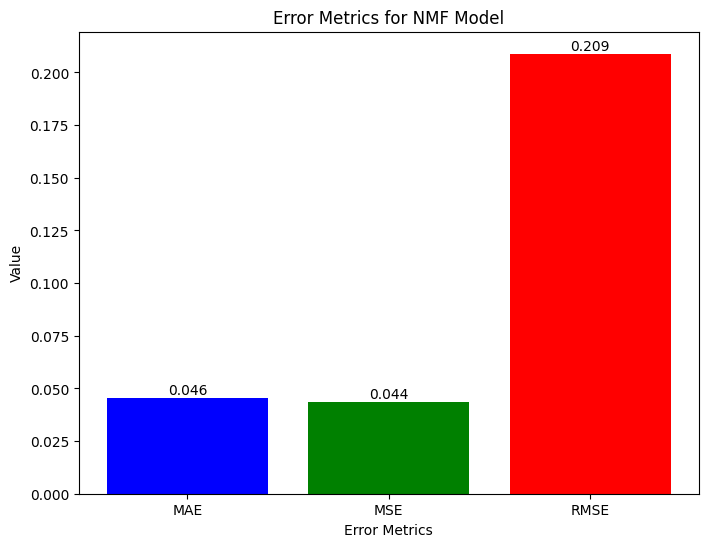

In [97]:
# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_nmf, mse_nmf, rmse_nmf]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for NMF Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             ha='center', va='bottom', color='black')  # Fixing the 'va' parameter

# Save the figure
#plt.savefig('05_nmf_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

In [98]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_nmf_1:
    r[prediction.iid] = round((prediction.est * 100) / 3, 2)

# Create an empty list to store prediction data
prediction_data = []

# score r[prediction.iid]
# Extract predictions for the specified users
# Calculate the score for each item

for user_id in target_users:
    user_predictions = [(str(user_id), str(pred.iid), pred.est, r[prediction.iid]) for pred in predictions_nmf_1 if pred.uid == str(user_id)]
    
    # Extend the prediction_data list with user predictions
    prediction_data.extend(user_predictions)

# Create a DataFrame from the prediction data
columns = ['User', 'Item', 'Predicted_Rating','Score']
predictions_df = pd.DataFrame(prediction_data, columns=columns)

# Display the DataFrame
predictions_df

User        Item  Predicted_Rating  Score
0  1078030  ML0120ENv2          3.000000  100.0
1  1078030    ST0101EN          3.000000  100.0
2   733707    ML0120EN          3.000000  100.0
3   733707    DS0101EN          3.000000  100.0
4   733707    ST0101EN          3.000000  100.0
5   733707    DB0151EN          3.000000  100.0
6   733707    BD0141EN          3.000000  100.0
7   674939    BD0121EN          2.976927  100.0
8   674939    BD0141EN          3.000000  100.0
9   674939    BD0143EN          3.000000  100.0

In [99]:
rec_merge_df = pd.merge(predictions_df, course_df[['COURSE_ID','TITLE']], how='left', left_on='Item', right_on='COURSE_ID')
# Drop unnecessary columns
rec_merge_df = rec_merge_df.drop(['COURSE_ID'], axis=1)
rec_merge_df

User        Item  Predicted_Rating  Score  \
0  1078030  ML0120ENv2          3.000000  100.0   
1  1078030    ST0101EN          3.000000  100.0   
2   733707    ML0120EN          3.000000  100.0   
3   733707    DS0101EN          3.000000  100.0   
4   733707    ST0101EN          3.000000  100.0   
5   733707    DB0151EN          3.000000  100.0   
6   733707    BD0141EN          3.000000  100.0   
7   674939    BD0121EN          2.976927  100.0   
8   674939    BD0141EN          3.000000  100.0   
9   674939    BD0143EN          3.000000  100.0   

                                               TITLE  
0                      deep learning with tensorflow  
1                                     statistics 101  
2                      deep learning with tensorflow  
3                       introduction to data science  
4                                     statistics 101  
5                                nosql and dbaas 101  
6                   accessing hadoop data using hive  
7                                     apache pig 101  
8                   accessing hadoop data using hive  
9  using hbase for real time access to your big data

Using unenrolled data approach

#### Function 1 Applying model.predict(), set with unenrolled courses

In [100]:
def nmf_predict(target_users, ratings_df, courses_df):
    """
    Returns predicted course ratings for active user's unenrolled courses.
    
    Parameters:
        target_users        : A list of target user IDs.
        ratings_df          : A dataframe of user-item-rating data.
        courses_df          : A dataframe containing course information.
    
    Returns:
        results_df          : A dataframe containing user IDs, course IDs, predicted ratings, scores, and titles.
    """
    
    # Initialize an empty dictionary for predictions
    results_list = []

    # Get the list of all course IDs
    all_courses = set(courses_df['COURSE_ID'].values)
    
    # Iterate over all target users
    for user_id in target_users:
        # Get the list of enrolled courses for the user
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())
        
        # Identify unenrolled courses
        unenrolled_courses = all_courses - enrolled_courses
        
        # Iterate over all unenrolled courses, c = course id = item id
        for c in unenrolled_courses:
            # Predict the rating using the KNN model
            prediction = model.predict(uid=user_id, iid=c)
            score = round((prediction.est * 100) / 3, 2)
            
            # Retrieve title from course_df
            title = courses_df[courses_df['COURSE_ID'] == c]['TITLE'].values[0] #if 'TITLE' in courses_df.columns else 'N/A'
            
            # Append to results list
            results_list.append({
                'User': user_id,
                'Course_ID': c,
                'Predicted_Rating': prediction.est,
                'Score': score,
                'Title': title
            })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by Score in descending order
    results_df = results_df.sort_values(by=['User','Score'], ascending=False).reset_index(drop=True)
    
    return results_df

In [101]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Get predictions for unenrolled courses
predictions = nmf_predict(target_users, ratings_df, course_df)
predictions

User   Course_ID  Predicted_Rating  Score  \
0     2057052  excourse73          2.953145  98.44   
1     2057052    PA0107EN          2.953145  98.44   
2     2057052    ST0101EN          2.953145  98.44   
3     2057052  excourse23          2.953145  98.44   
4     2057052  GPXX0NHZEN          2.953145  98.44   
...       ...         ...               ...    ...   
1176   674939  GPXX04HEEN          2.953145  98.44   
1177   674939  GPXX05P1EN          2.953145  98.44   
1178   674939  excourse55          2.953145  98.44   
1179   674939    EE0101EN          2.953145  98.44   
1180   674939  GPXX0M7ZEN          2.953145  98.44   

                                                  Title  
0                           analyzing big data with sql  
1         predicting financial performance of a company  
2                                        statistics 101  
3                            data analysis using python  
4     normalization   keys   constraints in relation...  
...                                                 ...  
1176  insurance business modelling and basic actuari...  
1177  acknowledging messages using microprofile reac...  
1178           advanced computer vision with tensorflow  
1179                   modernizing java ee applications  
1180  consuming a restful java web service using jso...  

[1181 rows x 5 columns]

#### Function 1 Applying predictions_nmf_1, set with unenrolled courses

In [102]:
def nmf_predict(target_users, ratings_df, course_df, predictions_nmf_1):
    """
    Returns predicted course ratings for active user's unenrolled courses using precomputed predictions.
    
    Parameters:
        target_users       : A list of target user IDs.
        ratings_df         : A dataframe of user-item-rating data.
        course_df          : A dataframe containing course information.
        predictions_nmf_1  : Precomputed predictions from the KNN model.
    
    Returns:
        results_df         : A dataframe with user, course_ID, predicted rating, and score.
    """
    
    # Initialize an empty list to store results
    results_list = []
    
    # Get the list of all course IDs
    all_courses = set(course_df['COURSE_ID'].values)
    
    # Convert predictions to a dictionary for quick lookup
    #predictions_dict = {(int(pred.uid), pred.iid): pred.est for pred in predictions_knn_2}
   
    
    # Iterate over all target users
    for user_id in target_users:
        # Display predictions for the specified users
        user_predictions = [pred for pred in predictions_nmf_1 if pred.uid == str(user_id)]
        # Get the list of enrolled courses for the user
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())
        
        # Get the list of unenrolled courses for the user
        unenrolled_courses = all_courses - enrolled_courses
        
        for pred in user_predictions:
            item_id = pred.iid
            pred_rat = pred.est
            
            # Iterate over all unenrolled courses
            for course_id in unenrolled_courses:
                # Predict the rating using the precomputed predictions
                if prediction is not None:
                    r[pred.iid] = round((pred_rat * 100) / 3, 2)
                    score = r.get(item_id, "No score available")
                
                    # Append to results list
                    results_list.append({
                        'User': user_id,
                        'Course_ID': course_id,
                        'Predicted_Rating': pred.est,
                        'Score': score
                    })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by User and Score in descending order
    results_df = results_df.sort_values(by=['User', 'Score'], ascending=False).reset_index(drop=True)
    
    return results_df

In [103]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Get predictions for unenrolled courses
predictions = nmf_predict(target_users, ratings_df, course_df, predictions_nmf_1)
predictions

User   Course_ID  Predicted_Rating   Score
0     1078030  excourse73          3.000000  100.00
1     1078030    PA0107EN          3.000000  100.00
2     1078030  excourse23          3.000000  100.00
3     1078030  GPXX0NHZEN          3.000000  100.00
4     1078030  GPXX0XFQEN          3.000000  100.00
...       ...         ...               ...     ...
2889   674939  GPXX04HEEN          2.976927   99.23
2890   674939  GPXX05P1EN          2.976927   99.23
2891   674939  excourse55          2.976927   99.23
2892   674939    EE0101EN          2.976927   99.23
2893   674939  GPXX0M7ZEN          2.976927   99.23

[2894 rows x 4 columns]

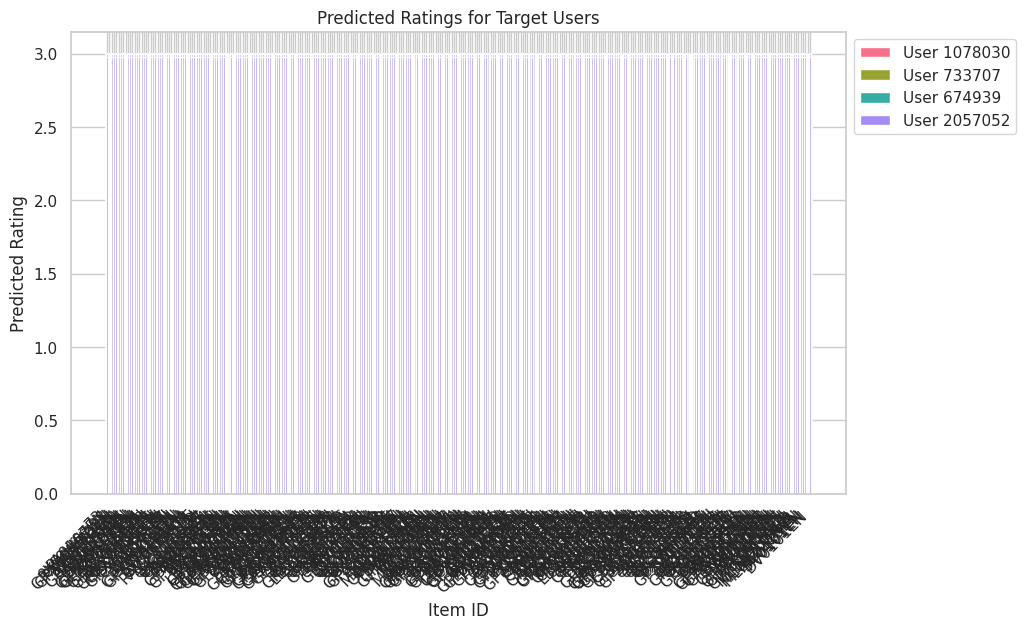

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")


# Set different colors for target users
colors = sns.color_palette('husl', n_colors=len(target_users))

# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for i, user_id in enumerate(target_users):
    user_data = predictions[predictions['User'] == str(user_id)]
    plt.bar(predictions['Course_ID'], predictions['Predicted_Rating'], color=colors[i], label=f'User {user_id}')

# Customize the plot
plt.xlabel('Item ID')
plt.ylabel('Predicted Rating')
plt.title('Predicted Ratings for Target Users')

# Rotate x-labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Set legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot to a file (choose the format you prefer, e.g., PNG, PDF, SVG)
#plt.savefig('06_predicted_ratings_plot_nmf.png', bbox_inches='tight')

# Show the plot
plt.show()

We do not compute ROC AUC since the regression task is not suitable for ROC curve analysis due to the nature of the problem. Instead, we focus on evaluating the model using classification metrics suitable for the binary classification approach applied to the regression problem.

## Implementation Option 2: Use `numpy`, `pandas`, and `sklearn`.
If you do not prefer the one-stop Suprise solution, you may implement the NMF model using `numpy`, `pandas`, and possibly `sklearn`:


In [105]:
from sklearn.decomposition import NMF

# Create user-item matrix
user_item_matrix = ratings_df.pivot(index='user', columns='item', values='rating').fillna(0)

# Train NMF model
nmf = NMF(n_components=2, init='random', random_state=42)
user_features = nmf.fit_transform(user_item_matrix)
item_features = nmf.components_

# Predict ratings
predicted_ratings = np.dot(user_features, item_features)

In [106]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r for scores
r = {}
for user_idx, user_id in enumerate(user_item_matrix.index):
    for item_idx, item_id in enumerate(user_item_matrix.columns):
        predicted_rating = predicted_ratings[user_idx, item_idx]
        r[(user_id, item_id)] = round((predicted_rating * 100) / 3, 2)

# Create an empty list to store prediction data
prediction_data = []

# Map user IDs to DataFrame index id2idx
user_id_to_index = {user_id: idx for idx, user_id in enumerate(user_item_matrix.index)}

# Extract and process predictions for target users
for user_id in target_users:
    if user_id in user_id_to_index:
        user_index = user_id_to_index[user_id] #id2idx
        user_scores = predicted_ratings[user_index] 
        
        for item_id, score in zip(user_item_matrix.columns, user_scores):
            calculated_score = r.get((user_id, item_id), 0)
            if calculated_score > 50:  # Apply the threshold
                prediction_data.append({
                    'User': user_id,
                    'Item': item_id,
                    'Predicted_Rating': score,
                    'Score': calculated_score
                })

# Create a DataFrame from the list of results
predictions_df = pd.DataFrame(prediction_data)

# Sort the DataFrame by 'User' and 'Score' in descending order
predictions_df = predictions_df.sort_values(by=['User', 'Score'], ascending=[True, False])
# Display the DataFrame
predictions_df #same as results_df in KNN

User        Item  Predicted_Rating   Score
12   674939    BD0111EN          4.308164  143.61
11   674939    BD0101EN          4.061666  135.39
16   674939    BD0211EN          3.307487  110.25
13   674939    BD0115EN          1.870091   62.34
15   674939    BD0141EN          1.613372   53.78
14   674939    BD0131EN          1.520463   50.68
4    733707    BD0101EN          4.251978  141.73
5    733707    BD0111EN          4.210935  140.36
8    733707    BD0211EN          3.231257  107.71
9    733707    DS0101EN          2.096170   69.87
10   733707    PY0101EN          1.860204   62.01
6    733707    BD0115EN          1.826990   60.90
7    733707    BD0141EN          1.576187   52.54
3   1078030    PY0101EN          2.543010   84.77
1   1078030    DS0101EN          2.139640   71.32
0   1078030    DA0101EN          1.778972   59.30
2   1078030  ML0101ENv3          1.548664   51.62

In [107]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r for scores
r = {}
for user_idx, user_id in enumerate(user_item_matrix.index):
    for item_idx, item_id in enumerate(user_item_matrix.columns):
        predicted_rating = predicted_ratings[user_idx, item_idx]
        
        # Ensure predicted rating is either 2, 3 or 0
        if predicted_rating < 2:
            predicted_rating = 0
        elif predicted_rating > 3:
            predicted_rating = 3
        
        # Calculate score within range 0 to 100
        score = round((predicted_rating * 100) / 3, 2)
        r[(user_id, item_id)] = score if score <= 100 else 100

# Create an empty list to store prediction data
prediction_data = []

# Map user IDs to DataFrame index
user_id_to_index = {user_id: idx for idx, user_id in enumerate(user_item_matrix.index)}

# Extract and process predictions for target users
for user_id in target_users:
    if user_id in user_id_to_index:
        user_index = user_id_to_index[user_id]
        user_ratings = user_item_matrix.iloc[user_index]
        
        for item_id, predicted_rating in user_ratings.items():
            calculated_score = r.get((user_id, item_id), 0)
            if calculated_score > 50:  # Apply the threshold
                prediction_data.append({
                    'User': user_id,
                    'Item': item_id,
                    'Predicted_Rating': predicted_rating,
                    'Score': calculated_score
                })

# Create a DataFrame from the list of results
predictions_df = pd.DataFrame(prediction_data)

# Sort the DataFrame by 'User' and 'Score' in descending order
predictions_df = predictions_df.sort_values(by=['User', 'Score'], ascending=[True, False])
# Display the DataFrame
predictions_df #same as results_df in KNN# Display the DataFrame

User      Item  Predicted_Rating   Score
6   674939  BD0101EN               3.0  100.00
7   674939  BD0111EN               3.0  100.00
8   674939  BD0211EN               3.0  100.00
2   733707  BD0101EN               3.0  100.00
3   733707  BD0111EN               3.0  100.00
4   733707  BD0211EN               3.0  100.00
5   733707  DS0101EN               3.0   69.87
1  1078030  PY0101EN               3.0   84.77
0  1078030  DS0101EN               0.0   71.32

This exercise has not yet applied unenrolled courses. As seen in the above dataframe, the item IDs or course IDs for users 1078030 and 2057052 correspond to the enrolled courses

In [108]:
rec_merge_df = pd.merge(predictions_df, course_df[['COURSE_ID','TITLE']], how='left', left_on='Item', right_on='COURSE_ID')
# Drop unnecessary columns
rec_merge_df = rec_merge_df.drop(['COURSE_ID'], axis=1)
rec_merge_df

User      Item  Predicted_Rating   Score                         TITLE
0   674939  BD0101EN               3.0  100.00                  big data 101
1   674939  BD0111EN               3.0  100.00                    hadoop 101
2   674939  BD0211EN               3.0  100.00          spark fundamentals i
3   733707  BD0101EN               3.0  100.00                  big data 101
4   733707  BD0111EN               3.0  100.00                    hadoop 101
5   733707  BD0211EN               3.0  100.00          spark fundamentals i
6   733707  DS0101EN               3.0   69.87  introduction to data science
7  1078030  PY0101EN               3.0   84.77       python for data science
8  1078030  DS0101EN               0.0   71.32  introduction to data science

### NMF Classification
If we used NMF classification, consider the prediction problem as a classification problem as rating only has two categorical values (`Audit` vs. `Completion`).

In [109]:
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []
#auc = []

# Initialize algorithm
#nmf = NMF(verbose=True, random_state=123)

# - Train the NMF on the trainset, and predict ratings for the testset
#nmf.fit(trainset)

# Predict ratings for the testset
#predictions_nmf_1 = nmf.test(testset)

#set rating to binary 0 and 1. However converting the ranking of Aduit and Completion should be set in the dataset
completion = 3
y_true = [1 if pred.r_ui >= completion else 0 for pred in predictions_nmf_1]
y_pred = [1 if pred.est >= completion else 0 for pred in predictions_nmf_1]

# Compute Accuracy
accuracy_nmf_clf = accuracy_score(y_true, y_pred)
accuracy_list.append(accuracy_nmf_clf)

# Compute Precision
precision_nmf_clf = precision_score(y_true, y_pred)  # Requires labels for binary classification
precision_list.append(precision_nmf_clf)

# Compute Recall
recall_nmf_clf = recall_score(y_true, y_pred)  # Requires labels for binary classification
recall_list.append(recall_nmf_clf)

# Compute F1-Score
f1_nmf_clf = f1_score(y_true, y_pred)
f1_score_list.append(f1_nmf_clf)

# Compute AUC (ROC curve is not meaningful for regression, but we can compute AUC for the precision-recall curve)
#auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy_nmf_clf}")
print(f"Precision: {precision_nmf_clf}")
print(f"Recall: {recall_nmf_clf}")
print(f"F1-Score: {f1_nmf_clf}")
#print(f"AUC: {auc}")

# Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_score_list,
})    
metrics_df

Accuracy: 0.4453651845925249
Precision: 0.9988177975209572
Recall: 0.41820663586728263
F1-Score: 0.5895624960351864


Accuracy  Precision    Recall  F1-Score
0  0.445365   0.998818  0.418207  0.589562

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
    Previously, we created the binary classification after applying the model algorithm in the y_true and y_pred data. Let’s explore the impact on metrics by changing the ranking in the dataset before training and constructing the model.”</div>

### Dataset to Binary
Let us see the difference in matrix if we change from the ranking in the dataset before training and constructing in the model.

In [110]:
#from sklearn.preprocessing import LabelEncoder
# Dataset

#ratings_df_1 = ratings_df.copy()

# Transform the ratings
#ratings_df_1['rating'] = ratings_df_1['rating'].replace({2: 'audit', 3: 'completion'})

# Transform ratings using LabelEncoder
#label_encoder = LabelEncoder()
#ratings_df_1['rating'] = label_encoder.fit_transform(ratings_df_1['rating'])

# Save to CSV
#ratings_df_1.to_csv("course_ratings_1.csv", index=False)

In [111]:
#ratings_df_1.head()

In [112]:
# Read the course rating dataset with columns user item rating
#reader = Reader(
        #line_format='user item rating', sep=',', skip_lines=1, rating_scale=(0, 1))

#course_dataset_1 = Dataset.load_from_file("course_ratings_1.csv", reader=reader)

In [113]:
# sample random trainset and testset
# test set is made of 30% of the ratings of the course dataset.
#trainset_1, testset_1 = train_test_split(course_dataset_1, test_size=.3)
#print(f"Total {trainset_1.n_users} users and {trainset_1.n_items} items in the trainingset")

In [114]:
pip show pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [115]:
#pip install pydeseq2

In [116]:
#from sklearn.preprocessing import LabelEncoder
from surprise.model_selection import train_test_split
# Import the necessary data type
#setattr(pandas, "Int64Index", pandas.Index)
#setattr(pandas, "Float64Index", pandas.Index)
#from pydeseq2.ds import DeseqStats

# Copy
ratings_df_1 = ratings_df.copy()

# Transform the ratings
ratings_df_1['rating'] = ratings_df_1['rating'].replace({2: 'audit', 3: 'completion'})

# Transform ratings using LabelEncoder
label_encoder = LabelEncoder()
ratings_df_1['rating'] = label_encoder.fit_transform(ratings_df_1['rating'])

# Convert the 'rating' column to float
ratings_df_1['rating'] = ratings_df_1['rating'].values.astype("int")#.astype(int) float failed, int failed, int64 (lower case i) throws an IntCastingNaNError, Int64 not defined

# Save to CSV
ratings_df_1.to_csv("course_ratings_1.csv", index=False)

ratings_df_1.head()

# Read the course rating dataset with columns user item rating
reader = Reader(
        line_format='user item rating', sep=',', skip_lines=1, rating_scale=(0, 1))

# Load dataset
course_dataset_1 = Dataset.load_from_file("course_ratings_1.csv", reader=reader)
# Load 
#data = Dataset.load_builtin('ml-100k', prompt=False)

# sample random trainset and testset
# test set is made of 30% of the ratings of the course dataset.
trainset_1, testset_1 = train_test_split(course_dataset_1, test_size=.3)
print(f"Total {trainset_1.n_users} users and {trainset_1.n_items} items in the trainingset")


Total 31371 users and 124 items in the trainingset


In [117]:
# Define a NMF model
#nmf = NMF(verbose=True, random_state=42)

# Train the NMF model on the training set
#nmf.fit(trainset_1)

# Predict ratings for the test set
#predictions_nmf_2 = nmf.test(testset_1)

# Compute RMSE
#accuracy.rmse(predictions_nmf_2)

<div class="alert alert-block alert-warning">
<img style="float: left" src="https://i.postimg.cc/kXz8cFqC/005-Img-Yellow-Notes-Draft-1-20220819.png" width="60">
    We encountered an error "TypeError: float() argument must be a string or a real number, not 'Trainset'", so we disabled it and continued with the data from former (predict_nmf_1), rather than using the later data (predict_nmf_2).</div>

### Continue predict_nmf_1

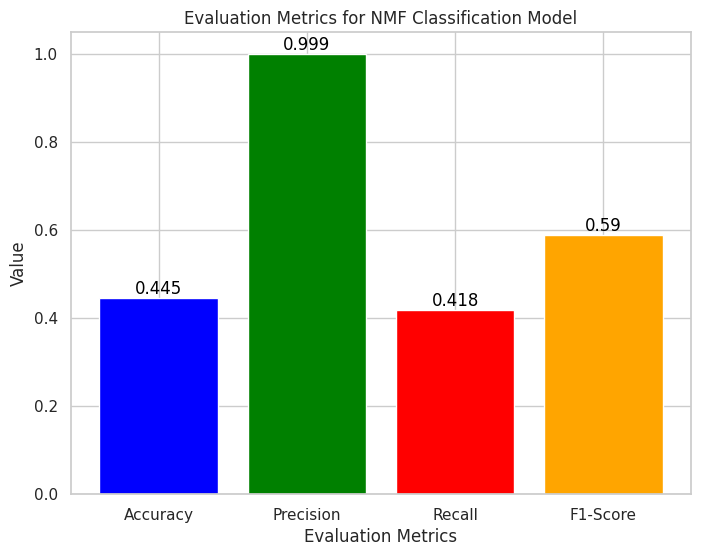

In [118]:
# List of evaluation metrics
eva_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Corresponding values
eva_values = [accuracy_nmf_clf, precision_nmf_clf, recall_nmf_clf, f1_nmf_clf]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(eva_metrics, eva_values, color=['blue', 'green', 'red', 'orange'])

# Adding labels and title
plt.xlabel('Evaluation Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics for NMF Classification Model')

# Adding y-values on the bars
for bar, value in zip(bars, eva_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3), 
             ha='center', va='bottom', color='black')

# Save the figure
#plt.savefig('07_nmf_clf_evaluation_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()


In [119]:
# Compute MAE, MSE, RMSE
mae_nmf_clf = mean_absolute_error(y_true, y_pred)
mse_nmf_clf = mean_squared_error(y_true, y_pred)
rmse_nmf_clf = np.sqrt(mse_knn_clf)

print(f"MAE: {mae_nmf_clf}")
print(f"MSE: {mse_nmf_clf}")
print(f"RMSE: {rmse_nmf_clf}")

MAE: 0.5546348154074752
MSE: 0.5546348154074752
RMSE: 0.17700890442565584


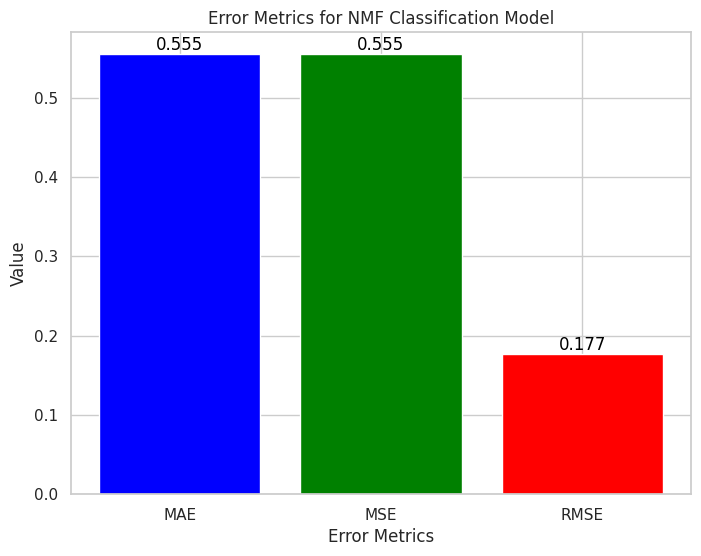

In [120]:
# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_nmf_clf, mse_nmf_clf, rmse_nmf_clf]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for NMF Classification Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             ha='center', va='bottom', color='black')  # Fixing the 'va' parameter

# Save the figure
#plt.savefig('08_nmf_clf_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

In [121]:
r = {}
# Display prediction results and calculate score
for prediction in predictions_knn_2[:15]:  # Displaying the first 15 predictions as an example
    # Calculate the score for each item
    r[prediction.iid] =round((prediction.est * 100) / 3,2) # p = model.predict(uid=user_id, r_ui=r_ui, iid=c) r[c] = (p[3]*100)/3
    print(f"User {prediction.uid} rated Item {prediction.iid} with a true rating of {prediction.r_ui} and score{prediction.est} with score {r[prediction.iid]}")

User 1120491 rated Item BD0131EN with a true rating of 3.0 and score3 with score 100.0
User 1590362 rated Item IT0101EN with a true rating of 3.0 and score3 with score 100.0
User 1999970 rated Item SC0105EN with a true rating of 3.0 and score3 with score 100.0
User 985429 rated Item DS0101EN with a true rating of 3.0 and score3 with score 100.0
User 21709 rated Item ML0120ENv2 with a true rating of 3.0 and score3 with score 100.0
User 904847 rated Item BC0101EN with a true rating of 3.0 and score3 with score 100.0
User 1185467 rated Item SC0105EN with a true rating of 3.0 and score3 with score 100.0
User 1127367 rated Item CO0301EN with a true rating of 3.0 and score3 with score 100.0
User 1396069 rated Item DB0101EN with a true rating of 3.0 and score3 with score 100.0
User 1134090 rated Item DS0301EN with a true rating of 3.0 and score3 with score 100.0
User 1758884 rated Item DS0110EN with a true rating of 3.0 and score2.95 with score 98.33
User 575808 rated Item TMP0105EN with a tr

In classification, we use metrics like accuracy, precision, recall, and F1-score to evaluate the performance of the model in predicting categorical labels.
In regression, we use metrics like MAE, MSE, and RMSE to evaluate the performance of the model in predicting continuous values.

In [122]:
# Threshold value
#completion = 3

# Convert predictions to binary labels
#y_true = [1 if pred.r_ui >= completion else 0 for pred in predictions_nmf_1]
#y_pred = [1 if pred.est >= completion else 0 for pred in predictions_nmf_1]

# Display prediction results
for prediction, true_label, pred_label in zip(predictions_knn_2[:15], y_true[:15], y_pred[:15]):
    print(f"User {prediction.uid} rated Item {prediction.iid} with a true rating of {prediction.r_ui}, predicted rating of {prediction.est} with score {r[prediction.iid]}.")
    print(f"True label: {true_label}, Predicted label: {pred_label}")

User 1120491 rated Item BD0131EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1590362 rated Item IT0101EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1999970 rated Item SC0105EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 0
User 985429 rated Item DS0101EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 0
User 21709 rated Item ML0120ENv2 with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 904847 rated Item BC0101EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 0
User 1185467 rated Item SC0105EN with a true rating of 3.0, predicted rating of 3 with score 100.0.
True label: 1, Predicted label: 1
User 1127367 rated Item CO0301EN with a true rating of 3.0, pred

In [123]:
# Define target users
target_users = [1078030, 733707, 674939,2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_nmf_1:
    r[prediction.iid] = round((pred_label * 100) / 1, 2)

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_nmf_1 if pred.uid == str(user_id)]
    
    print(f"\nPredictions for User {user_id}:")
    for prediction in user_predictions:
        try:
            print(f"Item {prediction.iid}: Score = {r[prediction.iid]}")
        except KeyError:
            print(f"Item {prediction.iid}: No score available")


Predictions for User 1078030:
Item ML0120ENv2: Score = 0.0
Item ST0101EN: Score = 0.0

Predictions for User 733707:
Item ML0120EN: Score = 0.0
Item DS0101EN: Score = 0.0
Item ST0101EN: Score = 0.0
Item DB0151EN: Score = 0.0
Item BD0141EN: Score = 0.0

Predictions for User 674939:
Item BD0121EN: Score = 0.0
Item BD0141EN: Score = 0.0
Item BD0143EN: Score = 0.0

Predictions for User 2057052:


In [124]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Initialize the dictionary r
r = {}
for prediction in predictions_nmf_1:
    r[prediction.iid] = round((pred_label * 100) / 1, 2)

# Initialize a list to store the results
results_list = []

# Display predictions for the specified users
for user_id in target_users:
    user_predictions = [pred for pred in predictions_nmf_1 if pred.uid == str(user_id)]
    
    for prediction in user_predictions:
        item_id = prediction.iid
        pred_rat = pred_label
        #score = r[prediction.iid]
        try:
            score = r[item_id]
        except KeyError:
            score = "No score available"
        
        # Append the result to the list
        results_list.append({
            'User': user_id,
            'Item': item_id,
            'Prediction_Rating':pred_rat,
            'Score': score
        })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Sort the DataFrame first by 'User ID' and then by 'Score' in descending order
results_df = results_df.sort_values(by=['User', 'Score'], ascending=[True, False]).reset_index(drop=True)

results_df

User        Item  Prediction_Rating  Score
0   674939    BD0121EN                  0    0.0
1   674939    BD0141EN                  0    0.0
2   674939    BD0143EN                  0    0.0
3   733707    ML0120EN                  0    0.0
4   733707    DS0101EN                  0    0.0
5   733707    ST0101EN                  0    0.0
6   733707    DB0151EN                  0    0.0
7   733707    BD0141EN                  0    0.0
8  1078030  ML0120ENv2                  0    0.0
9  1078030    ST0101EN                  0    0.0

In [125]:
rec_merge_df = pd.merge(results_df, course_df[['COURSE_ID','TITLE']], how='left', left_on='Item', right_on='COURSE_ID')
# Drop unnecessary columns
rec_merge_df = rec_merge_df.drop(['COURSE_ID'], axis=1)
rec_merge_df

User        Item  Prediction_Rating  Score  \
0   674939    BD0121EN                  0    0.0   
1   674939    BD0141EN                  0    0.0   
2   674939    BD0143EN                  0    0.0   
3   733707    ML0120EN                  0    0.0   
4   733707    DS0101EN                  0    0.0   
5   733707    ST0101EN                  0    0.0   
6   733707    DB0151EN                  0    0.0   
7   733707    BD0141EN                  0    0.0   
8  1078030  ML0120ENv2                  0    0.0   
9  1078030    ST0101EN                  0    0.0   

                                               TITLE  
0                                     apache pig 101  
1                   accessing hadoop data using hive  
2  using hbase for real time access to your big data  
3                      deep learning with tensorflow  
4                       introduction to data science  
5                                     statistics 101  
6                                nosql and dbaas 101  
7                   accessing hadoop data using hive  
8                      deep learning with tensorflow  
9                                     statistics 101

#### Function with unenrolled courses

In [126]:
def nmf_predict(target_users, ratings_df, courses_df):
    """
    Returns predicted course ratings for active user's unenrolled courses.
    
    Parameters:
        target_users        : A list of target user IDs.
        ratings_df          : A dataframe of user-item-rating data.
        courses_df          : A dataframe containing course information.
    
    Returns:
        results_df          : A dataframe containing user IDs, course IDs, predicted ratings, scores, and titles.
    """
    
    # Initialize an empty dictionary for predictions
    results_list = []

    # Get the list of all course IDs
    all_courses = set(courses_df['COURSE_ID'].values)
    
    # Iterate over all target users
    for user_id in target_users:
        # Get the list of enrolled courses for the user
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())
        
        # Identify unenrolled courses
        unenrolled_courses = all_courses - enrolled_courses
        
        # Iterate over all unenrolled courses, c = course id = item id
        for c in unenrolled_courses:
            # Predict the rating using the NMF model
            prediction = model.predict(uid=user_id, iid=c)
            score = round((pred_label * 100) / 1, 2)
            
            # Retrieve title from course_df
            title = courses_df[courses_df['COURSE_ID'] == c]['TITLE'].values[0] #if 'TITLE' in courses_df.columns else 'N/A'
            
            # Append to results list
            results_list.append({
                'User': user_id,
                'Course_ID': c,
                'Predicted_Label': pred_label,
                'Score': score,
                'Title': title
            })
    
    # Convert results list to DataFrame
    results_df = pd.DataFrame(results_list)
    
    # Sort DataFrame by Score in descending order
    results_df = results_df.sort_values(by=['User','Score'], ascending=False).reset_index(drop=True)
    
    return results_df

In [127]:
# Define target users
target_users = [1078030, 733707, 674939, 2057052]

# Get predictions for unenrolled courses
predictions = nmf_predict(target_users, ratings_df, course_df)
predictions

User   Course_ID  Predicted_Label  Score  \
0     2057052  excourse73                0    0.0   
1     2057052    PA0107EN                0    0.0   
2     2057052    ST0101EN                0    0.0   
3     2057052  excourse23                0    0.0   
4     2057052  GPXX0NHZEN                0    0.0   
...       ...         ...              ...    ...   
1176   674939  GPXX04HEEN                0    0.0   
1177   674939  GPXX05P1EN                0    0.0   
1178   674939  excourse55                0    0.0   
1179   674939    EE0101EN                0    0.0   
1180   674939  GPXX0M7ZEN                0    0.0   

                                                  Title  
0                           analyzing big data with sql  
1         predicting financial performance of a company  
2                                        statistics 101  
3                            data analysis using python  
4     normalization   keys   constraints in relation...  
...                                                 ...  
1176  insurance business modelling and basic actuari...  
1177  acknowledging messages using microprofile reac...  
1178           advanced computer vision with tensorflow  
1179                   modernizing java ee applications  
1180  consuming a restful java web service using jso...  

[1181 rows x 5 columns]

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute</h1></div>

# Summary
In this lab, you have learned and practiced Non-negative Matrix Factorization (NMF)-based collaborative filtering. The basic idea is to decompose the original user-item interaction matrix into two smaller and dense user and item matrices. Then, we have built the two matrices, we can easily estimate the unknown ratings via the dot product of specific row in user matrix and specific column in item matrix.
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The NMF-based collaborative filtering results
    <li>Factorized matrices with non-negative values, providing an interpretable representation of users and items.
    <li>Relies on the underlying patterns and features present in the user-item interaction matrix.
    <li>New users or items based on the preferences of similar entities. Similar users or items are used to infer preferences for new entities.
    <li>Relies on the local neighborhood of users or items, and it can find meaningful connections.    
</ol>


<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

# Construct Stage

<h1><a id="Coll_NN">Course Rating Prediction using Neural Networks</a>

In [128]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [129]:
num_users = len(ratings_df['user'].unique())
num_items = len(ratings_df['item'].unique())
print(f"There are total `{num_users}` of users and `{num_items}` items")

There are total `33901` of users and `126` items


## __Rating Prediction using Neural Network in a Glance (Simple Small Dataset Practice)__


In [130]:
%%time
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1. Embedding Create
def get_user_embedding(user_id):
    # Dummy function to get user embeddings
    return np.random.rand(10)

def get_item_embedding(item_id):
    # Dummy function to get item embeddings
    return np.random.rand(10)

#Step 2. Data Preparation
users = [1, 2, 3, 4, 5]
items = [101, 102, 103, 104, 105]
ratings = [4, 5, 3, 4, 2]

data = []
for user, item, rating in zip(users, items, ratings):
    user_emb = get_user_embedding(user)
    item_emb = get_item_embedding(item)
    features = np.concatenate([user_emb, item_emb])
    data.append((user, item, features, rating))

df = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating'])

#Step 3. Train
# Define and Train a Neural Network
X = np.vstack(df['features'].values)
y = df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 11.2008 - val_loss: 18.4461
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 10.7060 - val_loss: 17.8089
Epoch 3/50
1/1 [==============================] - 0s 35ms/step - loss: 10.2291 - val_loss: 17.1868
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 9.7809 - val_loss: 16.6139
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 9.3694 - val_loss: 16.1304
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 8.9781 - val_loss: 15.6183
Epoch 7/50
1/1 [==============================] - 0s 42ms/step - loss: 8.6023 - val_loss: 15.0589
Epoch 8/50
1/1 [==============================] - 0s 39ms/step - loss: 8.2386 - val_loss: 14.4986
Epoch 9/50
1/1 [==============================] - 0s 37ms/step - loss: 7.8652 - val_loss: 13.9649
Epoch 10/50
1/1 [==============================] - 0s 39ms/step - loss: 7.5095 - val_loss: 13.4564
Epoch 11/50
1/1 [=

In [131]:
#Step 4. Predict Ratings for New User-Item Pairs (Uim)
test_user = 6
test_item = 106

test_user_emb = get_user_embedding(test_user)
print(f'User emb: {test_user_emb}\n')
test_item_emb = get_item_embedding(test_item)
print(f'Item emb: {test_item_emb}\n')
test_features = np.concatenate([test_user_emb, test_item_emb]).reshape(1, -1)
print(f'Features: {test_features}\n')

print(f'X: {X}\n')
print(f'Y: {y}\n')

predicted_rating = model.predict(test_features)[0][0]
print(f'Predicted Rating: {predicted_rating}\n')

# Evaluate the model
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

User emb: [0.06163836 0.02674943 0.34305065 0.30740013 0.03967216 0.56133406
 0.25765774 0.98405617 0.75560104 0.08080168]

Item emb: [0.048127   0.45911465 0.39363612 0.89765342 0.29132465 0.07610065
 0.84046892 0.50386531 0.97003848 0.37412065]

Features: [[0.06163836 0.02674943 0.34305065 0.30740013 0.03967216 0.56133406
  0.25765774 0.98405617 0.75560104 0.08080168 0.048127   0.45911465
  0.39363612 0.89765342 0.29132465 0.07610065 0.84046892 0.50386531
  0.97003848 0.37412065]]

X: [[0.32667548 0.31080384 0.29519193 0.28086484 0.05782349 0.1368348
  0.7176136  0.01686069 0.53366639 0.45827243 0.72202981 0.82208233
  0.63688462 0.43717073 0.70754912 0.94804107 0.4648802  0.1121503
  0.89469757 0.1607348 ]
 [0.97072851 0.39683122 0.94165421 0.72216222 0.12458491 0.55211319
  0.47232217 0.48796475 0.88768993 0.15388927 0.30342091 0.55452371
  0.22459365 0.26708069 0.40348323 0.87381512 0.16147362 0.25729533
  0.49210242 0.08651683]
 [0.99008603 0.29087071 0.140549   0.2644909  0.6889

In [132]:
# Prediction
def recommend_courses_for_user(user_id, all_items, enrolled_items):
    recommendations = []
    user_emb = get_user_embedding(user_id)
    for item_id in all_items:
        if item_id in enrolled_items:
            continue
        item_emb = get_item_embedding(item_id)
        features = np.concatenate([user_emb, item_emb]).reshape(1, -1)
        predicted_rating = model.predict(features)[0][0]*10
        recommendations.append({
            'user_id': user_id,
            'item_id': item_id,
            'predicted_rating': predicted_rating,
        })
    return pd.DataFrame(recommendations)

# Example usage
all_items = [101, 102, 103, 104, 105, 106, 107, 108]  # All possible items
enrolled_items = [101, 103, 105]  # Items the user is already enrolled in
user_id = 6

recommendations = recommend_courses_for_user(user_id, all_items, enrolled_items)
print(recommendations)

1/1 [==============================] - 0s 22ms/step
   user_id  item_id  predicted_rating
0        6      102         30.862617
1        6      104         33.836367
2        6      106         39.987280
3        6      107         37.219448
4        6      108         34.394128


#### Implementing the recommender neural network using tensorflow 

This network architecture could be defined and implemented as a sub-class inheriting the `tensorflow.keras.Model` super class, let's call it `RecommenderNet()`. We have the input number of users, number of items with embedding size of 16

In [133]:
class RecommenderNet(keras.Model):
    
    def __init__(self, num_users, num_items, embedding_size=16, **kwargs):
        """
           Constructor
           :param int num_users: number of users
           :param int num_items: number of items
           :param int embedding_size: the size of embedding vector
        """
        super(RecommenderNet, self).__init__(**kwargs)
        #self.num_users = num_users
        #self.num_items = num_items
        #self.embedding_size = embedding_size
        
        # Define a user_embedding vector
        # Input dimension is the num_users
        # Output dimension is the embedding size
        self.user_embedding_layer = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            name='user_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # Define a user bias layer
        self.user_bias = layers.Embedding(
            input_dim=num_users,
            output_dim=1,
            name="user_bias")
        
        # Define an item_embedding vector
        # Input dimension is the num_items
        # Output dimension is the embedding size
        self.item_embedding_layer = layers.Embedding(
            input_dim=num_items,
            output_dim=embedding_size,
            name='item_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # Define an item bias layer
        self.item_bias = layers.Embedding(
            input_dim=num_items,
            output_dim=1,
            name="item_bias")
        
    def call(self, inputs):
        """
           method to be called during model fitting
           
           :param inputs: user and item one-hot vectors
        """
        # Compute the user embedding vector
        #user_vector = self.user_embedding_layer(inputs[:, 0])
        #user_bias = self.user_bias(inputs[:, 0])
        user_vector = self.user_embedding_layer(inputs['user_id'])
        user_bias = self.user_bias(inputs['user_id'])       
        
        #item_vector = self.item_embedding_layer(inputs[:, 1])
        #item_bias = self.item_bias(inputs[:, 1])
        item_vector = self.item_embedding_layer(inputs['item_id'])
        item_bias = self.item_bias(inputs['item_id'])
        
        dot_user_item = tf.tensordot(user_vector, item_vector, 2)
        
        # Add all the components (including bias)
        x = dot_user_item + user_bias + item_bias
        # Sigmoid output layer to output the probability
        return tf.nn.relu(x)

### Train and evaluate the RecommenderNet()

Now it's time to train and evaluate the defined `RecommenderNet()`. First, we need to process the original rating dataset a little bit by converting the actual user ids and item ids into integer indices for `tensorflow` to creating the one-hot encoding vectors.

In [134]:
def process_dataset(raw_data):
    
    encoded_data = raw_data.copy()
    
    # Mapping user ids to indices
    user_list = encoded_data["user"].unique().tolist()
    user_id2idx_dict = {x: i for i, x in enumerate(user_list)}
    user_idx2id_dict = {i: x for i, x in enumerate(user_list)}
    
    # Mapping course ids to indices
    course_list = encoded_data["item"].unique().tolist()
    course_id2idx_dict = {x: i for i, x in enumerate(course_list)}
    course_idx2id_dict = {i: x for i, x in enumerate(course_list)}

    # Convert original user ids to idx
    encoded_data["user"] = encoded_data["user"].map(user_id2idx_dict)
    encoded_data["item"] = encoded_data["item"].map(course_id2idx_dict)
    encoded_data["rating"] = encoded_data["rating"].values.astype("int")

    return encoded_data, user_idx2id_dict, course_idx2id_dict, user_id2idx_dict, course_id2idx_dict

In [135]:
encoded_data, user_idx2id_dict, course_idx2id_dict, user_id2idx_dict, course_id2idx_dict = process_dataset(ratings_df)

In [136]:
encoded_data.head()

user  item  rating
0     0     0       3
1     1     1       3
2     2     2       3
3     3     3       3
4     4     4       3

In [137]:
num_users_1 = len(encoded_data['user'].unique())
num_items_1 = len(encoded_data['item'].unique())
print(f"There are total `{num_users_1}` of users and `{num_items_1}` items")

There are total `33901` of users and `126` items


The results of the total number of data from the encoded data is similar to the ratings dataframe.

Then we can split the encoded dataset into training and testing datasets.


#### Train, Test and Validate

In [138]:
def generate_train_test_datasets(dataset, scale=True):

    min_rating = min(dataset["rating"])
    max_rating = max(dataset["rating"])

    dataset = dataset.sample(frac=1, random_state=42)
    x = dataset[["user", "item"]].values
    if scale:
        y = dataset["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
    else:
        y = dataset["rating"].values
    #y = dataset["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values if scale else dataset["rating"].values
    # Assuming training on 80% of the data and validating on 10%, and testing 10%
    train_indices = int(0.8 * dataset.shape[0])
    test_indices = int(0.9 * dataset.shape[0])

    x_train, x_val, x_test, y_train, y_val, y_test = (
        x[:train_indices],
        x[train_indices:test_indices],
        x[test_indices:],
        y[:train_indices],
        y[train_indices:test_indices],
        y[test_indices:],
    )
    return x_train, x_val, x_test, y_train, y_val, y_test

In [139]:
#dataset

In [140]:
x_train, x_val, x_test, y_train, y_val, y_test = generate_train_test_datasets(encoded_data)

In [141]:
# user column 0
user_indices = x_train[:, 0]
user_indices

array([ 8376,  7659, 10717, ...,  3409, 28761,  4973])

In [142]:
# item column 1
item_indices = x_train[:, 1]
item_indices

array([12, 29,  3, ..., 18, 19, 17])

and training output labels are a list of 0s and 1s indicating if the user has completed a course or not.

In [143]:
#encoded_data['rating']
y_train

array([1., 1., 1., ..., 1., 0., 1.])

Then we can choose a small embedding vector size to be 16 and create a `RecommenderNet()` model to be trained

In [144]:
embedding_size = 16
model = RecommenderNet(num_users, num_items, embedding_size)

Train the RecommenderNet() model_

In [145]:
## - call model.compile() method to set up the loss and optimizer and metrics for the model training, you may use
##  - - tf.keras.losses.MeanSquaredError() as training loss
##  - - keras.optimizers.Adam() as optimizer
##  - - tf.keras.metrics.RootMeanSquaredError() as metric

## - call model.fit() to train the model

## - optionally call model.save() to save the model

x_train, x_val, x_test, y_train, y_val, y_test = generate_train_test_datasets(encoded_data)

num_users = len(user_id2idx_dict)
num_items = len(course_id2idx_dict)

model = RecommenderNet(num_users, num_items, embedding_size=16)
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_squared_error"]) #regression

# Convert the training and validation data to dictionaries (the changes we have made in call)
x_train_dict = {'user_id': x_train[:, 0], 'item_id': x_train[:, 1]}
x_val_dict = {'user_id': x_val[:, 0], 'item_id': x_val[:, 1]}

history = model.fit(x_train_dict, y_train, validation_data=(x_val_dict, y_val), epochs=20, batch_size=512)


Epoch 1/20
365/365 [==============================] - 4s 7ms/step - loss: 0.2000 - mean_squared_error: 0.1999 - val_loss: 0.0828 - val_mean_squared_error: 0.0827
Epoch 2/20
365/365 [==============================] - 2s 7ms/step - loss: 0.1699 - mean_squared_error: 0.1697 - val_loss: 0.8358 - val_mean_squared_error: 0.8356
Epoch 3/20
365/365 [==============================] - 2s 6ms/step - loss: 0.3242 - mean_squared_error: 0.3239 - val_loss: 0.0899 - val_mean_squared_error: 0.0896
Epoch 4/20
365/365 [==============================] - 2s 6ms/step - loss: 0.1780 - mean_squared_error: 0.1776 - val_loss: 0.7834 - val_mean_squared_error: 0.7830
Epoch 5/20
365/365 [==============================] - 2s 6ms/step - loss: 0.0996 - mean_squared_error: 0.0992 - val_loss: 0.3583 - val_mean_squared_error: 0.3578
Epoch 6/20
365/365 [==============================] - 2s 6ms/step - loss: 0.0708 - mean_squared_error: 0.0703 - val_loss: 0.5405 - val_mean_squared_error: 0.5400
Epoch 7/20
365/365 [========

Evaluate the trained model

In [146]:
%%time
### - call model.evaluate() to evaluate the model
#history = model.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


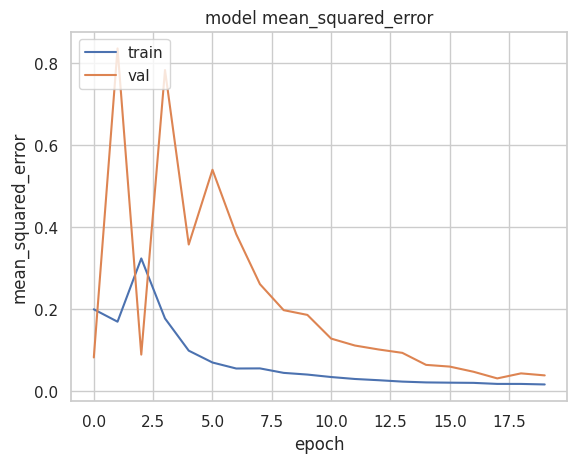

In [147]:
## - optionally call model.save() to save the model
## - plot the train and validation loss
from matplotlib import pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

 The model trained to predict the rating of the courses which most likely to be completed, the model might not predict accurately, resulting in a high MSE. At the start (epoch 0 to 3), both the training and validation MSEs are high, indicating that the model is initially not performing well. This is expected as the model is just starting to learn.
 <br>
 As the model learns from the training data (more epochs), the MSE decreases, indicating better predictions. However, if the MSE for the validation data doesn’t decrease similarly, it could mean the model is overfitting to the training data and may not perform well on unseen data.
 <br>
 The spikes and fluctuations in the validation MSE suggest that the model's performance on the validation set is somewhat unstable. This could be due to various reasons such as overfitting, where the model performs well on training data but not as consistently on validation data.
 <br>
 Towards the end of the training (after epoch 10), the validation MSE stabilizes but remains higher than the training MSE. This gap between training and validation MSE indicates potential overfitting, where the model is too closely fitted to the training data and does not generalize as well to new data.
 <br>
The graph helps in understanding how the model is learning and if it’s generalizing well to new data. The aim is to have both training and validation errors decrease and converge to a low value, indicating a well-trained model.
 

In [148]:
x_test_dict = {'user_id': x_test[:, 0], 'item_id': x_test[:, 1]}

In [149]:
### - call model.evaluate() to evaluate the model
model.evaluate(x_test_dict, y_test)

730/730 [==============================] - 2s 2ms/step - loss: 0.2741 - mean_squared_error: 0.2732


[0.2740824222564697, 0.27321216464042664]

In [150]:
model.summary()

Model: "recommender_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 user_embedding_layer (Embed  multiple                 542416    
 ding)                                                           
                                                                 
 user_bias (Embedding)       multiple                  33901     
                                                                 
 item_embedding_layer (Embed  multiple                 2016      
 ding)                                                           
                                                                 
 item_bias (Embedding)       multiple                  126       
                                                                 
Total params: 578,459
Trainable params: 578,459
Non-trainable params: 0
_________________________________________________________________


The total number of parameters in the model, which includes all trainable weights and biases.<br>
Trainable params: 578,459. All the parameters in this model are trainable, meaning they will be updated during training.
<br>
Non-trainable params: 0. There are no non-trainable parameters in this model, indicating all parameters will be optimized during the training process.

We can easily get the actual weights using `model.get_layer().get_weights()` methods

In [151]:
# User features
user_latent_features = model.get_layer('user_embedding_layer').get_weights()[0]
print(f"User features shape: {user_latent_features.shape}")

User features shape: (33901, 16)


In [152]:
user_latent_features[0]

array([ 0.00810636,  0.04865272, -0.01948847, -0.13302794,  0.00966312,
        0.00736773,  0.03107223,  0.06429279,  0.01533826,  0.00905608,
       -0.02020177, -0.00445641, -0.00817256, -0.04709268,  0.01572038,
        0.01400468], dtype=float32)

In [153]:
item_latent_features = model.get_layer('item_embedding_layer').get_weights()[0]
print(f"Item features shape: {item_latent_features.shape}")

Item features shape: (126, 16)


In [154]:
item_latent_features[0]

array([-0.02344046, -0.00894933, -0.01623581, -0.0104479 ,  0.02742143,
        0.01926058,  0.00560654,  0.03638276,  0.01370103, -0.00215756,
        0.01291312,  0.00111074, -0.01944835, -0.028512  ,  0.0138686 ,
        0.02426111], dtype=float32)

In [155]:
from sklearn import metrics
# Train the model (if not already trained)
#history = model.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)
#history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epoch)

# Predict ratings for the test data
nn_prediction = model.predict(x_test_dict)

# Calculate evaluation metrics
mae_nn = metrics.mean_absolute_error(y_test, nn_prediction)
mse_nn = metrics.mean_squared_error(y_test, nn_prediction)
rmse_nn = np.sqrt(mse_nn)

print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn}")

730/730 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.512415098570794
Mean Squared Error (MSE): 0.27321232816307905
Root Mean Squared Error (RMSE): 0.5226971667830992


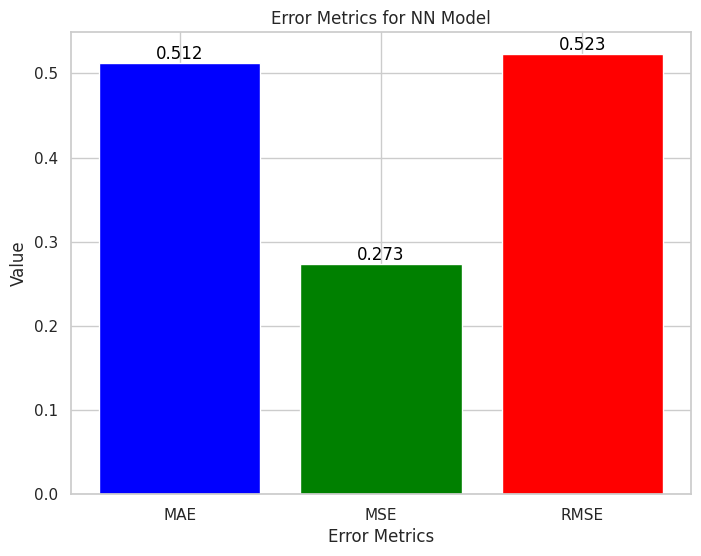

In [156]:
# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_nn, mse_nn, rmse_nn]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for NN Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             ha='center', va='bottom', color='black')  # Fixing the 'va' parameter

# Save the figure
#plt.savefig('09_nn_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

### Create a prediction

In [157]:
def recommend_courses_for_user(model, target_users, ratings_df): 
    """
    Generates course recommendations for multiple target users based on NCF model predictions,
    excluding courses they are already enrolled in.
    
    Parameters:
        model (tf.keras.Model): The trained NCF model.
        target_users (list): List of user IDs for whom recommendations are to be generated.
        ratings_df (pd.DataFrame): DataFrame containing user-item ratings.
        users_id2idx (dict): Dictionary mapping original user IDs to indexed user IDs.
        items_id2idx (dict): Dictionary mapping original item IDs to indexed item IDs.
        
    Returns:
        pd.DataFrame: A DataFrame with user IDs, item IDs, and predicted interaction scores.
    """
    try:
        recommendations = pd.DataFrame()
        #user_idx2id_dict, course_idx2id_dict
        # Iterate over each target user
        for user_id in target_users:
            if user_id not in user_id2idx_dict:
                continue

            mapped_user_id = user_id2idx_dict[user_id]
            enrolled_courses = set(ratings_df[ratings_df['user'] == mapped_user_id]['item'].tolist())
            
            # Prepare data for prediction
            active_user_df = pd.DataFrame({
                'user_id': [mapped_user_id] * len(course_id2idx_dict),
                'item_id': list(course_id2idx_dict.values())
            })
            
            # Create TensorFlow dataset
            ds_pred = tf.data.Dataset.from_tensor_slices(({
                'user_id': active_user_df['user_id'].values.astype('int32'),
                'item_id': active_user_df['item_id'].values.astype('int32')
            })).batch(512)
            
            # Model prediction
            ncf_predictions = model.predict(ds_pred) #model = RecommenderNet(num_users, num_items, embedding_size)
            
            # Store predictions in DataFrame
            active_user_df['ncf_prediction'] = ncf_predictions.flatten()
            
            # Exclude already enrolled courses
            results_df = active_user_df[~active_user_df['item_id'].isin(enrolled_courses)]
            
            # Calculate scores based on predictions
            results_df['score'] = round((results_df['ncf_prediction'] * 100) / 3, 2)
            
            # Map back to original user ID and item ID
            results_df['user_id'] = user_id
            results_df['item_id'] = results_df['item_id'].map({v: k for k, v in course_id2idx_dict.items()})
            
            # Append results to recommendations DataFrame
            recommendations = pd.concat([recommendations, results_df])
        
        recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False])
        recommendations = recommendations.reset_index(drop=True)
        
        return recommendations[['user_id', 'item_id', 'score']]
    
    except Exception as e:
        print(f"Error in ncf_predict: {str(e)}")
        return pd.DataFrame(columns=['user_id', 'item_id', 'score'])

target_users = [1078030, 733707, 674939, 2057052]
recommendations = recommend_courses_for_user(model, target_users, encoded_data)
print(recommendations.head())

1/1 [==============================] - 0s 9ms/step
   user_id     item_id      score
0   674939    CO0301EN  17.520000
1   674939    CC0150EN  17.469999
2   674939    CO0401EN  17.469999
3   674939  LB0103ENv1  17.450001
4   674939    CC0103EN  17.430000


/tmp/ipykernel_21/2166920090.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['score'] = round((results_df['ncf_prediction'] * 100) / 3, 2)
/tmp/ipykernel_21/2166920090.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['user_id'] = user_id
/tmp/ipykernel_21/2166920090.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [158]:
def recommend_courses_for_user(model, target_users, ratings_df, user_id2idx_dict, course_id2idx_dict): 
    """
    Generates course recommendations for multiple target users based on NCF model predictions,
    excluding courses they are already enrolled in.
    
    Parameters:
        model (tf.keras.Model): The trained NCF model.
        target_users (list): List of user IDs for whom recommendations are to be generated.
        ratings_df (pd.DataFrame): DataFrame containing user-item ratings.
        users_id2idx (dict): Dictionary mapping original user IDs to indexed user IDs.
        items_id2idx (dict): Dictionary mapping original item IDs to indexed item IDs.
        
    Returns:
        pd.DataFrame: A DataFrame with user IDs, item IDs, and predicted interaction scores.
    """
    
    recommendations = pd.DataFrame()
    
    for user_id in target_users:
        if user_id not in user_id2idx_dict:
            continue

        mapped_user_id = user_id2idx_dict[user_id]
        enrolled_courses = set(ratings_df[ratings_df['user'] == mapped_user_id]['item'].tolist())
        
        active_user_df = pd.DataFrame({
            'user_id': [mapped_user_id] * len(course_id2idx_dict),
            'item_id': list(course_id2idx_dict.values())
        })
        
        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user_id': active_user_df['user_id'].values.astype('int32'),
            'item_id': active_user_df['item_id'].values.astype('int32')
        })).batch(512)
        
        ncf_predictions = model.predict(ds_pred)
        
        active_user_df['ncf_prediction'] = ncf_predictions.flatten()
        results_df = active_user_df.loc[~active_user_df['item_id'].isin(enrolled_courses)].copy()
        results_df.loc[:, 'score'] = round((results_df['ncf_prediction'] * 100) / 3, 2)
        
        results_df.loc[:, 'user_id'] = user_id
        results_df.loc[:, 'item_id'] = results_df['item_id'].map({v: k for k, v in course_id2idx_dict.items()})
        
        recommendations = pd.concat([recommendations, results_df])
    
    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False])
    recommendations = recommendations.reset_index(drop=True)
    
    return recommendations[['user_id', 'item_id', 'score']]

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = recommend_courses_for_user(model, target_users, encoded_data, user_id2idx_dict, course_id2idx_dict)
print(recommendations)


1/1 [==============================] - 0s 9ms/step
     user_id     item_id      score
0     674939    CO0301EN  17.520000
1     674939    CC0150EN  17.469999
2     674939    CO0401EN  17.469999
3     674939  LB0103ENv1  17.450001
4     674939    CC0103EN  17.430000
..       ...         ...        ...
452  2057052   TMP0101EN   0.000000
453  2057052    DB0113EN   0.000000
454  2057052    DX0108EN   0.000000
455  2057052      DS0107   0.000000
456  2057052    DB0115EN   0.000000

[457 rows x 3 columns]


In [159]:
recommendations['score'].max()

25.64

## __Rating Prediction Classification using Neural Network in a Glance (Simple Small Dataset Practice)__


In [160]:
%%time
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1:Data Preparation
# Dummy functions to get embeddings
def get_user_embedding(user_id):
    return np.random.rand(10)

def get_item_embedding(item_id):
    return np.random.rand(10)

# Sample data
users = [1, 2, 3, 4, 5]
items = [101, 102, 103, 104, 105]
ratings = [1, 1, 0, 1, 0]  # Binary ratings: 1 (like), 0 (dislike)

data = []
for user, item, rating in zip(users, items, ratings):
    user_emb = get_user_embedding(user)
    item_emb = get_item_embedding(item)
    features = np.concatenate([user_emb, item_emb])
    data.append((user, item, features, rating))

df = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating'])

# Extract features and labels
X_1 = np.vstack(df['features'].values)
y_1 = df['rating'].values

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Define the neural network model
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_1.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.8349 - accuracy: 0.3333 - val_loss: 0.7679 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 1.0537 - accuracy: 0.0000e+00 - val_loss: 0.7762 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 0.5701 - accuracy: 1.0000 - val_loss: 0.7908 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 37ms/step - loss: 0.9046 - accuracy: 0.3333 - val_loss: 0.8005 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6541 - accuracy: 0.6667 - val_loss: 0.8100 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 0.7880 - accuracy: 0.3333 - val_loss: 0.8156 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 0.6203 - accuracy: 0.6667 - val_loss: 0.8243 - val_accuracy: 0.0000e+

In [161]:
# Predict Score for New User-Item Pairs
test_user = 6
test_item = 106

test_user_emb = get_user_embedding(test_user)
print(f'User emb: {test_user_emb}\n')

test_item_emb = get_item_embedding(test_item)
print(f'Item emb: {test_item_emb}\n')

test_features = np.concatenate([test_user_emb, test_item_emb]).reshape(1, -1)
print(f'Features: {test_features}\n')

predicted_score = model_1.predict(test_features)[0][0]
predicted_class = (predicted_score > 0.5).astype(int)
print(f'Predicted Score: {predicted_score}\n')
print(f'Predicted Class: {predicted_class}\n')

# Evaluate the model
y_pred_1 = (model_1.predict(X_test_1) > 0.5).astype(int)
accuracy = accuracy_score(y_test_1, y_pred_1)
print(f'Accuracy: {accuracy}\n')
print(classification_report(y_test_1, y_pred_1))

User emb: [0.50787399 0.90764762 0.27807243 0.59822712 0.8977684  0.22977485
 0.79954246 0.4100031  0.47378571 0.49746563]

Item emb: [0.6023075  0.83004673 0.59508979 0.71664815 0.54906961 0.87830699
 0.44586113 0.81778422 0.10002495 0.27947862]

Features: [[0.50787399 0.90764762 0.27807243 0.59822712 0.8977684  0.22977485
  0.79954246 0.4100031  0.47378571 0.49746563 0.6023075  0.83004673
  0.59508979 0.71664815 0.54906961 0.87830699 0.44586113 0.81778422
  0.10002495 0.27947862]]

1/1 [==============================] - 0s 65ms/step
Predicted Score: 0.3045113682746887

Predicted Class: 0

1/1 [==============================] - 0s 22ms/step
Accuracy: 0.0

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [162]:
def recommend_courses_for_user_clf(user_id, all_items, enrolled_items):
    """
    Generates course recommendations for a user based on the neural network model's predicted probabilities,
    excluding courses they are already enrolled in.

    Parameters:
        user_id (int): The ID of the user for whom recommendations are to be generated.
        all_items (list): List of all possible item IDs.
        enrolled_items (list): List of item IDs that the user is already enrolled in.

    Returns:
        pd.DataFrame: DataFrame with user ID, item ID, predicted score, and predicted class.
    """
    recommendations = []
    user_emb = get_user_embedding(user_id)

    for item_id in all_items:
        if item_id in enrolled_items:
            continue

        item_emb = get_item_embedding(item_id)
        features = np.concatenate([user_emb, item_emb]).reshape(1, -1)
        
        #predicted_score = model_1.predict(features)[0][0]*100
        #predicted_class = (predicted_score > 0).astype(int)
        

        # Use predict to get the probability output from the neural network model
        predicted_score = model_1.predict(features)[0][0]*100

        # Assuming binary classification with sigmoid activation, we take the probability of the positive class
        # Use predict_proba for classification to get the probability of each class
        #predicted_proba = model_1.predict_proba(features)[0] #AttributeError: 'Sequential' object has no attribute 'predict_proba'

        # Assuming binary classification, we take the probability of the positive class
        predicted_class = (predicted_score > 50).astype(int)  # Threshold at 50%

        recommendations.append({
            'user_id': user_id,
            'item_id': item_id,
            'predicted_score': predicted_score,
            'predicted_class': predicted_class
        })

    return pd.DataFrame(recommendations)

# Example usage
all_items = [101, 102, 103, 104, 105, 106, 107, 108]  # All possible items
enrolled_items = [101, 103, 105]  # Items the user is already enrolled in
user_id = 6

recommendations = recommend_courses_for_user_clf(user_id, all_items, enrolled_items)
print(recommendations)


1/1 [==============================] - 0s 24ms/step
   user_id  item_id  predicted_score  predicted_class
0        6      102        30.845597                0
1        6      104        35.045022                0
2        6      106        33.424839                0
3        6      107        33.864453                0
4        6      108        34.681526                0


### NN Classification

If we used NN classification, consider the prediction problem as a classification problem as rating only has two categorical values (`Audit` vs. `Completion`).

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Ensure nn_prediction and y_test have consistent shapes
nn_prediction = model.predict(x_test_dict)
assert len(nn_prediction) == len(y_test), "nn_prediction and y_test must have the same number of samples."

# Convert predictions to binary labels
binary_predictions = (nn_prediction > 0.5).astype(int)

# Calculate additional metrics
accuracy_nn = accuracy_score(y_test, binary_predictions)
precision_nn = precision_score(y_test, binary_predictions)
recall_nn = recall_score(y_test, binary_predictions)
f1_nn = f1_score(y_test, binary_predictions)

# Check if y_test contains both classes before calculating AUC
if len(np.unique(y_test)) == 2:
    auc_nn = roc_auc_score(y_test, nn_prediction)
    print(f"AUC: {auc_nn}")
else:
    print("AUC is not defined since y_test contains only one class.")

print(f"Accuracy: {accuracy_nn}")
print(f"Precision: {precision_nn}")
print(f"Recall: {recall_nn}")
print(f"F1 Score: {f1_nn}")

730/730 [==============================] - 1s 1ms/step
AUC: 0.9835328076467276
Accuracy: 0.2923149457802923
Precision: 0.9994794377928162
Recall: 0.2586671456798994
F1 Score: 0.41097356498162746


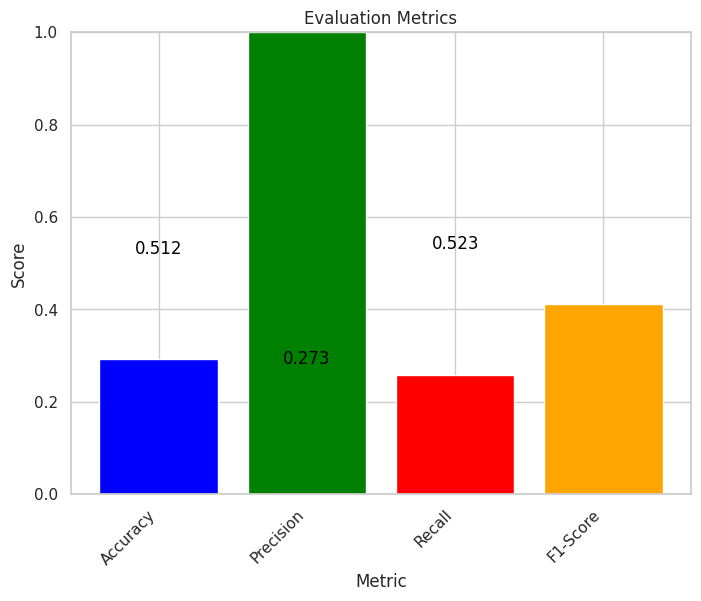

In [164]:
#Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_nn, precision_nn, recall_nn, f1_nn]
})

# Plotting the evaluation metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'green', 'red','orange'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization

#Add data labels to the bars (in the middle)
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             ha='center', va='bottom', color='black')  # Fixing the 'va' parameter
#for bar in bars:
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha='center', va='bottom')
# Save the plot to a file (choose the format you prefer, e.g., PNG, PDF, SVG)
#plt.savefig('10_Evaluation_metric_nn.png', bbox_inches='tight')

plt.show()

In [165]:
# Define target users and items
target_users = [1078030, 733707, 674939, 2057052]
item_ids = ['ML0151EN', 'ML0101ENv3']  # Assuming only one item ID is considered

# Initialize a list to store the results
results_list = []

# Generate predictions for the specified users and items
for user_id in target_users:
    for item_id in item_ids:
        try:
            # Assuming model.predict returns a tuple containing (user_id, item_id, predicted_rating)
            prediction = model.predict(user_id, item_id)
            
            # Extract predicted rating from the prediction tuple
            predicted_rating = prediction[2]
            
            # Append the result to the list
            results_list.append({
                'User': user_id,
                'Item': item_id,
                'Predicted Rating': predicted_rating
            })
        except IndexError:
            # Handle the case when the prediction tuple does not have the expected structure
            print(f"Prediction tuple for user {user_id}, item {item_id}, does not have the expected structure")
        except Exception as e:
            # Print any other exceptions that may occur during prediction
            print(f"Error predicting rating for user {user_id}, item {item_id}: {str(e)}")

# If no predictions are available, create a DataFrame with default values
if not results_list:
    results_list.append({
        'User': None,
        'Item': None,
        'Predicted Rating': None
    })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

print(results_df)

Prediction tuple for user 1078030, item ML0151EN, does not have the expected structure
Prediction tuple for user 1078030, item ML0101ENv3, does not have the expected structure
Prediction tuple for user 733707, item ML0151EN, does not have the expected structure
Prediction tuple for user 733707, item ML0101ENv3, does not have the expected structure
Prediction tuple for user 674939, item ML0151EN, does not have the expected structure
Prediction tuple for user 674939, item ML0101ENv3, does not have the expected structure
Prediction tuple for user 2057052, item ML0151EN, does not have the expected structure
Prediction tuple for user 2057052, item ML0101ENv3, does not have the expected structure
   User  Item Predicted Rating
0  None  None             None


In [166]:
results_df.head()

User  Item Predicted Rating
0  None  None             None

### Applying RecommenderNet Class and functions (Classification Dataset)

In [167]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_items, embedding_size=16, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_size = embedding_size
        
        self.user_embedding_layer = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            name='user_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
        )
        
        self.user_bias = layers.Embedding(
            input_dim=num_users,
            output_dim=1,
            name="user_bias"
        )
        
        self.item_embedding_layer = layers.Embedding(
            input_dim=num_items,
            output_dim=embedding_size,
            name='item_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
        )
        
        self.item_bias = layers.Embedding(
            input_dim=num_items,
            output_dim=1,
            name="item_bias"
        )
        
    def call(self, inputs):
        user_vector = self.user_embedding_layer(inputs['user_id'])
        user_bias = self.user_bias(inputs['user_id'])
        
        item_vector = self.item_embedding_layer(inputs['item_id'])
        item_bias = self.item_bias(inputs['item_id'])
        
        dot_user_item = tf.reduce_sum(user_vector * item_vector, axis=1)
        
        x = dot_user_item + tf.squeeze(user_bias) + tf.squeeze(item_bias)
        return tf.nn.sigmoid(x)
        #return tf.nn.relu(x)

In [168]:
# Creating a sparse matrix (user-item matrix - uim)
rating_sparse_df = ratings_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df.head()
# We eill use in function def ncf_build_train_val_dataset

user  AI0111EN  BC0101EN  BC0201EN  BC0202EN  BD0101EN  BD0111EN  BD0115EN  \
0     2       0.0       3.0       0.0       0.0       3.0       2.0       0.0   
1     4       0.0       0.0       0.0       0.0       2.0       2.0       2.0   
2     5       2.0       2.0       2.0       0.0       2.0       0.0       0.0   
3     7       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4     8       0.0       0.0       0.0       0.0       0.0       2.0       0.0   

   BD0121EN  BD0123EN  ...  SW0201EN  TA0105  TA0105EN  TA0106EN  TMP0101EN  \
0       2.0       2.0  ...       0.0     2.0       0.0       3.0        0.0   
1       2.0       2.0  ...       0.0     2.0       0.0       0.0        0.0   
2       0.0       2.0  ...       0.0     0.0       2.0       2.0        2.0   
3       0.0       0.0  ...       0.0     0.0       0.0       0.0        0.0   
4       0.0       0.0  ...       0.0     0.0       0.0       0.0        0.0   

   TMP0105EN  TMP0106  TMP107  WA0101EN  WA0103EN  
0        2.0      2.0     0.0       3.0       0.0  
1        2.0      2.0     0.0       2.0       2.0  
2        2.0      2.0     2.0       0.0       2.0  
3        0.0      0.0     0.0       0.0       0.0  
4        0.0      0.0     0.0       0.0       0.0  

[5 rows x 127 columns]

In [169]:
def ncf_data_prep(df: pd.DataFrame):
    df_uim = (ratings_df.pivot(index='user', columns='item', values='rating')
              .reset_index()
              .rename_axis(columns=None, index=None)
              .fillna(0))
    
    old_cols = df_uim.columns[1:]
    new_cols = [i for i in range(len(old_cols))]
    items_id2idx = {old_cols[i]: new_cols[i] for i in range(len(old_cols))}
    df_uim = df_uim.rename(mapper=items_id2idx, axis=1)

    df_train = (pd.DataFrame(df_uim.iloc[:, 1:].stack())
                .reset_index()
                .sort_values(by='level_0')
                .rename({'level_0': 'user_id', 'level_1': 'item_id', 0: 'interaction'}, axis=1)
               )
    df_train['interaction'] = df_train['interaction'].apply(lambda x: 1 if x > 0 else 0)
    
    df_train['user_id'] = df_train['user_id'].astype('int')
    df_train['item_id'] = df_train['item_id'].astype('int')
    df_train['interaction'] = df_train['interaction'].astype('int')

    users_id2idx = {old_id: new_id for new_id, old_id in enumerate(df_train['user_id'].unique())}
    df_train['user_id'] = df_train['user_id'].map(users_id2idx)

    return df_train.sort_values(by=['user_id', 'item_id'])#, users_id2idx, items_id2idx


In [170]:
data = ratings_df
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

df_prep = ncf_data_prep(df)
print("Prepared DataFrame:")
print(df_prep)

Original DataFrame:
           user        item  rating
0       1889878    CC0101EN     3.0
1       1342067    CL0101EN     3.0
2       1990814  ML0120ENv3     3.0
3        380098    BD0211EN     3.0
4        779563    DS0101EN     3.0
...         ...         ...     ...
233301  1540125    DS0101EN     3.0
233302  1250651    PY0101EN     3.0
233303  1003832  CB0105ENv1     3.0
233304   922065    BD0141EN     3.0
233305  1596120    DS0301EN     3.0

[233306 rows x 3 columns]
Prepared DataFrame:
         user_id  item_id  interaction
0              0        0            0
1              0        1            1
2              0        2            0
3              0        3            0
4              0        4            1
...          ...      ...          ...
4271521    33900      121            0
4271522    33900      122            0
4271523    33900      123            0
4271524    33900      124            0
4271525    33900      125            0

[4271526 rows x 3 columns]


In [171]:
def ncf_build_train_val_dataset(df: rating_sparse_df, val_split: float = 0.1, batch_size: int = 512, rs: int = 42) -> (tf.data.Dataset, tf.data.Dataset):
    """
        Parameters
            df          : Pandas Dataframe (long) with user IDs, item IDs, and ratings (shape: (n, 3)).
            val_split   : The proportion of the dataset to use for validation.
            batch_size  : The number of samples per batch of computation.
            rs          : Random state for reproducibility of the data shuffling.
        Returns
            ds_train    : A tensorFlow dataset for training.
            ds_val      : A TensorFlow dataset for validation.
    """
    # Calculate the number of validation Rows
    # - if df has 1000 rows and val_split is 0.1, then n_val will be 100 (10% of 1000).
    n_val = round(df.shape[0] * val_split)      # number of validation rows
    #n_val = int(len(df) * val_split)
    
    # Shuffle the data
    #df = df.sample(frac=1, random_state=rs).reset_index(drop=True)
    #if rs: x = df.sample(frac=1, random_state=rs).to_dict('series')
    #else:  x = df.to_dict('series')
    
    if rs:
        df = df.sample(frac=1, random_state=rs).reset_index(drop=True)
    
    #x = {
        #'user_id': df['user_id'].values.astype('int32'),
        #'item_id': df['item_id'].values.astype('int32')
    #}
    #y = df['interaction'].values.astype('int32')
    
    x = df[['user_id', 'item_id']].to_dict('list')
    y = df['interaction'].tolist()
    
    # Separate features and target
    #y = dict()
    #x = df[['user_id', 'item_id']].values
    #y = df['interaction'].values  
    #y['interaction'] = x.pop('interaction')

    
    # Convert to TensorFlow Dataset
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    
    # Create validation and training datasets
    ds_val = dataset.take(n_val).batch(batch_size)
    ds_train = dataset.skip(n_val).batch(batch_size)

    return ds_train, ds_val

In [172]:
#def ncf_build_train_val_dataset(df: pd.DataFrame, val_split: float = 0.1, batch_size: int = 512, rs: int =42) -> (tf.data.Dataset, tf.data.Dataset):
    # Example implementation, replace with actual logic to create datasets
    # Assuming df_prep is already prepared as needed
    #ds_train = tf.data.Dataset.from_tensor_slices((df_prep['user_id'].values, df_prep['item_id'].values, df_prep['interaction'].values))
    #ds_train = ds_train.shuffle(buffer_size=len(df_prep), seed=rs).batch(batch_size)

    # Split into training and validation datasets
    #val_size = int(val_split * len(df_prep))
    #ds_val = ds_train.take(val_size)
    #ds_train = ds_train.skip(val_size)

    #return ds_train, ds_val

In [173]:
# Load and prepare data
df = ratings_df
df_prep = ncf_data_prep(df)

# Build datasets
ds_train, ds_val = ncf_build_train_val_dataset(df_prep)

for batch in ds_train.take(1):
    print(batch)

({'user_id': <tf.Tensor: shape=(512,), dtype=int32, numpy=
array([32942, 27334, 17611, 23215, 16509, 20990,  1286, 14702,  8728,
       22682,  8868, 15580,   387, 24948, 27288, 26656, 32094, 27997,
        7221, 20632, 30719, 18407, 10132,  7680,  5494, 28470, 18099,
        4536, 28755, 12196, 11567, 24731, 11981, 22972, 16113, 25039,
       31657, 10021, 28939,  1371,  9987, 31108, 21413, 14248,  2914,
       28541,  9542,  1168,  5597, 18745, 22222,  2032,  5349, 33290,
        6892, 25463, 14617, 27341, 11084, 15507, 15135,  7431,  2967,
       21844, 30493, 25759, 32519, 18092, 20296,   604,  5997, 32662,
       29634, 20953, 12084, 33068, 22342,  1788, 29144, 23398,  6377,
       21674, 33392,  7274,  9760,  9183,  2595, 23591, 30592, 21099,
        3545, 30784, 23047,  9412,  8553, 25024, 25375, 19449,  2492,
       12490, 22561, 26727, 12780, 16848, 13652, 20373,  9194,  9176,
        9850, 27603, 22127, 11711, 31606, 23674, 14713,  3317, 17054,
       18881, 15887, 17879,   6

In [174]:
# Assuming ncf_data_prep is defined and used here
#df_prep = ncf_data_prep(df)
#ds_train, ds_val = ncf_build_train_val_dataset(df_prep)

print(ds_train)
print(ds_val)

<_BatchDataset element_spec=({'user_id': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'item_id': TensorSpec(shape=(None,), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=({'user_id': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'item_id': TensorSpec(shape=(None,), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [175]:
from tensorflow.keras.optimizers import Adam
def ncf_train(ds_train, ds_val, num_users, num_items, n_epochs: int = 10):
    """
        Parameters
            ds_train    : A TensorFlow dataset for training.
            ds_val      : A TensorFlow dataset for validation.
            num_users   : The number of unique users.
            num_items   : The number of unique items.
            n_epochs    : The number of epochs to train the model.
        Returns
            ncf_model   : The trained NCF model.
            ncf_hist    : The history of training (contains information about training and validation loss and metrics over epochs).
    """
    
    # Determine the number of users and items
    #num_users, num_items = (ratings_df
                        #.pivot(index='user', columns='item', values='rating')
                        #.reset_index()
                        #.rename_axis(index=None, columns=None)
                        #.shape)
    
    # Create and Compile the NCF Model
    ncf_model = RecommenderNet(num_users=num_users, num_items=num_items)
    ncf_model.compile(optimizer=Adam(),
                      loss='binary_crossentropy',
                      metrics=[
                          tf.keras.metrics.BinaryAccuracy(name="accuracy"),
                          tf.keras.metrics.AUC(name="auc"),
                      ])
    
    # Fit the model
    ncf_hist = ncf_model.fit(ds_train, 
                             validation_data=ds_val,
                             epochs=n_epochs,
                             verbose=1)
    
    return ncf_model, ncf_hist

In [176]:
%%time
#20min 37s
# Example Usage
# Assuming `ratings_df` is a pandas DataFrame with columns: ['user', 'item', 'rating']
preprocessed_df = ncf_data_prep(ratings_df)
ds_train, ds_val = ncf_build_train_val_dataset(preprocessed_df)

# Train model
num_users = preprocessed_df['user_id'].nunique()
num_items = preprocessed_df['item_id'].nunique()
#num_users = len(users_id2idx)
#num_items = len(items_id2idx)
ncf_model, ncf_hist = ncf_train(ds_train, ds_val, num_users, num_items)


ncf_model, ncf_hist = ncf_train(ds_train, ds_val, num_users, num_items, n_epochs=10)


Epoch 1/10
7509/7509 [==============================] - 53s 7ms/step - loss: 0.2136 - accuracy: 0.9440 - auc: 0.8007 - val_loss: 0.1640 - val_accuracy: 0.9482 - val_auc: 0.8913
Epoch 2/10
7509/7509 [==============================] - 52s 7ms/step - loss: 0.1524 - accuracy: 0.9526 - auc: 0.9107 - val_loss: 0.1502 - val_accuracy: 0.9532 - val_auc: 0.9155
Epoch 3/10
7509/7509 [==============================] - 51s 7ms/step - loss: 0.1368 - accuracy: 0.9581 - auc: 0.9336 - val_loss: 0.1433 - val_accuracy: 0.9554 - val_auc: 0.9261
Epoch 4/10
7509/7509 [==============================] - 51s 7ms/step - loss: 0.1274 - accuracy: 0.9614 - auc: 0.9453 - val_loss: 0.1396 - val_accuracy: 0.9567 - val_auc: 0.9308
Epoch 5/10
7509/7509 [==============================] - 50s 7ms/step - loss: 0.1197 - accuracy: 0.9643 - auc: 0.9537 - val_loss: 0.1374 - val_accuracy: 0.9579 - val_auc: 0.9328
Epoch 6/10
7509/7509 [==============================] - 50s 7ms/step - loss: 0.1123 - accuracy: 0.9676 - auc: 0.960

In [177]:
def save_model(model, model_path):
    """
    Save the trained model to a specified path.
    
    :param model: Trained Keras model.
    :param model_path: Path to save the model.
    """
    model.save(model_path)
    print(f"Model saved to {model_path}")
    

#model_path = 'ncf_model_start.h5'
#save_model(ncf_model, model_path)

In [178]:
# Save the entire model to a HDF5 file.
#ncf_model.save('ncf_model_start.h5')

# Save the model using the TensorFlow SavedModel format
#model2.save('rec_net_extra', save_format='tf')

# Alternatively, save only the model weights
# model2.save_weights('rec_net_extra_weights.h5')# Save the model

In [179]:
#def save_model(model, model_path):
    #"""
    #Save the trained model to a specified path in the TensorFlow SavedModel format.
    
    #:param model: Trained Keras model.
    #:param model_path: Path to save the model.
    #"""
    # Create directory if it doesn't exist
    #os.makedirs(model_path, exist_ok=True)
    # Save the model
    #model.save(model_path, save_format="tf")
    #print(f"Model saved to {model_path}")

#def load_model(model_path):
    #"""
    #Load a trained model from a specified path.
    
    #:param model_path: Path to the saved model.
    #:return: Loaded Keras model.
    #"""
    #model = tf.keras.models.load_model(model_path)
    #print(f"Model loaded from {model_path}")
    #return model

In [180]:
#model_path = 'ncf_model_start'
#save_model(ncf_model, model_path)

In [181]:
def ncf_predict(model, target_users, ratings_df, user_id2idx_dict, course_id2idx_dict, threshold=0.5): 
    """
    Generates course recommendations for multiple target users based on NCF model predictions,
    excluding courses they are already enrolled in.

    Parameters:
        model (tf.keras.Model): The trained NCF model.
        target_users (list): List of user IDs for whom recommendations are to be generated.
        ratings_df (pd.DataFrame): DataFrame containing user-item ratings.
        user_id2idx_dict (dict): Dictionary mapping original user IDs to indexed user IDs.
        course_id2idx_dict (dict): Dictionary mapping original item IDs to indexed item IDs.
        threshold (float): Classification threshold for converting probabilities to binary predictions.

    Returns:
        pd.DataFrame: A DataFrame with user IDs, item IDs, predicted interaction scores (probabilities), and binary classification.
    """
    
    recommendations = pd.DataFrame()
    
    for user_id in target_users:
        if user_id not in user_id2idx_dict:
            continue

        mapped_user_id = user_id2idx_dict[user_id]
        enrolled_courses = set(ratings_df[ratings_df['user'] == mapped_user_id]['item'].tolist())
        
        # Create a DataFrame for all items
        active_user_df = pd.DataFrame({
            'user_id': [mapped_user_id] * len(course_id2idx_dict),
            'item_id': list(course_id2idx_dict.values())
        })
        
        # Convert to TensorFlow Dataset
        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user_id': active_user_df['user_id'].values.astype('int32'),
            'item_id': active_user_df['item_id'].values.astype('int32')
        })).batch(512)
        
        # Predict probabilities
        ncf_predictions = model.predict(ds_pred)
        
        # Apply threshold to get binary classification
        binary_predictions = (ncf_predictions > threshold).astype(int).flatten()
        
        # Add predictions to the DataFrame
        active_user_df['ncf_prediction'] = ncf_predictions.flatten()
        active_user_df['predicted_class'] = binary_predictions
        
        # Filter out already enrolled courses
        results_df = active_user_df.loc[~active_user_df['item_id'].isin(enrolled_courses)].copy()
        
        # Set the score as the probability (or any other metric you wish to use)
        results_df['score'] = round(results_df['ncf_prediction'] * 100, 2)
        
        # Map back to original IDs
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item_id'].map({v: k for k, v in course_id2idx_dict.items()})
        
        # Concatenate results
        recommendations = pd.concat([recommendations, results_df])
    
    # Sort and reset index
    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False])
    recommendations = recommendations.reset_index(drop=True)
    
    return recommendations[['user_id', 'item_id', 'score', 'predicted_class']]

In [182]:
# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = ncf_predict(ncf_model, target_users, encoded_data, user_id2idx_dict, course_id2idx_dict)
print(recommendations)

1/1 [==============================] - 0s 9ms/step
     user_id     item_id  score  predicted_class
0     674939    BD0153EN   7.76                0
1     674939  RAVSCTEST1   4.16                0
2     674939    CC0150EN   2.91                0
3     674939  ML0101ENv3   2.59                0
4     674939    DX0106EN   2.53                0
..       ...         ...    ...              ...
452  2057052    DAI101EN   0.00                0
453  2057052    CC0271EN   0.00                0
454  2057052    DX0107EN   0.00                0
455  2057052   TMP0101EN   0.00                0
456  2057052      DS0107   0.00                0

[457 rows x 4 columns]


In [183]:
def ncf_predict(model, target_users, ratings_df, user_id2idx_dict, course_id2idx_dict): 
    """
    Generates course recommendations for multiple target users based on NCF model predictions,
    excluding courses they are already enrolled in.
    
    Parameters:
        model (tf.keras.Model): The trained NCF model.
        target_users (list): List of user IDs for whom recommendations are to be generated.
        ratings_df (pd.DataFrame): DataFrame containing user-item ratings.
        users_id2idx (dict): Dictionary mapping original user IDs to indexed user IDs.
        items_id2idx (dict): Dictionary mapping original item IDs to indexed item IDs.
        
    Returns:
        pd.DataFrame: A DataFrame with user IDs, item IDs, and predicted interaction scores.
    """
    
    recommendations = pd.DataFrame()
    
    for user_id in target_users:
        if user_id not in user_id2idx_dict:
            continue

        mapped_user_id = user_id2idx_dict[user_id]
        enrolled_courses = set(ratings_df[ratings_df['user'] == mapped_user_id]['item'].tolist())
        
        active_user_df = pd.DataFrame({
            'user_id': [mapped_user_id] * len(course_id2idx_dict),
            'item_id': list(course_id2idx_dict.values())
        })
        
        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user_id': active_user_df['user_id'].values.astype('int32'),
            'item_id': active_user_df['item_id'].values.astype('int32')
        })).batch(512)
        
        ncf_predictions = model.predict(ds_pred)
        
        # Use predict to get the probability output from the neural network model
        #predicted_score = model_1.predict(features)[0][0]*100

        # Assuming binary classification with sigmoid activation, we take the probability of the positive class
        # Use predict_proba for classification to get the probability of each class
        #predicted_proba = model_1.predict_proba(features)[0] #AttributeError: 'Sequential' object has no attribute 'predict_proba'

        # Assuming binary classification, we take the probability of the positive class
        #predicted_class = (predicted_score > 50).astype(int)  # Threshold at 50%
        
        active_user_df['ncf_prediction'] = ncf_predictions.flatten()
        results_df = active_user_df.loc[~active_user_df['item_id'].isin(enrolled_courses)].copy()
        results_df.loc[:, 'score'] = round((results_df['ncf_prediction'] * 10000) / 3, 2).clip(0, 100) 
        #results_df.loc[:, 'score'] = (results_df['ncf_prediction'] * 100).clip(0, 100)  # Scale and clip the scores
        
        results_df.loc[:, 'user_id'] = user_id
        results_df.loc[:, 'item_id'] = results_df['item_id'].map({v: k for k, v in course_id2idx_dict.items()})
        
        recommendations = pd.concat([recommendations, results_df])
    
    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False])
    recommendations = recommendations.reset_index(drop=True)
    
    return recommendations[['user_id', 'item_id', 'score']]

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = ncf_predict(ncf_model, target_users, encoded_data, user_id2idx_dict, course_id2idx_dict)
print(recommendations)


1/1 [==============================] - 0s 10ms/step
     user_id     item_id       score
0     674939  RAVSCTEST1  100.000000
1     674939    BD0153EN  100.000000
2     674939    CC0150EN   96.870003
3     674939  ML0101ENv3   86.370003
4     674939    DX0106EN   84.419998
..       ...         ...         ...
452  2057052    BD0115EN    0.040000
453  2057052    ML0120EN    0.040000
454  2057052    DAI101EN    0.040000
455  2057052    CC0271EN    0.040000
456  2057052    DX0107EN    0.000000

[457 rows x 3 columns]


In [184]:
#users_id2idx = {user_id: idx for idx, user_id in enumerate(df_train['user_id'].unique())}
#items_id2idx = {item_id: idx for idx, item_id in enumerate(df_train['item_id'].unique())}

<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

# Construct Stage

<h3><a id="Opt_3">TASK (Optional): Customize the RecommenderNet to potentially improve the model performance</a> 

The pre-defined `RecommenderNet()` is a actually very basic neural network, you are encouraged to customize it to see if model prediction performance will be improved. Here are some directions:
- Hyperparameter tuning, such as the embedding layer dimensions
- Add more hidden layers
- Try different activation functions such as `ReLu`


In [185]:
num_users = preprocessed_df['user_id'].nunique()
num_items = preprocessed_df['item_id'].nunique()
print(f"There are total `{num_users}` of users and `{num_items}` items")

There are total `33901` of users and `126` items


In [186]:
## WRITE YOUR CODE HERE

## Update RecommenderNet() class

## compile and fit the updated model

## evaluate the updated model
class RecommenderNetPlus(keras.Model):
    
    def __init__(self, num_users, num_items, embedding_size=32, **kwargs):
        """
           Constructor
           :param int num_users: number of users
           :param int num_items: number of items
           :param int embedding_size: the size of embedding vector
        """
        super(RecommenderNetPlus, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_size = embedding_size
        
        # Define a user_embedding vector
        # Input dimension is the num_users
        # Output dimension is the embedding size
        self.user_embedding_layer = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            name='user_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # Define a user bias layer
        self.user_bias = layers.Embedding(
            input_dim=num_users,
            output_dim=1,
            name="user_bias")
        
        # Define an item_embedding vector
        # Input dimension is the num_items
        # Output dimension is the embedding size
        self.item_embedding_layer = layers.Embedding(
            input_dim=num_items,
            output_dim=embedding_size,
            name='item_embedding_layer',
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        # Define an item bias layer
        self.item_bias = layers.Embedding(
            input_dim=num_items,
            output_dim=1,
            name="item_bias")
        
    def call(self, inputs):
        """
           method to be called during model fitting
           
           :param inputs: user and item one-hot vectors
        """
        # Compute the user embedding vector
        user_vector = self.user_embedding_layer(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        item_vector = self.item_embedding_layer(inputs[:, 1])
        item_bias = self.item_bias(inputs[:, 1])
        dot_user_item = tf.tensordot(user_vector, item_vector, 2)
        # Add all the components (including bias)
        x = dot_user_item + user_bias + item_bias
        # Sigmoid output layer to output the probability
        return tf.nn.elu(x)

#### The data is being modeled using regression, with the Mean Squared Error (MSE) loss function, rather than Binary Cross-Entropy (BCE).

In [187]:
model_1 = RecommenderNetPlus(num_users, num_items)
model_1.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_squared_error"])
history = model_1.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)

Epoch 1/20
329/329 [==============================] - 5s 10ms/step - loss: 0.2397 - mean_squared_error: 0.2395 - val_loss: 0.0981 - val_mean_squared_error: 0.0979
Epoch 2/20
329/329 [==============================] - 3s 10ms/step - loss: 0.5770 - mean_squared_error: 0.5766 - val_loss: 1.4720 - val_mean_squared_error: 1.4716
Epoch 3/20
329/329 [==============================] - 3s 9ms/step - loss: 2.0149 - mean_squared_error: 2.0145 - val_loss: 0.5877 - val_mean_squared_error: 0.5872
Epoch 4/20
329/329 [==============================] - 3s 9ms/step - loss: 0.2008 - mean_squared_error: 0.2003 - val_loss: 0.6047 - val_mean_squared_error: 0.6042
Epoch 5/20
329/329 [==============================] - 3s 9ms/step - loss: 0.0970 - mean_squared_error: 0.0965 - val_loss: 0.3870 - val_mean_squared_error: 0.3864
Epoch 6/20
329/329 [==============================] - 3s 9ms/step - loss: 0.0885 - mean_squared_error: 0.0879 - val_loss: 0.3502 - val_mean_squared_error: 0.3496
Epoch 7/20
329/329 [======

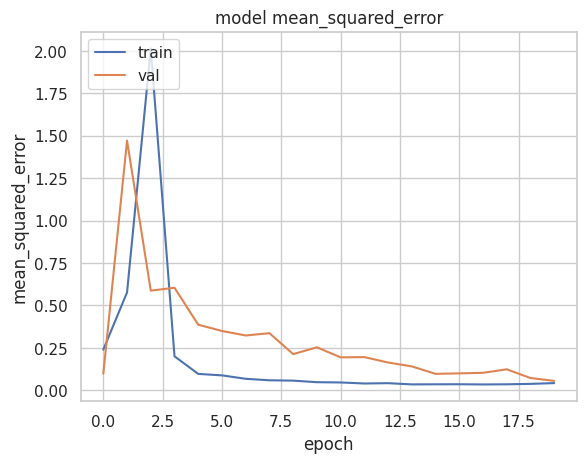

In [188]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [189]:
model_1.evaluate(x_test, y_test)

730/730 [==============================] - 2s 3ms/step - loss: 0.3555 - mean_squared_error: 0.3538


[0.3555281460285187, 0.35382595658302307]

In [190]:
model_1.summary()

Model: "recommender_net_plus"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 user_embedding_layer (Embed  multiple                 1084832   
 ding)                                                           
                                                                 
 user_bias (Embedding)       multiple                  33901     
                                                                 
 item_embedding_layer (Embed  multiple                 4032      
 ding)                                                           
                                                                 
 item_bias (Embedding)       multiple                  126       
                                                                 
Total params: 1,122,891
Trainable params: 1,122,891
Non-trainable params: 0
_________________________________________________________________


In [191]:
from sklearn import metrics
# Train the model (if not already trained)
#history = model.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)
#history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epoch)

# Predict ratings for the test data
nn_prediction_1 = model_1.predict(x_test)

# Calculate evaluation metrics
mae_nn_1 = metrics.mean_absolute_error(y_test, nn_prediction_1)
mse_nn_1 = metrics.mean_squared_error(y_test, nn_prediction_1)
rmse_nn_1 = np.sqrt(mse_nn_1)

print(f"Mean Absolute Error (MAE): {mae_nn_1}")
print(f"Mean Squared Error (MSE): {mse_nn_1}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn_1}")

730/730 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.5856087742884934
Mean Squared Error (MSE): 0.35382589031793726
Root Mean Squared Error (RMSE): 0.5948326574070536


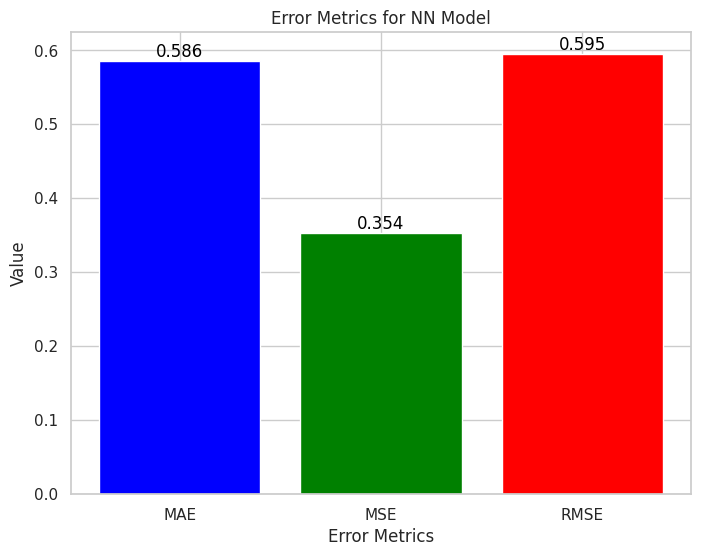

In [192]:
# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_nn_1, mse_nn_1, rmse_nn_1]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for NN Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             ha='center', va='bottom', color='black')  # Fixing the 'va' parameter

# Save the figure
#plt.savefig('11_nn_1_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

### NN Classification

If we used NN classification, consider the prediction problem as a classification problem as rating only has two categorical values (`Audit` vs. `Completion`).

In [193]:
# Convert predictions to binary labels
completion = 3  # Adjust completion as needed
binary_predictions_1 = [1 if pred >= completion else 0 for pred in nn_prediction_1]

# Calculate accuracy
accuracy_nn_1 = accuracy_score(y_test, binary_predictions_1)

# Calculate AUC
#auc_nn = roc_auc_score(y_test, nn_prediction)

# Calculate precision
precision_nn_1 = precision_score(y_test, binary_predictions_1)

# Calculate recall
recall_nn_1 = recall_score(y_test, binary_predictions_1)

# Calculate F1 score
f1_nn_1 = f1_score(y_test, binary_predictions_1)

print(f"Accuracy: {accuracy_nn_1}")
print(f"Precision: {precision_nn_1}")
print(f"Recall: {recall_nn_1}")
print(f"F1 Score: {f1_nn_1}")

Accuracy: 0.045561699027045564
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


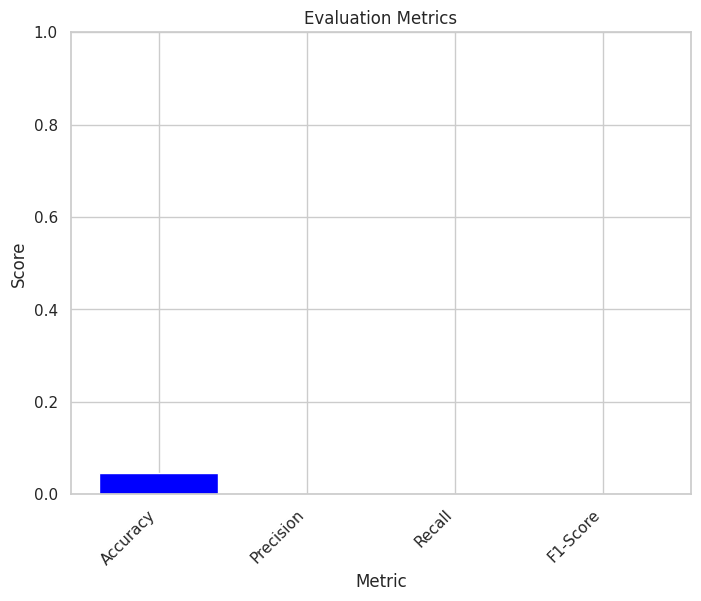

In [194]:
#Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_nn_1, precision_nn_1, recall_nn_1, f1_nn_1]
})

# Plotting the evaluation metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'green', 'red','orange'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
# Save the plot to a file (choose the format you prefer, e.g., PNG, PDF, SVG)
#plt.savefig('12_Evaluation_metric_nn_1.png', bbox_inches='tight')

plt.show()

<h3><a id="Opt_3">RecommenderNetExtra (Optional): Customize the RecommenderNet to potentially improve the model performance with more hidden layers</a> 

In [195]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

class RecommenderNetExtra(tf.keras.Model):
    
    def __init__(self, num_users, num_items, latent_dim_mf=8, latent_dim_mlp=32, reg_mf=1e-6, reg_mlp=1e-6, **kwargs):
        """
        Constructor
        :param int num_users: number of users
        :param int num_items: number of items
        :param int latent_dim_mf: the size of MF embedding vector
        :param int latent_dim_mlp: the size of MLP embedding vector
        :param float reg_mf: regularization factor for MF embeddings
        :param float reg_mlp: regularization factor for MLP embeddings
        """
        super(RecommenderNetExtra, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_items = num_items
        self.latent_dim_mf = latent_dim_mf
        self.latent_dim_mlp = latent_dim_mlp
        
        # MF user embedding
        self.mf_user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=latent_dim_mf,
            name='mf_user_embedding',
            embeddings_initializer='RandomNormal',
            embeddings_regularizer=l2(reg_mf),
            input_length=1
        )
        
        # MF item embedding
        self.mf_item_embedding = layers.Embedding(
            input_dim=num_items,
            output_dim=latent_dim_mf,
            name='mf_item_embedding',
            embeddings_initializer='RandomNormal',
            embeddings_regularizer=l2(reg_mf),
            input_length=1
        )
        
        # MLP user embedding
        self.mlp_user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=latent_dim_mlp,
            name='mlp_user_embedding',
            embeddings_initializer='RandomNormal',
            embeddings_regularizer=l2(reg_mlp),
            input_length=1
        )
        
        # MLP item embedding
        self.mlp_item_embedding = layers.Embedding(
            input_dim=num_items,
            output_dim=latent_dim_mlp,
            name='mlp_item_embedding',
            embeddings_initializer='RandomNormal',
            embeddings_regularizer=l2(reg_mlp),
            input_length=1
        )
        
        # MLP layers
        self.mlp_layers = tf.keras.Sequential([
            layers.Dense(64, activation='relu', kernel_regularizer=l2(reg_mlp)),
            layers.Dense(32, activation='relu', kernel_regularizer=l2(reg_mlp)),
            layers.Dense(16, activation='relu', kernel_regularizer=l2(reg_mlp))
        ])
        
        # Final prediction layer
        self.predict_layer = layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        """
        Method to be called during model fitting
        :param inputs: user and item one-hot vectors
        """
        user_id = inputs[:, 0]
        item_id = inputs[:, 1]
        
        # MF part
        mf_user_latent = self.mf_user_embedding(user_id)
        mf_item_latent = self.mf_item_embedding(item_id)
        mf_vector = tf.keras.layers.multiply([mf_user_latent, mf_item_latent])
        
        # MLP part
        mlp_user_latent = self.mlp_user_embedding(user_id)
        mlp_item_latent = self.mlp_item_embedding(item_id)
        mlp_vector = tf.keras.layers.concatenate([mlp_user_latent, mlp_item_latent])
        mlp_vector = self.mlp_layers(mlp_vector)
        
        # Concatenate MF and MLP parts
        final_vector = tf.keras.layers.concatenate([mf_vector, mlp_vector])
        
        # Prediction
        output = self.predict_layer(final_vector)
        
        return output

#### The data is being modeled using regression, with the Mean Squared Error (MSE) loss function, rather than Binary Cross-Entropy (BCE).

In [196]:
%%time
model_2 = RecommenderNetExtra(num_users, num_items) #, latent_dim_mf=8, latent_dim_mlp=32, reg_mf=1e-6, reg_mlp=1e-6)
#model_1 = RecommenderNetPlus(num_users, num_items, 10)
model_2.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_squared_error"])
history = model_2.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)

Epoch 1/20
329/329 [==============================] - 6s 12ms/step - loss: 0.0498 - mean_squared_error: 0.0476 - val_loss: 0.0201 - val_mean_squared_error: 0.0187
Epoch 2/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0078 - mean_squared_error: 0.0066 - val_loss: 0.0111 - val_mean_squared_error: 0.0100
Epoch 3/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0028 - mean_squared_error: 0.0019 - val_loss: 0.0171 - val_mean_squared_error: 0.0163
Epoch 4/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0022 - mean_squared_error: 0.0014 - val_loss: 0.0204 - val_mean_squared_error: 0.0197
Epoch 5/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0018 - mean_squared_error: 0.0012 - val_loss: 0.0221 - val_mean_squared_error: 0.0215
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0017 - mean_squared_error: 0.0012 - val_loss: 0.0243 - val_mean_squared_error: 0.0237
Epoch 7/20
329/329 [==

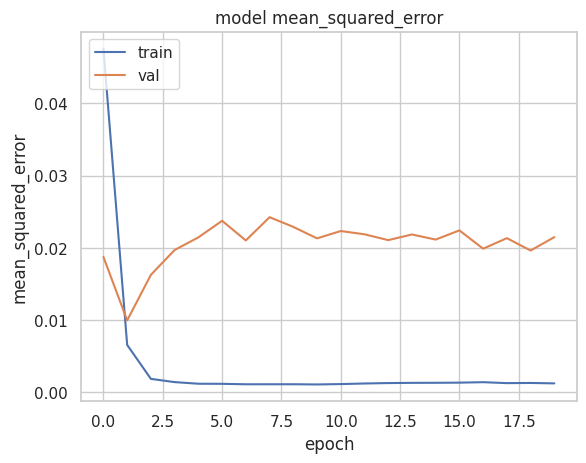

In [197]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [198]:
model_2.evaluate(x_test, y_test)

730/730 [==============================] - 2s 3ms/step - loss: 0.0236 - mean_squared_error: 0.0233


[0.023600323125720024, 0.02326766774058342]

In [199]:
model_2.summary()

Model: "recommender_net_extra"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mf_user_embedding (Embeddin  multiple                 271208    
 g)                                                              
                                                                 
 mf_item_embedding (Embeddin  multiple                 1008      
 g)                                                              
                                                                 
 mlp_user_embedding (Embeddi  multiple                 1084832   
 ng)                                                             
                                                                 
 mlp_item_embedding (Embeddi  multiple                 4032      
 ng)                                                             
                                                                 
 sequential_2 (Sequential)   (None, 16)      

In [200]:
%%time
model_3 = RecommenderNetExtra(num_users, num_items) #, latent_dim_mf=8, latent_dim_mlp=32, reg_mf=1e-6, reg_mlp=1e-6)
#model_1 = RecommenderNetPlus(num_users, num_items, 10)
#model_2.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_squared_error"])
model_3.compile(optimizer=Adam(),
                      loss='binary_crossentropy',
                      metrics=[
                          tf.keras.metrics.BinaryAccuracy(name="accuracy"),
                          tf.keras.metrics.AUC(name="auc"),
                      ])
    
history = model_3.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)

Epoch 1/20
329/329 [==============================] - 6s 12ms/step - loss: 0.1660 - accuracy: 0.9532 - auc: 0.8828 - val_loss: 0.0423 - val_accuracy: 0.9886 - val_auc: 0.9803
Epoch 2/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0173 - accuracy: 0.9956 - auc: 0.9964 - val_loss: 0.0278 - val_accuracy: 0.9923 - val_auc: 0.9835
Epoch 3/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0079 - accuracy: 0.9983 - auc: 0.9987 - val_loss: 0.0376 - val_accuracy: 0.9884 - val_auc: 0.9831
Epoch 4/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0068 - accuracy: 0.9985 - auc: 0.9988 - val_loss: 0.0430 - val_accuracy: 0.9866 - val_auc: 0.9845
Epoch 5/20
329/329 [==============================] - 4s 11ms/step - loss: 0.0056 - accuracy: 0.9988 - auc: 0.9992 - val_loss: 0.0506 - val_accuracy: 0.9844 - val_auc: 0.9831
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.0053 - accuracy: 0.9988 - auc: 0.9987 - val_loss

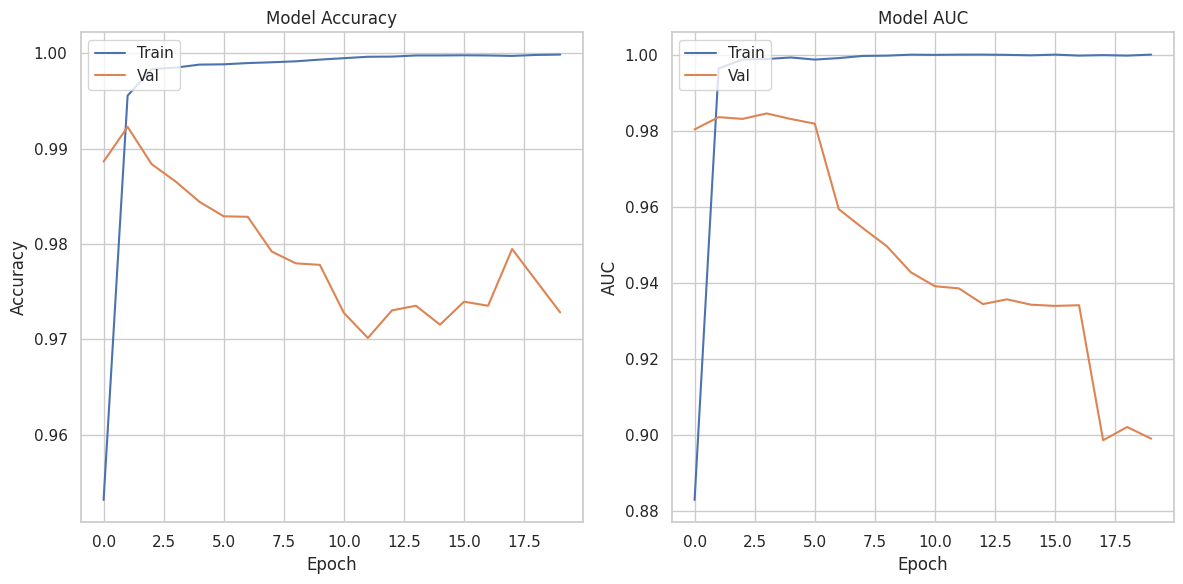

In [201]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot for AUC
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Results:</b><p style = "font-family:Verdana; font-size:14px">

<ol>
    <li>Overfitting: The significant gap between training and validation performance indicates overfitting. The model performs well on the training data but poorly on the validation data, suggesting it has learned to memorize the training data rather than generalize from it.
    <li>Early Stopping: Implementing early stopping might help in preventing the model from overfitting by stopping the training process when the validation performance starts to degrade.
    <li>Regularization: Consider adding regularization techniques such as dropout, L2 regularization, or data augmentation to reduce overfitting.
    <li>Hyperparameter Tuning: Adjusting hyperparameters such as learning rate, batch size, and network architecture might improve the model's performance and reduce overfitting.
</ol>
     These steps can help improve the model's generalization capability, leading to better performance on unseen data.</div>








### Applying RecommenderNetExtra (without Class) and functions

In [202]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten, Dense, Concatenate

def RecommenderNetExtra(num_users: int, num_items: int, 
                        latent_dim_mf: int = 32, latent_dim_mlp: int = 32,
                        reg_mf: float = 0, reg_mlp: float = 0.001,
                        dense_layers: list = [16, 8, 4],
                        reg_layers: list = [0.01, 0.01, 0.01],
                        activation_dense: str = 'relu') -> keras.Model:
    
    # input layer, define two input layers: one for user IDs and one for item IDs.
    # There are total `33901` of users and `126` items, num_users = len(ratings_df['user'].unique()) and num_items = len(ratings_df['item'].unique())
    user = Input(shape=(), dtype='int32', name='user_id')
    item = Input(shape=(), dtype='int32', name='item_id')
    
    # Embedding layers 
    # - create embedding layers for both users and items for both MF and MLP parts. 
    # - embeddings are initialized with random normal values and regularized with L2 regularization.
    mf_user_embedding = layers.Embedding(
        input_dim=num_users,
        output_dim=latent_dim_mf,
        name='mf_user_embedding',
        embeddings_initializer='RandomNormal',
        embeddings_regularizer=l2(reg_mf),
        input_length=1
    )(user)
    
    mf_item_embedding = layers.Embedding(
        input_dim=num_items,
        output_dim=latent_dim_mf,
        name='mf_item_embedding',
        embeddings_initializer='RandomNormal',
        embeddings_regularizer=l2(reg_mf),
        input_length=1
    )(item)
    
    # Multi-Layer Perceptron (MLP) embeddings
    mlp_user_embedding = layers.Embedding(
        input_dim=num_users,
        output_dim=latent_dim_mlp,
        name='mlp_user_embedding',
        embeddings_initializer='RandomNormal',
        embeddings_regularizer=l2(reg_mlp),
        input_length=1
    )(user)
    
    mlp_item_embedding = layers.Embedding(
        input_dim=num_items,
        output_dim=latent_dim_mlp,
        name='mlp_item_embedding',
        embeddings_initializer='RandomNormal',
        embeddings_regularizer=l2(reg_mlp),
        input_length=1
    )(item)
    
    # Latent Vectors:
    # - flatten the outputs of the embedding layers to create latent vectors for users and items.
    # MF vectors (flattened embedding outputs)
    mf_user_latent = Flatten()(mf_user_embedding)
    mf_item_latent = Flatten()(mf_item_embedding)
    
    # MLP vectors (flattened embedding outputs)
    mlp_user_latent = Flatten()(mlp_user_embedding)
    mlp_item_latent = Flatten()(mlp_item_embedding)
    
    
    # Combine MF and MLP Latent Vectors:
    # - multiply the user and item latent vectors for the MF part (element-wise).
    # - concatenate the user and item latent vectors for the MLP part.
    mf_vector = layers.multiply([mf_user_latent, mf_item_latent])
    
    # MLP path: concatenate user and item embeddings
    mlp_vector = layers.concatenate([mlp_user_latent, mlp_item_latent])
    
    # MLP dense layers
    for i in range(len(dense_layers)):
        layer = Dense(units=dense_layers[i],
                      activation=activation_dense,
                      activity_regularizer=l2(reg_layers[i]),
                      name=f'layer_{i}')
        mlp_vector = layer(mlp_vector)
    
    # Prediction Layer:
    # - concatenate the output of the final MLP dense layer with the MF concatenated vector.
    # - pass the concatenated vector through a dense layer with a single neuron and a sigmoid activation function to produce the final prediction.
    predict_layer = layers.concatenate([mf_vector, mlp_vector]) #combined_vector
    
    # Output layer
    output = Dense(units=1, activation='sigmoid', name='interaction')(predict_layer)
    
    # Model definition
    model = Model(inputs=[user, item], outputs=output)
    
    return model

In [203]:
def ncf_data_prep(ratings_df: pd.DataFrame) -> pd.DataFrame:
    df_uim = (ratings_df.pivot(index='user', columns='item', values='rating')
              .reset_index()
              .rename_axis(columns=None, index=None)
              .fillna(0))
    
    old_cols = df_uim.columns[1:]
    new_cols = [i for i in range(len(old_cols))]
    items_id2idx = {old_cols[i]: new_cols[i] for i in range(len(old_cols))}
    df_uim = df_uim.rename(mapper=items_id2idx, axis=1)

    df_train = (pd.DataFrame(df_uim.iloc[:, 1:].stack())
                .reset_index()
                .sort_values(by='level_0')
                .rename({'level_0': 'user_id', 'level_1': 'item_id', 0: 'interaction'}, axis=1)
               )
    df_train['interaction'] = df_train['interaction'].apply(lambda x: 1 if x > 0 else 0)
    
    df_train['user_id'] = df_train['user_id'].astype('int')
    df_train['item_id'] = df_train['item_id'].astype('int')
    df_train['interaction'] = df_train['interaction'].astype('int')

    return df_train.sort_values(by=['user_id', 'item_id'])

In [204]:
def ncf_build_train_val_dataset(df: pd.DataFrame, val_split: float = 0.1, batch_size: int = 512, rs: int = 42) -> (tf.data.Dataset, tf.data.Dataset):
    # Ensure necessary columns are present
    #if not all(col in df.columns for col in ['user_id', 'item_id', 'interaction']):
        #raise ValueError("DataFrame must contain columns 'user_id', 'item_id', and 'interaction'.")
    
    # Calculate the number of validation rows
    n_val = round(df.shape[0] * val_split)
    
    # Shuffle the data if random state is provided
    if rs:
        df = df.sample(frac=1, random_state=rs).reset_index(drop=True)
    
    # Separate features and target
    x = {'user_id': df['user_id'].values, 'item_id': df['item_id'].values}
    y = df['interaction'].values
    
    # Create TensorFlow datasets
    ds = tf.data.Dataset.from_tensor_slices((x, y))
    
    # Split into training and validation datasets
    ds_val = ds.take(n_val).batch(batch_size=batch_size)
    ds_train = ds.skip(n_val).batch(batch_size=batch_size)
    
    return ds_train, ds_val

In [205]:
def ncf_train_1(ds_train, ds_val, n_epochs=20):
    # Ensure ratings_df is a DataFrame and is defined before this function

    # Determine the number of users and items
    # - pivot the DataFrame to get a user-item interaction matrix.
    # - reset the index and remove axis labels.
    # - get the shape of the matrix, which gives the number of users (n_users) and items (n_items).
    n_users, n_items = (ratings_df
                        .pivot(index='user', columns='item', values='rating')
                        .reset_index()
                        .rename_axis(index=None, columns=None)
                        .shape)
    
    # Create and compile the NCF model
    ncf_model = RecommenderNetExtra(num_users=n_users, num_items=n_items)
    ncf_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=[tf.keras.metrics.TruePositives(name="tp"),
                                tf.keras.metrics.FalsePositives(name="fp"),
                                tf.keras.metrics.TrueNegatives(name="tn"),
                                tf.keras.metrics.FalseNegatives(name="fn"),
                                tf.keras.metrics.BinaryAccuracy(name="accuracy"),
                                tf.keras.metrics.Precision(name="precision"),
                                tf.keras.metrics.Recall(name="recall"),
                                tf.keras.metrics.AUC(name="auc"),])

    # Train the model
    ncf_hist = ncf_model.fit(ds_train,
                            validation_data=ds_val,
                            epochs=n_epochs,
                            verbose=1)

    return ncf_model, ncf_hist

In [206]:
data = ratings_df
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

df_prep = ncf_data_prep(df)
print("Prepared DataFrame:")
print(df_prep)

Original DataFrame:
           user        item  rating
0       1889878    CC0101EN     3.0
1       1342067    CL0101EN     3.0
2       1990814  ML0120ENv3     3.0
3        380098    BD0211EN     3.0
4        779563    DS0101EN     3.0
...         ...         ...     ...
233301  1540125    DS0101EN     3.0
233302  1250651    PY0101EN     3.0
233303  1003832  CB0105ENv1     3.0
233304   922065    BD0141EN     3.0
233305  1596120    DS0301EN     3.0

[233306 rows x 3 columns]
Prepared DataFrame:
         user_id  item_id  interaction
0              0        0            0
1              0        1            1
2              0        2            0
3              0        3            0
4              0        4            1
...          ...      ...          ...
4271521    33900      121            0
4271522    33900      122            0
4271523    33900      123            0
4271524    33900      124            0
4271525    33900      125            0

[4271526 rows x 3 columns]


In [207]:
#df_prep = ncf_data_prep(df)
#ds_train, ds_val = ncf_build_train_val_dataset(df_prep)
ds_train, ds_val = ncf_build_train_val_dataset(df_prep)

for batch in ds_train.take(1):
    print(batch)
print(ds_train)
print(ds_val)

({'user_id': <tf.Tensor: shape=(512,), dtype=int64, numpy=
array([32942, 27334, 17611, 23215, 16509, 20990,  1286, 14702,  8728,
       22682,  8868, 15580,   387, 24948, 27288, 26656, 32094, 27997,
        7221, 20632, 30719, 18407, 10132,  7680,  5494, 28470, 18099,
        4536, 28755, 12196, 11567, 24731, 11981, 22972, 16113, 25039,
       31657, 10021, 28939,  1371,  9987, 31108, 21413, 14248,  2914,
       28541,  9542,  1168,  5597, 18745, 22222,  2032,  5349, 33290,
        6892, 25463, 14617, 27341, 11084, 15507, 15135,  7431,  2967,
       21844, 30493, 25759, 32519, 18092, 20296,   604,  5997, 32662,
       29634, 20953, 12084, 33068, 22342,  1788, 29144, 23398,  6377,
       21674, 33392,  7274,  9760,  9183,  2595, 23591, 30592, 21099,
        3545, 30784, 23047,  9412,  8553, 25024, 25375, 19449,  2492,
       12490, 22561, 26727, 12780, 16848, 13652, 20373,  9194,  9176,
        9850, 27603, 22127, 11711, 31606, 23674, 14713,  3317, 17054,
       18881, 15887, 17879,   6

In [208]:
ratings_df

user        item  rating
0       1889878    CC0101EN     3.0
1       1342067    CL0101EN     3.0
2       1990814  ML0120ENv3     3.0
3        380098    BD0211EN     3.0
4        779563    DS0101EN     3.0
...         ...         ...     ...
233301  1540125    DS0101EN     3.0
233302  1250651    PY0101EN     3.0
233303  1003832  CB0105ENv1     3.0
233304   922065    BD0141EN     3.0
233305  1596120    DS0301EN     3.0

[233306 rows x 3 columns]

In [209]:
%%time
#42min 16s
# Example Usage
# Assuming `ratings_df` is a pandas DataFrame with columns: ['user', 'item', 'rating']
preprocessed_df = ncf_data_prep(ratings_df)
ds_train, ds_val = ncf_build_train_val_dataset(preprocessed_df)

#num_users = preprocessed_df['user_id'].nunique()
#num_items = preprocessed_df['item_id'].nunique()

ncf_model, ncf_hist = ncf_train_1(ds_train, ds_val, n_epochs=20)

Epoch 1/20
7509/7509 [==============================] - 122s 16ms/step - loss: 0.1820 - tp: 28406.0000 - fp: 12750.0000 - tn: 3621784.0000 - fn: 181433.0000 - accuracy: 0.9495 - precision: 0.6902 - recall: 0.1354 - auc: 0.8738 - val_loss: 0.1246 - val_tp: 7263.0000 - val_fp: 2948.0000 - val_tn: 400738.0000 - val_fn: 16204.0000 - val_accuracy: 0.9552 - val_precision: 0.7113 - val_recall: 0.3095 - val_auc: 0.9278
Epoch 2/20
7509/7509 [==============================] - 124s 16ms/step - loss: 0.0986 - tp: 98010.0000 - fp: 28337.0000 - tn: 3606197.0000 - fn: 111829.0000 - accuracy: 0.9635 - precision: 0.7757 - recall: 0.4671 - auc: 0.9574 - val_loss: 0.1162 - val_tp: 10464.0000 - val_fp: 4786.0000 - val_tn: 398900.0000 - val_fn: 13003.0000 - val_accuracy: 0.9584 - val_precision: 0.6862 - val_recall: 0.4459 - val_auc: 0.9384
Epoch 3/20
7509/7509 [==============================] - 121s 16ms/step - loss: 0.0720 - tp: 134057.0000 - fp: 25397.0000 - tn: 3609137.0000 - fn: 75782.0000 - accuracy: 

In [210]:
ncf_model.evaluate(ds_train, verbose=0)

[0.0012841522693634033,
 209120.0,
 449.0,
 3634085.0,
 719.0,
 0.9996961951255798,
 0.9978575110435486,
 0.9965735673904419,
 0.9997411966323853]

In [211]:
ncf_model.evaluate(ds_val, verbose=0)

[0.662409245967865,
 11486.0,
 11756.0,
 391930.0,
 11981.0,
 0.9444297552108765,
 0.49419155716896057,
 0.4894532859325409,
 0.7761905193328857]

In [212]:
ncf_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 item_id (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 mlp_user_embedding (Embedding)  (None, 32)          1084832     ['user_id[0][0]']                
                                                                                                  
 mlp_item_embedding (Embedding)  (None, 32)          4064        ['item_id[0][0]']                
                                                                                              

In [213]:
# Save the entire model to a HDF5 file.
ncf_model.save('ncf_model.h5')

# Save the model using the TensorFlow SavedModel format
#model2.save('rec_net_extra', save_format='tf')

# Alternatively, save only the model weights
# model2.save_weights('rec_net_extra_weights.h5')

In [214]:
# Define a path to the folder where you want to write and save the model
#path = '/kaggle/working/'

In [215]:
#import pickle
#def write_pickle(path, model_object, save_as:str):
    #'''
    #In: 
        #path:         path of folder where you want to save the pickle
        #model_object: a model you want to pickle
        #save_as:      filename for how you want to save the model

   # Out: A call to pickle the model in the folder indicated
    #'''    

    #with open(path + save_as + '.pickle', 'wb') as to_write:
        #pickle.dump(model_object, to_write)

In [216]:
import pickle
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [217]:
ncf_hist_1 = ncf_hist

In [218]:
# Write pickle
#write_pickle(path, ncf_hist_1.history, 'ncf_hist_1')

In [219]:
# Save the history object
#with open('ncf_hist_1.pkl', 'wb') as file:
    #pickle.dump(ncf_hist_1.history, file)

# Later, load the history object
#with open('ncf_hist_1.pkl', 'rb') as file:
    #loaded_history = pickle.load(file)

#### Predict

In [220]:
def ncf_predict(model, target_users, ratings_df): #users_id2idx, items_id2idx):
    try:
        recommendations = pd.DataFrame()

        # Generate mappings
        users_id2idx = {user_id: idx for idx, user_id in enumerate(ratings_df['user'].unique())}
        items_id2idx = {item_id: idx for idx, item_id in enumerate(ratings_df['item'].unique())}
        
        for user_id in target_users:
            if user_id not in users_id2idx:
                continue

            mapped_user_id = users_id2idx[user_id]
            enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())

            # Prepare data for prediction
            active_user_df = pd.DataFrame({
                'user_id': [mapped_user_id] * len(items_id2idx),
                'item_id': list(items_id2idx.values())
            })

            # Create TensorFlow dataset
            ds_pred = tf.data.Dataset.from_tensor_slices(({
                'user_id': active_user_df['user_id'].values.astype('int32'),
                'item_id': active_user_df['item_id'].values.astype('int32')
            })).batch(512)

            # Model prediction
            ncf_predictions = model.predict(ds_pred)

            # Store predictions in DataFrame
            active_user_df['ncf_prediction'] = ncf_predictions.flatten()

            # Exclude already enrolled courses
            results_df = active_user_df[~active_user_df['item_id'].isin(enrolled_courses)]

            # Calculate scores based on predictions
            results_df['score'] = round((results_df['ncf_prediction'] * 100), 2) #/3 was excluded

            # Map back to original user ID and item ID
            results_df['user_id'] = user_id
            results_df['item_id'] = results_df['item_id'].map({v: k for k, v in items_id2idx.items()})

            # Append results to recommendations DataFrame
            recommendations = pd.concat([recommendations, results_df])

        recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False])
        recommendations = recommendations.reset_index(drop=True)

        return recommendations[['user_id', 'item_id', 'score']]

    except Exception as e:
        print(f"Error in ncf_predict: {str(e)}")
        return pd.DataFrame(columns=['user_id', 'item_id', 'score'])

In [221]:
#from tensorflow.keras.models import load_model

# Load the model from the specified path
#ncf_model = load_model('/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/ncf_model.h5')

In [222]:
target_users = [1078030, 733707, 674939, 2057052]
recommendations = ncf_predict(ncf_model, target_users, ratings_df) # users_id2idx, items_id2idx)
print(recommendations)

1/1 [==============================] - 0s 10ms/step
     user_id     item_id   score
0     674939    BD0145EN  100.00
1     674939    ST0201EN    0.01
2     674939    CC0101EN    0.00
3     674939    CL0101EN    0.00
4     674939  ML0120ENv3    0.00
..       ...         ...     ...
499  2057052    DB0113EN    0.00
500  2057052    DX0108EN    0.00
501  2057052      DS0107    0.00
502  2057052    DB0115EN    0.00
503  2057052  GPXX0QR3EN    0.00

[504 rows x 3 columns]


#### Graph

In [223]:
# Define a path to the folder where you want to read and load the model
path = '/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/'

In [224]:
# Read pickle
ncf_hist_1 = read_pickle(path, 'ncf_hist')

In [225]:
ncf_hist_1

{'loss': [0.00045681640040129423,
  0.0003905464254785329,
  0.00034862736356444657,
  0.00031078781466931105,
  0.00028777611441910267,
  0.00026286632055416703,
  0.00024483888410031796,
  0.00022563542006537318,
  0.0002124519960489124,
  0.0001972679019672796,
  0.00018518547585699707,
  0.00018239428754895926,
  0.00016972646699286997,
  0.00016060692723840475,
  0.00016064610099419951,
  0.000150313600897789,
  0.00014555353845935315,
  0.00014143588487058878,
  0.0001385704381391406,
  0.00013427305384539068],
 'mean_squared_error': [0.00045681640040129423,
  0.0003905464254785329,
  0.00034862736356444657,
  0.00031078781466931105,
  0.00028777611441910267,
  0.00026286632055416703,
  0.00024483888410031796,
  0.00022563542006537318,
  0.0002124519960489124,
  0.0001972679019672796,
  0.00018518547585699707,
  0.00018239428754895926,
  0.00016972646699286997,
  0.00016060692723840475,
  0.00016064610099419951,
  0.000150313600897789,
  0.00014555353845935315,
  0.00014143588487

In [226]:
#ncf_model.compile(optimizer='adam',
                      #loss='mean_squared_error',
                      #metrics=['mean_squared_error'])

In [227]:
#%%time
#ncf_hist_1 = ncf_model.fit(ds_train,validation_data=ds_val,epochs=20,verbose=1)

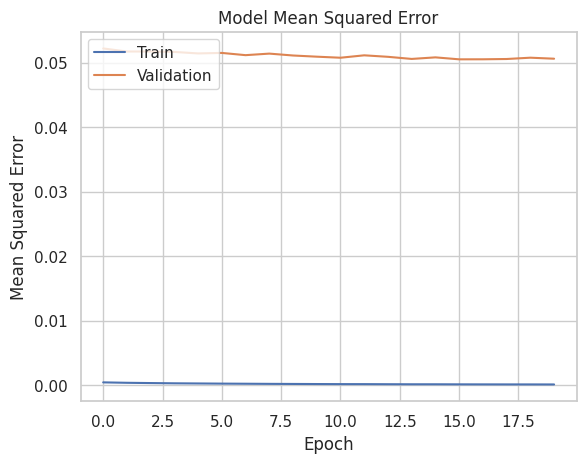

In [228]:
import matplotlib.pyplot as plt

# Assuming history is your training history object

# Plotting MSE
plt.plot(ncf_hist_1['mean_squared_error'])  # Replace with the correct key for MSE from your history
plt.plot(ncf_hist_1['val_mean_squared_error'])  # Replace with the correct key for validation MSE from your history

plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [229]:
df_prep.head()

user_id  item_id  interaction
0        0        0            0
1        0        1            1
2        0        2            0
3        0        3            0
4        0        4            1

In [230]:
#from sklearn import metrics
# Train the model (if not already trained)
#history = model.fit(x_train, y_train, validation_split = 0.1, epochs=20, batch_size=512)
#history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epoch)
#y_test = df_prep['interaction'].values

# Predict ratings for the test data y_test vs y_predict
#nn_prediction_3 = ncf_predict(ncf_model, target_users, ratings_df) # ncf predict the unenrolled courses only

# Calculate evaluation metrics
#mae_nn_3 = metrics.mean_absolute_error(ds_val, nn_prediction_3)# y-test - failed
#mse_nn_3 = metrics.mean_squared_error(ds_val, nn_prediction_3)
#rmse_nn_3 = np.sqrt(mse_nn_3)

#print(f"Mean Absolute Error (MAE): {mae_nn_3}")
#print(f"Mean Squared Error (MSE): {mse_nn_3}")
#print(f"Root Mean Squared Error (RMSE): {rmse_nn_3}")

In [231]:
# List of error metrics
#error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
#error_values = [mae_nn_3, mse_nn_3, rmse_nn_3]

# Plotting the graph
#plt.figure(figsize=(8, 6))
#bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
#plt.xlabel('Error Metrics')
#plt.ylabel('Value')
#plt.title('Error Metrics for NN Model')

# Adding y-values on the bars
#for bar, value in zip(bars, error_values):
    #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             #ha='center', va='bottom', color='black')  # Fixing the 'va' parameter

# Save the figure
#plt.savefig('13_nn_2_error_metrics.png', bbox_inches='tight')

# Display the plot
#plt.show()

#### Trying other ncf_predict function

In [232]:
import pandas as pd
import tensorflow as tf

def ncf_predict_1(model, target_users, ratings_df) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on NCF model predictions,
    excluding courses they are already enrolled in.
    
    Parameters:
        model (tf.keras.Model): The trained NCF model.
        target_users (list): List of user IDs for whom recommendations are to be generated.
        ratings_df (pd.DataFrame): DataFrame containing user-item ratings.
        
    Returns:
        pd.DataFrame: A DataFrame with user IDs, item IDs, and predicted interaction scores.
    """
    try:
        recommendations = pd.DataFrame()

        # Generate unique users and items lists
        user_list = ratings_df["user"].unique().tolist()
        item_list = ratings_df["item"].unique().tolist()
        items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

        for user_id in target_users:
            if user_id not in user_list:
                continue

            mapped_user_id = user_list.index(user_id) # users_id2idx[user_id]
            enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())

            # Prepare data for prediction
            active_user_df = pd.DataFrame({
                'user_id': [mapped_user_id] * len(items_id2idx),
                'item_id': list(items_id2idx.values())
            })

            # Create TensorFlow dataset
            ds_pred = tf.data.Dataset.from_tensor_slices(({
                'user_id': active_user_df['user_id'].values.astype('int32'),
                'item_id': active_user_df['item_id'].values.astype('int32')
            })).batch(512)

            # Model prediction
            ncf_predictions = model.predict(ds_pred)

            # Store predictions in DataFrame
            active_user_df['ncf_prediction'] = ncf_predictions.flatten()

            # Exclude already enrolled courses
            results_df = active_user_df[~active_user_df['item_id'].isin(enrolled_courses)]

            # Calculate scores based on predictions
            results_df['score'] = round((results_df['ncf_prediction'] * 100), 2) # /3 was deleted

            # Map back to original user ID and item ID
            results_df['user_id'] = user_id
            results_df['item_id'] = results_df['item_id'].map({v: k for k, v in items_id2idx.items()})

            # Append results to recommendations DataFrame
            recommendations = pd.concat([recommendations, results_df])

        recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False])
        recommendations = recommendations.reset_index(drop=True)

        return recommendations[['user_id', 'item_id', 'score']]

    except Exception as e:
        print(f"Error in ncf_predict_1: {str(e)}")
        return pd.DataFrame(columns=['user_id', 'item_id', 'score'])


In [233]:
target_users = [1078030, 733707, 674939, 2057052]
recommendations = ncf_predict_1(ncf_model, target_users, ratings_df) # users_id2idx, items_id2idx)
print(recommendations)

1/1 [==============================] - 0s 10ms/step
     user_id     item_id   score
0     674939    BD0145EN  100.00
1     674939    ST0201EN    0.01
2     674939    CC0101EN    0.00
3     674939    CL0101EN    0.00
4     674939  ML0120ENv3    0.00
..       ...         ...     ...
499  2057052    DB0113EN    0.00
500  2057052    DX0108EN    0.00
501  2057052      DS0107    0.00
502  2057052    DB0115EN    0.00
503  2057052  GPXX0QR3EN    0.00

[504 rows x 3 columns]


In [234]:
recommendations.describe()

user_id       score
count  5.040000e+02  504.000000
mean   1.135932e+06    3.384623
std    5.542003e+05   18.069731
min    6.749390e+05    0.000000
25%    7.190150e+05    0.000000
50%    9.058685e+05    0.000000
75%    1.322786e+06    0.000000
max    2.057052e+06  100.000000

In [235]:
recommendations[recommendations['score']>=30]

user_id     item_id  score
0     674939    BD0145EN  100.0
252  1078030    CL0101EN  100.0
253  1078030  ML0120ENv3  100.0
254  1078030    DS0101EN  100.0
255  1078030    ST0101EN  100.0
256  1078030    BD0111EN  100.0
257  1078030    BD0145EN  100.0
258  1078030  ML0101ENv3  100.0
259  1078030    DB0101EN  100.0
260  1078030    BD0151EN  100.0
261  1078030    CC0210EN  100.0
262  1078030    DX0106EN  100.0
378  2057052    DS0101EN  100.0
379  2057052    DB0101EN  100.0
380  2057052  LB0109ENv1  100.0
381  2057052    BD0151EN  100.0
382  2057052    BD0153EN  100.0

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute</h1></div>

# Summary
Neural Network-based collaborative filtering, with a predefined and trained neural network, we can extract or embed users and items into latent feature spaces and further predict the interaction between a user and an item with the latent feature vectors.
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The Neural Network-based collaborative filtering results
    <li>Capture complex, non-linear relationships in course-rating data, allowing for more accurate modeling of user preferences.
    <li>The learned embeddings can capture latent factors and provide insights into the underlying features influencing course ratings.
    <li>Handling implicit feedback, such as user interactions and engagement, which may not be explicitly rated.
</ol>


<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

# Construct Stage

## __Regression Prediction using Embedding Features in a Glance (Simple Small Dataset Practice)__


This example create simple embedding and regression model without the embedding model

#### Embedding creation and data preparation

In [236]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# Data Preparation
def get_user_embedding(user_id):
    # Dummy function to get user embeddings
    return np.random.rand(10)

def get_item_embedding(item_id):
    # Dummy function to get item embeddings
    return np.random.rand(10)

users = [1, 2, 3, 4, 5] # user id
items = [101, 102, 103, 104, 105] # course id
ratings = [4, 5, 3, 4, 2] #ratings 1 to 5

data = []
for user, item, rating in zip(users, items, ratings):
    user_emb = get_user_embedding(user) # np.random.rand(user_id)
    item_emb = get_item_embedding(item) # np.random.rand(item_id)
    features = np.concatenate([user_emb, item_emb])
    data.append((user, item, features, rating))

df = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating'])

We skip training the data, and go to train the dataframe feom the embedding creation and data preparation

#### Split, train and test data from df (which has the features embedding matrix) for the regression model 

In [237]:
# Train a Regression Model
X = np.vstack(df['features'].values)
y = df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [238]:
# Predict Score for New User-Item Pairs
test_user = 6
test_item = 106

test_user_emb = get_user_embedding(test_user)
print(f'User emb: {test_user_emb}\n')

test_item_emb = get_item_embedding(test_item)
print(f'Item emb: {test_item_emb}\n')

test_features = np.concatenate([test_user_emb, test_item_emb]).reshape(1, -1)
print(f'Features: {test_features}\n')

predicted_rating = reg_model.predict(test_features)
predicted_class = (predicted_rating > 0.5).astype(int)
print(f'Predicted Rating: {predicted_rating}\n')
print(f'Predicted Class: {predicted_class}\n')

# Evaluate the model
y_pred = (reg_model.predict(X_test) > 0.5).astype(int)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(classification_report(y_test, y_pred))


User emb: [0.36603817 0.63852452 0.43501734 0.92918788 0.01270294 0.66456227
 0.56306469 0.13599318 0.31760883 0.69069189]

Item emb: [0.47945327 0.72842182 0.99847857 0.89678894 0.27330134 0.54489227
 0.39162505 0.2845951  0.93578878 0.69513643]

Features: [[0.36603817 0.63852452 0.43501734 0.92918788 0.01270294 0.66456227
  0.56306469 0.13599318 0.31760883 0.69069189 0.47945327 0.72842182
  0.99847857 0.89678894 0.27330134 0.54489227 0.39162505 0.2845951
  0.93578878 0.69513643]]

Predicted Rating: [2.71526492]

Predicted Class: [1]

Mean Squared Error: 16.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [239]:
df

user  item                                           features  rating
0     1   101  [0.202139836837116, 0.29237607615383543, 0.971...       4
1     2   102  [0.40341024982668705, 0.20344692951832766, 0.9...       5
2     3   103  [0.09787057654859266, 0.4428428005160888, 0.11...       3
3     4   104  [0.936575420609803, 0.3575674762130492, 0.4195...       4
4     5   105  [0.7264049989395719, 0.2439856475097132, 0.937...       2

In [240]:
print(f'X: {X}\n') # only the features from df X = np.vstack(df['features'].values)
print(f'y: {y}\n')

X: [[0.20213984 0.29237608 0.97181712 0.27557893 0.79201193 0.35644899
  0.65415018 0.62440942 0.93966378 0.17859045 0.40634756 0.68222643
  0.67553497 0.55550094 0.80300156 0.08025477 0.65328265 0.84881035
  0.69012996 0.82137761]
 [0.40341025 0.20344693 0.98934186 0.07989182 0.32688267 0.80046621
  0.4821872  0.91710829 0.19288055 0.99717998 0.78236985 0.12819454
  0.74313225 0.94394399 0.78517957 0.31147155 0.57496988 0.86990482
  0.94888822 0.1530681 ]
 [0.09787058 0.4428428  0.11184902 0.16342841 0.80712255 0.98354848
  0.65719033 0.02516207 0.37198128 0.01839859 0.92151472 0.46441143
  0.05939829 0.03392104 0.60123637 0.35436464 0.92745598 0.54384662
  0.21458782 0.75339677]
 [0.93657542 0.35756748 0.41954963 0.99888065 0.22108539 0.24965254
  0.32409082 0.75404525 0.87528908 0.31989655 0.36675716 0.84549481
  0.0032735  0.20604474 0.16788079 0.85436192 0.87125421 0.42461489
  0.16455236 0.0599892 ]
 [0.726405   0.24398565 0.93708539 0.73145013 0.35421148 0.99793498
  0.72109228 

#### Predict the courses recommendation

In [241]:
def recommend_courses_for_user(user_id, all_items, enrolled_items):
    recommendations = []
    user_emb = get_user_embedding(user_id) # np.random.rand()
    for item_id in all_items:
        if item_id in enrolled_items:
            continue
        item_emb = get_item_embedding(item_id) # np.random.rand()
        features = np.concatenate([user_emb, item_emb]).reshape(1, -1)
        predicted_rating = reg_model.predict(features)[0]
        predicted_score = round(predicted_rating * 100/5,2)
        recommendations.append({
            'user_id': user_id,
            'item_id': item_id,
            'predicted_rating': predicted_rating,
            'predicting_score (%)': predicted_score,
        })
    return pd.DataFrame(recommendations)

# Example usage
all_items = [101, 102, 103, 104, 105, 106, 107, 108]  # All possible items
enrolled_items = [101, 103, 105]  # Items the user is already enrolled in
user_id = 6

recommendations = recommend_courses_for_user(user_id, all_items, enrolled_items)
print(recommendations)

   user_id  item_id  predicted_rating  predicting_score (%)
0        6      102          2.749079                 54.98
1        6      104          3.473509                 69.47
2        6      106          3.409883                 68.20
3        6      107          3.514159                 70.28
4        6      108          2.900653                 58.01


### Another example by creating a dataframe, embedding model and regression model
#### Embedding creation

In [242]:
# Example dummy data 
rat_df = pd.DataFrame({
    'user': [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5],
    'item': [101, 102, 101, 102, 103, 101, 104, 105, 101, 102, 103, 104, 105],
    'rating': [5, 4, 3, 4, 5, 5, 5, 2, 1, 3, 4, 4, 3]
})
n_user = len(rat_df['user'].unique())
n_item = len(rat_df['item'].unique())
print(f"There are total `{n_user}` of users and `{n_item}` items")

There are total `5` of users and `5` items


In [243]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Dot
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Create mappings for users and items to ensure they are in a continuous range starting from 0
user_id_map = {user_id: idx for idx, user_id in enumerate(rat_df['user'].unique())}
item_id_map = {item_id: idx for idx, item_id in enumerate(rat_df['item'].unique())}

# Map the original user and item IDs to the new continuous range
rat_df['user'] = rat_df['user'].map(user_id_map)
rat_df['item'] = rat_df['item'].map(item_id_map)

# Number of unique users and items
n_user = rat_df['user'].nunique()
n_item = rat_df['item'].nunique()

# Define latent dimensions and regularization parameters
n_user_latent_dim = 3
n_item_latent_dim = 3
reg_users = 1e-6
reg_items = 1e-6

# Input layers
user_input = Input(shape=(), dtype='int32', name='user')
item_input = Input(shape=(), dtype='int32', name='item')

# User embeddings
user_embedding = Embedding(input_dim=n_user,
                           output_dim=n_user_latent_dim,
                           name='user_embedding',
                           embeddings_initializer="he_normal",
                           embeddings_regularizer=l2(reg_users))(user_input)
user_vec = Flatten(name='user_flat')(user_embedding)

# Item embeddings
item_embedding = Embedding(input_dim=n_item,
                           output_dim=n_item_latent_dim,
                           name='item_embedding',
                           embeddings_initializer="he_normal",
                           embeddings_regularizer=l2(reg_items))(item_input)
item_vec = Flatten(name='item_flat')(item_embedding)

# Dot product of user and item embeddings
merged = Dot(name='dot', normalize=True, axes=1)([user_vec, item_vec])
merged_dropout = Dropout(0.2)(merged)

# Hidden layers
dense_1 = Dense(units=32, activation='relu', name='Dense_1')(merged_dropout)
do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

dense_2 = Dense(units=16, activation='relu', name='Dense_2')(do_1)
do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

result = Dense(1, name='rating', activation='relu')(do_2)


In [244]:
print(f'User id map: {user_id_map}')
print(f'Item id map: {item_id_map}')
print(f'User in rat df: {n_user}')
print(f'Item in rat df: {n_item}')

User id map: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
Item id map: {101: 0, 102: 1, 103: 2, 104: 3, 105: 4}
User in rat df: 5
Item in rat df: 5


### Fit the user and item embedding matrix without split, train and test

In [245]:
# Create and compile the model
model = Model(inputs=[user_input, item_input], outputs=result)
model.compile(optimizer=Adam(), loss='mse')

# Prepare the training data
user_data = rat_df['user'].values
item_data = rat_df['item'].values
rating_data = rat_df['rating'].values

# Train the model
model.fit([user_data, item_data], rating_data, epochs=10, batch_size=2)

# Extract user and item embedding matrices
user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

print("User Embedding Matrix:")
print(user_embedding_matrix)
print("\nItem Embedding Matrix:")
print(item_embedding_matrix)

Epoch 1/10
7/7 [==============================] - 2s 4ms/step - loss: 14.4563
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 13.7217
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 13.6409
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 13.3864
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 13.0790
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 12.7653
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 12.8051
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 10.4255
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 11.5082
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 11.4842
User Embedding Matrix:
[[-0.16277428 -1.3569006  -0.39837402]
 [-0.79486233 -0.21048829  0.5503514 ]
 [ 0.08081149  0.47817832 -1.0525054 ]
 [ 0.28482467 -0.03352533 -0.05735685]
 [ 1.3823442  -0.6341094  -0.01641542]]


##### We acquire user embedding matrix, item embedding matrix without split, train and test the rat_df data

#### Embedding split, train and test

##### Split, train and test data rat_df

In [246]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(rat_df, test_size=0.2, random_state=42)

# Prepare the training and testing data
user_data_train = train_df['user'].values
item_data_train = train_df['item'].values
rating_data_train = train_df['rating'].values

user_data_test = test_df['user'].values
item_data_test = test_df['item'].values
rating_data_test = test_df['rating'].values

# Train the model
model.fit([user_data_train, item_data_train], rating_data_train, epochs=10, batch_size=2, validation_data=([user_data_test, item_data_test], rating_data_test))

# Extract user and item embedding matrices
user_embedding_matrix_1 = model.get_layer('user_embedding').get_weights()[0]
item_embedding_matrix_1 = model.get_layer('item_embedding').get_weights()[0]

print("User Embedding Matrix:")
print(f'{user_embedding_matrix_1},\n shape: {user_embedding_matrix_1.shape}')
print("\nItem Embedding Matrix:")
print(f'{item_embedding_matrix_1} ,\n shape: {user_embedding_matrix_1.shape}')

Epoch 1/10
5/5 [==============================] - 0s 65ms/step - loss: 11.2023 - val_loss: 10.5731
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 10.2682 - val_loss: 10.1859
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 10.1029 - val_loss: 9.8065
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 9.3600 - val_loss: 9.4278
Epoch 5/10
5/5 [==============================] - 0s 11ms/step - loss: 8.0516 - val_loss: 9.0308
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 9.0254 - val_loss: 8.6128
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 8.0578 - val_loss: 8.1734
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: 6.6376 - val_loss: 7.7243
Epoch 9/10
5/5 [==============================] - 0s 11ms/step - loss: 6.2193 - val_loss: 7.2556
Epoch 10/10
5/5 [==============================] - 0s 12ms/step - loss: 8.6403 - val_loss: 6.8356
User Embedding Matrix:
[

### Data preparation from embedding

We decided to use the embedding matrix without split, train and test.

In [247]:
def emb_data_prep(df: pd.DataFrame = rat_df)-> keras.Model:
    """
    Parameters
        df          : A dataframe containing the user-item interactions.
    Returns
        data        : A dataframe with user and item IDs replaced by indices
        user_id2idx : A dictionary mapping original user IDs to their corresponding indices.
        item_id2idx : A dictionary mapping original item IDs to their corresponding indices.
    """
    # - create a copy of the input DataFrame to avoid modifying the original data.
    # - create a dictionary that maps each unique user ID to a unique index (for item also). The enumerate function assigns an index to each unique user ID (for item ID as well).
    # - replace each user ID in the DataFrame with its corresponding index using the user_id2idx mapping (for item also).
    # - return the processed DataFrame along with the user and item ID to index mappings.
    data = df.copy()
    user_id2idx = {k: v for v, k in enumerate(data['user'].unique())}
    item_id2idx = {k: v for v, k in enumerate(data['item'].unique())}
    data['user'] = data['user'].map(user_id2idx)
    data['item'] = data['item'].map(item_id2idx)
    return data, user_id2idx, item_id2idx

In [248]:
# Prepare data
df_prepared, user_id2idx, item_id2idx = emb_data_prep(rat_df)
print(df_prepared)
print(user_id2idx)
print(item_id2idx)

    user  item  rating
0      0     0       5
1      0     1       4
2      1     0       3
3      1     1       4
4      1     2       5
5      2     0       5
6      2     3       5
7      2     4       2
8      3     0       1
9      3     1       3
10     3     2       4
11     3     3       4
12     4     4       3
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [249]:
def rev_dict(d: dict) -> dict:
    # - Define the function rev_dict that takes one argument d, which is a dictionary, and returns a dictionary.
    # - Caution: only use Key: Value pairs are unique 
    # rev_user_id_map = {v: k for k, v in user_id_map.items()}
    # rev_item_id_map = {v: k for k, v in item_id_map.items()}
    return {v: k for k, v in d.items()}

Creating a function to reverse dictionary

#### Create dataframe for embeddings

In [250]:
# Create DataFrames for Embeddings
df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(3)])
df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(3)])

In [251]:
df_uem

UFeature0  UFeature1  UFeature2
0  -0.162774  -1.356901  -0.398374
1  -0.794862  -0.210488   0.550351
2   0.080811   0.478178  -1.052505
3   0.284825  -0.033525  -0.057357
4   1.382344  -0.634109  -0.016415

In [252]:
# Create DataFrames for Embeddings
df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(3)])
df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(3)])
#user_emb_df = pd.DataFrame(user_embedding_matrix).reset_index().rename(columns={"index": "user"})
#item_emb_df = pd.DataFrame(item_embedding_matrix).reset_index().rename(columns={"index": "item"})


# Insert user_ids
if 'user' not in df_uem.columns: # wrong code if not 'user' in
    user = rat_df.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1)
    df_uem = user.merge(df_uem, left_index=True, right_index=True)

# Insert item_ids
if 'item' not in df_iem.columns:
    items = rat_df.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1)
    df_iem = items.merge(df_iem, left_index=True, right_index=True)
    
# Merge user embedding and item embedding features with ratings data
merge_df = pd.merge(rat_df, df_uem, how='left', on='user').fillna(0)
merge_df = pd.merge(merge_df, df_iem, how='left', on='item').fillna(0)
#merge_df = pd.merge(rat_df, user_emb_df, how='left', on='user').fillna(0)
#merge_df = pd.merge(merge_df, item_emb_df, how='left', on='item').fillna(0)

print(f'UEM: {df_uem}, \n shape:{df_uem.shape}')
print(f'IEM: {df_iem}, \n shape:{df_iem.shape}')

#print(f'UEM: {user_emb_df}, \n shape:{user_emb_df.shape}')
#print(f'IEM: {item_emb_df}, \n shape:{item_emb_df.shape}')

UEM:    user  UFeature0  UFeature1  UFeature2
0     0  -0.162774  -1.356901  -0.398374
1     1  -0.794862  -0.210488   0.550351
2     2   0.080811   0.478178  -1.052505
3     3   0.284825  -0.033525  -0.057357
4     4   1.382344  -0.634109  -0.016415, 
 shape:(5, 4)
IEM:    item  IFeature0  IFeature1  IFeature2
0     0  -0.531794  -0.600797  -0.384761
1     1   0.994965   0.154203   0.087546
2     2   0.629860   0.916749   0.099549
3     3  -0.014098   0.946926  -0.864616
4     4   0.833074   0.357620  -0.018467, 
 shape:(5, 4)


In [253]:
# Create DataFrames for Embeddings
user_emb_df = pd.DataFrame(user_embedding_matrix).reset_index().rename(columns={"index": "user"})
item_emb_df = pd.DataFrame(item_embedding_matrix).reset_index().rename(columns={"index": "item"})

    
# Merge user embedding and item embedding features with ratings data
merge_df_1 = pd.merge(rat_df, user_emb_df, how='left', on='user').fillna(0)
merge_df_1 = pd.merge(merge_df_1, item_emb_df, how='left', on='item').fillna(0)

#print(f'UEM: {df_uem}, \n shape:{df_uem.shape}')
#print(f'IEM: {df_iem}, \n shape:{df_iem.shape}')

print(f'UEM: {user_emb_df}, \n shape:{user_emb_df.shape}')
print(f'IEM: {item_emb_df}, \n shape:{item_emb_df.shape}')

UEM:    user         0         1         2
0     0 -0.162774 -1.356901 -0.398374
1     1 -0.794862 -0.210488  0.550351
2     2  0.080811  0.478178 -1.052505
3     3  0.284825 -0.033525 -0.057357
4     4  1.382344 -0.634109 -0.016415, 
 shape:(5, 4)
IEM:    item         0         1         2
0     0 -0.531794 -0.600797 -0.384761
1     1  0.994965  0.154203  0.087546
2     2  0.629860  0.916749  0.099549
3     3 -0.014098  0.946926 -0.864616
4     4  0.833074  0.357620 -0.018467, 
 shape:(5, 4)


In [254]:
merge_df

user  item  rating  UFeature0  UFeature1  UFeature2  IFeature0  IFeature1  \
0      0     0       5  -0.162774  -1.356901  -0.398374  -0.531794  -0.600797   
1      0     1       4  -0.162774  -1.356901  -0.398374   0.994965   0.154203   
2      1     0       3  -0.794862  -0.210488   0.550351  -0.531794  -0.600797   
3      1     1       4  -0.794862  -0.210488   0.550351   0.994965   0.154203   
4      1     2       5  -0.794862  -0.210488   0.550351   0.629860   0.916749   
5      2     0       5   0.080811   0.478178  -1.052505  -0.531794  -0.600797   
6      2     3       5   0.080811   0.478178  -1.052505  -0.014098   0.946926   
7      2     4       2   0.080811   0.478178  -1.052505   0.833074   0.357620   
8      3     0       1   0.284825  -0.033525  -0.057357  -0.531794  -0.600797   
9      3     1       3   0.284825  -0.033525  -0.057357   0.994965   0.154203   
10     3     2       4   0.284825  -0.033525  -0.057357   0.629860   0.916749   
11     3     3       4   0.284825  -0.033525  -0.057357  -0.014098   0.946926   
12     4     4       3   1.382344  -0.634109  -0.016415   0.833074   0.357620   

    IFeature2  
0   -0.384761  
1    0.087546  
2   -0.384761  
3    0.087546  
4    0.099549  
5   -0.384761  
6   -0.864616  
7   -0.018467  
8   -0.384761  
9    0.087546  
10   0.099549  
11  -0.864616  
12  -0.018467

In [255]:
merge_df_1

user  item  rating       0_x       1_x       2_x       0_y       1_y  \
0      0     0       5 -0.162774 -1.356901 -0.398374 -0.531794 -0.600797   
1      0     1       4 -0.162774 -1.356901 -0.398374  0.994965  0.154203   
2      1     0       3 -0.794862 -0.210488  0.550351 -0.531794 -0.600797   
3      1     1       4 -0.794862 -0.210488  0.550351  0.994965  0.154203   
4      1     2       5 -0.794862 -0.210488  0.550351  0.629860  0.916749   
5      2     0       5  0.080811  0.478178 -1.052505 -0.531794 -0.600797   
6      2     3       5  0.080811  0.478178 -1.052505 -0.014098  0.946926   
7      2     4       2  0.080811  0.478178 -1.052505  0.833074  0.357620   
8      3     0       1  0.284825 -0.033525 -0.057357 -0.531794 -0.600797   
9      3     1       3  0.284825 -0.033525 -0.057357  0.994965  0.154203   
10     3     2       4  0.284825 -0.033525 -0.057357  0.629860  0.916749   
11     3     3       4  0.284825 -0.033525 -0.057357 -0.014098  0.946926   
12     4     4       3  1.382344 -0.634109 -0.016415  0.833074  0.357620   

         2_y  
0  -0.384761  
1   0.087546  
2  -0.384761  
3   0.087546  
4   0.099549  
5  -0.384761  
6  -0.864616  
7  -0.018467  
8  -0.384761  
9   0.087546  
10  0.099549  
11 -0.864616  
12 -0.018467

In [256]:
# Mapping IDs to continuous range
#user_id_map = {user_id: idx for idx, user_id in enumerate(rat_df['user'].unique())}
#item_id_map = {item_id: idx for idx, item_id in enumerate(rat_df['item'].unique())}

#rat_df['user'] = rat_df['user'].map(user_id_map)
#rat_df['item'] = rat_df['item'].map(item_id_map)

# Reverse mappings
#rev_user_id_map = {v: k for k, v in user_id_map.items()}
#rev_item_id_map = {v: k for k, v in item_id_map.items()}

# Create DataFrames for Embeddings
#user_embedding_matrix = np.random.rand(len(user_id_map), 3)  # Example user embedding matrix
#item_embedding_matrix = np.random.rand(len(item_id_map), 3)  # Example item embedding matrix

#df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(3)])
#df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(3)])

# Insert user_ids
#if 'user' not in df_uem.columns: # wrong code if not 'user' in
    #user = rat_df.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1)
    #df_uem = user.merge(df_uem, left_index=True, right_index=True)

# Insert item_ids
#if 'item' not in df_iem.columns:
    #items = rat_df.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1)
    #df_iem = items.merge(df_iem, left_index=True, right_index=True)

# Merge user embedding and item embedding features with ratings data
#merge_df = pd.merge(rat_df, df_uem, how='left', on='user').fillna(0)
#merge_df = pd.merge(merge_df, df_iem, how='left', on='item').fillna(0)


In [257]:
data = []
users = merge_df['user']
items = merge_df['item']
ratings = merge_df['rating']
n_user_features = user_embedding_matrix.shape[1]
n_item_features = item_embedding_matrix.shape[1]

for user, item, rating in zip(users, items, ratings):
    user_embeddings = merge_df[merge_df['user'] == user].iloc[0, 3:3 + n_user_features].values
    course_embeddings = merge_df[merge_df['item'] == item].iloc[0, 3 + n_user_features:].values
    features = np.concatenate([user_embeddings, course_embeddings])
    data.append((user, item, features, rating))

regression_dataset = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating'])

In [258]:
regression_dataset

user  item                                           features  rating
0      0     0  [-0.16277427971363068, -1.3569005727767944, -0...       5
1      0     1  [-0.16277427971363068, -1.3569005727767944, -0...       4
2      1     0  [-0.7948623299598694, -0.21048828959465027, 0....       3
3      1     1  [-0.7948623299598694, -0.21048828959465027, 0....       4
4      1     2  [-0.7948623299598694, -0.21048828959465027, 0....       5
5      2     0  [0.08081149309873581, 0.47817832231521606, -1....       5
6      2     3  [0.08081149309873581, 0.47817832231521606, -1....       5
7      2     4  [0.08081149309873581, 0.47817832231521606, -1....       2
8      3     0  [0.2848246693611145, -0.03352533280849457, -0....       1
9      3     1  [0.2848246693611145, -0.03352533280849457, -0....       3
10     3     2  [0.2848246693611145, -0.03352533280849457, -0....       4
11     3     3  [0.2848246693611145, -0.03352533280849457, -0....       4
12     4     4  [1.3823442459106445, -0.634109377861023, -0.01...       3

In [259]:
print(n_user_features)
print(user_embeddings)

3
[ 1.38234425 -0.63410938 -0.01641542]


In [260]:
regression_dataset['features'][0].shape

(6,)

In [261]:

# Data preparation
# Step-by-step correction of the original code
#data = []
#users = merge_df['user'] #rat_df is not use
#items = merge_df['item']
#ratings = merge_df['rating']
#u_features = [f"UFeature{i}" for i in range(3)]
#c_features = [f"IFeature{i}" for i in range(3)]
#u_features = list(user_emb_df.columns[1:])  # Exclude the 'user' column
#c_features = list(item_emb_df.columns[1:])  # Exclude the 'item' column

#for user, item, rating in zip(users, items, ratings):
    ##user_embeddings = merge_df[merge_df['user'] == user][u_features].values.flatten()
    #course_embeddings = merge_df[merge_df['item'] == item][c_features].values.flatten()
    #user_embeddings = merge_df[u_features].values #.flatten()
    #course_embeddings = merge_df[c_features].values #.flatten()
    #features_1 = np.concatenate([user_embeddings, course_embeddings])
    #data.append((user, item, features_1, rating))

#regression_dataset_1 = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating']) #df
    
#user_embeddings = merge_df[u_features]
#c_embeddings = merge_df[c_features]
#ratings = merge_df['rating']
#user = merged_df['user']
#item = merged_df['item']


# Aggregate the two feature columns using element-wise add
#regression_dataset_1 = user_embeddings + c_embeddings.values #[f"Feature{i}" for i in range(3)]
#regression_dataset_1 = pd.concat([user_embeddings, c_embeddings], axis=1) #[f"Feature{i}" for i in range(6)]
#regression_dataset_1.columns = ['features'] #[f"Feature{i}" for i in range(6)]
#regression_dataset_1['rating'] = ratings
#regression_dataset_1['user'] = user



In [262]:
features.shape

(6,)

In [263]:
#regression_dataset_1

#### Split, Train and Test for the regression model

In [264]:
regression_dataset['features'].values

array([array([-0.16277428, -1.35690057, -0.39837402, -0.53179401, -0.60079652,
              -0.38476059])                                                   ,
       array([-0.16277428, -1.35690057, -0.39837402,  0.9949652 ,  0.15420273,
               0.08754569])                                                   ,
       array([-0.79486233, -0.21048829,  0.55035138, -0.53179401, -0.60079652,
              -0.38476059])                                                   ,
       array([-0.79486233, -0.21048829,  0.55035138,  0.9949652 ,  0.15420273,
               0.08754569])                                                   ,
       array([-0.79486233, -0.21048829,  0.55035138,  0.62985957,  0.91674876,
               0.09954901])                                                   ,
       array([ 0.08081149,  0.47817832, -1.05250537, -0.53179401, -0.60079652,
              -0.38476059])                                                   ,
       array([ 0.08081149,  0.47817832, -1.052

In [265]:
regression_dataset['features'].shape

(13,)

In [266]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is already defined and loaded with data
# Train a Regression Model

# Ensure all feature arrays have consistent dimensions
#max_length = max(df['features'].apply(len))

# Pad or truncate feature arrays to have the same length
#def pad_features(features, max_length):
    #if len(features) < max_length:
        #return np.pad(features, (0, max_length - len(features)), 'constant')
    #else:
        #return features[:max_length]

#regression_dataset['features'] = regression_dataset['features'].apply(lambda x: pad_features(x, max_length))

# Convert feature lists to numpy arrays
X = np.array(regression_dataset['features'].tolist()) #X = np.vstack(regression_dataset['features'].values)
y = regression_dataset['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [267]:
X

array([[-0.16277428, -1.35690057, -0.39837402, -0.53179401, -0.60079652,
        -0.38476059],
       [-0.16277428, -1.35690057, -0.39837402,  0.9949652 ,  0.15420273,
         0.08754569],
       [-0.79486233, -0.21048829,  0.55035138, -0.53179401, -0.60079652,
        -0.38476059],
       [-0.79486233, -0.21048829,  0.55035138,  0.9949652 ,  0.15420273,
         0.08754569],
       [-0.79486233, -0.21048829,  0.55035138,  0.62985957,  0.91674876,
         0.09954901],
       [ 0.08081149,  0.47817832, -1.05250537, -0.53179401, -0.60079652,
        -0.38476059],
       [ 0.08081149,  0.47817832, -1.05250537, -0.01409826,  0.94692606,
        -0.86461562],
       [ 0.08081149,  0.47817832, -1.05250537,  0.83307445,  0.35762015,
        -0.01846715],
       [ 0.28482467, -0.03352533, -0.05735685, -0.53179401, -0.60079652,
        -0.38476059],
       [ 0.28482467, -0.03352533, -0.05735685,  0.9949652 ,  0.15420273,
         0.08754569],
       [ 0.28482467, -0.03352533, -0.05735685,  0.

#### Predict the recommend course

In [268]:
# Assume user_embedding_matrix and item_embedding_matrix have been previously defined

# Create dataframes for user and item embeddings
#user_emb_df = pd.DataFrame(user_embedding_matrix)
#item_emb_df = pd.DataFrame(item_embedding_matrix)

# Rename columns to avoid conflicts and ensure they can be referenced correctly
#user_emb_df.columns = [f'u_feature_{i}' for i in user_emb_df.columns]
#item_emb_df.columns = [f'i_feature_{i}' for i in item_emb_df.columns]

# Add user and item indices to these dataframes
#user_emb_df['user'] = range(len(user_emb_df))
#item_emb_df['item'] = range(len(item_emb_df))

# Merge user embeddings and item embeddings with the original rat_df
#merge_df = pd.merge(rat_df, user_emb_df, on='user')
#merge_df = pd.merge(merge_df, item_emb_df, on='item')


In [269]:
#def recommend_courses_for_user(user_id, all_items, enrolled_items):
    #recommendations = []
    #user_emb = get_user_embedding(user_id) # np.random.rand()
    #for item_id in all_items:
        #if item_id in enrolled_items:
            #continue
        #item_emb = get_item_embedding(item_id) # np.random.rand()
        #features = np.concatenate([user_emb, item_emb]).reshape(1, -1)
        #predicted_rating = reg_model.predict(features)[0]
        #predicted_score = round(predicted_rating * 100/5,2)
        #recommendations.append({
            #'user_id': user_id,
            #'item_id': item_id,
            #'predicted_rating': predicted_rating,
            #'predicting_score (%)': predicted_score,
        #})
    #return pd.DataFrame(recommendations)

In [270]:
#user_embeddings = merge_df[merge_df['user'] == user_id][u_features].values#.flatten()
#user_embeddings

In [271]:
df_uem

user  UFeature0  UFeature1  UFeature2
0     0  -0.162774  -1.356901  -0.398374
1     1  -0.794862  -0.210488   0.550351
2     2   0.080811   0.478178  -1.052505
3     3   0.284825  -0.033525  -0.057357
4     4   1.382344  -0.634109  -0.016415

In [272]:
user_embedding_matrix

array([[-0.16277428, -1.3569006 , -0.39837402],
       [-0.79486233, -0.21048829,  0.5503514 ],
       [ 0.08081149,  0.47817832, -1.0525054 ],
       [ 0.28482467, -0.03352533, -0.05735685],
       [ 1.3823442 , -0.6341094 , -0.01641542]], dtype=float32)

In [273]:
merge_df

user  item  rating  UFeature0  UFeature1  UFeature2  IFeature0  IFeature1  \
0      0     0       5  -0.162774  -1.356901  -0.398374  -0.531794  -0.600797   
1      0     1       4  -0.162774  -1.356901  -0.398374   0.994965   0.154203   
2      1     0       3  -0.794862  -0.210488   0.550351  -0.531794  -0.600797   
3      1     1       4  -0.794862  -0.210488   0.550351   0.994965   0.154203   
4      1     2       5  -0.794862  -0.210488   0.550351   0.629860   0.916749   
5      2     0       5   0.080811   0.478178  -1.052505  -0.531794  -0.600797   
6      2     3       5   0.080811   0.478178  -1.052505  -0.014098   0.946926   
7      2     4       2   0.080811   0.478178  -1.052505   0.833074   0.357620   
8      3     0       1   0.284825  -0.033525  -0.057357  -0.531794  -0.600797   
9      3     1       3   0.284825  -0.033525  -0.057357   0.994965   0.154203   
10     3     2       4   0.284825  -0.033525  -0.057357   0.629860   0.916749   
11     3     3       4   0.284825  -0.033525  -0.057357  -0.014098   0.946926   
12     4     4       3   1.382344  -0.634109  -0.016415   0.833074   0.357620   

    IFeature2  
0   -0.384761  
1    0.087546  
2   -0.384761  
3    0.087546  
4    0.099549  
5   -0.384761  
6   -0.864616  
7   -0.018467  
8   -0.384761  
9    0.087546  
10   0.099549  
11  -0.864616  
12  -0.018467

In [274]:
regression_dataset['features'].shape

(13,)

In [275]:
#def recommend_courses_for_user(model, target_users) -> pd.DataFrame:
    #recommendations = []
    #all_items = rat_df['item'].unique().tolist()

    # Feature names for user and item embeddings
    #u_features = [f'UFeature{i}' for i in range(user_embedding_matrix.shape[1])]
    #c_features = [f'IFeature{i}' for i in range(item_embedding_matrix.shape[1])]
    #n_user_features = user_embedding_matrix.shape[1]
    #n_item_features = item_embedding_matrix.shape[1]

    # Loop through each target user
    #for user_id in target_users:
        #user_embeddings = merge_df[merge_df['user'] == user_id]#[u_features].values#.flatten()
        #user_embeddings = merge_df[merge_df['user'] == user].iloc[0, 3:3 + n_user_features].values
        # Create DataFrames for Embeddings
        #df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(3)])
        # Get items the user is already enrolled in
        #enrolled_items = rat_df[rat_df['user'] == user_id]['item'].tolist()

        #for item_id in all_items:
            #if item_id in enrolled_items:
                #continue
            #course_embeddings = merge_df[merge_df['item'] == item_id]#[c_features].values#.flatten()
            #course_embeddings = merge_df[merge_df['item'] == item].iloc[0, 3 + n_user_features:].values
            #df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(3)])
            #features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)
            #predicted_rating = model.predict(features)[0]
            #predicted_score = round(predicted_rating * 100 / 5, 2)
            #recommendations.append({
                #'user_id': user_id,
                #'item_id': item_id,
                #'predicted_rating': predicted_rating,
                #'predicting_score (%)': predicted_score,
            #})

    #return pd.DataFrame(recommendations)


In [276]:
def recommend_courses_for_user(model, target_users) -> pd.DataFrame:
    recommendations = []
    all_items = rat_df['item'].unique().tolist()

    # Feature names for user and item embeddings
    n_user_features = user_embedding_matrix.shape[1]
    n_item_features = item_embedding_matrix.shape[1]

    # Loop through each target user
    for user_id in target_users:
        user_embeddings = merge_df[merge_df['user'] == user].iloc[0, 3:3 + n_user_features].values
        enrolled_items = rat_df[rat_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue
            course_embeddings = merge_df[merge_df['item'] == item].iloc[0, 3 + n_user_features:].values
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)
            predicted_rating = model.predict(features)[0]
            predicted_rating = min(max(predicted_rating, 0), 5)  # Clip to [0, 5]
            predicted_score = round(predicted_rating * 100 / 5, 2)
            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicting_score (%)': predicted_score,
            })

    return pd.DataFrame(recommendations)


In [277]:
# Example usage
target_users = 4
target_users = str(target_users)

recommendations = recommend_courses_for_user(reg_model, target_users)
print(recommendations)

  user_id  item_id  predicted_rating  predicting_score (%)
0       4        0          2.320937                 46.42
1       4        1          2.320937                 46.42
2       4        2          2.320937                 46.42
3       4        3          2.320937                 46.42
4       4        4          2.320937                 46.42


In [278]:
# 5. Create embedding dataframes
user_emb_df = pd.DataFrame(user_embedding_matrix)
item_emb_df = pd.DataFrame(item_embedding_matrix)

# Rename columns
user_emb_df.columns = [f'UFeature{i}' for i in user_emb_df.columns]
item_emb_df.columns = [f'CFeature{i}' for i in item_emb_df.columns]

# Add user and item indices
user_emb_df['user'] = range(len(user_emb_df))
item_emb_df['item'] = range(len(item_emb_df))

# Merge embeddings with rat_df
merge_df = pd.merge(rat_df, user_emb_df, on='user')
merge_df = pd.merge(merge_df, item_emb_df, on='item')

In [279]:
merge_df

user  item  rating  UFeature0  UFeature1  UFeature2  CFeature0  CFeature1  \
0      0     0       5  -0.162774  -1.356901  -0.398374  -0.531794  -0.600797   
1      1     0       3  -0.794862  -0.210488   0.550351  -0.531794  -0.600797   
2      2     0       5   0.080811   0.478178  -1.052505  -0.531794  -0.600797   
3      3     0       1   0.284825  -0.033525  -0.057357  -0.531794  -0.600797   
4      0     1       4  -0.162774  -1.356901  -0.398374   0.994965   0.154203   
5      1     1       4  -0.794862  -0.210488   0.550351   0.994965   0.154203   
6      3     1       3   0.284825  -0.033525  -0.057357   0.994965   0.154203   
7      1     2       5  -0.794862  -0.210488   0.550351   0.629860   0.916749   
8      3     2       4   0.284825  -0.033525  -0.057357   0.629860   0.916749   
9      2     3       5   0.080811   0.478178  -1.052505  -0.014098   0.946926   
10     3     3       4   0.284825  -0.033525  -0.057357  -0.014098   0.946926   
11     2     4       2   0.080811   0.478178  -1.052505   0.833074   0.357620   
12     4     4       3   1.382344  -0.634109  -0.016415   0.833074   0.357620   

    CFeature2  
0   -0.384761  
1   -0.384761  
2   -0.384761  
3   -0.384761  
4    0.087546  
5    0.087546  
6    0.087546  
7    0.099549  
8    0.099549  
9   -0.864616  
10  -0.864616  
11  -0.018467  
12  -0.018467

### Summary recap from the simple example

In [280]:
# Example dummy data 
rat_df = pd.DataFrame({
    'user': [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5],
    'item': [101, 102, 101, 102, 103, 101, 104, 105, 101, 102, 103, 104, 105],
    'rating': [5, 4, 3, 4, 5, 5, 5, 2, 1, 3, 4, 4, 3]
})


# 1. Build and train the neural network model - create embedding
n_user = rat_df['user'].nunique()
n_item = rat_df['item'].nunique()
n_latent_dim = 3
reg_users = 1e-6
reg_items = 1e-6

user_input = Input(shape=(), dtype='int32', name='user')
item_input = Input(shape=(), dtype='int32', name='item')

user_embedding = Embedding(input_dim=n_user, output_dim=n_latent_dim, name='user_embedding',
                           embeddings_initializer="he_normal", embeddings_regularizer=l2(reg_users))(user_input)
user_vec = Flatten(name='user_flat')(user_embedding)

item_embedding = Embedding(input_dim=n_item, output_dim=n_latent_dim, name='item_embedding',
                           embeddings_initializer="he_normal", embeddings_regularizer=l2(reg_items))(item_input)
item_vec = Flatten(name='item_flat')(item_embedding)

merged = Dot(name='dot', normalize=True, axes=1)([user_vec, item_vec])
merged_dropout = Dropout(0.2)(merged)

dense_1 = Dense(units=32, activation='relu', name='Dense_1')(merged_dropout)
do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

dense_2 = Dense(units=16, activation='relu', name='Dense_2')(do_1)
do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

result = Dense(1, name='rating', activation='relu')(do_2)

# 2. Map users and items to a continuous range starting from 0
user_id_map = {user_id: idx for idx, user_id in enumerate(rat_df['user'].unique())}
item_id_map = {item_id: idx for idx, item_id in enumerate(rat_df['item'].unique())}

rat_df['user'] = rat_df['user'].map(user_id_map)
rat_df['item'] = rat_df['item'].map(item_id_map)

# 3. Embedding model
model = Model(inputs=[user_input, item_input], outputs=result)
model.compile(optimizer=Adam(), loss='mse')

# 4. Prepare model to extract user and item matrices 
user_data = rat_df['user'].values
item_data = rat_df['item'].values
rating_data = rat_df['rating'].values

# Create and compile the model
model = Model(inputs=[user_input, item_input], outputs=result)
model.compile(optimizer=Adam(), loss='mse')

# Prepare data without split, train and test
#user_data = rat_df['user'].values
#item_data = rat_df['item'].values
#rating_data = rat_df['rating'].values

# Train the model
#model.fit([user_data, item_data], rating_data, epochs=10, batch_size=2)

# Extract user and item embedding matrices
#user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
#item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

# 4. Split, train and test data emb model
train_df, test_df = train_test_split(rat_df, test_size=0.2, random_state=42)

user_data_train = train_df['user'].values
item_data_train = train_df['item'].values
rating_data_train = train_df['rating'].values

user_data_test = test_df['user'].values
item_data_test = test_df['item'].values
rating_data_test = test_df['rating'].values

# Train the model
model.fit([user_data_train, item_data_train], rating_data_train, epochs=10, batch_size=2,
          validation_data=([user_data_test, item_data_test], rating_data_test))

user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

# 5. Create embedding dataframes
user_emb_df = pd.DataFrame(user_embedding_matrix)
item_emb_df = pd.DataFrame(item_embedding_matrix)

# Rename columns
user_emb_df.columns = [f'UFeature{i}' for i in user_emb_df.columns]
item_emb_df.columns = [f'CFeature{i}' for i in item_emb_df.columns]

# Add user and item indices
user_emb_df['user'] = range(len(user_emb_df))
item_emb_df['item'] = range(len(item_emb_df))

# Merge embeddings with rat_df
merge_df = pd.merge(rat_df, user_emb_df, on='user')
merge_df = pd.merge(merge_df, item_emb_df, on='item')

# 6. Prepare regression dataset - this type of data can not be used for construct model
#data = []
#users = merge_df['user']
#items = merge_df['item']
#ratings = merge_df['rating']
#n_user_features = user_embedding_matrix.shape[1]
#n_item_features = item_embedding_matrix.shape[1]

#for user, item, rating in zip(users, items, ratings):
    #user_embeddings = merge_df[merge_df['user'] == user].iloc[0, 3:3 + n_user_features].values
    #course_embeddings = merge_df[merge_df['item'] == item].iloc[0, 3 + n_user_features:].values
    #features = np.concatenate([user_embeddings, course_embeddings])
    #data.append((user, item, features, rating))

#regression_dataset = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating'])


# Convert feature lists to numpy arrays
#X = np.array(regression_dataset['features'].tolist()) #X = np.vstack(regression_dataset['features'].values)
#y = regression_dataset['rating'].values

# 6. Prepare regression dataset
u_features = [f"UFeature{i}" for i in range(3)]
c_features = [f"CFeature{i}" for i in range(3)]

user_embeddings = merge_df[u_features]
course_embeddings = merge_df[c_features]
ratings = merge_df['rating']

# Aggregate the two feature columns using element-wise add
regression_dataset = user_embeddings + course_embeddings.values
regression_dataset.columns = [f"Feature{i}" for i in range(3)] # we corrected in below
regression_dataset['rating'] = ratings
regression_dataset.head()

# 7. Split, train and test the regression model
X = regression_dataset.iloc[:, :-1]
y = regression_dataset.iloc[:, -1]
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

# Ensure there's enough data to split
if len(X) < 2:
    raise ValueError("Not enough data to split. Collect more samples or adjust your filtering.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)



Epoch 1/10
5/5 [==============================] - 2s 65ms/step - loss: 14.3191 - val_loss: 16.2388
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 14.4206 - val_loss: 16.0810
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 14.1123 - val_loss: 15.8879
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 13.5497 - val_loss: 15.6674
Epoch 5/10
5/5 [==============================] - 0s 11ms/step - loss: 13.7886 - val_loss: 15.4546
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 13.1468 - val_loss: 15.2446
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 13.6888 - val_loss: 15.0364
Epoch 8/10
5/5 [==============================] - 0s 12ms/step - loss: 13.3361 - val_loss: 14.8327
Epoch 9/10
5/5 [==============================] - 0s 13ms/step - loss: 12.9311 - val_loss: 14.6182
Epoch 10/10
5/5 [==============================] - 0s 12ms/step - loss: 12.6428 - val_loss: 14.3754
Input dat

LinearRegression()

In [281]:
# 8. Define the recommendation function
#def recommend_courses_for_user(model, target_users) -> pd.DataFrame:
    #recommendations = []
    #all_items = rat_df['item'].unique().tolist()

    #for user_id in target_users:
        #user_embeddings = merge_df[merge_df['user'] == user_id].iloc[0, 3:3 + n_user_features].values
        
        #enrolled_items = rat_df[rat_df['user'] == user_id]['item'].tolist()

        #for item_id in all_items:
            #if item_id in enrolled_items:
                #continue
            #course_embeddings = merge_df[merge_df['item'] == item_id].iloc[0, 3 + n_user_features:].values
            #features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)
            #predicted_rating = model.predict(features)[0]
            #predicted_rating = min(max(predicted_rating, 0), 5)  # Clip to [0, 5]
            #predicted_score = round(predicted_rating * 100 / 5, 2)
            #recommendations.append({
                #'user_id': user_id,
                #'item_id': item_id,
                #'predicted_rating': predicted_rating,
                #'predicting_score (%)': predicted_score,
            #})

    #return pd.DataFrame(recommendations)

# Example usage
#target_users = [4]  # Ensure it's a list
#recommendations = recommend_courses_for_user(reg_model, target_users)
#print(recommendations)

#### Update summary adding 2 * latent_dim (the three genres are the dimension)

In [282]:
# Example dummy data
rat_df = pd.DataFrame({
    'user': [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5],
    'item': [101, 102, 101, 102, 103, 101, 104, 105, 101, 102, 103, 104, 105],
    'rating': [5, 4, 3, 4, 5, 5, 5, 2, 1, 3, 4, 4, 3]
})

# 1. Build and train the neural network model - create embedding
n_user = rat_df['user'].nunique()
n_item = rat_df['item'].nunique()
n_latent_dim = 3
reg_users = 1e-6
reg_items = 1e-6

user_input = Input(shape=(), dtype='int32', name='user')
item_input = Input(shape=(), dtype='int32', name='item')

user_embedding = Embedding(input_dim=n_user, output_dim=n_latent_dim, name='user_embedding',
                           embeddings_initializer="he_normal", embeddings_regularizer=l2(reg_users))(user_input)
user_vec = Flatten(name='user_flat')(user_embedding)

item_embedding = Embedding(input_dim=n_item, output_dim=n_latent_dim, name='item_embedding',
                           embeddings_initializer="he_normal", embeddings_regularizer=l2(reg_items))(item_input)
item_vec = Flatten(name='item_flat')(item_embedding)

merged = Dot(name='dot', normalize=True, axes=1)([user_vec, item_vec])
merged_dropout = Dropout(0.2)(merged)

dense_1 = Dense(units=32, activation='relu', name='Dense_1')(merged_dropout)
do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

dense_2 = Dense(units=16, activation='relu', name='Dense_2')(do_1)
do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

result = Dense(1, name='rating', activation='relu')(do_2)

# 2. Map users and items to a continuous range starting from 0
user_id_map = {user_id: idx for idx, user_id in enumerate(rat_df['user'].unique())}
item_id_map = {item_id: idx for idx, item_id in enumerate(rat_df['item'].unique())}

rat_df['user'] = rat_df['user'].map(user_id_map)
rat_df['item'] = rat_df['item'].map(item_id_map)

# 3. Create and compile the model
model = Model(inputs=[user_input, item_input], outputs=result)
model.compile(optimizer=Adam(), loss='mse')

# 4. Prepare model to extract user and item matrices 
user_data = rat_df['user'].values
item_data = rat_df['item'].values
rating_data = rat_df['rating'].values

# Train the model
model.fit([user_data, item_data], rating_data, epochs=10, batch_size=2, validation_split=0.2)

# Extract user and item embedding matrices
user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

# 5. Create embedding dataframes
user_emb_df = pd.DataFrame(user_embedding_matrix)
item_emb_df = pd.DataFrame(item_embedding_matrix)

# Rename columns
user_emb_df.columns = [f'UFeature{i}' for i in range(n_latent_dim)]
item_emb_df.columns = [f'CFeature{i}' for i in range(n_latent_dim)]

# Add user and item indices
user_emb_df['user'] = range(len(user_emb_df))
item_emb_df['item'] = range(len(item_emb_df))

# Merge embeddings with rat_df
merge_df = pd.merge(rat_df, user_emb_df, on='user')
merge_df = pd.merge(merge_df, item_emb_df, on='item')

# 6. Prepare regression dataset
u_features = [f"UFeature{i}" for i in range(n_latent_dim)]
c_features = [f"CFeature{i}" for i in range(n_latent_dim)]

user_embeddings = merge_df[u_features]
course_embeddings = merge_df[c_features]
ratings = merge_df['rating']

# Concatenate the two feature columns
regression_dataset = pd.concat([user_embeddings, course_embeddings], axis=1)
regression_dataset.columns = [f"Feature{i}" for i in range(2 * n_latent_dim)]
regression_dataset['rating'] = ratings

# Check the regression dataset
print(regression_dataset.head())

# 7. Split, train, and test the regression model
X = regression_dataset.iloc[:, :-1]
y = regression_dataset.iloc[:, -1]
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

# Ensure there's enough data to split
if len(X) < 2:
    raise ValueError("Not enough data to split. Collect more samples or adjust your filtering.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


Epoch 1/10
5/5 [==============================] - 2s 62ms/step - loss: 15.1222 - val_loss: 13.5263
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 14.3144 - val_loss: 13.2019
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 14.2557 - val_loss: 12.8476
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 14.3736 - val_loss: 12.4605
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 14.3856 - val_loss: 12.1227
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 13.8069 - val_loss: 11.8159
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 12.9532 - val_loss: 11.4622
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 12.6045 - val_loss: 11.0615
Epoch 9/10
5/5 [==============================] - 0s 11ms/step - loss: 12.3178 - val_loss: 10.6316
Epoch 10/10
5/5 [==============================] - 0s 12ms/step - loss: 12.3247 - val_loss: 10.2273
   Featur

LinearRegression()

In [283]:
regression_dataset

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  rating
0  -0.628606 -0.819078 -1.210760  1.064131  0.537897 -0.010586       5
1  -1.039203  0.104493  0.775865  1.064131  0.537897 -0.010586       3
2  -1.258251 -0.168156 -0.637406  1.064131  0.537897 -0.010586       5
3   0.104863  0.904404  0.356602  1.064131  0.537897 -0.010586       1
4  -0.628606 -0.819078 -1.210760  0.142242  0.809892  0.661177       4
5  -1.039203  0.104493  0.775865  0.142242  0.809892  0.661177       4
6   0.104863  0.904404  0.356602  0.142242  0.809892  0.661177       3
7  -1.039203  0.104493  0.775865  0.088150 -0.674493  0.401986       5
8   0.104863  0.904404  0.356602  0.088150 -0.674493  0.401986       4
9  -1.258251 -0.168156 -0.637406  0.456354 -0.085948 -0.337570       5
10  0.104863  0.904404  0.356602  0.456354 -0.085948 -0.337570       4
11 -1.258251 -0.168156 -0.637406  0.604538  0.072042  0.409830       2
12  0.582520 -1.022796  0.190936  0.604538  0.072042  0.409830       3

In [284]:
merge_df

user  item  rating  UFeature0  UFeature1  UFeature2  CFeature0  CFeature1  \
0      0     0       5  -0.628606  -0.819078  -1.210760   1.064131   0.537897   
1      1     0       3  -1.039203   0.104493   0.775865   1.064131   0.537897   
2      2     0       5  -1.258251  -0.168156  -0.637406   1.064131   0.537897   
3      3     0       1   0.104863   0.904404   0.356602   1.064131   0.537897   
4      0     1       4  -0.628606  -0.819078  -1.210760   0.142242   0.809892   
5      1     1       4  -1.039203   0.104493   0.775865   0.142242   0.809892   
6      3     1       3   0.104863   0.904404   0.356602   0.142242   0.809892   
7      1     2       5  -1.039203   0.104493   0.775865   0.088150  -0.674493   
8      3     2       4   0.104863   0.904404   0.356602   0.088150  -0.674493   
9      2     3       5  -1.258251  -0.168156  -0.637406   0.456354  -0.085948   
10     3     3       4   0.104863   0.904404   0.356602   0.456354  -0.085948   
11     2     4       2  -1.258251  -0.168156  -0.637406   0.604538   0.072042   
12     4     4       3   0.582520  -1.022796   0.190936   0.604538   0.072042   

    CFeature2  
0   -0.010586  
1   -0.010586  
2   -0.010586  
3   -0.010586  
4    0.661177  
5    0.661177  
6    0.661177  
7    0.401986  
8    0.401986  
9   -0.337570  
10  -0.337570  
11   0.409830  
12   0.409830

In [285]:
def recommend_courses_for_user(model, target_users, merge_df, rat_df, n_latent_dim) -> pd.DataFrame:
    recommendations = []
    all_items = rat_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merge_df[merge_df['user'] == user_id].iloc[0, 3:3 + n_latent_dim].values
        enrolled_items = rat_df[rat_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue
            course_embeddings = merge_df[merge_df['item'] == item_id].iloc[0, 3 + n_latent_dim:3 + 2 * n_latent_dim].values
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)
            predicted_rating = model.predict(features)[0]
            predicted_score = round(predicted_rating * 100 / 5, 2)
            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicting_score (%)': predicted_score,
            })

    return pd.DataFrame(recommendations)

# Example usage
target_users = [4]  # Ensure it's a list
recommendations = recommend_courses_for_user(reg_model, target_users, merge_df, rat_df, n_latent_dim)
print(recommendations)


   user_id  item_id  predicted_rating  predicting_score (%)
0        4        0          2.113538                 42.27
1        4        1          2.788606                 55.77
2        4        2          4.194248                 83.88
3        4        3          4.209743                 84.19


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h1><a id="Reg_Bas">Regression-based Rating Score Prediction using Embedding Features</a> 

In [286]:
user_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_embeddings.csv"
item_emb_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_embeddings.csv"

In [287]:
# Load user embeddings
user_emb = pd.read_csv(user_emb_url)
# Load item embeddings
item_emb = pd.read_csv(item_emb_url)

### User embedding feature vector

In [288]:
user_emb.head()

user  UFeature0  UFeature1  UFeature2  UFeature3  UFeature4  UFeature5  \
0  1889878   0.080721  -0.129561   0.087998   0.030231   0.082691  -0.004176   
1  1342067   0.068047  -0.112781   0.045208  -0.007570  -0.038382   0.068037   
2  1990814   0.124623   0.012910  -0.072627   0.049935   0.020158   0.133306   
3   380098  -0.034870   0.000715   0.077406   0.070311  -0.043007  -0.035446   
4   779563   0.106414  -0.001887  -0.017211  -0.042277  -0.074953  -0.056732   

   UFeature6  UFeature7  UFeature8  UFeature9  UFeature10  UFeature11  \
0  -0.003480   0.091464  -0.040247   0.018958   -0.153328   -0.090143   
1   0.114949   0.104128  -0.034401   0.004011    0.064832    0.165857   
2  -0.035366  -0.156026   0.039269   0.042195    0.014695   -0.115989   
3   0.032846  -0.060944   0.112384   0.002114    0.090660   -0.068545   
4   0.074610  -0.019367  -0.031341   0.064896   -0.048158   -0.047309   

   UFeature12  UFeature13  UFeature14  UFeature15  
0    0.082830   -0.058721    0.057929   -0.001472  
1   -0.004384    0.053257    0.014308    0.056684  
2    0.031158    0.102021   -0.020601    0.116488  
3    0.008967    0.063962    0.052347    0.018072  
4   -0.007544    0.010474   -0.032287   -0.083983

### Item embedding feature vector

In [289]:
item_emb.head()

item  CFeature0  CFeature1  CFeature2  CFeature3  CFeature4  \
0    CC0101EN   0.009657  -0.005238  -0.004098   0.016303  -0.005274   
1    CL0101EN  -0.008611   0.028041   0.021899  -0.001465   0.006900   
2  ML0120ENv3   0.027439  -0.027649  -0.007484  -0.059451   0.003972   
3    BD0211EN   0.020163  -0.011972  -0.003714  -0.015548  -0.007540   
4    DS0101EN   0.006399   0.000492   0.005640   0.009639  -0.005487   

   CFeature5  CFeature6  CFeature7  CFeature8  CFeature9  CFeature10  \
0  -0.000361  -0.015081  -0.012229   0.015686   0.008401   -0.035495   
1  -0.017981   0.010899  -0.037610  -0.019397  -0.025682   -0.000620   
2   0.020496  -0.012695   0.036138   0.019965   0.018686   -0.010450   
3   0.014847  -0.005700  -0.006068  -0.005792  -0.023036    0.015999   
4  -0.000590  -0.010015  -0.001514  -0.017598   0.003590    0.016799   

   CFeature11  CFeature12  CFeature13  CFeature14  CFeature15  
0    0.009381   -0.032560   -0.007292    0.000966   -0.006218  
1    0.038803    0.000196   -0.045343    0.012863    0.019429  
2   -0.050011    0.013845   -0.044454   -0.001480   -0.007559  
3   -0.023480    0.015469    0.022221   -0.023115   -0.001785  
4    0.002732    0.005162    0.015031   -0.000877   -0.021283

In [290]:
# Merge user embedding features
user_emb_merged = pd.merge(ratings_df, user_emb, how='left', left_on='user', right_on='user').fillna(0)
# Merge course embedding features
merged_df = pd.merge(user_emb_merged, item_emb, how='left', left_on='item', right_on='item').fillna(0) #features = np.concatenate([user_emb, item_emb])

In [291]:
# Populate user embedding dictionary
#user_embedding_dict = {}
#for user in users:
    #user_embedding = user_emb.loc[user, [f"UFeature{i}" for i in range(16)]].values
    #user_embedding_dict[user] = user_embedding

# Populate item embedding dictionary
#item_embedding_dict = {}
#for item in items:
    #item_embedding = item_emb.loc[item, [f"CFeature{i}" for i in range(16)]].values
    #item_embedding_dict[item] = item_embedding

# Example usage of embeddings
#print(user_embedding_dict[users[0]])  # Print embedding for the first user
#print(item_embedding_dict[items[0]])  # Print embedding for the first item

In [292]:
# Create the merged_df with numeric embeddings
#merged_data = []
#for _, row in ratings_df.iterrows():
    #user_emb = user_embedding_dict[row['user']]
    #item_emb = item_embedding_dict[row['item']]
    #merged_data.append(np.concatenate([user_emb, item_emb, [row['rating']]]))

#merged_df = pd.DataFrame(merged_data, columns=[f'UFeature{i}' for i in range(16)] + 
                                         #[f'CFeature{i}' for i in range(16)] + ['rating'])

In [293]:
merged_df

user        item  rating  UFeature0  UFeature1  UFeature2  \
0       1889878    CC0101EN     3.0   0.080721  -0.129561   0.087998   
1       1342067    CL0101EN     3.0   0.068047  -0.112781   0.045208   
2       1990814  ML0120ENv3     3.0   0.124623   0.012910  -0.072627   
3        380098    BD0211EN     3.0  -0.034870   0.000715   0.077406   
4        779563    DS0101EN     3.0   0.106414  -0.001887  -0.017211   
...         ...         ...     ...        ...        ...        ...   
233301  1540125    DS0101EN     3.0  -0.021376  -0.081750  -0.140323   
233302  1250651    PY0101EN     3.0   0.038751  -0.045833   0.007787   
233303  1003832  CB0105ENv1     3.0   0.055601   0.032458   0.138734   
233304   922065    BD0141EN     3.0   0.098573  -0.033596   0.146387   
233305  1596120    DS0301EN     3.0   0.086088  -0.068216   0.108062   

        UFeature3  UFeature4  UFeature5  UFeature6  ...  CFeature6  CFeature7  \
0        0.030231   0.082691  -0.004176  -0.003480  ...  -0.015081  -0.012229   
1       -0.007570  -0.038382   0.068037   0.114949  ...   0.010899  -0.037610   
2        0.049935   0.020158   0.133306  -0.035366  ...  -0.012695   0.036138   
3        0.070311  -0.043007  -0.035446   0.032846  ...  -0.005700  -0.006068   
4       -0.042277  -0.074953  -0.056732   0.074610  ...  -0.010015  -0.001514   
...           ...        ...        ...        ...  ...        ...        ...   
233301   0.018257   0.070857  -0.150106  -0.101541  ...  -0.010015  -0.001514   
233302   0.054884   0.008866  -0.016915  -0.007734  ...  -0.006246  -0.001485   
233303  -0.103575  -0.040634   0.019715  -0.024687  ...  -0.004814   0.032963   
233304   0.002943   0.111133  -0.100475   0.097536  ...   0.002402   0.003107   
233305   0.024128   0.017642   0.134119  -0.025169  ...   0.004296   0.008389   

        CFeature8  CFeature9  CFeature10  CFeature11  CFeature12  CFeature13  \
0        0.015686   0.008401   -0.035495    0.009381   -0.032560   -0.007292   
1       -0.019397  -0.025682   -0.000620    0.038803    0.000196   -0.045343   
2        0.019965   0.018686   -0.010450   -0.050011    0.013845   -0.044454   
3       -0.005792  -0.023036    0.015999   -0.023480    0.015469    0.022221   
4       -0.017598   0.003590    0.016799    0.002732    0.005162    0.015031   
...           ...        ...         ...         ...         ...         ...   
233301  -0.017598   0.003590    0.016799    0.002732    0.005162    0.015031   
233302   0.007065  -0.003130    0.007294   -0.000657    0.006152   -0.001489   
233303  -0.018020   0.013813   -0.048995    0.009753   -0.019230   -0.042314   
233304  -0.019846   0.013243    0.010134    0.016171   -0.019714   -0.005965   
233305  -0.000931  -0.025427    0.021304    0.015580   -0.003242    0.010813   

        CFeature14  CFeature15  
0         0.000966   -0.006218  
1         0.012863    0.019429  
2        -0.001480   -0.007559  
3        -0.023115   -0.001785  
4        -0.000877   -0.021283  
...            ...         ...  
233301   -0.000877   -0.021283  
233302    0.015253    0.000122  
233303   -0.022855    0.008192  
233304   -0.014285    0.006799  
233305    0.000023    0.015307  

[233306 rows x 35 columns]

Let is see our previous merge_df from example data compared with our merged_df from our courses data

Combine the user features (the column labels starting with `UFeature` and item features (the column labels starting with `CFeature`. Aggregate two feature vectors using tools such as element-wise add, multiply, max/min, average, etc. Here we simply add the two sets of feature columns:

In [294]:
ratings_df

user        item  rating
0       1889878    CC0101EN     3.0
1       1342067    CL0101EN     3.0
2       1990814  ML0120ENv3     3.0
3        380098    BD0211EN     3.0
4        779563    DS0101EN     3.0
...         ...         ...     ...
233301  1540125    DS0101EN     3.0
233302  1250651    PY0101EN     3.0
233303  1003832  CB0105ENv1     3.0
233304   922065    BD0141EN     3.0
233305  1596120    DS0301EN     3.0

[233306 rows x 3 columns]

### Prepare regression dataset

In [295]:
# Assuming merge_df is already created and contains the user, item, and embeddings

# Extract user and item feature columns
#user_features = merge_df.columns[3:3 + n_user_features]
#item_features = merge_df.columns[3 + n_user_features:]

# Create a DataFrame with concatenated user and item embeddings
#features = merge_df[user_features].values + merge_df[item_features].values
#regression_dataset = pd.DataFrame({
    #'user': merge_df['user'],
    #'item': merge_df['item'],
    #'features': list(features),
    #'rating': merge_df['rating']
#})

# Convert the features column to a NumPy array for efficient processing
#X = np.array(regression_dataset['features'].tolist())
#y = regression_dataset['rating'].values

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
#reg_model = LinearRegression()
#reg_model.fit(X_train, y_train)

Above code requires longer time to process

#### Adding 2 * 16 (dimension)

Using 'pd.concat' we created 32 columns (we have tried numpy array or vstack)

In [296]:
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
#regression_dataset = user_embeddings + course_embeddings.values
#regression_dataset.columns = [f"Feature{i}" for i in range(16)]
# Concatenate the two feature columns
regression_dataset = pd.concat([user_embeddings, course_embeddings], axis=1)
#regression_dataset.columns = [f"Feature{i}" for i in range(2 * 16)]
regression_dataset['rating'] = ratings
regression_dataset.head()

UFeature0  UFeature1  UFeature2  UFeature3  UFeature4  UFeature5  \
0   0.080721  -0.129561   0.087998   0.030231   0.082691  -0.004176   
1   0.068047  -0.112781   0.045208  -0.007570  -0.038382   0.068037   
2   0.124623   0.012910  -0.072627   0.049935   0.020158   0.133306   
3  -0.034870   0.000715   0.077406   0.070311  -0.043007  -0.035446   
4   0.106414  -0.001887  -0.017211  -0.042277  -0.074953  -0.056732   

   UFeature6  UFeature7  UFeature8  UFeature9  ...  CFeature7  CFeature8  \
0  -0.003480   0.091464  -0.040247   0.018958  ...  -0.012229   0.015686   
1   0.114949   0.104128  -0.034401   0.004011  ...  -0.037610  -0.019397   
2  -0.035366  -0.156026   0.039269   0.042195  ...   0.036138   0.019965   
3   0.032846  -0.060944   0.112384   0.002114  ...  -0.006068  -0.005792   
4   0.074610  -0.019367  -0.031341   0.064896  ...  -0.001514  -0.017598   

   CFeature9  CFeature10  CFeature11  CFeature12  CFeature13  CFeature14  \
0   0.008401   -0.035495    0.009381   -0.032560   -0.007292    0.000966   
1  -0.025682   -0.000620    0.038803    0.000196   -0.045343    0.012863   
2   0.018686   -0.010450   -0.050011    0.013845   -0.044454   -0.001480   
3  -0.023036    0.015999   -0.023480    0.015469    0.022221   -0.023115   
4   0.003590    0.016799    0.002732    0.005162    0.015031   -0.000877   

   CFeature15  rating  
0   -0.006218     3.0  
1    0.019429     3.0  
2   -0.007559     3.0  
3   -0.001785     3.0  
4   -0.021283     3.0  

[5 rows x 33 columns]

##### Experiment other than regression_dataset

In [297]:
# Define user and course feature columns
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

# Extract embeddings and ratings
user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Aggregate user and course embeddings element-wise (addition)
features = user_embeddings.add(course_embeddings, fill_value=0).values

# Create regression dataset DataFrame
reg_ds = pd.DataFrame({
    'user': merged_df['user'],
    'item': merged_df['item'],
    'features': [features[i] for i in range(len(features))],
    'rating': ratings
})

In [298]:
reg_ds

user        item  \
0       1889878    CC0101EN   
1       1342067    CL0101EN   
2       1990814  ML0120ENv3   
3        380098    BD0211EN   
4        779563    DS0101EN   
...         ...         ...   
233301  1540125    DS0101EN   
233302  1250651    PY0101EN   
233303  1003832  CB0105ENv1   
233304   922065    BD0141EN   
233305  1596120    DS0301EN   

                                                 features  rating  
0       [0.009656905, -0.0052381186, -0.035495345, 0.0...     3.0  
1       [-0.008610552, 0.02804066, -0.0006202129, 0.03...     3.0  
2       [0.027438855, -0.027648883, -0.010450379, -0.0...     3.0  
3       [0.020162847, -0.011971799, 0.015998555, -0.02...     3.0  
4       [0.006398517, 0.00049161847, 0.016798958, 0.00...     3.0  
...                                                   ...     ...  
233301  [0.006398517, 0.00049161847, 0.016798958, 0.00...     3.0  
233302  [-0.012057562, -0.0018640831, 0.0072945, -0.00...     3.0  
233303  [-0.0063092518, 0.029949253, -0.04899474, 0.00...     3.0  
233304  [0.0075668036, -0.029326774, 0.0101342155, 0.0...     3.0  
233305  [0.019707946, 0.009190688, 0.021304237, 0.0155...     3.0  

[233306 rows x 4 columns]

We choose regression_dataset. By now, we have built the input dataset `X` and the output vector `y`:

## Perform regression on the interaction dataset

In an online course system, consider the `Completion` mode to be `larger` than the `Audit` mode as a learner needs to put more efforts towards completion.  Now if we treat it as a regression problem,  we would expect the regression model to output ratings ranging from 2.0 to 3.0. To interpret regression model output, we can treat values closer to 2.0 as `Audit` and values closer to 3.0 as `Completion`.

Use sklearn to train and evaluate various regression models.

In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #forget code appear TypeError: train_test_split() got multiple values for argument 'test_size'
from sklearn import metrics
import numpy as np

First split dataset into training and testing datasets_

In [300]:
X = regression_dataset.iloc[:, :-1]
y = regression_dataset.iloc[:, -1]
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

Input data shape: (233306, 32), Output data shape: (233306,)


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

Create a basic linear regression model_

In [302]:
# Scaling the data (ensure proper scaling, especially for linear regression)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc_y.transform(y_test.values.reshape(-1, 1))


Train the basic regression model with training data_

In [303]:
### WRITE YOUR CODE HERE
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

Evaluate the basic regression model_

### Split, train and test the regression model

In [304]:
# 7. Regression model
# Convert feature lists to numpy arrays
#X_1 = np.array(reg_ds['features'].tolist()) #X = np.vstack(regression_dataset['features'].values)
#y_1 = reg_ds['rating'].values

#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

#reg_model = LinearRegression()
#reg_model.fit(X_train_1, y_train_1)

In [305]:
#print(f'X: {X}\n')
#print(f'X_1: {X_1}\n')
#print(f'y: {y}\n')
#print(f'y_1: {y_1}\n')

#### Prediction

In [306]:
# 8. Define the recommendation function
def recommend_courses_for_user(model, target_users, merged_df, ratings_df, n_latent_dim) -> pd.DataFrame:
    recommendations = []
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id].iloc[0, 3:3 + n_latent_dim].values
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue
            course_embeddings = merged_df[merged_df['item'] == item_id].iloc[0, 3 + n_latent_dim:].values
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)
            if features.shape[1] == n_latent_dim:
                predicted_rating = model.predict(features)[0]
                predicted_score = round(predicted_rating * 100 / 3, 2)
                recommendations.append({
                    'user_id': user_id,
                    'item_id': item_id,
                    'predicted_rating': predicted_rating,
                    'predicted_score (%)': predicted_score,
                })

    return pd.DataFrame(recommendations)

# Example usage
target_users = [1078030, 733707, 674939, 2057052]  # Ensure it's a list
recommendations = recommend_courses_for_user(lm, target_users, merged_df, ratings_df, n_latent_dim = 16)
print(recommendations)


Empty DataFrame
Columns: []
Index: []


We have an empty results with above code

In [307]:
# Scaling the data
#y_train= y_train.values.reshape(-1,1)
#y_test= y_test.values.reshape(-1,1)

#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)
#y_train = sc_X.fit_transform(y_train)
#y_test = sc_y.fit_transform(y_test)

In [308]:
def recommend_courses_for_user(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = item_emb[item_emb['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predicted_rating = model.predict(sc_X.transform(features))
            predicted_score = round(predicted_rating[0][0] * 100 / 3, 2)  # Scale back to original rating range

            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating[0][0],
                'predicted_score (%)': predicted_score,
            })

    return pd.DataFrame(recommendations)

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = recommend_courses_for_user(lm, target_users)
print(recommendations)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

     user_id     item_id  predicted_rating  predicted_score (%)
0    1078030    CC0101EN          0.004050                 0.13
1    1078030    CL0101EN         -0.180786                -6.03
2    1078030  ML0120ENv3         -0.788196               -26.27
3    1078030    BD0211EN         -0.073863                -2.46
4    1078030    DS0101EN         -0.047422                -1.58
..       ...         ...               ...                  ...
452  2057052    DB0113EN         -1.197144               -39.90
453  2057052    DX0108EN          0.563942                18.80
454  2057052      DS0107         -0.975656               -32.52
455  2057052    DB0115EN          1.450823                48.36
456  2057052  GPXX0QR3EN          1.244016                41.47

[457 rows x 4 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

The dataframe recommendation is in the middle or bottom outputs and it has negative results for the `predicted_rating` and `predicting_score`

In [309]:
def recommend_courses_for_user(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = item_emb[item_emb['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predicted_rating_scaled = model.predict(sc_X.transform(features))
            predicted_rating = sc_y.inverse_transform(predicted_rating_scaled)[0][0]  # Inverse transform to get original scale
            
            # Clip predicted rating to ensure it's within [0, 3]
            predicted_rating = np.clip(predicted_rating, 0, 3)

            # Calculate predicting score (%) within [0, 100]
            predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicetd_score (%)': predicted_score,
            })

    return pd.DataFrame(recommendations)

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = recommend_courses_for_user(lm, target_users)
print(recommendations)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

     user_id     item_id  predicted_rating  predicetd_score (%)
0    1078030    CC0101EN          2.953720                98.46
1    1078030    CL0101EN          2.914547                97.15
2    1078030  ML0120ENv3          2.785817                92.86
3    1078030    BD0211EN          2.937208                97.91
4    1078030    DS0101EN          2.942812                98.09
..       ...         ...               ...                  ...
452  2057052    DB0113EN          2.699147                89.97
453  2057052    DX0108EN          3.000000               100.00
454  2057052      DS0107          2.746088                91.54
455  2057052    DB0115EN          3.000000               100.00
456  2057052  GPXX0QR3EN          3.000000               100.00

[457 rows x 4 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

We find the result in the middle, we use numpy clip to create positive values

### Without data scaling

In [310]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded and merged as per your previous example
# Example data initialization (assuming it's already loaded and merged)
# ratings_df, merged_df, user_emb, item_emb are assumed to be already defined

# Define user and course features
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Create a combined dataset for regression
regression_dataset = pd.concat([user_embeddings, course_embeddings], axis=1)
regression_dataset['rating'] = ratings

# Split data into train and test sets
X = regression_dataset.iloc[:, :-1]
y = regression_dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model without scaling
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [311]:
def recommend_courses_for_user(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = item_emb[item_emb['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predicted_rating = model.predict(features)[0]
            
            # Clip predicted rating to ensure it's within [0, 3]
            predicted_rating = np.clip(predicted_rating, 0, 3)
            
            # Calculate predicting score (%) within [0, 100]
            predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicted_score (%)': predicted_score,
            })

    return pd.DataFrame(recommendations)

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = recommend_courses_for_user(lm, target_users)
print(recommendations)



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

     user_id     item_id  predicted_rating  predicted_score (%)
0    1078030    CC0101EN          2.953720                98.46
1    1078030    CL0101EN          2.914547                97.15
2    1078030  ML0120ENv3          2.785817                92.86
3    1078030    BD0211EN          2.937208                97.91
4    1078030    DS0101EN          2.942812                98.09
..       ...         ...               ...                  ...
452  2057052    DB0113EN          2.699147                89.97
453  2057052    DX0108EN          3.000000               100.00
454  2057052      DS0107          2.746088                91.54
455  2057052    DB0115EN          3.000000               100.00
456  2057052  GPXX0QR3EN          3.000000               100.00

[457 rows x 4 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

We find the result in the middle

### Metric

In [312]:
### The main evaluation metric is RMSE but you may use other metrics as well
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 2.954271998314966
MSE: 8.826808134525287
RMSE: 2.970994468948956


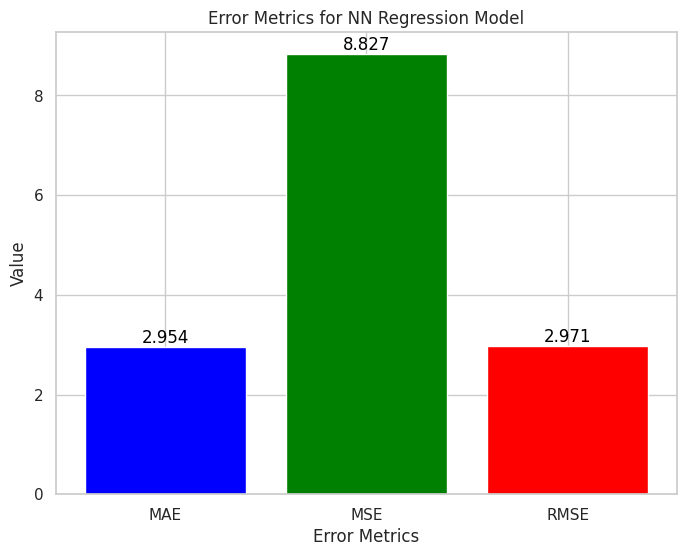

In [313]:
import matplotlib.pyplot as plt

# List of error metrics
error_metrics = ['MAE', 'MSE', 'RMSE']

# Corresponding values
error_values = [mae_lm, mse_lm, rmse_lm]

# Plotting the graph
plt.figure(figsize=(8, 6))
bars = plt.bar(error_metrics, error_values, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Error Metrics')
plt.ylabel('Value')
plt.title('Error Metrics for NN Regression Model')

# Adding y-values on the bars
for bar, value in zip(bars, error_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 3),
             ha='center', va='bottom', color='black')  # Fixing the 'va' parameter

# Save the figure
plt.savefig('13_nn_reg_error_metrics.png', bbox_inches='tight')

# Display the plot
plt.show()

In [314]:
## Convert lm_prediction is a 2D array, reshape it to 1D
lm_prediction_1d = lm_prediction.flatten()

# Create DataFrame with predictions
predictions_df = pd.DataFrame({'Predicted_Rating': lm_prediction_1d})

# Display the DataFrame
print(predictions_df)

       Predicted_Rating
0              0.192120
1              0.505297
2             -0.095415
3             -0.278472
4             -0.022767
...                 ...
46657         -0.089461
46658          0.345141
46659          0.450780
46660         -0.393244
46661         -0.557631

[46662 rows x 1 columns]


If you're working with regression tasks, metrics like accuracy, AUC (Area Under the ROC Curve), and F1 Score are not applicable because they are typically used for classification tasks. For regression tasks, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are more commonly used metrics to evaluate model performance.

However, if you're interested in evaluating the performance of your regression model using alternative metrics, you can use metrics like R-squared (coefficient of determination) or adjusted R-squared, which provide information about the proportion of variance explained by the model.

In [315]:
from sklearn.metrics import r2_score
# Calculate R-squared
r_squared = r2_score(y_test, lm_prediction)

print('R-squared:', r_squared)

R-squared: -197.36665853944487


In [316]:
# Calculate R-squared
r_squared_1d = r2_score(y_test, lm_prediction_1d)

print('R-squared_1d:', r_squared_1d)

R-squared_1d: -197.36665853944487


A negative R-squared value can occur when the model's predictions are systematically worse than the mean of the observed data. It suggests that the model is not capturing the underlying patterns in the data and may indicate that the model is not suitable for making predictions.

In summary, a negative R-squared value suggests that the regression model does not provide any explanatory power and may not be useful for making predictions on the given data. It's important to further investigate the model and data to understand why the R-squared value is negative and consider alternative modeling approaches if necessary.

### Applying Embedding and functions

### Function 1 Using Regression Dataset 

In [317]:
n_users = len(ratings_df['user'].unique())
n_items = len(ratings_df['item'].unique())
print(f"There are total `{n_users}` of users and `{n_items}` items")

There are total `33901` of users and `126` items


In [318]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Input, Dot
from tensorflow.keras.regularizers import l2

# Embeddings with Regression / Classification
def emb_create(n_user, n_item, n_user_latent_dim: int = 16, n_item_latent_dim: int = 16, reg_users: int = 1e-6, reg_items: int = 1e-6) -> keras.Model:
    """
        Parameters
            n_users             : Number of unique users, 
            n_items:            : Number of unique items.
            n_user_latent_dim   : Dimension of the user embedding space.
            n_item_latent_dim   : Dimension of the item embedding space.
            reg_users           : Regularization factor for user embeddings.
            reg_items           : Regularization factor for item mbeddings.
        Returns
            model               : The complete neural network model.
            user_model          : The model for user embeddings.
            item_model          : The model for item embeddings.
    """
    # Input layers
    user_input = Input(shape=(), dtype='int32', name='user')
    item_input = Input(shape=(), dtype='int32', name='item')

    # User embeddings
    # - define an embedding layer for users with a specified latent dimension and regularization.
    # - flatten the embedding output to get a user vector.
    # - define a bias term for each user.
    # - create a model for user embeddings.
    user_embedding = Embedding(input_dim=n_user+1,
                    output_dim=n_user_latent_dim,
                    name='user_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=keras.regularizers.l2(reg_users)
                    )(user_input)
    user_vec = Flatten(name='user_flat')(user_embedding)
    user_bias = Embedding(input_dim=n_user+1,
                    output_dim=1,
                    name='user_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=keras.regularizers.l2(reg_users)
                    )(user_input)
    user_model = Model(inputs=user_input, outputs=user_vec)

    ## Item embeddings
    # - define an embedding layer for items with a specified latent dimension and regularization.
    # - flatten the embedding output to get a item vector.
    # - define a bias term for each item.
    # - create a model for item embeddings.
    item_embedding = Embedding(input_dim=n_item+1,
                    output_dim=n_item_latent_dim,
                    name='item_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=keras.regularizers.l2(reg_items)
                    )(item_input)
    item_vec = Flatten(name='item_flat')(item_embedding)
    item_bias = Embedding(input_dim=n_user+1,
                    output_dim=1,
                    name='item_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=keras.regularizers.l2(reg_users)
                    )(item_input)
    item_model = Model(inputs=item_input, outputs=item_vec)

    # Merge user and item embeddings
    # - use a dot product to merge user and item embeddings.
    # - Normalize the dot product and apply dropout for regularization.
    merged = Dot(name='dot', normalize=True, axes=1)([user_embedding, item_embedding])
    merged_dropout = Dropout(0.2)(merged)

    # Hidden layers
    # - add a series of dense (fully connected) layers with dropout for regularization.
    # - reduce the number of units in each subsequent layer to learn hierarchical features.
    dense_1 = Dense(units=64, name='Dense_1')(merged_dropout)
    do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

    dense_2 = Dense(units=32, name='Dense_2')(do_1)
    do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

    dense_3 = Dense(units=16, name='Dense_3')(do_2)
    do_3 = Dropout(0.2, name='Dropout_3')(dense_3)

    dense_4 = Dense(units=8, name='Dense_4')(do_3)

    # Output layer
    # - add an output layer with a single unit and ReLU activation to predict the interaction score (rating).
    result = Dense(1, name='rating', activation='relu')(dense_4)

    # Complete model
    # - define the complete model with user and item inputs and the predicted rating as output.
    # - name the model 'embedding_extraction_model'.
    # - return the complete model, user model, and item model.
    model = Model(inputs=[user_input, item_input], outputs=[result])
    model._name = 'embedding_extraction_model'
    return model, user_model, item_model

In [319]:
model, user_model, item_model = emb_create(33901, 126, 16, 16, 1e-6, 1e-6) 

In [320]:
item_model

In [321]:
def emb_data_prep(df: pd.DataFrame = ratings_df):
    """
    Parameters
        df          : A dataframe containing the user-item interactions.
    Returns
        data        : A dataframe with user and item IDs replaced by indices
        user_id2idx : A dictionary mapping original user IDs to their corresponding indices.
        item_id2idx : A dictionary mapping original item IDs to their corresponding indices.
    """
    # - create a copy of the input DataFrame to avoid modifying the original data.
    # - create a dictionary that maps each unique user ID to a unique index (for item also). The enumerate function assigns an index to each unique user ID (for item ID as well).
    # - replace each user ID in the DataFrame with its corresponding index using the user_id2idx mapping (for item also).
    # - return the processed DataFrame along with the user and item ID to index mappings.
    data = df.copy()
    user_id2idx = {k: v for v, k in enumerate(data['user'].unique())}
    item_id2idx = {k: v for v, k in enumerate(data['item'].unique())}
    data['user'] = data['user'].map(user_id2idx)
    data['item'] = data['item'].map(item_id2idx)
    return data, user_id2idx, item_id2idx

In [322]:
# Prepare data
df_prepared, user_id2idx, item_id2idx = emb_data_prep(ratings_df)
print(df_prepared)
print(user_id2idx)
print(item_id2idx)

         user  item  rating
0           0     0     3.0
1           1     1     3.0
2           2     2     3.0
3           3     3     3.0
4           4     4     3.0
...       ...   ...     ...
233301   9938     4     3.0
233302   6421    23     3.0
233303   9138    60     3.0
233304   8410     8     3.0
233305  14843     6     3.0

[233306 rows x 3 columns]
{1889878: 0, 1342067: 1, 1990814: 2, 380098: 3, 779563: 4, 1390655: 5, 367075: 6, 1858700: 7, 600100: 8, 623377: 9, 766893: 10, 1248617: 11, 1633385: 12, 1706535: 13, 1804498: 14, 1474302: 15, 1602482: 16, 301887: 17, 633216: 18, 1794016: 19, 2098743: 20, 1143622: 21, 1007849: 22, 1555457: 23, 946915: 24, 892274: 25, 551690: 26, 750076: 27, 789341: 28, 773165: 29, 794886: 30, 1342117: 31, 640330: 32, 1034313: 33, 961488: 34, 1246308: 35, 979308: 36, 634975: 37, 1383971: 38, 685972: 39, 630451: 40, 1516838: 41, 1132926: 42, 1281219: 43, 1741605: 44, 526671: 45, 1319023: 46, 1208933: 47, 784113: 48, 1470621: 49, 1261677: 50, 687207

In [323]:
def emb_ds_create(df: pd.DataFrame, targets: list, scale: bool = True, tt_split: int = 0.8, val_split: int = 0.1, batch_size: int = 512, rs: int = 42):
    """
    Creates TensorFlow datasets from pandas dataframe.
        Parameters
            df          : Input DataFrame - only contains features and target(s).
            targets     : List of columns names corresponding to targets variables.
            scale       : Whether to scale the features (not implemented in this function).
            tt_split    : Fraction of the data that should be used for training and validation.
            val_split   : Fraction of the data that should be used for validation
            batch_size  : Batch size for training
            rs          : Random seed for shuffling data - `None` won't shuffle the data
        Returns
            ds_train    : Training dataset - ds (dataset)
            ds_val      : Validation dataset
            ds_test     : Test dataset
    """
    # Calculate the number of rows for validation (n_val) and for the training/test split (n_split).
    n_val = round(df.shape[0] * val_split)      # number of validation rows
    n_split = round(df.shape[0] * tt_split)

    # Split the DataFrame into training (x_train) and test (x_test) sets based on n_split.
    x_train = df.iloc[:n_split, :]
    x_test = df.iloc[n_split:, :]

    # Shuffle the training data if a random seed is provided. Convert the DataFrame to a dictionary of series for easier manipulation.
    if rs: x_train = df.sample(frac=1, random_state=rs).to_dict('series')
    else:  x_train = df.to_dict('series')

    # Separate the target columns from the features for both training and test sets. Store the targets in y_train and y_test.
    y_train = dict()
    y_test = dict()
    for t in targets:
        y_train[t] = x_train.pop(t)     # remove targets from x and store them in y in the same order
        y_test[t] = x_test.pop(t)
    
    # Create TensorFlow datasets from the training and test data dictionaries.
    ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

    # Create the validation dataset by taking a portion of the training dataset. Batch the training, validation, and test datasets.
    ds_val = ds_train.take(n_val).batch(batch_size=batch_size)
    ds_train = ds_train.skip(n_val).batch(batch_size=batch_size)
    ds_test = ds_test.batch(batch_size=batch_size)

    # Return the training, validation, and test datasets.
    return ds_train, ds_val, ds_test

In [324]:
df_prepared

user  item  rating
0           0     0     3.0
1           1     1     3.0
2           2     2     3.0
3           3     3     3.0
4           4     4     3.0
...       ...   ...     ...
233301   9938     4     3.0
233302   6421    23     3.0
233303   9138    60     3.0
233304   8410     8     3.0
233305  14843     6     3.0

[233306 rows x 3 columns]

In [325]:
# Create TensorFlow datasets
targets = ['rating']
ds_train, ds_val, ds_test = emb_ds_create(df_prepared, targets)
print(ds_train)
print(ds_val)
print(ds_test)

<_BatchDataset element_spec=({'user': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'item': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, {'rating': TensorSpec(shape=(None,), dtype=tf.float64, name=None)})>
<_BatchDataset element_spec=({'user': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'item': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, {'rating': TensorSpec(shape=(None,), dtype=tf.float64, name=None)})>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.int64, name=None), {'rating': TensorSpec(shape=(None,), dtype=tf.float64, name=None)})>


In [326]:
def emb_train(ds: tf.data.Dataset, df: pd.DataFrame = ratings_df, epochs: int = 10):
    """
    Parameters
        ds                  : Input TensorFlow dataset for training.
        df                  : Input DataFrame containing user-item interactions.
        epochs              : Number of epochs to train the model.
    Returns
        emb_model_all       : Trained embedding model.
        user_emb_model_all  : User embedding model.
        item_emb_model_all  : Item embedding model.
    """
    # Compile model
    # - calculate the number of unique users and items in the dataframe.
    # - call the emb_create function to create the embedding model, user embedding model, and item embedding model.
    # - compile the embedding model with Mean Squared Error loss, Adam optimizer, and Root Mean Squared Error metric.
    # - train the embedding model using the input tensorFlow dataset (ds) for the specified number of epochs.
    # - return the trained embedding model, user embedding model, and item embedding model.
    num_users = len(df['user'].unique())
    num_items = len(df['item'].unique())
    emb_model_all, user_emb_model_all , item_emb_model_all = emb_create(n_user=num_users, n_item=num_items)
    emb_model_all.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=tf.keras.metrics.RootMeanSquaredError())
    # train model
    emb_model_all_hist = emb_model_all.fit(ds, epochs=epochs)

    return emb_model_all, user_emb_model_all, item_emb_model_all


In [327]:
%%time
# Train embedding model
emb_model_all, user_emb_model_all, item_emb_model_all = emb_train(ds_train, df_prepared)
print(emb_model_all)
print(user_emb_model_all)
print(item_emb_model_all)

Epoch 1/10
411/411 [==============================] - 5s 8ms/step - loss: 0.6692 - root_mean_squared_error: 0.8180
Epoch 2/10
411/411 [==============================] - 4s 8ms/step - loss: 0.1820 - root_mean_squared_error: 0.4265
Epoch 3/10
411/411 [==============================] - 3s 8ms/step - loss: 0.1173 - root_mean_squared_error: 0.3422
Epoch 4/10
411/411 [==============================] - 4s 8ms/step - loss: 0.0680 - root_mean_squared_error: 0.2604
Epoch 5/10
411/411 [==============================] - 4s 8ms/step - loss: 0.0503 - root_mean_squared_error: 0.2239
Epoch 6/10
411/411 [==============================] - 4s 8ms/step - loss: 0.0464 - root_mean_squared_error: 0.2150
Epoch 7/10
411/411 [==============================] - 4s 9ms/step - loss: 0.0455 - root_mean_squared_error: 0.2130
Epoch 8/10
411/411 [==============================] - 4s 9ms/step - loss: 0.0452 - root_mean_squared_error: 0.2122
Epoch 9/10
411/411 [==============================] - 3s 8ms/step - loss: 0.0451

In [328]:
def rev_dict(d: dict) -> dict:
    # - Define the function rev_dict that takes one argument d, which is a dictionary, and returns a dictionary.
    # - Caution: only use Key: Value pairs are unique
    return {v: k for k, v in d.items()}

### Regression dataset creation

In [329]:
# Get user and item embedding matrices
#user_embedding_matrix = model.get_layer('user_embedding_layer').get_weights()[0]
#item_embedding_matrix = model.get_layer('item_embedding_layer').get_weights()[0]

In [330]:
#Create DataFrames for Embeddings
# - convert the embedding matrices into DataFrames with column names UFeature0, UFeature1, ..., UFeature15 for users and IFeature0, IFeature1, ..., IFeature15 for items.
#df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(16)]) 
#df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(16)])


In [331]:
#df_uem

In [332]:
# Insert user_ids
# - create a dataFrame from user_id2idx with user IDs and merge it with the user embedding dataFrame.
#if not 'user' in df_uem.columns:
    #user = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1) # user_df = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').reset_index().rename(columns={'index': 'user', 0: 'user_idx'})
    #df_uem = user.merge(df_uem, left_index=True, right_index=True) # df_uem = user_df.set_index('user_idx').join(df_uem).reset_index().rename(columns={'user_idx': 'user'})

In [333]:
#df_uem

In [334]:
#df_iem

In [335]:
# Insert item_ids
# - create a dataFrame from item_id2idx with item IDs and merge it with the item embedding dataFrame
#if not 'item' in df_iem.columns:
    #items = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1) # item_df = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').reset_index().rename(columns={'index': 'item', 0: 'item_idx'})
    #df_iem = items.merge(df_iem, left_index=True, right_index=True) # df_iem = item_df.set_index('item_idx').join(df_iem).reset_index().rename(columns={'item_idx': 'item'})

In [336]:
#df_iem

In [337]:
# Merge DataFrames using pd.concat
#merge_df = pd.concat([ratings_df.set_index(['user', 'item']), df_uem.set_index('user'), df_iem.set_index('item')], axis=1, join='inner').reset_index
# Merge user embedding and course embedding features (ratings data)
# - merge the original ratings dataframe with the user and item embedding dataFrames.
#merged_df = pd.merge(ratings_df, df_uem, how='left', left_on='user', right_on='user').fillna(0)
#merged_df = pd.merge(merged_df, df_iem, how='left', left_on='item', right_on='item').fillna(0)

In [338]:
#merge_df

In [339]:
#merged_df

In [340]:
#u_features = [f"UFeature{i}" for i in range(16)]
#c_features = [f"IFeature{i}" for i in range(16)]

#user_embeddings = merged_df[u_features]
#c_embeddings = merged_df[c_features]
#ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
#regression_dataset = user_embeddings + c_embeddings.values
#regression_dataset.columns = [f"Feature{i}" for i in range(16)]
##egression_dataset['rating'] = ratings
#regression_dataset.head()

In [341]:
def reg_ds_create(model, user_id2idx: dict, item_id2idx: dict, df: pd.DataFrame = ratings_df):
    # Get user and item embedding matrices
    user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
    item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

    # Create DataFrames for Embeddings
    # - convert the embedding matrices into DataFrames with column names UFeature0, UFeature1, ..., UFeature15 for users and IFeature0, IFeature1, ..., IFeature15 for items.
    df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(16)]) 
    df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(16)])
    
    # Insert user_ids
    # - create a dataFrame from user_id2idx with user IDs and merge it with the user embedding dataFrame.
    if not 'user' in df_uem.columns:
        user = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1) # user_df = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').reset_index().rename(columns={'index': 'user', 0: 'user_idx'})
        df_uem = user.merge(df_uem, left_index=True, right_index=True) # df_uem = user_df.set_index('user_idx').join(df_uem).reset_index().rename(columns={'user_idx': 'user'})

    # Insert item_ids
    # - create a dataFrame from item_id2idx with item IDs and merge it with the item embedding dataFrame
    if not 'item' in df_iem.columns:
        items = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1) # item_df = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').reset_index().rename(columns={'index': 'item', 0: 'item_idx'})
        df_iem = items.merge(df_iem, left_index=True, right_index=True) # df_iem = item_df.set_index('item_idx').join(df_iem).reset_index().rename(columns={'item_idx': 'item'})

    # Merge user embedding and course embedding features (ratings data)
    # - merge the original ratings dataframe with the user and item embedding dataFrames.
    merged_df = pd.merge(ratings_df, df_uem, how='left', left_on='user', right_on='user').fillna(0)
    merged_df = pd.merge(merged_df, df_iem, how='left', left_on='item', right_on='item').fillna(0)
    
    # Extract features and prepare regression dataset
    u_features = [f"UFeature{i}" for i in range(16)]
    c_features = [f"IFeature{i}" for i in range(16)]

    user_embeddings = merged_df[u_features]
    c_embeddings = merged_df[c_features]
    ratings = merged_df['rating']
    #user = merged_df['user']
    
    # Aggregate the two feature columns using element-wise add
    regression_dataset = user_embeddings + c_embeddings.values # regression_dataset = pd.concat([user_embeddings, c_embeddings], axis=1)
    regression_dataset.columns = [f"Feature{i}" for i in range(16)]
    regression_dataset['rating'] = ratings
    #regression_dataset['user'] = user
    return regression_dataset

In [342]:
# Prepare regression dataset
regression_dataset = reg_ds_create(emb_model_all, user_id2idx, item_id2idx, df_prepared)

regression_dataset

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0      -0.010523 -0.018772  0.045657  0.123494 -0.198626 -0.009899  0.258130   
1      -0.042731 -0.034842 -0.104307  0.111681  0.127889 -0.058035 -0.095598   
2       0.067593 -0.050840  0.114549 -0.030127  0.211872 -0.063705 -0.102623   
3      -0.006099 -0.266724 -0.073541  0.214863  0.070712 -0.152175  0.138344   
4       0.021071  0.162704 -0.042762 -0.008113 -0.079862 -0.237215 -0.032590   
...          ...       ...       ...       ...       ...       ...       ...   
233301  0.004743  0.147273 -0.075565  0.013459 -0.058939 -0.220463 -0.024874   
233302  0.041837  0.044634  0.189138 -0.098332  0.099897 -0.055409 -0.021234   
233303  0.047823 -0.027263  0.166307 -0.232189  0.085875  0.218272  0.028401   
233304 -0.187189  0.035693 -0.163660  0.058417  0.102735  0.173502  0.190720   
233305  0.026209  0.269382  0.203139  0.068551  0.181397 -0.010035 -0.012320   

        Feature7  Feature8  Feature9  Feature10  Feature11  Feature12  \
0      -0.038659 -0.015314 -0.262484   0.029917   0.092347   0.025197   
1       0.033948 -0.249933  0.016777  -0.029913  -0.022413  -0.004204   
2       0.089909  0.029550  0.063297   0.046678  -0.053573  -0.253740   
3       0.006662  0.035068 -0.141302   0.288161  -0.080236  -0.046239   
4      -0.045646 -0.263072 -0.013839   0.092836   0.005107  -0.096359   
...          ...       ...       ...        ...        ...        ...   
233301 -0.033366 -0.250946 -0.018593   0.094096  -0.018977  -0.076078   
233302 -0.014442  0.228663 -0.303509  -0.070213   0.046960  -0.007038   
233303 -0.186999  0.039905  0.075808  -0.107377   0.102102   0.042602   
233304  0.103781 -0.137620 -0.229342  -0.104273   0.300257   0.130508   
233305 -0.047781 -0.016195 -0.050690   0.202718   0.174902  -0.123482   

        Feature13  Feature14  Feature15  rating  
0       -0.238235  -0.116393   0.082928     3.0  
1       -0.073965   0.222246  -0.039659     3.0  
2       -0.170023  -0.269495  -0.106504     3.0  
3       -0.016705   0.031641  -0.194000     3.0  
4       -0.042270  -0.243487  -0.046726     3.0  
...           ...        ...        ...     ...  
233301  -0.046705  -0.231863  -0.041639     3.0  
233302   0.007653   0.215833   0.024212     3.0  
233303  -0.222015  -0.234741  -0.002687     3.0  
233304   0.138392   0.164703   0.078652     3.0  
233305   0.037973  -0.263108   0.178042     3.0  

[233306 rows x 17 columns]

In [343]:
X = regression_dataset.iloc[:, :-1]
y = regression_dataset.iloc[:, -1]
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

Input data shape: (233306, 16), Output data shape: (233306,)


In [344]:
df_prepared.shape

(233306, 3)

In [345]:
#X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=rs)

In [346]:
# Scaling the data
##y_train= y_train.values.reshape(-1,1)
#y_test= y_test.values.reshape(-1,1)

In [347]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#y_train = sc.fit_transform(y_train)
#y_test = sc.fit_transform(y_test)

In [348]:
def regressor_train(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-1]
    y = ds.iloc[:, -1]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    lrr = Ridge(alpha=1e-3)
    lrr.fit(X, y) #lrr.fit(X_train, y_train)
    return lrr

In [349]:
from sklearn.linear_model import Ridge
# Train Ridge regression model
lrr_model = regressor_train(regression_dataset)
lrr_model

Ridge(alpha=0.001)

In [350]:
#def regressor_predict(model, ds, enrolled_courses: list) -> dict:
    #"""
    #Parameters
        #model               : The trained regression model.
        #ds                  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
        #enrolled_courses    : A list of courses the user is already enrolled in. The function uses this to filter out courses the user is already familiar with    
    #Returns
        #Predicted rating for the user.
    #"""
    # The function takes the last row of the dataset (ds.iloc[-1, :-2]) excluding the last two columns and uses the trained model to predict the rating.
    #model.predict(ds.iloc[:, :-1]) #predictions = model.predict(X_test)

In [351]:
def regressor_predict(model, target_users, ratings_df) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on Embedding model predictions - without regression.
    """
    recommendations = pd.DataFrame()

    user_list = ratings_df["user"].unique().tolist()
    item_list = ratings_df["item"].unique().tolist()
    items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

    for user_id in target_users:
        if user_id not in user_list:
            continue

        mapped_user_id = user_list.index(user_id)
        enrolled_courses = set(ratings_df[ratings_df['user'] == user_id]['item'].tolist())

        active_user_df = pd.DataFrame({
            'user': [mapped_user_id] * len(items_id2idx),  # Use 'user' instead of 'user_id'
            'item': list(items_id2idx.values())  # Use 'item' instead of 'item_id'
        })

        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user': active_user_df['user'].values.astype('int32'),
            'item': active_user_df['item'].values.astype('int32')
        })).batch(512)

        regressor_predictions = model.predict(ds_pred)

        active_user_df['regressor_prediction'] = regressor_predictions.flatten()
        results_df = active_user_df[~active_user_df['item'].isin(enrolled_courses)]
        results_df['score'] = round((results_df['regressor_prediction'] * 100) / 3, 2)
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item'].map({v: k for k, v in items_id2idx.items()})

        recommendations = pd.concat([recommendations, results_df])

    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False]).reset_index(drop=True)
    return recommendations[['user_id', 'item_id', 'score']]

In [352]:
# Example output 
target_users = [1078030, 733707, 674939, 2057052]
recommendations = regressor_predict(emb_model_all, target_users, ratings_df) # emb_model_all not lrr_model
print(recommendations)

1/1 [==============================] - 0s 9ms/step
     user_id     item_id      score
0     674939  LB0107ENv1  99.529999
1     674939    CC0271EN  99.419998
2     674939    ML0120EN  99.199997
3     674939    ML0103EN  99.180000
4     674939    SC0103EN  99.139999
..       ...         ...        ...
499  2057052    DB0113EN  98.330002
500  2057052    DX0108EN  98.330002
501  2057052      DS0107  98.330002
502  2057052    DB0115EN  98.330002
503  2057052  GPXX0QR3EN  98.330002

[504 rows x 3 columns]


As we can see from the code the model used come from embedding not from the regression model

### Function 2 Using Regression Dataset (start from regression dataset creation, train and predict)

In [353]:
model

In [354]:
def reg_ds_create_1(model, user_id2idx: dict, item_id2idx: dict, df: pd.DataFrame = ratings_df):
    # Get user and item embedding matrices
    user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
    item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

    # Create DataFrames for Embeddings
    # - convert the embedding matrices into DataFrames with column names UFeature0, UFeature1, ..., UFeature15 for users and IFeature0, IFeature1, ..., IFeature15 for items.
    df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(16)]) 
    df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(16)])
    
    # Insert user_ids
    # - create a dataFrame from user_id2idx with user IDs and merge it with the user embedding dataFrame.
    if not 'user' in df_uem.columns:
        user = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1) # user_df = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').reset_index().rename(columns={'index': 'user', 0: 'user_idx'})
        df_uem = user.merge(df_uem, left_index=True, right_index=True) # df_uem = user_df.set_index('user_idx').join(df_uem).reset_index().rename(columns={'user_idx': 'user'})

    # Insert item_ids
    # - create a dataFrame from item_id2idx with item IDs and merge it with the item embedding dataFrame
    if not 'item' in df_iem.columns:
        items = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1) # item_df = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').reset_index().rename(columns={'index': 'item', 0: 'item_idx'})
        df_iem = items.merge(df_iem, left_index=True, right_index=True) # df_iem = item_df.set_index('item_idx').join(df_iem).reset_index().rename(columns={'item_idx': 'item'})

    # Merge user embedding and course embedding features (ratings data)
    # - merge the original ratings dataframe with the user and item embedding dataFrames.
    merged_df = pd.merge(ratings_df, df_uem, how='left', left_on='user', right_on='user').fillna(0)
    merged_df = pd.merge(merged_df, df_iem, how='left', left_on='item', right_on='item').fillna(0)
    
    # Extract features and prepare regression dataset
    u_features = [f"UFeature{i}" for i in range(16)]
    c_features = [f"IFeature{i}" for i in range(16)]

    user = merged_df['user']
    item = merged_df['item']
    user_embeddings = merged_df[u_features]
    c_embeddings = merged_df[c_features]
    ratings = merged_df['rating']
    
    
    # Aggregate the two feature columns using element-wise add
    regression_dataset_1 = user_embeddings + c_embeddings.values # regression_dataset = pd.concat([user_embeddings, c_embeddings], axis=1)
    regression_dataset_1.columns = [f"Feature{i}" for i in range(16)]
    regression_dataset_1['rating'] = ratings
    regression_dataset_1['user'] = user
    regression_dataset_1['item'] = item
    return regression_dataset_1

In [355]:
# Prepare regression dataset
regression_dataset_1 = reg_ds_create_1(emb_model_all, user_id2idx, item_id2idx, df_prepared)

regression_dataset_1

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0      -0.010523 -0.018772  0.045657  0.123494 -0.198626 -0.009899  0.258130   
1      -0.042731 -0.034842 -0.104307  0.111681  0.127889 -0.058035 -0.095598   
2       0.067593 -0.050840  0.114549 -0.030127  0.211872 -0.063705 -0.102623   
3      -0.006099 -0.266724 -0.073541  0.214863  0.070712 -0.152175  0.138344   
4       0.021071  0.162704 -0.042762 -0.008113 -0.079862 -0.237215 -0.032590   
...          ...       ...       ...       ...       ...       ...       ...   
233301  0.004743  0.147273 -0.075565  0.013459 -0.058939 -0.220463 -0.024874   
233302  0.041837  0.044634  0.189138 -0.098332  0.099897 -0.055409 -0.021234   
233303  0.047823 -0.027263  0.166307 -0.232189  0.085875  0.218272  0.028401   
233304 -0.187189  0.035693 -0.163660  0.058417  0.102735  0.173502  0.190720   
233305  0.026209  0.269382  0.203139  0.068551  0.181397 -0.010035 -0.012320   

        Feature7  Feature8  Feature9  Feature10  Feature11  Feature12  \
0      -0.038659 -0.015314 -0.262484   0.029917   0.092347   0.025197   
1       0.033948 -0.249933  0.016777  -0.029913  -0.022413  -0.004204   
2       0.089909  0.029550  0.063297   0.046678  -0.053573  -0.253740   
3       0.006662  0.035068 -0.141302   0.288161  -0.080236  -0.046239   
4      -0.045646 -0.263072 -0.013839   0.092836   0.005107  -0.096359   
...          ...       ...       ...        ...        ...        ...   
233301 -0.033366 -0.250946 -0.018593   0.094096  -0.018977  -0.076078   
233302 -0.014442  0.228663 -0.303509  -0.070213   0.046960  -0.007038   
233303 -0.186999  0.039905  0.075808  -0.107377   0.102102   0.042602   
233304  0.103781 -0.137620 -0.229342  -0.104273   0.300257   0.130508   
233305 -0.047781 -0.016195 -0.050690   0.202718   0.174902  -0.123482   

        Feature13  Feature14  Feature15  rating     user        item  
0       -0.238235  -0.116393   0.082928     3.0  1889878    CC0101EN  
1       -0.073965   0.222246  -0.039659     3.0  1342067    CL0101EN  
2       -0.170023  -0.269495  -0.106504     3.0  1990814  ML0120ENv3  
3       -0.016705   0.031641  -0.194000     3.0   380098    BD0211EN  
4       -0.042270  -0.243487  -0.046726     3.0   779563    DS0101EN  
...           ...        ...        ...     ...      ...         ...  
233301  -0.046705  -0.231863  -0.041639     3.0  1540125    DS0101EN  
233302   0.007653   0.215833   0.024212     3.0  1250651    PY0101EN  
233303  -0.222015  -0.234741  -0.002687     3.0  1003832  CB0105ENv1  
233304   0.138392   0.164703   0.078652     3.0   922065    BD0141EN  
233305   0.037973  -0.263108   0.178042     3.0  1596120    DS0301EN  

[233306 rows x 19 columns]

In [356]:
# Extract unique user and item IDs from regression_dataset
user_list = regression_dataset_1["user"].unique().tolist()
item_list = regression_dataset_1["item"].unique().tolist()
items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

In [357]:
regression_dataset_1.iloc[:, :-3]

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0      -0.010523 -0.018772  0.045657  0.123494 -0.198626 -0.009899  0.258130   
1      -0.042731 -0.034842 -0.104307  0.111681  0.127889 -0.058035 -0.095598   
2       0.067593 -0.050840  0.114549 -0.030127  0.211872 -0.063705 -0.102623   
3      -0.006099 -0.266724 -0.073541  0.214863  0.070712 -0.152175  0.138344   
4       0.021071  0.162704 -0.042762 -0.008113 -0.079862 -0.237215 -0.032590   
...          ...       ...       ...       ...       ...       ...       ...   
233301  0.004743  0.147273 -0.075565  0.013459 -0.058939 -0.220463 -0.024874   
233302  0.041837  0.044634  0.189138 -0.098332  0.099897 -0.055409 -0.021234   
233303  0.047823 -0.027263  0.166307 -0.232189  0.085875  0.218272  0.028401   
233304 -0.187189  0.035693 -0.163660  0.058417  0.102735  0.173502  0.190720   
233305  0.026209  0.269382  0.203139  0.068551  0.181397 -0.010035 -0.012320   

        Feature7  Feature8  Feature9  Feature10  Feature11  Feature12  \
0      -0.038659 -0.015314 -0.262484   0.029917   0.092347   0.025197   
1       0.033948 -0.249933  0.016777  -0.029913  -0.022413  -0.004204   
2       0.089909  0.029550  0.063297   0.046678  -0.053573  -0.253740   
3       0.006662  0.035068 -0.141302   0.288161  -0.080236  -0.046239   
4      -0.045646 -0.263072 -0.013839   0.092836   0.005107  -0.096359   
...          ...       ...       ...        ...        ...        ...   
233301 -0.033366 -0.250946 -0.018593   0.094096  -0.018977  -0.076078   
233302 -0.014442  0.228663 -0.303509  -0.070213   0.046960  -0.007038   
233303 -0.186999  0.039905  0.075808  -0.107377   0.102102   0.042602   
233304  0.103781 -0.137620 -0.229342  -0.104273   0.300257   0.130508   
233305 -0.047781 -0.016195 -0.050690   0.202718   0.174902  -0.123482   

        Feature13  Feature14  Feature15  
0       -0.238235  -0.116393   0.082928  
1       -0.073965   0.222246  -0.039659  
2       -0.170023  -0.269495  -0.106504  
3       -0.016705   0.031641  -0.194000  
4       -0.042270  -0.243487  -0.046726  
...           ...        ...        ...  
233301  -0.046705  -0.231863  -0.041639  
233302   0.007653   0.215833   0.024212  
233303  -0.222015  -0.234741  -0.002687  
233304   0.138392   0.164703   0.078652  
233305   0.037973  -0.263108   0.178042  

[233306 rows x 16 columns]

In [358]:
regression_dataset_1.iloc[:, -3]

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
233301    3.0
233302    3.0
233303    3.0
233304    3.0
233305    3.0
Name: rating, Length: 233306, dtype: float64

In [359]:
def regressor_train(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    lrr = Ridge(alpha=1e-3)
    lrr.fit(X, y) #lrr.fit(X_train, y_train)
    return lrr

In [360]:
user_list = regression_dataset_1['user'].unique().tolist()

In [361]:
import pandas as pd
import tensorflow as tf

def regressor_predict_1(model, target_users, regression_dataset_1) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on Embedding model predictions - without regression.
    """
    recommendations = pd.DataFrame()

    user_list = regression_dataset_1["user"].unique().tolist()
    item_list = regression_dataset_1["item"].unique().tolist()
    items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

    for user_id in target_users:
        if user_id not in user_list:
            continue

        mapped_user_id = user_list.index(user_id)
        enrolled_courses = set(regression_dataset_1[regression_dataset_1['user'] == user_id]['item'].tolist())

        active_user_df = pd.DataFrame({
            'user': [mapped_user_id] * len(items_id2idx),
            'item': list(items_id2idx.values())
        })

        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user': active_user_df['user'].values.astype('int32'),
            'item': active_user_df['item'].values.astype('int32')
        })).batch(512)

        regressor_predictions = model.predict(ds_pred)

        active_user_df['regressor_prediction'] = regressor_predictions.flatten()
        results_df = active_user_df[~active_user_df['item'].isin(enrolled_courses)]
        results_df['score'] = round((results_df['regressor_prediction'] * 100) / 3, 2)
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item'].map({v: k for k, v in items_id2idx.items()})

        recommendations = pd.concat([recommendations, results_df])

    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False]).reset_index(drop=True)
    return recommendations[['user_id', 'item_id', 'score']]

In [362]:
%%time
# Prepare data
#df_prepared, user_id2idx, item_id2idx = emb_data_prep(ratings_df)

# Create TensorFlow datasets
#targets = ['rating']
#ds_train, ds_val, ds_test = emb_ds_create(df_prepared, targets)

# Train embedding model
#emb_model_all, user_emb_model_all, item_emb_model_all = emb_train(ds_train, df_prepared)

# Prepare regression dataset
#regression_dataset = reg_ds_create(emb_model_all, user_id2idx, item_id2idx, df_prepared)

# Train Ridge regression model
#lrr_model = regressor_train(regression_dataset)

# Example output
target_users = [1078030, 733707, 674939, 2057052]
# Call the functions
# Call the function
recommendations = regressor_predict_1(emb_model_all, target_users, regression_dataset_1)
print(recommendations)


1/1 [==============================] - 0s 9ms/step
     user_id     item_id      score
0     674939  LB0107ENv1  99.529999
1     674939    CC0271EN  99.419998
2     674939    ML0120EN  99.199997
3     674939    ML0103EN  99.180000
4     674939    SC0103EN  99.139999
..       ...         ...        ...
499  2057052    DB0113EN  98.330002
500  2057052    DX0108EN  98.330002
501  2057052      DS0107  98.330002
502  2057052    DB0115EN  98.330002
503  2057052  GPXX0QR3EN  98.330002

[504 rows x 3 columns]
CPU times: user 114 ms, sys: 7.9 ms, total: 122 ms
Wall time: 115 ms


As we can see from the code the model used come from embedding not from the regression model

### Using regression dataset_1 and lrr_model in the functions

In [363]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def regressor_predict_1(lrr_model, target_users, regression_dataset_1) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on linear regression model predictions.
    """
    recommendations_1 = pd.DataFrame()

    user_list = regression_dataset_1["user"].unique().tolist()
    item_list = regression_dataset_1["item"].unique().tolist()
    items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

    for user_id in target_users:
        if user_id not in user_list:
            continue

        enrolled_courses = set(regression_dataset_1[regression_dataset_1['user'] == user_id]['item'].tolist())

        active_user_features = regression_dataset[
            (regression_dataset_1['user'] == user_id) & (~regression_dataset_1['item'].isin(enrolled_courses))
        ].copy()

        # Extract features and prepare for prediction
        feature_columns = [col for col in active_user_features.columns if 'Feature' in col]
        if active_user_features.empty or len(feature_columns) == 0:
            continue

        X = active_user_features[feature_columns]

        # Check if X is not empty before scaling
        #if X.empty:
            #continue

        # Standardize features
        #scaler = StandardScaler()
        #X = scaler.fit_transform(X)

        # Predict using the trained linear regression model
        regressor_predictions = lrr_model.predict(X)

        active_user_df = active_user_features[['user', 'item']].copy()
        active_user_df['regressor_prediction'] = regressor_predictions.flatten()
        results_df = active_user_df[~active_user_df['item'].isin(enrolled_courses)]
        results_df['score'] = round((results_df['regressor_prediction'] * 100) / 3, 2)
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item'].map({v: k for k, v in items_id2idx.items()})

        recommendations_1 = pd.concat([recommendations_1, results_df])

    # Check if the necessary columns exist before sorting
    if 'user_id' in recommendations_1.columns and 'score' in recommendations.columns:
        recommendations_1 = recommendations_1.sort_values(by=['user_id', 'score'], ascending=[True, False]).reset_index(drop=True)
        return recommendations_1[['user_id', 'item_id', 'score']]
    else:
        return pd.DataFrame(columns=['user_id', 'item_id', 'score'])

# Example call to the function
target_users = [1078030, 733707, 674939, 2057052]  # Example target users
recommendations_1 = regressor_predict_1(lrr_model, target_users, regression_dataset_1)
print(recommendations_1)


Empty DataFrame
Columns: [user_id, item_id, score]
Index: []


### Apply Regression Model and Regression Dataset as shown in the simple dataset example

In [364]:
ratings_df

user        item  rating
0       1889878    CC0101EN     3.0
1       1342067    CL0101EN     3.0
2       1990814  ML0120ENv3     3.0
3        380098    BD0211EN     3.0
4        779563    DS0101EN     3.0
...         ...         ...     ...
233301  1540125    DS0101EN     3.0
233302  1250651    PY0101EN     3.0
233303  1003832  CB0105ENv1     3.0
233304   922065    BD0141EN     3.0
233305  1596120    DS0301EN     3.0

[233306 rows x 3 columns]

In [365]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Dot
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [366]:
n_user = len(ratings_df['user'].unique())
n_item = len(ratings_df['item'].unique())

def emb_create(n_user, n_item, n_user_latent_dim: int = 16, n_item_latent_dim: int = 16, reg_users: int = 1e-6, reg_items: int = 1e-6) -> keras.Model:
    user_input = Input(shape=(), dtype='int32', name='user')
    item_input = Input(shape=(), dtype='int32', name='item')

    user_embedding = Embedding(input_dim=n_user, #n_user+1 change to n_user
                    output_dim=n_user_latent_dim,
                    name='user_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_users)
                    )(user_input)
    user_vec = Flatten(name='user_flat')(user_embedding)
    user_bias = Embedding(input_dim=n_user,
                    output_dim=1,
                    name='user_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_users)
                    )(user_input)
    user_model = Model(inputs=user_input, outputs=user_vec)

    item_embedding = Embedding(input_dim=n_item,
                    output_dim=n_item_latent_dim,
                    name='item_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_items)
                    )(item_input)
    item_vec = Flatten(name='item_flat')(item_embedding)
    item_bias = Embedding(input_dim=n_item,
                    output_dim=1,
                    name='item_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_items)
                    )(item_input)
    item_model = Model(inputs=item_input, outputs=item_vec)

    merged = Dot(name='dot', normalize=True, axes=1)([user_embedding, item_embedding])
    merged_dropout = Dropout(0.2)(merged)

    dense_1 = Dense(units=64, name='Dense_1')(merged_dropout)
    do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

    dense_2 = Dense(units=32, name='Dense_2')(do_1)
    do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

    dense_3 = Dense(units=16, name='Dense_3')(do_2)
    do_3 = Dropout(0.2, name='Dropout_3')(dense_3)

    dense_4 = Dense(units=8, name='Dense_4')(do_3)

    result = Dense(1, name='rating', activation='relu')(dense_4)

    model = Model(inputs=[user_input, item_input], outputs=[result])
    model._name = 'embedding_extraction_model'
    return model, user_model, item_model

embedding_model, user_model, item_model = emb_create(n_user, n_item)


In [367]:
# Embedding create
embedding_model, user_model, item_model = emb_create(n_user, n_item)

In [368]:
def emb_data_prep(df: pd.DataFrame):
    data = df.copy()
    user_id2idx = {k: v for v, k in enumerate(data['user'].unique())}
    item_id2idx = {k: v for v, k in enumerate(data['item'].unique())}
    data['user'] = data['user'].map(user_id2idx)
    data['item'] = data['item'].map(item_id2idx)
    return data, user_id2idx, item_id2idx

In [369]:
prepared_data, user_id2idx, item_id2idx = emb_data_prep(ratings_df)
print(prepared_data)
print(user_id2idx)
print(item_id2idx)

         user  item  rating
0           0     0     3.0
1           1     1     3.0
2           2     2     3.0
3           3     3     3.0
4           4     4     3.0
...       ...   ...     ...
233301   9938     4     3.0
233302   6421    23     3.0
233303   9138    60     3.0
233304   8410     8     3.0
233305  14843     6     3.0

[233306 rows x 3 columns]
{1889878: 0, 1342067: 1, 1990814: 2, 380098: 3, 779563: 4, 1390655: 5, 367075: 6, 1858700: 7, 600100: 8, 623377: 9, 766893: 10, 1248617: 11, 1633385: 12, 1706535: 13, 1804498: 14, 1474302: 15, 1602482: 16, 301887: 17, 633216: 18, 1794016: 19, 2098743: 20, 1143622: 21, 1007849: 22, 1555457: 23, 946915: 24, 892274: 25, 551690: 26, 750076: 27, 789341: 28, 773165: 29, 794886: 30, 1342117: 31, 640330: 32, 1034313: 33, 961488: 34, 1246308: 35, 979308: 36, 634975: 37, 1383971: 38, 685972: 39, 630451: 40, 1516838: 41, 1132926: 42, 1281219: 43, 1741605: 44, 526671: 45, 1319023: 46, 1208933: 47, 784113: 48, 1470621: 49, 1261677: 50, 687207

In [370]:
def emb_ds_create(df: pd.DataFrame, targets: list, scale: bool = True, tt_split: int = 0.8, val_split: int = 0.1, batch_size: int = 512, rs: int = 42):
    n_val = round(df.shape[0] * val_split)
    n_split = round(df.shape[0] * tt_split)

    x_train = df.iloc[:n_split, :]
    x_test = df.iloc[n_split:, :]

    if rs: x_train = x_train.sample(frac=1, random_state=rs).to_dict('series')
    else:  x_train = x_train.to_dict('series')

    y_train = dict()
    y_test = dict()
    for t in targets:
        y_train[t] = x_train.pop(t)
        y_test[t] = x_test.pop(t)
    
    ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

    ds_val = ds_train.take(n_val).batch(batch_size=batch_size)
    ds_train = ds_train.skip(n_val).batch(batch_size=batch_size)
    ds_test = ds_test.batch(batch_size=batch_size)

    return ds_train, ds_val, ds_test

In [371]:
ds_train, ds_val, ds_test = emb_ds_create(prepared_data, targets=['rating'])

In [372]:
def emb_train(ds: tf.data.Dataset, df: pd.DataFrame, epochs: int = 10):
    num_users = len(df['user'].unique())
    num_items = len(df['item'].unique())
    emb_model_all, user_emb_model_all , item_emb_model_all = emb_create(n_user=num_users, n_item=num_items)
    emb_model_all.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=tf.keras.metrics.RootMeanSquaredError())
    emb_model_all_hist = emb_model_all.fit(ds, epochs=epochs)
    return emb_model_all, user_emb_model_all, item_emb_model_all


In [373]:
embedding_model, user_model, item_model = emb_train(ds_train, prepared_data)

Epoch 1/10
319/319 [==============================] - 4s 8ms/step - loss: 0.8133 - root_mean_squared_error: 0.9018
Epoch 2/10
319/319 [==============================] - 3s 9ms/step - loss: 0.1783 - root_mean_squared_error: 0.4221
Epoch 3/10
319/319 [==============================] - 3s 8ms/step - loss: 0.1172 - root_mean_squared_error: 0.3422
Epoch 4/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0821 - root_mean_squared_error: 0.2862
Epoch 5/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0610 - root_mean_squared_error: 0.2466
Epoch 6/10
319/319 [==============================] - 3s 8ms/step - loss: 0.0506 - root_mean_squared_error: 0.2246
Epoch 7/10
319/319 [==============================] - 3s 8ms/step - loss: 0.0470 - root_mean_squared_error: 0.2164
Epoch 8/10
319/319 [==============================] - 3s 8ms/step - loss: 0.0458 - root_mean_squared_error: 0.2137
Epoch 9/10
319/319 [==============================] - 3s 8ms/step - loss: 0.0455

In [374]:
def rev_dict(d: dict) -> dict:
    # - Define the function rev_dict that takes one argument d, which is a dictionary, and returns a dictionary.
    # - Caution: only use Key: Value pairs are unique
    return {v: k for k, v in d.items()}


In [375]:
def reg_ds_create_2(model, user_id2idx: dict, item_id2idx: dict, df: pd.DataFrame = ratings_df):
    # Get user and item embedding matrices
    user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
    item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

    # Create DataFrames for Embeddings
    # - convert the embedding matrices into DataFrames with column names UFeature0, UFeature1, ..., UFeature15 for users and IFeature0, IFeature1, ..., IFeature15 for items.
    df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(16)]) 
    df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(16)])
    
    # Insert user_ids
    # - create a dataFrame from user_id2idx with user IDs and merge it with the user embedding dataFrame.
    if not 'user' in df_uem.columns:
        user = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1) # user_df = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').reset_index().rename(columns={'index': 'user', 0: 'user_idx'}) - is not unique
        df_uem = user.merge(df_uem, left_index=True, right_index=True) # df_uem = user_df.set_index('user_idx').join(df_uem).reset_index().rename(columns={'user_idx': 'user'})

    # Insert item_ids
    # - create a dataFrame from item_id2idx with item IDs and merge it with the item embedding dataFrame
    if not 'item' in df_iem.columns:
        items = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1) # item_df = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').reset_index().rename(columns={'index': 'item', 0: 'item_idx'})
        df_iem = items.merge(df_iem, left_index=True, right_index=True) # df_iem = item_df.set_index('item_idx').join(df_iem).reset_index().rename(columns={'item_idx': 'item'})

    # Merge user embedding and course embedding features (ratings data)
    # - merge the original ratings dataframe with the user and item embedding dataFrames.
    merged_df = pd.merge(ratings_df, df_uem, how='left', left_on='user', right_on='user').fillna(0)
    merged_df = pd.merge(merged_df, df_iem, how='left', left_on='item', right_on='item').fillna(0)
    
    # Extract features and prepare regression dataset
    u_features = [f"UFeature{i}" for i in range(16)]
    c_features = [f"IFeature{i}" for i in range(16)]

    user = merged_df['user']
    item = merged_df['item']
    user_embeddings = merged_df[u_features]
    c_embeddings = merged_df[c_features]
    ratings = merged_df['rating']
    
    # Aggregate the two feature columns using element-wise add
    #regression_dataset_2 = user_embeddings + c_embeddings.values 
    regression_dataset_2 = pd.concat([user_embeddings, c_embeddings], axis=1)
    regression_dataset_2.columns = [f"Feature{i}" for i in range(2 * 16)] #regression_dataset.columns = [f"Feature{i}" for i in range(2 * 16)]
    regression_dataset_2['rating'] = ratings
    regression_dataset_2['user'] = user
    regression_dataset_2['item'] = item
    return regression_dataset_2, merged_df

In [376]:
regression_df, merged_df = reg_ds_create_2(embedding_model, user_id2idx, item_id2idx, ratings_df)
print(regression_df)

        Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0      -0.018900 -0.016598 -0.005378  0.003423  0.011178  0.008042 -0.014560   
1      -0.022872  0.000358 -0.006833 -0.018879 -0.001388  0.007136 -0.007847   
2       0.013069 -0.005428  0.002010 -0.007186  0.000717  0.016453  0.004819   
3       0.002491 -0.021703  0.003864 -0.003520  0.020931 -0.009417  0.010219   
4      -0.014700  0.012169  0.005392  0.019208  0.007932 -0.009273 -0.006819   
...          ...       ...       ...       ...       ...       ...       ...   
233301 -0.030075 -0.016461  0.006487  0.009007  0.025073  0.013069 -0.008603   
233302  0.029222 -0.020299 -0.000592 -0.001651  0.009947  0.003371  0.035649   
233303 -0.005809  0.007281 -0.003254 -0.014811 -0.013936 -0.000872  0.027417   
233304 -0.035087  0.017598  0.021498 -0.014362  0.004537 -0.001542  0.003486   
233305 -0.001478 -0.037241  0.020397  0.013611 -0.017363  0.015485  0.025909   

        Feature7  Feature8  Feature9  .

In [377]:
merged_df

user        item  rating  UFeature0  UFeature1  UFeature2  \
0       1889878    CC0101EN     3.0  -0.018900  -0.016598  -0.005378   
1       1342067    CL0101EN     3.0  -0.022872   0.000358  -0.006833   
2       1990814  ML0120ENv3     3.0   0.013069  -0.005428   0.002010   
3        380098    BD0211EN     3.0   0.002491  -0.021703   0.003864   
4        779563    DS0101EN     3.0  -0.014700   0.012169   0.005392   
...         ...         ...     ...        ...        ...        ...   
233301  1540125    DS0101EN     3.0  -0.030075  -0.016461   0.006487   
233302  1250651    PY0101EN     3.0   0.029222  -0.020299  -0.000592   
233303  1003832  CB0105ENv1     3.0  -0.005809   0.007281  -0.003254   
233304   922065    BD0141EN     3.0  -0.035087   0.017598   0.021498   
233305  1596120    DS0301EN     3.0  -0.001478  -0.037241   0.020397   

        UFeature3  UFeature4  UFeature5  UFeature6  ...  IFeature6  IFeature7  \
0        0.003423   0.011178   0.008042  -0.014560  ...   0.014582   0.098841   
1       -0.018879  -0.001388   0.007136  -0.007847  ...  -0.047852  -0.196878   
2       -0.007186   0.000717   0.016453   0.004819  ...  -0.040754   0.159674   
3       -0.003520   0.020931  -0.009417   0.010219  ...   0.047655   0.254144   
4        0.019208   0.007932  -0.009273  -0.006819  ...   0.108520  -0.237444   
...           ...        ...        ...        ...  ...        ...        ...   
233301   0.009007   0.025073   0.013069  -0.008603  ...   0.108520  -0.237444   
233302  -0.001651   0.009947   0.003371   0.035649  ...  -0.089725   0.054415   
233303  -0.014811  -0.013936  -0.000872   0.027417  ...   0.161271   0.157826   
233304  -0.014362   0.004537  -0.001542   0.003486  ...  -0.248923  -0.145239   
233305   0.013611  -0.017363   0.015485   0.025909  ...   0.104862   0.151857   

        IFeature8  IFeature9  IFeature10  IFeature11  IFeature12  IFeature13  \
0        0.094682  -0.102024   -0.102993    0.096384    0.172858    0.011283   
1       -0.276089  -0.003918    0.155889   -0.135344   -0.116155   -0.020434   
2       -0.184091   0.009673    0.019024   -0.274975   -0.171384    0.006773   
3        0.085184   0.139530    0.026577    0.142457   -0.088482    0.119331   
4        0.198386   0.076390   -0.011484   -0.238576    0.073753    0.060183   
...           ...        ...         ...         ...         ...         ...   
233301   0.198386   0.076390   -0.011484   -0.238576    0.073753    0.060183   
233302  -0.125791   0.229979   -0.022041   -0.102208   -0.152415   -0.059170   
233303  -0.040454   0.130240    0.040293    0.078777   -0.000830    0.185925   
233304  -0.111717  -0.029673    0.015581    0.218263   -0.025712   -0.142576   
233305  -0.161425   0.115613   -0.214770    0.242412   -0.217741    0.015977   

        IFeature14  IFeature15  
0        -0.198401   -0.039231  
1         0.084528    0.017712  
2        -0.011977   -0.105287  
3         0.043156    0.106200  
4        -0.199780   -0.006006  
...            ...         ...  
233301   -0.199780   -0.006006  
233302    0.000996    0.239017  
233303    0.064843   -0.012554  
233304   -0.112142    0.091696  
233305    0.016133    0.071108  

[233306 rows x 35 columns]

In [378]:
regression_df.iloc[:, :-3]

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0      -0.018900 -0.016598 -0.005378  0.003423  0.011178  0.008042 -0.014560   
1      -0.022872  0.000358 -0.006833 -0.018879 -0.001388  0.007136 -0.007847   
2       0.013069 -0.005428  0.002010 -0.007186  0.000717  0.016453  0.004819   
3       0.002491 -0.021703  0.003864 -0.003520  0.020931 -0.009417  0.010219   
4      -0.014700  0.012169  0.005392  0.019208  0.007932 -0.009273 -0.006819   
...          ...       ...       ...       ...       ...       ...       ...   
233301 -0.030075 -0.016461  0.006487  0.009007  0.025073  0.013069 -0.008603   
233302  0.029222 -0.020299 -0.000592 -0.001651  0.009947  0.003371  0.035649   
233303 -0.005809  0.007281 -0.003254 -0.014811 -0.013936 -0.000872  0.027417   
233304 -0.035087  0.017598  0.021498 -0.014362  0.004537 -0.001542  0.003486   
233305 -0.001478 -0.037241  0.020397  0.013611 -0.017363  0.015485  0.025909   

        Feature7  Feature8  Feature9  ...  Feature22  Feature23  Feature24  \
0      -0.004949 -0.012998  0.020814  ...   0.014582   0.098841   0.094682   
1       0.007684 -0.004172 -0.009515  ...  -0.047852  -0.196878  -0.276089   
2       0.004751  0.009758  0.021180  ...  -0.040754   0.159674  -0.184091   
3       0.006939 -0.011966 -0.001653  ...   0.047655   0.254144   0.085184   
4       0.013504  0.000443 -0.002049  ...   0.108520  -0.237444   0.198386   
...          ...       ...       ...  ...        ...        ...        ...   
233301 -0.022392 -0.028388 -0.000731  ...   0.108520  -0.237444   0.198386   
233302 -0.011061  0.041096  0.030027  ...  -0.089725   0.054415  -0.125791   
233303 -0.006545  0.007486 -0.002186  ...   0.161271   0.157826  -0.040454   
233304 -0.026619 -0.043389 -0.020547  ...  -0.248923  -0.145239  -0.111717   
233305  0.003431  0.003112 -0.015544  ...   0.104862   0.151857  -0.161425   

        Feature25  Feature26  Feature27  Feature28  Feature29  Feature30  \
0       -0.102024  -0.102993   0.096384   0.172858   0.011283  -0.198401   
1       -0.003918   0.155889  -0.135344  -0.116155  -0.020434   0.084528   
2        0.009673   0.019024  -0.274975  -0.171384   0.006773  -0.011977   
3        0.139530   0.026577   0.142457  -0.088482   0.119331   0.043156   
4        0.076390  -0.011484  -0.238576   0.073753   0.060183  -0.199780   
...           ...        ...        ...        ...        ...        ...   
233301   0.076390  -0.011484  -0.238576   0.073753   0.060183  -0.199780   
233302   0.229979  -0.022041  -0.102208  -0.152415  -0.059170   0.000996   
233303   0.130240   0.040293   0.078777  -0.000830   0.185925   0.064843   
233304  -0.029673   0.015581   0.218263  -0.025712  -0.142576  -0.112142   
233305   0.115613  -0.214770   0.242412  -0.217741   0.015977   0.016133   

        Feature31  
0       -0.039231  
1        0.017712  
2       -0.105287  
3        0.106200  
4       -0.006006  
...           ...  
233301  -0.006006  
233302   0.239017  
233303  -0.012554  
233304   0.091696  
233305   0.071108  

[233306 rows x 32 columns]

In [379]:
regression_df.iloc[:, -3]

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
233301    3.0
233302    3.0
233303    3.0
233304    3.0
233305    3.0
Name: rating, Length: 233306, dtype: float64

In [380]:
def regressor_train(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    lrr = Ridge(alpha=1e-3)
    lrr.fit(X, y) #lrr.fit(X_train, y_train)
    
    y_pred = lrr.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'RMSE: {rmse}')
    
    return lrr

In [381]:
regressor_model = regressor_train(regression_df)
regressor_model

RMSE: 0.20134769356885834


Ridge(alpha=0.001)

In [382]:
def regressor_predict_2(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(n_latent_dim)]
    c_features = [f'IFeature{i}' for i in range(n_latent_dim)]
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predicted_rating = model.predict(features)[0]
            
            # Clip predicted rating to ensure it's within [0, 3]
            predicted_rating = np.clip(predicted_rating, 0, 3)
            
            # Calculate predicting score (%) within [0, 100]
            predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicted_score (%)': predicted_score,
            })

    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = regressor_predict_2(regressor_model, target_users)
print(recommendations)

     user_id   item_id  predicted_rating  predicted_score (%)
306   674939  OS0101EN          2.975136                99.17
226   674939  DS0301EN          2.969261                98.98
311   674939  CB0201EN          2.966253                98.88
262   674939  RP0105EN          2.965754                98.86
319   674939  CC0271EN          2.964496                98.82
..       ...       ...               ...                  ...
411  2057052  SECM03EN          2.937675                97.92
351  2057052  BC0201EN          2.936829                97.89
384  2057052    RP0103          2.936669                97.89
401  2057052  DAI101EN          2.933540                97.78
379  2057052  CNSC02EN          2.916892                97.23

[457 rows x 4 columns]


### Try another variation of training

In [383]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def regressor_train(df, targets: list, rs: int = 42, val_split: int = 0.2):
    df = df.iloc[:, :-2] # regression_df (column fetures and ratings)
    df_trn, df_val = train_test_split(df, test_size=val_split, random_state=rs)
    y_trn = df_trn.pop(targets[0]).values
    y_val = df_val.pop(targets[0]).values
    X_trn = df_trn.values
    X_val = df_val.values

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_val = scaler.transform(X_val)

    model = Ridge()
    model.fit(X_trn, y_trn)

    val_predictions = model.predict(X_val)
    val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
    print(f'Validation RMSE: {val_rmse}')

    return model

regressor_model = regressor_train(regression_df, targets=['rating'])


Validation RMSE: 0.20119584038676133


In [384]:
targets=['rating']
targets

['rating']

In [385]:
df = regression_df.copy()
df = df.iloc[:, :-2] # regression_df (column fetures and ratings)
df_trn, df_val = train_test_split(df, test_size=0.2, random_state=rs)
y_trn = df_trn.pop(targets[0]).values
#y_val = df_val.pop(targets[0]).values
X_trn = df_trn.values
#X_val = df_val.values

y_trn, X_trn


(array([2., 3., 3., ..., 3., 3., 3.]),
 array([[-1.9938240e-02, -2.0802151e-02, -8.5329050e-03, ...,
          4.9683142e-02,  2.0439485e-01,  1.7997570e-01],
        [-5.2714678e-03, -2.5515173e-02, -5.0353608e-04, ...,
         -7.0993826e-02,  5.0339472e-02,  2.9165415e-02],
        [ 1.6799029e-04, -1.5727615e-02,  2.4132909e-02, ...,
         -8.2133114e-02,  2.0260181e-01, -1.0989321e-02],
        ...,
        [-8.1142532e-03, -3.6845959e-03, -1.1891427e-02, ...,
         -1.5112054e-01, -8.8922180e-02, -2.3282529e-01],
        [ 1.8714011e-02,  4.9316194e-03, -1.8711088e-02, ...,
          1.2080233e-01,  3.2734614e-02, -2.1665119e-02],
        [-8.1763724e-03, -7.2070438e-04,  1.5681796e-02, ...,
          6.0182862e-02, -1.9977973e-01, -6.0059354e-03]], dtype=float32))

In [386]:
def regressor_predict_2(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(n_latent_dim)]
    c_features = [f'IFeature{i}' for i in range(n_latent_dim)]
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predicted_rating = model.predict(features)[0]
            
            # Clip predicted rating to ensure it's within [0, 3]
            predicted_rating = np.clip(predicted_rating, 0, 3)
            
            # Calculate predicting score (%) within [0, 100]
            predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicted_score (%)': predicted_score,
            })

    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = regressor_predict_2(regressor_model, target_users)
print(recommendations)



     user_id   item_id  predicted_rating  predicted_score (%)
306   674939  OS0101EN          2.975164                99.17
226   674939  DS0301EN          2.969316                98.98
311   674939  CB0201EN          2.966108                98.87
262   674939  RP0105EN          2.965871                98.86
319   674939  CC0271EN          2.964210                98.81
..       ...       ...               ...                  ...
411  2057052  SECM03EN          2.937692                97.92
351  2057052  BC0201EN          2.936651                97.89
384  2057052    RP0103          2.936564                97.89
401  2057052  DAI101EN          2.933012                97.77
379  2057052  CNSC02EN          2.916632                97.22

[457 rows x 4 columns]


### Summary the final code for regression using embedding

In [387]:
# Embeddings with Regression / Classification
def emb_create(n_user, n_item, n_user_latent_dim: int = 16, n_item_latent_dim: int = 16, reg_users: int = 1e-6, reg_items: int = 1e-6) -> keras.Model:
    user_input = Input(shape=(), dtype='int32', name='user')
    item_input = Input(shape=(), dtype='int32', name='item')

    user_embedding = Embedding(input_dim=n_user+1,
                    output_dim=n_user_latent_dim,
                    name='user_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_users)
                    )(user_input)
    user_vec = Flatten(name='user_flat')(user_embedding)
    user_bias = Embedding(input_dim=n_user+1,
                    output_dim=1,
                    name='user_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_users)
                    )(user_input)
    user_model = Model(inputs=user_input, outputs=user_vec)

    item_embedding = Embedding(input_dim=n_item+1,
                    output_dim=n_item_latent_dim,
                    name='item_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_items)
                    )(item_input)
    item_vec = Flatten(name='item_flat')(item_embedding)
    item_bias = Embedding(input_dim=n_item+1,
                    output_dim=1,
                    name='item_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_items)
                    )(item_input)
    item_model = Model(inputs=item_input, outputs=item_vec)

    merged = Dot(name='dot', normalize=True, axes=1)([user_embedding, item_embedding])
    merged_dropout = Dropout(0.2)(merged)

    dense_1 = Dense(units=64, name='Dense_1')(merged_dropout)
    do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

    dense_2 = Dense(units=32, name='Dense_2')(do_1)
    do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

    dense_3 = Dense(units=16, name='Dense_3')(do_2)
    do_3 = Dropout(0.2, name='Dropout_3')(dense_3)

    dense_4 = Dense(units=8, name='Dense_4')(do_3)

    result = Dense(1, name='rating', activation='relu')(dense_4)

    model = Model(inputs=[user_input, item_input], outputs=[result])
    model._name = 'embedding_extraction_model'
    return model, user_model, item_model

def emb_data_prep(df: pd.DataFrame):
    data = df.copy()
    user_id2idx = {k: v for v, k in enumerate(data['user'].unique())}
    item_id2idx = {k: v for v, k in enumerate(data['item'].unique())}
    data['user'] = data['user'].map(user_id2idx)
    data['item'] = data['item'].map(item_id2idx)
    return data, user_id2idx, item_id2idx

def emb_ds_create(df: pd.DataFrame, targets: list, scale: bool = True, tt_split: int = 0.8, val_split: int = 0.1, batch_size: int = 512, rs: int = 42):
    n_val = round(df.shape[0] * val_split)
    n_split = round(df.shape[0] * tt_split)

    x_train = df.iloc[:n_split, :]
    x_test = df.iloc[n_split:, :]

    if rs: x_train = x_train.sample(frac=1, random_state=rs).to_dict('series')
    else:  x_train = x_train.to_dict('series')

    y_train = dict()
    y_test = dict()
    for t in targets:
        y_train[t] = x_train.pop(t)
        y_test[t] = x_test.pop(t)
    
    ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

    ds_val = ds_train.take(n_val).batch(batch_size=batch_size)
    ds_train = ds_train.skip(n_val).batch(batch_size=batch_size)
    ds_test = ds_test.batch(batch_size=batch_size)

    return ds_train, ds_val, ds_test

def emb_train(ds: tf.data.Dataset, df: pd.DataFrame, epochs: int = 10):
    num_users = len(df['user'].unique())
    num_items = len(df['item'].unique())
    emb_model_all, user_emb_model_all , item_emb_model_all = emb_create(n_user=num_users, n_item=num_items)
    emb_model_all.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=tf.keras.metrics.RootMeanSquaredError())
    emb_model_all_hist = emb_model_all.fit(ds, epochs=epochs)
    return emb_model_all, user_emb_model_all, item_emb_model_all

def rev_dict(d: dict) -> dict:
    return {v: k for k, v in d.items()}

def reg_ds_create(model, user_id2idx: dict, item_id2idx: dict, df: pd.DataFrame = ratings_df):
    # Get user and item embedding matrices
    user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
    item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

    # Create DataFrames for Embeddings
    # - convert the embedding matrices into DataFrames with column names UFeature0, UFeature1, ..., UFeature15 for users and IFeature0, IFeature1, ..., IFeature15 for items.
    df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(16)]) 
    df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(16)])
    
    # Insert user_ids
    # - create a dataFrame from user_id2idx with user IDs and merge it with the user embedding dataFrame.
    if not 'user' in df_uem.columns:
        user = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1) # user_df = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').reset_index().rename(columns={'index': 'user', 0: 'user_idx'}) - is not unique
        df_uem = user.merge(df_uem, left_index=True, right_index=True) # df_uem = user_df.set_index('user_idx').join(df_uem).reset_index().rename(columns={'user_idx': 'user'})

    # Insert item_ids
    # - create a dataFrame from item_id2idx with item IDs and merge it with the item embedding dataFrame
    if not 'item' in df_iem.columns:
        items = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1) # item_df = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').reset_index().rename(columns={'index': 'item', 0: 'item_idx'})
        df_iem = items.merge(df_iem, left_index=True, right_index=True) # df_iem = item_df.set_index('item_idx').join(df_iem).reset_index().rename(columns={'item_idx': 'item'})

    # Merge user embedding and course embedding features (ratings data)
    # - merge the original ratings dataframe with the user and item embedding dataFrames.
    merged_df = pd.merge(ratings_df, df_uem, how='left', left_on='user', right_on='user').fillna(0)
    merged_df = pd.merge(merged_df, df_iem, how='left', left_on='item', right_on='item').fillna(0)
    
    # Extract features and prepare regression dataset
    u_features = [f"UFeature{i}" for i in range(16)]
    c_features = [f"IFeature{i}" for i in range(16)]

    user = merged_df['user']
    item = merged_df['item']
    user_embeddings = merged_df[u_features]
    c_embeddings = merged_df[c_features]
    ratings = merged_df['rating']
    
    # Aggregate the two feature columns using element-wise add
    #regression_dataset_2 = user_embeddings + c_embeddings.values 
    regression_dataset_2 = pd.concat([user_embeddings, c_embeddings], axis=1)
    regression_dataset_2.columns = [f"Feature{i}" for i in range(2 * 16)] #regression_dataset.columns = [f"Feature{i}" for i in range(2 * 16)]
    regression_dataset_2['rating'] = ratings
    regression_dataset_2['user'] = user
    regression_dataset_2['item'] = item
    return regression_dataset_2, merged_df

def regressor_train(ds):
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    lrr = Ridge(alpha=1e-3)
    lrr.fit(X, y)
    
    y_pred = lrr.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'RMSE: {rmse}')
    #val_predictions = model.predict(X_val)
    #val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
    #print(f'Validation RMSE: {val_rmse}')
    return lrr

def regressor_predict_2(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(n_latent_dim)]
    c_features = [f'IFeature{i}' for i in range(n_latent_dim)]
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predicted_rating = model.predict(features)[0]
            
            # Clip predicted rating to ensure it's within [0, 3]
            predicted_rating = np.clip(predicted_rating, 0, 3)
            
            # Calculate predicting score (%) within [0, 100]
            predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

            recommendations.append({
                'user_id': user_id,
                'item_id': item_id,
                'predicted_rating': predicted_rating,
                'predicted_score (%)': predicted_score,
            })

    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df

In [388]:
prepared_data, user_id2idx, item_id2idx = emb_data_prep(ratings_df)
print(prepared_data)
#print(user_id2idx)
#print(item_id2idx)
ds_train, ds_val, ds_test = emb_ds_create(prepared_data, targets=['rating'])
embedding_model, user_model, item_model = emb_train(ds_train, prepared_data)
regression_df, merged_df = reg_ds_create(embedding_model, user_id2idx, item_id2idx, ratings_df)
print(regression_df)
regressor_model = regressor_train(regression_df)
regressor_model
# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = regressor_predict_2(regressor_model, target_users)
print(recommendations)

         user  item  rating
0           0     0     3.0
1           1     1     3.0
2           2     2     3.0
3           3     3     3.0
4           4     4     3.0
...       ...   ...     ...
233301   9938     4     3.0
233302   6421    23     3.0
233303   9138    60     3.0
233304   8410     8     3.0
233305  14843     6     3.0

[233306 rows x 3 columns]
Epoch 1/10
319/319 [==============================] - 4s 8ms/step - loss: 0.8003 - root_mean_squared_error: 0.8945
Epoch 2/10
319/319 [==============================] - 3s 8ms/step - loss: 0.2073 - root_mean_squared_error: 0.4551
Epoch 3/10
319/319 [==============================] - 3s 8ms/step - loss: 0.1451 - root_mean_squared_error: 0.3807
Epoch 4/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0940 - root_mean_squared_error: 0.3064
Epoch 5/10
319/319 [==============================] - 3s 8ms/step - loss: 0.0614 - root_mean_squared_error: 0.2475
Epoch 6/10
319/319 [==============================] - 3s 8ms/s

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute</h1></div>

# Summary
We have built regression models to predict numerical course ratings using the embedding feature vectors extracted from neural networks.
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The regression models to predict numerical course ratings using the embedding feature vectors extracted from neural networks filtering results
    <li>Capture latent factors and relationships that contribute to the prediction of rating scores.
    <li>The embedding features implicitly learn latent factors without the need for explicit feature engineering. A more accurate representations of complex relationships in the data.
    <li>The learned  embeddings enable the model to understand underlying patterns that contribute to rating scores.
    <li>Provide a dense representation that captures similarities between courses and users.
    <li>Users and courses with similar embeddings share common features, aiding interpretability.
</ol>

<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

# Construct Stage

## __Classification Prediction using Embedding Features in a Glance (Simple Small Dataset Practice)__


In [389]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Data Preparation
def get_user_embedding(user_id):
    # Dummy function to get user embeddings
    return np.random.rand(10)

def get_item_embedding(item_id):
    # Dummy function to get item embeddings
    return np.random.rand(10)

users = [1, 2, 3, 4, 5]
items = [101, 102, 103, 104, 105]
ratings = [4, 5, 3, 4, 2]  # Ratings from 1 to 5

data = []
for user, item, rating in zip(users, items, ratings):
    user_emb = get_user_embedding(user)
    item_emb = get_item_embedding(item)
    features = np.concatenate([user_emb, item_emb])
    data.append((user, item, features, rating))

df = pd.DataFrame(data, columns=['user', 'item', 'features', 'rating'])

# Convert ratings to binary labels
df['label'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

print("DataFrame with binary labels:")
print(df)

# Train a Classifier Model
X = np.vstack(df['features'].values)
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_model = GradientBoostingClassifier()
clf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = clf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


DataFrame with binary labels:
   user  item                                           features  rating  \
0     1   101  [0.877947437088047, 0.8705006746616692, 0.4447...       4   
1     2   102  [0.29251018366837167, 0.7645501372400775, 0.05...       5   
2     3   103  [0.240893421387963, 0.3134887113202298, 0.1528...       3   
3     4   104  [0.26268074652025863, 0.6228567101903596, 0.72...       4   
4     5   105  [0.6603281931661262, 0.8628469909500536, 0.768...       2   

   label  
0      1  
1      1  
2      1  
3      1  
4      0  
Accuracy: 1.0
CPU times: user 212 ms, sys: 28.9 ms, total: 241 ms
Wall time: 339 ms


In [390]:
# Predict Score for New User-Item Pairs
test_user = 6
test_item = 106

test_user_emb = get_user_embedding(test_user)
print(f'User emb: {test_user_emb}\n')

test_item_emb = get_item_embedding(test_item)
print(f'Item emb: {test_item_emb}\n')

test_features = np.concatenate([test_user_emb, test_item_emb]).reshape(1, -1)
print(f'Features: {test_features}\n')

predicted_score = clf_model.predict_proba(test_features)[:, 1][0]*100
predicted_class = (predicted_score > 0.5).astype(int)
print(f'Predicted Score: {predicted_score}\n')
print(f'Predicted Class: {predicted_class}\n')

# Evaluate the model
y_pred = (clf_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(classification_report(y_test, y_pred))


User emb: [0.71938691 0.42510218 0.96029345 0.42546174 0.78187177 0.00241265
 0.13219354 0.87421692 0.48982849 0.85981072]

Item emb: [0.02210345 0.94954269 0.28744531 0.52623008 0.904587   0.67537947
 0.75417127 0.38329452 0.84026098 0.12450726]

Features: [[0.71938691 0.42510218 0.96029345 0.42546174 0.78187177 0.00241265
  0.13219354 0.87421692 0.48982849 0.85981072 0.02210345 0.94954269
  0.28744531 0.52623008 0.904587   0.67537947 0.75417127 0.38329452
  0.84026098 0.12450726]]

Predicted Score: 99.05545352728058

Predicted Class: 1

Accuracy: 1.0

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [391]:
def recommend_courses_for_user(user_id, all_items, enrolled_items):
    recommendations = []
    user_emb = get_user_embedding(user_id)
    for item_id in all_items:
        if item_id in enrolled_items:
            continue
        item_emb = get_item_embedding(item_id)
        features = np.concatenate([user_emb, item_emb]).reshape(1, -1)
        predicted_score = clf_model.predict_proba(features)[0][1]*100  # Probability of class 1 (like)
        predicted_class = (predicted_score > 0.5).astype(int)
        recommendations.append({
            'user_id': user_id,
            'item_id': item_id,
            'predicted_score': predicted_score,
            'predicted_class': predicted_class
        })
    return pd.DataFrame(recommendations)

# Example usage
all_items = [101, 102, 103, 104, 105, 106, 107, 108]  # All possible items
enrolled_items = [101, 103, 105]  # Items the user is already enrolled in
user_id = 6

recommendations = recommend_courses_for_user(user_id, all_items, enrolled_items)
print(recommendations)

   user_id  item_id  predicted_score  predicted_class
0        6      102        99.993062                1
1        6      104        87.621971                1
2        6      106        96.277443                1
3        6      107        97.186049                1
4        6      108        57.102811                1


<h1><a id="Cls_Bas">Classification-based Rating Model Prediction using Embedding Features</a>

Consider the prediction problem as a classification problem as rating only has two categorical values (`Aduit` vs. `Completion`).

In [392]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [393]:
# Load user embeddings
user_emb = pd.read_csv(user_emb_url)
# Load item embeddings
item_emb = pd.read_csv(item_emb_url)
# Merge user embedding features
user_emb_merged = pd.merge(ratings_df, user_emb, how='left', left_on='user', right_on='user').fillna(0)
# Merge course embedding features
merged_df = pd.merge(user_emb_merged, item_emb, how='left', left_on='item', right_on='item').fillna(0) #features = np.concatenate([user_emb, item_emb])

In [394]:
u_features = [f"UFeature{i}" for i in range(16)]
c_features = [f"CFeature{i}" for i in range(16)]

user_embeddings = merged_df[u_features]
course_embeddings = merged_df[c_features]
ratings = merged_df['rating']

# Aggregate the two feature columns using element-wise add
interaction_dataset = pd.concat([user_embeddings, course_embeddings], axis=1) # change from 16 fetures to 32 features
#interaction_dataset = user_embeddings + course_embeddings.values
#interaction_dataset.columns = [f"Feature{i}" for i in range(16)] #change to 32 from 16
interaction_dataset['rating'] = ratings
interaction_dataset.head()

UFeature0  UFeature1  UFeature2  UFeature3  UFeature4  UFeature5  \
0   0.080721  -0.129561   0.087998   0.030231   0.082691  -0.004176   
1   0.068047  -0.112781   0.045208  -0.007570  -0.038382   0.068037   
2   0.124623   0.012910  -0.072627   0.049935   0.020158   0.133306   
3  -0.034870   0.000715   0.077406   0.070311  -0.043007  -0.035446   
4   0.106414  -0.001887  -0.017211  -0.042277  -0.074953  -0.056732   

   UFeature6  UFeature7  UFeature8  UFeature9  ...  CFeature7  CFeature8  \
0  -0.003480   0.091464  -0.040247   0.018958  ...  -0.012229   0.015686   
1   0.114949   0.104128  -0.034401   0.004011  ...  -0.037610  -0.019397   
2  -0.035366  -0.156026   0.039269   0.042195  ...   0.036138   0.019965   
3   0.032846  -0.060944   0.112384   0.002114  ...  -0.006068  -0.005792   
4   0.074610  -0.019367  -0.031341   0.064896  ...  -0.001514  -0.017598   

   CFeature9  CFeature10  CFeature11  CFeature12  CFeature13  CFeature14  \
0   0.008401   -0.035495    0.009381   -0.032560   -0.007292    0.000966   
1  -0.025682   -0.000620    0.038803    0.000196   -0.045343    0.012863   
2   0.018686   -0.010450   -0.050011    0.013845   -0.044454   -0.001480   
3  -0.023036    0.015999   -0.023480    0.015469    0.022221   -0.023115   
4   0.003590    0.016799    0.002732    0.005162    0.015031   -0.000877   

   CFeature15  rating  
0   -0.006218     3.0  
1    0.019429     3.0  
2   -0.007559     3.0  
3   -0.001785     3.0  
4   -0.021283     3.0  

[5 rows x 33 columns]

Next, let's use `LabelEncoder()` to encode our `rating` label to be categorical:

In [395]:
X = interaction_dataset.iloc[:, :-1]
y_raw = interaction_dataset.iloc[:, -1]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw.values.ravel())

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [397]:
print(f"Input data shape: {X.shape}, Output data shape: {y.shape}")

Input data shape: (233306, 32), Output data shape: (233306,)


### Perform classification tasks on the interaction dataset

In [398]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
import joblib

Define classification models such as Logistic Regression, Tree models, SVM, Bagging, and Boosting models_

In [399]:
# You may need to tune the hyperparameters of the models
models = [LogisticRegression(random_state=rs),
          DecisionTreeClassifier(random_state=rs),
          SVC(gamma='auto', random_state=rs),
          BaggingClassifier(base_estimator=SVC(),
                            n_estimators=10, random_state=rs),
          GradientBoostingClassifier(
              n_estimators=100, learning_rate=1.0, max_depth=1, random_state=rs)
          ]

names = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'SVC',
    'BaggingClassifier',
    'GradientBoostingClassifier'
]

Train your classification models with training data_

In [400]:
%%time 
##44min 23s (16) we change the dataset from 16 to 32 columns 39 min 14s
### You may need to tune the hyperparameters of the models
#accuracy = []
#recall = []
#precision = []
#f_score = []
#auc = []

#for i in range(len(models)):
    #clf = models[i].fit(X_train, y_train)
    #y_pred = models[i].predict(X_test)
    #mean_acc = clf.score(X_test, y_test)
    #accuracy.append(mean_acc)
    #p, r, fbeta_score, _ = precision_recall_fscore_support(
        #y_test, y_pred, average=None, labels=[1])
    #precision.append(p[0])
    #recall.append(r[0])
    #f_score.append(fbeta_score[0])
    #a = roc_auc_score(y_test, y_pred)
    #auc.append(a)
    #print(f'{names[i]} -> mean accuracy: {mean_acc} precision: {p[0]} recall: {r[0]} f_score: {fbeta_score[0]} auc: {a}')
    
    # Save the trained model to a file
    #model_filename = f'{names[i].replace(" ", "_")}_model.joblib'
    #joblib.dump(clf, model_filename)
    
# Create a DataFrame with the evaluation metrics
#metrics_df = pd.DataFrame({
    #'Model': names,
    #'Accuracy': accuracy,
    #'Precision': precision,
    #'Recall': recall,
    #'F1-Score': f_score,
    #'AUC': auc
#})

#metrics_df

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


In [401]:
%%time 
#8min 46s (16) and 7min 53s (32)
# Define a path to the folder where you want to read and load the model
path = '/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/'

# List of model filenames 
# Generate the list of model filenames dynamically based on the provided names
model_filenames = [f'{path}{name}_model (1).joblib' for name in names]

# Initialize lists to store evaluation metrics for loaded models
loaded_accuracy = []
loaded_recall = []
loaded_precision = []
loaded_f_score = []
loaded_auc = []

for i, filename in enumerate(model_filenames):
    # Load the model
    loaded_model = joblib.load(filename)
    
    # Predict and evaluate the loaded model
    y_pred = loaded_model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_value = loaded_model.score(X_test, y_test)
    loaded_accuracy.append(accuracy_value)
    
    p, r, fbeta_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    loaded_precision.append(p)
    loaded_recall.append(r)
    loaded_f_score.append(fbeta_score)
    
    auc_value = roc_auc_score(y_test, y_pred)
    loaded_auc.append(auc_value)
    
    # Print the evaluation metrics for the loaded model
    print(f'{names[i]} -> Loaded model accuracy: {accuracy_value} precision: {p} recall: {r} f_score: {fbeta_score} auc: {auc_value}')

# Create a DataFrame with the evaluation metrics for loaded models
loaded_metrics_df = pd.DataFrame({
    'Model': names,
    'Loaded Accuracy': loaded_accuracy,
    'Loaded Precision': loaded_precision,
    'Loaded Recall': loaded_recall,
    'Loaded F1-Score': loaded_f_score,
    'Loaded AUC': loaded_auc
})

# Display the DataFrame
loaded_metrics_df

LogisticRegression -> Loaded model accuracy: 0.9537739488234538 precision: 0.9546304053618612 recall: 0.998988400323712 f_score: 0.9763058164442248 auc: 0.5146457153133711
DecisionTreeClassifier -> Loaded model accuracy: 0.978097809780978 precision: 0.9888204066942595 recall: 0.9881980037766388 f_score: 0.9885091072633235 auc: 0.8800035014291825
SVC -> Loaded model accuracy: 0.9533239038189534 precision: 0.9533239038189534 recall: 1.0 f_score: 0.9761042722664736 auc: 0.5
BaggingClassifier -> Loaded model accuracy: 0.9892632120354893 precision: 0.9901923634175156 recall: 0.9986287204388095 f_score: 0.9943926488858048 auc: 0.8983042592093038
GradientBoostingClassifier -> Loaded model accuracy: 0.9632677553469633 precision: 0.9637621443442054 recall: 0.9990333603093247 f_score: 0.981080842421299 auc: 0.6159078647276651
CPU times: user 7min 48s, sys: 251 ms, total: 7min 48s
Wall time: 7min 49s


Model  Loaded Accuracy  Loaded Precision  \
0          LogisticRegression         0.953774          0.954630   
1      DecisionTreeClassifier         0.978098          0.988820   
2                         SVC         0.953324          0.953324   
3           BaggingClassifier         0.989263          0.990192   
4  GradientBoostingClassifier         0.963268          0.963762   

   Loaded Recall  Loaded F1-Score  Loaded AUC  
0       0.998988         0.976306    0.514646  
1       0.988198         0.988509    0.880004  
2       1.000000         0.976104    0.500000  
3       0.998629         0.994393    0.898304  
4       0.999033         0.981081    0.615908

In [402]:
accuracy = loaded_accuracy
precision = loaded_precision
recall = loaded_recall
f_score = loaded_f_score
auc = loaded_auc

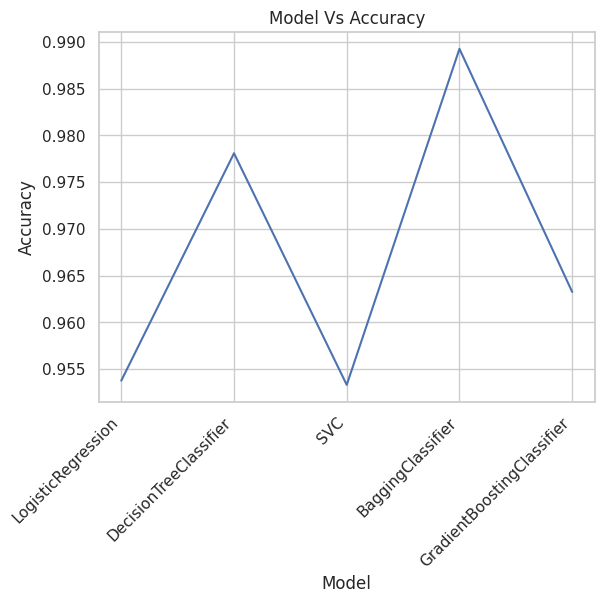

In [403]:
import matplotlib.pyplot as plt
plt.plot(names, accuracy)
plt.title('Model Vs Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

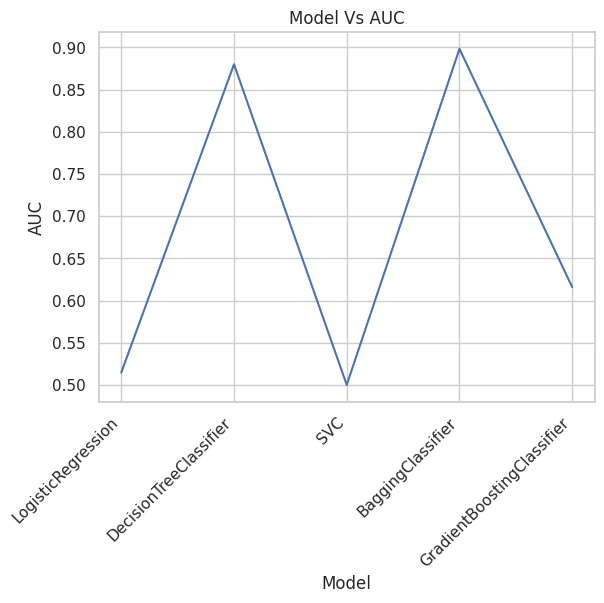

In [404]:
plt.plot(names, auc)
plt.title('Model Vs AUC')
plt.xlabel('Model')
plt.ylabel('AUC')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

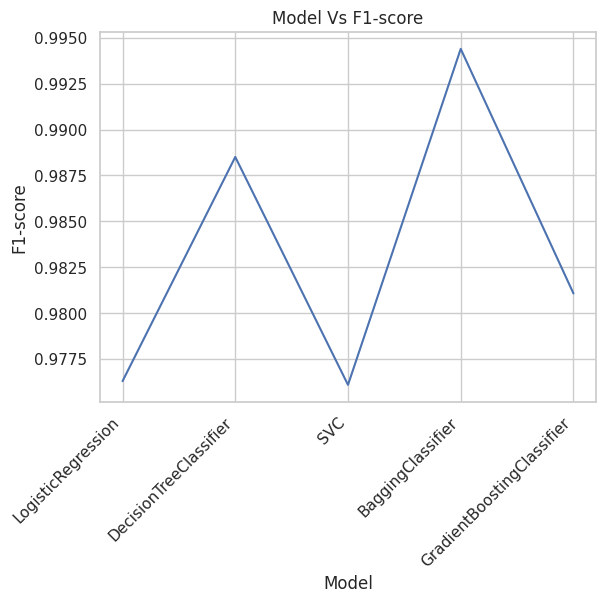

In [405]:
plt.plot(names, f_score)
plt.title('Model Vs F1-score')
plt.xlabel('Model')
plt.ylabel('F1-score')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

In [406]:
metrics_df = loaded_metrics_df
metrics_df

Model  Loaded Accuracy  Loaded Precision  \
0          LogisticRegression         0.953774          0.954630   
1      DecisionTreeClassifier         0.978098          0.988820   
2                         SVC         0.953324          0.953324   
3           BaggingClassifier         0.989263          0.990192   
4  GradientBoostingClassifier         0.963268          0.963762   

   Loaded Recall  Loaded F1-Score  Loaded AUC  
0       0.998988         0.976306    0.514646  
1       0.988198         0.988509    0.880004  
2       1.000000         0.976104    0.500000  
3       0.998629         0.994393    0.898304  
4       0.999033         0.981081    0.615908

Evaluate your classification models_

In [407]:
%%time
# 6min 22s
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize lists to store evaluation metrics
rmse_clf = []
mae_clf = []
mse_clf = []


#for i in range(len(models)):
    #clf = models[i].fit(X_train, y_train)
    #y_pred = models[i].predict(X_test)
for i, filename in enumerate(model_filenames):
    # Load the model
    loaded_model = joblib.load(filename)
    
    # Predict and evaluate the loaded model
    y_pred = loaded_model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_clf.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_clf.append(mae)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_clf.append(mse)
    
    # Store the model name
    #model_names.append(names[i])
    
# Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': names,
    'RMSE': rmse_clf,
    'MAE': mae_clf,
    'MSE': mse_clf,
})

metrics_df

CPU times: user 3min 53s, sys: 216 ms, total: 3min 53s
Wall time: 3min 53s


Model      RMSE       MAE       MSE
0          LogisticRegression  0.215002  0.046226  0.046226
1      DecisionTreeClassifier  0.147994  0.021902  0.021902
2                         SVC  0.216047  0.046676  0.046676
3           BaggingClassifier  0.103618  0.010737  0.010737
4  GradientBoostingClassifier  0.191657  0.036732  0.036732

In [408]:
merged_df

user        item  rating  UFeature0  UFeature1  UFeature2  \
0       1889878    CC0101EN     3.0   0.080721  -0.129561   0.087998   
1       1342067    CL0101EN     3.0   0.068047  -0.112781   0.045208   
2       1990814  ML0120ENv3     3.0   0.124623   0.012910  -0.072627   
3        380098    BD0211EN     3.0  -0.034870   0.000715   0.077406   
4        779563    DS0101EN     3.0   0.106414  -0.001887  -0.017211   
...         ...         ...     ...        ...        ...        ...   
233301  1540125    DS0101EN     3.0  -0.021376  -0.081750  -0.140323   
233302  1250651    PY0101EN     3.0   0.038751  -0.045833   0.007787   
233303  1003832  CB0105ENv1     3.0   0.055601   0.032458   0.138734   
233304   922065    BD0141EN     3.0   0.098573  -0.033596   0.146387   
233305  1596120    DS0301EN     3.0   0.086088  -0.068216   0.108062   

        UFeature3  UFeature4  UFeature5  UFeature6  ...  CFeature6  CFeature7  \
0        0.030231   0.082691  -0.004176  -0.003480  ...  -0.015081  -0.012229   
1       -0.007570  -0.038382   0.068037   0.114949  ...   0.010899  -0.037610   
2        0.049935   0.020158   0.133306  -0.035366  ...  -0.012695   0.036138   
3        0.070311  -0.043007  -0.035446   0.032846  ...  -0.005700  -0.006068   
4       -0.042277  -0.074953  -0.056732   0.074610  ...  -0.010015  -0.001514   
...           ...        ...        ...        ...  ...        ...        ...   
233301   0.018257   0.070857  -0.150106  -0.101541  ...  -0.010015  -0.001514   
233302   0.054884   0.008866  -0.016915  -0.007734  ...  -0.006246  -0.001485   
233303  -0.103575  -0.040634   0.019715  -0.024687  ...  -0.004814   0.032963   
233304   0.002943   0.111133  -0.100475   0.097536  ...   0.002402   0.003107   
233305   0.024128   0.017642   0.134119  -0.025169  ...   0.004296   0.008389   

        CFeature8  CFeature9  CFeature10  CFeature11  CFeature12  CFeature13  \
0        0.015686   0.008401   -0.035495    0.009381   -0.032560   -0.007292   
1       -0.019397  -0.025682   -0.000620    0.038803    0.000196   -0.045343   
2        0.019965   0.018686   -0.010450   -0.050011    0.013845   -0.044454   
3       -0.005792  -0.023036    0.015999   -0.023480    0.015469    0.022221   
4       -0.017598   0.003590    0.016799    0.002732    0.005162    0.015031   
...           ...        ...         ...         ...         ...         ...   
233301  -0.017598   0.003590    0.016799    0.002732    0.005162    0.015031   
233302   0.007065  -0.003130    0.007294   -0.000657    0.006152   -0.001489   
233303  -0.018020   0.013813   -0.048995    0.009753   -0.019230   -0.042314   
233304  -0.019846   0.013243    0.010134    0.016171   -0.019714   -0.005965   
233305  -0.000931  -0.025427    0.021304    0.015580   -0.003242    0.010813   

        CFeature14  CFeature15  
0         0.000966   -0.006218  
1         0.012863    0.019429  
2        -0.001480   -0.007559  
3        -0.023115   -0.001785  
4        -0.000877   -0.021283  
...            ...         ...  
233301   -0.000877   -0.021283  
233302    0.015253    0.000122  
233303   -0.022855    0.008192  
233304   -0.014285    0.006799  
233305    0.000023    0.015307  

[233306 rows x 35 columns]

In [409]:
u_features = [f'UFeature{i}' for i in range(16)]
c_features = [f'CFeature{i}' for i in range(16)]

In [410]:
def recommend_courses_for_user(models, model_names, target_users, merged_df, item_emb, ratings_df, n_latent_dim=16):
    recommendations = []

    # Define user and course features
    #u_features = [f"UFeature{i}" for i in range(n_latent_dim)]
    #c_features = [f"CFeature{i}" for i in range(n_latent_dim)]

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for model, model_name in zip(models, model_names):
        for user_id in target_users:
            user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

            # Get items enrolled by the user
            enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

            for item_id in all_items:
                if item_id in enrolled_items:
                    continue

                # Get course embeddings
                course_embeddings = item_emb[item_emb['item'] == item_id][c_features].values[0]

                # Combine user and course embeddings
                features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)
                # Combine user and course embeddings using pd.concat
                #features_df = pd.concat([pd.Series(user_embeddings, index=u_features), pd.Series(course_embeddings, index=c_features)]).to_frame().T
                
                # Predict using the model's probability estimates
                if hasattr(model, "predict_proba"):
                    predicted_proba = model.predict_proba(features)[0][1]  # Probability of class 1
                    # Calculate predicting score (%) within [0, 100]
                    predicted_score = round(predicted_proba * 100, 2)
                else:
                    predicted_proba = model.decision_function(features)[0]
                    predicted_score = round((predicted_proba - predicted_proba.min()) / (predicted_proba.max() - predicted_proba.min()) * 100, 2)
                
                # Clip predicted rating to ensure it's within [0, 1]
                #predicted_rating = np.clip(predicted_rating, 0, 1)
                
                # Calculate predicting score (%) within [0, 100]
                #predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

                recommendations.append({
                    'user_id': user_id,
                    'item_id': item_id,
                    'predicted_rating': predicted_proba,
                    'predicted_score (%)': predicted_score,
                    'model': model_name
                })

    return pd.DataFrame(recommendations)

# Define a path to the folder where you want to read and load the models
#path = '/kaggle/input/task003-p003-ml-dl-ncf-hist-20231101/'

# Generate the list of model filenames dynamically based on the provided names
#model_filenames = [f'{path}{name}_model.joblib' for name in names]

# Load models
#loaded_models = [joblib.load(filename) for filename in model_filenames]

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
# Load models
models = [joblib.load(filename) for filename in model_filenames]
recommendations = recommend_courses_for_user(models, names, target_users, merged_df, item_emb, ratings_df)
print(recommendations)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid

      user_id     item_id  predicted_rating  predicted_score (%)  \
0     1078030    CC0101EN      9.662710e-01                96.63   
1     1078030    CL0101EN      9.497841e-01                94.98   
2     1078030  ML0120ENv3      8.693051e-01                86.93   
3     1078030    BD0211EN      9.575368e-01                95.75   
4     1078030    DS0101EN      9.602578e-01                96.03   
...       ...         ...               ...                  ...   
2280  2057052    DB0113EN      1.000000e+00               100.00   
2281  2057052    DX0108EN      1.000000e+00               100.00   
2282  2057052      DS0107      3.082353e-07                 0.00   
2283  2057052    DB0115EN      2.456628e-06                 0.00   
2284  2057052  GPXX0QR3EN      9.784381e-01                97.84   

                           model  
0             LogisticRegression  
1             LogisticRegression  
2             LogisticRegression  
3             LogisticRegression  
4       

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py

#### Applying to functions

We apply the functions in previous embedding for regression, which are emb_create, emb_data_prep and emb_ds_create

### Function 1 Knn Classifier (We use the embedding model instead of the classification model)

In [411]:
def emb_classifier_train(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y.values.ravel())
    knn_emb = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
    knn_emb.fit(X, y)

    return knn_emb

In [412]:
%%time
# Prepare data
df_prepared, user_id2idx, item_id2idx = emb_data_prep(ratings_df)

# Create TensorFlow datasets
targets = ['rating']
ds_train, ds_val, ds_test = emb_ds_create(df_prepared, targets)

# Train embedding model
emb_model_all, user_emb_model_all, item_emb_model_all = emb_train(ds_train, df_prepared)


Epoch 1/10
319/319 [==============================] - 4s 8ms/step - loss: 0.8498 - root_mean_squared_error: 0.9218
Epoch 2/10
319/319 [==============================] - 3s 8ms/step - loss: 0.1992 - root_mean_squared_error: 0.4462
Epoch 3/10
319/319 [==============================] - 3s 8ms/step - loss: 0.1357 - root_mean_squared_error: 0.3681
Epoch 4/10
319/319 [==============================] - 3s 8ms/step - loss: 0.0894 - root_mean_squared_error: 0.2987
Epoch 5/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0611 - root_mean_squared_error: 0.2468
Epoch 6/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0495 - root_mean_squared_error: 0.2221
Epoch 7/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0462 - root_mean_squared_error: 0.2146
Epoch 8/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0455 - root_mean_squared_error: 0.2129
Epoch 9/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0454

In [413]:
import pandas as pd
import tensorflow as tf

def emb_classifier_predict(model, target_users, regression_dataset_1) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on Embedding model predictions - without regression.
    """
    recommendations = pd.DataFrame()

    user_list = regression_dataset_1["user"].unique().tolist()
    item_list = regression_dataset_1["item"].unique().tolist()
    items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

    for user_id in target_users:
        if user_id not in user_list:
            continue

        mapped_user_id = user_list.index(user_id)
        enrolled_courses = set(regression_dataset_1[regression_dataset_1['user'] == user_id]['item'].tolist())

        active_user_df = pd.DataFrame({
            'user': [mapped_user_id] * len(items_id2idx),
            'item': list(items_id2idx.values())
        })

        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user': active_user_df['user'].values.astype('int32'),
            'item': active_user_df['item'].values.astype('int32')
        })).batch(512)

        classifier_predictions = model.predict(ds_pred)

        active_user_df['classifier_prediction'] = classifier_predictions.flatten()
        results_df = active_user_df[~active_user_df['item'].isin(enrolled_courses)]
        results_df['score'] = round((results_df['classifier_prediction'] * 100) / 3, 2)
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item'].map({v: k for k, v in items_id2idx.items()})

        recommendations = pd.concat([recommendations, results_df])

    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False]).reset_index(drop=True)
    return recommendations[['user_id', 'item_id', 'score']]

In [414]:
regression_df

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0      -0.009104 -0.031582 -0.002741 -0.006660  0.013352  0.008702 -0.008720   
1       0.043769 -0.009931  0.016067 -0.017955  0.011852 -0.014467  0.003767   
2       0.011895 -0.017028  0.024164 -0.005424 -0.003390 -0.001114 -0.030274   
3      -0.001009  0.023253  0.011385 -0.012017 -0.004634 -0.020196 -0.007890   
4      -0.000415 -0.001053 -0.007898 -0.005878 -0.000215 -0.005804  0.001103   
...          ...       ...       ...       ...       ...       ...       ...   
233301 -0.006730 -0.029590 -0.018405  0.014522  0.012738 -0.010256 -0.015765   
233302  0.002879  0.005240  0.004611  0.005394 -0.018956 -0.007150 -0.001469   
233303  0.002602  0.028023 -0.002730  0.019315  0.014012 -0.030210 -0.016839   
233304 -0.005322 -0.022707  0.012347  0.007529 -0.008510  0.005160  0.012111   
233305  0.012046 -0.006214  0.008314 -0.000931  0.014969 -0.006353 -0.034785   

        Feature7  Feature8  Feature9  ...  Feature25  Feature26  Feature27  \
0       0.006192  0.011277 -0.005567  ...  -0.044622  -0.022995  -0.133087   
1       0.001099  0.019040  0.017901  ...  -0.176419   0.170973  -0.000048   
2       0.013314 -0.003435  0.006299  ...   0.112613  -0.139270  -0.036150   
3      -0.000175  0.005846 -0.016393  ...   0.046909  -0.100919   0.067669   
4      -0.007512 -0.011390 -0.011680  ...  -0.098737   0.181562   0.101118   
...          ...       ...       ...  ...        ...        ...        ...   
233301  0.016966  0.004335 -0.003753  ...  -0.098737   0.181562   0.101118   
233302 -0.024251 -0.002539  0.006098  ...   0.209721  -0.042117   0.259077   
233303 -0.000608  0.006362  0.020204  ...   0.041062  -0.181293  -0.037783   
233304 -0.010480 -0.001937 -0.013815  ...  -0.141196   0.111029  -0.081045   
233305 -0.016742  0.003557  0.004747  ...   0.122136   0.130199   0.165767   

        Feature28  Feature29  Feature30  Feature31  rating     user  \
0       -0.059798   0.113473  -0.036137  -0.058259     3.0  1889878   
1        0.101805   0.075051  -0.073747   0.082064     3.0  1342067   
2       -0.055199  -0.181499   0.047297   0.075294     3.0  1990814   
3       -0.031602  -0.114041  -0.087556  -0.048076     3.0   380098   
4       -0.245138   0.152436   0.074548   0.028894     3.0   779563   
...           ...        ...        ...        ...     ...      ...   
233301  -0.245138   0.152436   0.074548   0.028894     3.0  1540125   
233302  -0.162233   0.231140   0.006840   0.088145     3.0  1250651   
233303   0.234773   0.068856   0.090949   0.209338     3.0  1003832   
233304  -0.037068  -0.114174   0.215396  -0.122252     3.0   922065   
233305  -0.283940  -0.089363  -0.131699  -0.003483     3.0  1596120   

              item  
0         CC0101EN  
1         CL0101EN  
2       ML0120ENv3  
3         BD0211EN  
4         DS0101EN  
...            ...  
233301    DS0101EN  
233302    PY0101EN  
233303  CB0105ENv1  
233304    BD0141EN  
233305    DS0301EN  

[233306 rows x 35 columns]

In [415]:
%%time

# Train Ridge regression model
knn_clas_model = emb_classifier_train(regression_df)

# Example output
target_users = [1078030, 733707, 674939, 2057052]
# Call the functions
# Call the function
recommendations = emb_classifier_predict(emb_model_all, target_users, regression_df)
print(recommendations)


1/1 [==============================] - 0s 9ms/step
     user_id   item_id      score
0     674939  BENTEST4  98.820000
1     674939  CL0101EN  98.790001
2     674939  ML0120EN  98.779999
3     674939  DX0106EN  98.739998
4     674939  PA0103EN  98.709999
..       ...       ...        ...
499  2057052  DB0111EN  97.730003
500  2057052  DB0115EN  97.699997
501  2057052  CC0101EN  97.669998
502  2057052  CO0401EN  97.669998
503  2057052  DS0132EN  97.239998

[504 rows x 3 columns]
CPU times: user 273 ms, sys: 17 ms, total: 290 ms
Wall time: 284 ms


In [416]:
import pandas as pd
import tensorflow as tf

def emb_classifier_predict(model, target_users, regression_dataset_1) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on Embedding model predictions.
    """
    recommendations = pd.DataFrame()

    user_list = regression_dataset_1["user"].unique().tolist()
    item_list = regression_dataset_1["item"].unique().tolist()
    items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

    for user_id in target_users:
        if user_id not in user_list:
            continue

        mapped_user_id = user_list.index(user_id)
        enrolled_courses = set(regression_dataset_1[regression_dataset_1['user'] == user_id]['item'].tolist())

        active_user_df = pd.DataFrame({
            'user': [mapped_user_id] * len(items_id2idx),
            'item': list(items_id2idx.values())
        })

        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user': active_user_df['user'].values.astype('int32'),
            'item': active_user_df['item'].values.astype('int32')
        })).batch(512)

        # Predict using the model
        predictions = model.predict(ds_pred)
        
        # Assuming predictions are probabilities or logits
        if predictions.ndim == 2 and predictions.shape[1] > 1:
            predicted_proba = predictions[:, 1]  # Probability of class 1
        else:
            predicted_proba = predictions.squeeze()  # If it's a single output per item
        
        predicted_score = predicted_proba * 100-200

        active_user_df['predicted_proba'] = predicted_proba
        active_user_df['predicted_score'] = predicted_score
        results_df = active_user_df[~active_user_df['item'].isin(enrolled_courses)]
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item'].map({v: k for k, v in items_id2idx.items()})

        recommendations = pd.concat([recommendations, results_df])

    recommendations = recommendations.sort_values(by=['user_id', 'predicted_score'], ascending=[True, False]).reset_index(drop=True)
    return recommendations[['user_id', 'item_id', 'predicted_score']]

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
# Call the function
recommendations = emb_classifier_predict(emb_model_all, target_users, regression_df)
print(recommendations)


1/1 [==============================] - 0s 10ms/step
     user_id   item_id  predicted_score
0     674939  BENTEST4        96.463501
1     674939  CL0101EN        96.361481
2     674939  ML0120EN        96.332001
3     674939  DX0106EN        96.225342
4     674939  PA0103EN        96.119049
..       ...       ...              ...
499  2057052  DB0111EN        93.199982
500  2057052  DB0115EN        93.090790
501  2057052  CO0401EN        93.013885
502  2057052  CC0101EN        93.011566
503  2057052  DS0132EN        91.715942

[504 rows x 3 columns]


We are still utiizing the embedding model only instead of the classification model

### Create Recommender System using Bagging and GradientBoosting (the lowest RMSE)
### Function 2 Bagging Classifier

In [417]:
def emb_classifier_train_1(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y.values.ravel())
    bag_emb = BaggingClassifier(n_estimators=10, random_state=42)
    bag_emb.fit(X, y)

    return bag_emb

In [418]:
def emb_classifier_predict_1(model, target_users, regression_dataset_1) -> pd.DataFrame:
    """
    Generates course recommendations for multiple target users based on Embedding model predictions - without regression.
    """
    recommendations = pd.DataFrame()

    user_list = regression_dataset_1["user"].unique().tolist()
    item_list = regression_dataset_1["item"].unique().tolist()
    items_id2idx = {item_id: idx for idx, item_id in enumerate(item_list)}

    for user_id in target_users:
        if user_id not in user_list:
            continue

        mapped_user_id = user_list.index(user_id)
        enrolled_courses = set(regression_dataset_1[regression_dataset_1['user'] == user_id]['item'].tolist())

        active_user_df = pd.DataFrame({
            'user': [mapped_user_id] * len(items_id2idx),
            'item': list(items_id2idx.values())
        })

        ds_pred = tf.data.Dataset.from_tensor_slices(({
            'user': active_user_df['user'].values.astype('int32'),
            'item': active_user_df['item'].values.astype('int32')
        })).batch(512)

        classifier_predictions = model.predict(ds_pred)

        active_user_df['classifier_prediction'] = classifier_predictions.flatten()
        results_df = active_user_df[~active_user_df['item'].isin(enrolled_courses)]
        results_df['score'] = round((results_df['classifier_prediction'] * 100) / 3, 2) # classifier should only be 1 or 0 binary
        results_df['user_id'] = user_id
        results_df['item_id'] = results_df['item'].map({v: k for k, v in items_id2idx.items()})

        recommendations = pd.concat([recommendations, results_df])

    recommendations = recommendations.sort_values(by=['user_id', 'score'], ascending=[True, False]).reset_index(drop=True)
    return recommendations[['user_id', 'item_id', 'score']]

In [419]:
%%time
# 2min 2s
# Train Ridge regression model
bag_clas_model = emb_classifier_train_1(regression_df)

# Example output
target_users = [1078030, 733707, 674939, 2057052]
# Call the functions
# Call the function
recommendations = emb_classifier_predict_1(emb_model_all, target_users, regression_df)
print(recommendations)


1/1 [==============================] - 0s 10ms/step
     user_id   item_id      score
0     674939  BENTEST4  98.820000
1     674939  CL0101EN  98.790001
2     674939  ML0120EN  98.779999
3     674939  DX0106EN  98.739998
4     674939  PA0103EN  98.709999
..       ...       ...        ...
499  2057052  DB0111EN  97.730003
500  2057052  DB0115EN  97.699997
501  2057052  CC0101EN  97.669998
502  2057052  CO0401EN  97.669998
503  2057052  DS0132EN  97.239998

[504 rows x 3 columns]
CPU times: user 2min 14s, sys: 15.7 ms, total: 2min 14s
Wall time: 2min 14s


### Applying the Classifier Predict Model using Embedding

The two functions above still use the embediing model instead of the classifier model, so similar to regression we aplly knn, bagging and boosting in below

In [420]:
%%time 
#3min 28s
# Embeddings with Regression / Classification
def emb_create(n_user, n_item, n_user_latent_dim: int = 16, n_item_latent_dim: int = 16, reg_users: int = 1e-6, reg_items: int = 1e-6) -> keras.Model:
    user_input = Input(shape=(), dtype='int32', name='user')
    item_input = Input(shape=(), dtype='int32', name='item')

    user_embedding = Embedding(input_dim=n_user+1,
                    output_dim=n_user_latent_dim,
                    name='user_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_users)
                    )(user_input)
    user_vec = Flatten(name='user_flat')(user_embedding)
    user_bias = Embedding(input_dim=n_user+1,
                    output_dim=1,
                    name='user_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_users)
                    )(user_input)
    user_model = Model(inputs=user_input, outputs=user_vec)

    item_embedding = Embedding(input_dim=n_item+1,
                    output_dim=n_item_latent_dim,
                    name='item_embedding',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_items)
                    )(item_input)
    item_vec = Flatten(name='item_flat')(item_embedding)
    item_bias = Embedding(input_dim=n_item+1,
                    output_dim=1,
                    name='item_bias',
                    embeddings_initializer="he_normal",
                    embeddings_regularizer=l2(reg_items)
                    )(item_input)
    item_model = Model(inputs=item_input, outputs=item_vec)

    merged = Dot(name='dot', normalize=True, axes=1)([user_embedding, item_embedding])
    merged_dropout = Dropout(0.2)(merged)

    dense_1 = Dense(units=64, name='Dense_1')(merged_dropout)
    do_1 = Dropout(0.2, name='Dropout_1')(dense_1)

    dense_2 = Dense(units=32, name='Dense_2')(do_1)
    do_2 = Dropout(0.2, name='Dropout_2')(dense_2)

    dense_3 = Dense(units=16, name='Dense_3')(do_2)
    do_3 = Dropout(0.2, name='Dropout_3')(dense_3)

    dense_4 = Dense(units=8, name='Dense_4')(do_3)

    result = Dense(1, name='rating', activation='relu')(dense_4)

    model = Model(inputs=[user_input, item_input], outputs=[result])
    model._name = 'embedding_extraction_model'
    return model, user_model, item_model

def emb_data_prep(df: pd.DataFrame):
    data = df.copy()
    user_id2idx = {k: v for v, k in enumerate(data['user'].unique())}
    item_id2idx = {k: v for v, k in enumerate(data['item'].unique())}
    data['user'] = data['user'].map(user_id2idx)
    data['item'] = data['item'].map(item_id2idx)
    return data, user_id2idx, item_id2idx

def emb_ds_create(df: pd.DataFrame, targets: list, scale: bool = True, tt_split: int = 0.8, val_split: int = 0.1, batch_size: int = 512, rs: int = 42):
    n_val = round(df.shape[0] * val_split)
    n_split = round(df.shape[0] * tt_split)

    x_train = df.iloc[:n_split, :]
    x_test = df.iloc[n_split:, :]

    if rs: x_train = x_train.sample(frac=1, random_state=rs).to_dict('series')
    else:  x_train = x_train.to_dict('series')

    y_train = dict()
    y_test = dict()
    for t in targets:
        y_train[t] = x_train.pop(t)
        y_test[t] = x_test.pop(t)
    
    ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

    ds_val = ds_train.take(n_val).batch(batch_size=batch_size)
    ds_train = ds_train.skip(n_val).batch(batch_size=batch_size)
    ds_test = ds_test.batch(batch_size=batch_size)

    return ds_train, ds_val, ds_test

def emb_train(ds: tf.data.Dataset, df: pd.DataFrame, epochs: int = 10):
    num_users = len(df['user'].unique())
    num_items = len(df['item'].unique())
    emb_model_all, user_emb_model_all , item_emb_model_all = emb_create(n_user=num_users, n_item=num_items)
    #emb_model_all.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=tf.keras.metrics.RootMeanSquaredError())
    emb_model_all.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=tf.keras.metrics.BinaryAccuracy())
    emb_model_all_hist = emb_model_all.fit(ds, epochs=epochs)
    return emb_model_all, user_emb_model_all, item_emb_model_all

def rev_dict(d: dict) -> dict:
    return {v: k for k, v in d.items()}

def reg_ds_create(model, user_id2idx: dict, item_id2idx: dict, df: pd.DataFrame = ratings_df):
    # Get user and item embedding matrices
    user_embedding_matrix = model.get_layer('user_embedding').get_weights()[0]
    item_embedding_matrix = model.get_layer('item_embedding').get_weights()[0]

    # Create DataFrames for Embeddings
    # - convert the embedding matrices into DataFrames with column names UFeature0, UFeature1, ..., UFeature15 for users and IFeature0, IFeature1, ..., IFeature15 for items.
    df_uem = pd.DataFrame(user_embedding_matrix, columns=[f'UFeature{i}' for i in range(16)]) 
    df_iem = pd.DataFrame(item_embedding_matrix, columns=[f'IFeature{i}' for i in range(16)])
    
    # Insert user_ids
    # - create a dataFrame from user_id2idx with user IDs and merge it with the user embedding dataFrame.
    if not 'user' in df_uem.columns:
        user = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').rename({0: 'user'}, axis=1) # user_df = pd.DataFrame.from_dict(rev_dict(user_id2idx), orient='index').reset_index().rename(columns={'index': 'user', 0: 'user_idx'}) - is not unique
        df_uem = user.merge(df_uem, left_index=True, right_index=True) # df_uem = user_df.set_index('user_idx').join(df_uem).reset_index().rename(columns={'user_idx': 'user'})

    # Insert item_ids
    # - create a dataFrame from item_id2idx with item IDs and merge it with the item embedding dataFrame
    if not 'item' in df_iem.columns:
        items = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').rename({0: 'item'}, axis=1) # item_df = pd.DataFrame.from_dict(rev_dict(item_id2idx), orient='index').reset_index().rename(columns={'index': 'item', 0: 'item_idx'})
        df_iem = items.merge(df_iem, left_index=True, right_index=True) # df_iem = item_df.set_index('item_idx').join(df_iem).reset_index().rename(columns={'item_idx': 'item'})

    # Merge user embedding and course embedding features (ratings data)
    # - merge the original ratings dataframe with the user and item embedding dataFrames.
    merged_df = pd.merge(ratings_df, df_uem, how='left', left_on='user', right_on='user').fillna(0)
    merged_df = pd.merge(merged_df, df_iem, how='left', left_on='item', right_on='item').fillna(0)
    
    # Extract features and prepare regression dataset
    u_features = [f"UFeature{i}" for i in range(16)]
    c_features = [f"IFeature{i}" for i in range(16)]

    user = merged_df['user']
    item = merged_df['item']
    user_embeddings = merged_df[u_features]
    c_embeddings = merged_df[c_features]
    ratings = merged_df['rating']
    
    # Aggregate the two feature columns using element-wise add
    #regression_dataset_2 = user_embeddings + c_embeddings.values 
    regression_dataset_2 = pd.concat([user_embeddings, c_embeddings], axis=1)
    regression_dataset_2.columns = [f"Feature{i}" for i in range(2 * 16)] #regression_dataset.columns = [f"Feature{i}" for i in range(2 * 16)]
    regression_dataset_2['rating'] = ratings
    regression_dataset_2['user'] = user
    regression_dataset_2['item'] = item
    return regression_dataset_2, merged_df

def emb_classifier_train_1(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y.values.ravel())
    bag_emb = BaggingClassifier(n_estimators=10, random_state=42)
    bag_emb.fit(X, y)

    return bag_emb

def emb_classifier_predict_1(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(n_latent_dim)]
    c_features = [f'IFeature{i}' for i in range(n_latent_dim)]
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model
            predictions = model.predict(features)[0] #(ds_pred)
            # Assuming predictions are probabilities or logits
            if predictions.ndim == 2 and predictions.shape[1] > 1:
                predicted_proba = predictions[:, 1]  # Probability of class 1
            else:
                predicted_proba = predictions.squeeze()  # If it's a single output per item
        
            predicted_score = predicted_proba * 100
            
            # Predict using the model's probability estimates
                #if hasattr(model, "predict_proba"):
                    #predicted_proba = model.predict_proba(features)[0][1]  # Probability of class 1
                    # Calculate predicting score (%) within [0, 100]
                    #predicted_score = round(predicted_proba * 100, 2)
                #else:
                    #predicted_proba = model.decision_function(features)[0]
                    #predicted_score = round((predicted_proba - predicted_proba.min()) / (predicted_proba.max() - predicted_proba.min()) * 100, 2)
            
            # Clip predicted rating to ensure it's within [0, 3]
            #predicted_rating = np.clip(predicted_rating, 0, 3)
            
            # Calculate predicting score (%) within [0, 100]
            #predicted_score = round(predicted_rating * 100 / 3, 2)  # Scale back to original rating range

            if predicted_score > 50:  # Ensure predicted score is greater than 50%
                recommendations.append({
                    'user_id': user_id,
                    'item_id': item_id,
                    'predicted_rating': predicted_proba,
                    'predicted_score (%)': predicted_score,
                })
    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df


prepared_data, user_id2idx, item_id2idx = emb_data_prep(ratings_df)
print(prepared_data)
#print(user_id2idx)
#print(item_id2idx)
ds_train, ds_val, ds_test = emb_ds_create(prepared_data, targets=['rating'])
embedding_model, user_model, item_model = emb_train(ds_train, prepared_data)
regression_df, merged_df = reg_ds_create(embedding_model, user_id2idx, item_id2idx, ratings_df)
print(regression_df)
bag_clas_model = emb_classifier_train_1(regression_df)
bag_clas_model

         user  item  rating
0           0     0     3.0
1           1     1     3.0
2           2     2     3.0
3           3     3     3.0
4           4     4     3.0
...       ...   ...     ...
233301   9938     4     3.0
233302   6421    23     3.0
233303   9138    60     3.0
233304   8410     8     3.0
233305  14843     6     3.0

[233306 rows x 3 columns]
Epoch 1/10
319/319 [==============================] - 4s 8ms/step - loss: -25.8515 - binary_accuracy: 0.0000e+00
Epoch 2/10
319/319 [==============================] - 3s 8ms/step - loss: -29.7628 - binary_accuracy: 0.0000e+00
Epoch 3/10
319/319 [==============================] - 3s 8ms/step - loss: -29.7691 - binary_accuracy: 0.0000e+00
Epoch 4/10
319/319 [==============================] - 3s 8ms/step - loss: -29.7713 - binary_accuracy: 0.0000e+00
Epoch 5/10
319/319 [==============================] - 3s 10ms/step - loss: -29.7736 - binary_accuracy: 0.0000e+00
Epoch 6/10
319/319 [==============================] - 3s 9ms/step - los

BaggingClassifier(random_state=42)

In [421]:
%%time 
#10.5s
# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = emb_classifier_predict_1(bag_clas_model, target_users)
print(recommendations)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

     user_id     item_id  predicted_rating  predicted_score (%)
168   674939    CC0101EN                 1                  100
169   674939    CL0101EN                 1                  100
170   674939  ML0120ENv3                 1                  100
171   674939    DS0101EN                 1                  100
172   674939    ST0101EN                 1                  100
..       ...         ...               ...                  ...
347  2057052    DP0101EN                 1                  100
348  2057052    CB0201EN                 1                  100
349  2057052  GPXX0T0FEN                 1                  100
350  2057052   PHPM002EN                 1                  100
351  2057052    CC0271EN                 1                  100

[352 rows x 4 columns]
CPU times: user 10.5 s, sys: 40.8 ms, total: 10.5 s
Wall time: 10.5 s


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [422]:
#def emb_train(ds: tf.data.Dataset, df: pd.DataFrame, task: str = 'regression', epochs: int = 10):
    #num_users = len(df['user'].unique())
    #num_items = len(df['item'].unique())
    #emb_model_all, user_emb_model_all , item_emb_model_all = emb_create(n_user=num_users, n_item=num_items)
    
    #if task == 'regression':
        #loss = tf.keras.losses.MeanSquaredError()
        #metrics = [tf.keras.metrics.RootMeanSquaredError()]
    #elif task == 'classification':
        # Assuming binary classification for simplicity; use CategoricalCrossentropy for multi-class
        #loss = tf.keras.losses.BinaryCrossentropy()
        #metrics = [tf.keras.metrics.BinaryAccuracy()]
    #else:
        #raise ValueError("Unsupported task type. Choose 'regression' or 'classification'.")

    #emb_model_all.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(), metrics=metrics) #loss and metrics for regression and classifier are different
    #emb_model_all_hist = emb_model_all.fit(ds, epochs=epochs)
    
    #return emb_model_all, user_emb_model_all, item_emb_model_all

In [423]:
import numpy as np
import pandas as pd

def emb_classifier_predict_1(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(n_latent_dim)]
    c_features = [f'IFeature{i}' for i in range(n_latent_dim)]
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model's probability estimates
            if hasattr(model, "predict_proba"):
                predicted_proba = model.predict_proba(features)[0][1]  # Probability of class 1
                predicted_score = round(predicted_proba * 100, 2)
            else:
                predicted_proba = model.decision_function(features)[0]
                # Normalizing to [0, 100] if decision_function is used
                predicted_score = round((predicted_proba - predicted_proba.min()) / (predicted_proba.max() - predicted_proba.min()) * 100, 2)

            if predicted_score > 50:  # Ensure predicted score is greater than 50%
                recommendations.append({
                    'user_id': user_id,
                    'item_id': item_id,
                    'predicted_rating': predicted_proba,
                    'predicted_score (%)': predicted_score,
                })

    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df


In [424]:
%%time 
#10.5s
# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = emb_classifier_predict_1(bag_clas_model, target_users)
print(recommendations)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feat

     user_id     item_id  predicted_rating  predicted_score (%)
170   674939  ML0120ENv3          1.000000               100.00
180   674939    BC0101EN          1.000000               100.00
189   674939    CO0101EN          1.000000               100.00
191   674939    SC0101EN          1.000000               100.00
195   674939    CC0150EN          1.000000               100.00
..       ...         ...               ...                  ...
346  2057052    WA0103EN          0.700203                70.02
288  2057052    DS0110EN          0.675780                67.58
304  2057052    RP0151EN          0.622594                62.26
263  2057052    CB0103EN          0.594702                59.47
272  2057052    BC0201EN          0.502934                50.29

[352 rows x 4 columns]
CPU times: user 10.5 s, sys: 36.3 ms, total: 10.5 s
Wall time: 10.5 s


### Function 3 Gradient Boosting Classifier

In [425]:
def emb_classifier_train_2(ds):
    """
    Parameters
        ds  : The input dataset, which is a pandas DataFrame. The DataFrame contains the features and the target variable for regression.                 
    Returns
        lrr : The trained Ridge regression model.
    """
    # - extract Features (X) and Target (y). All rows except the last one, and all columns except the last two (2nd to last). These are the feature columns.
    # - create and train Ridge Regression Model
    # - return the trained model
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y.values.ravel())
    gradb_emb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
    gradb_emb.fit(X, y)

    return gradb_emb

In [426]:
def emb_classifier_predict_2(model, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(n_latent_dim)]
    c_features = [f'IFeature{i}' for i in range(n_latent_dim)]
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using the model's probability estimates
            if hasattr(model, "predict_proba"):
                predicted_proba = model.predict_proba(features)[0][1]  # Probability of class 1
                predicted_score = round(predicted_proba * 100, 2)
            else:
                predicted_proba = model.decision_function(features)[0]
                # Normalizing to [0, 100] if decision_function is used
                predicted_score = round((predicted_proba - predicted_proba.min()) / (predicted_proba.max() - predicted_proba.min()) * 100, 2)

            if predicted_score > 50:  # Ensure predicted score is greater than 50%
                recommendations.append({
                    'user_id': user_id,
                    'item_id': item_id,
                    'predicted_rating': predicted_proba,
                    'predicted_score (%)': predicted_score,
                })

    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df


In [427]:
%%time 
#1min 9s
# Train Ridge regression model
gradb_clas_model = emb_classifier_train_2(regression_df)

# Example usage
target_users = [1078030, 733707, 674939, 2057052]
recommendations = emb_classifier_predict_2(gradb_clas_model, target_users)
print(recommendations)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py

     user_id     item_id  predicted_rating  predicted_score (%)
213   674939    CC0101EN          0.968759                96.88
214   674939    CL0101EN          0.968759                96.88
215   674939  ML0120ENv3          0.968759                96.88
216   674939    DS0101EN          0.968759                96.88
217   674939    ST0101EN          0.968759                96.88
..       ...         ...               ...                  ...
436  2057052    DB0113EN          0.968759                96.88
437  2057052    DX0108EN          0.968759                96.88
438  2057052      DS0107          0.968759                96.88
439  2057052    DB0115EN          0.968759                96.88
440  2057052  GPXX0QR3EN          0.968759                96.88

[441 rows x 4 columns]
CPU times: user 1min 7s, sys: 33.2 ms, total: 1min 7s
Wall time: 1min 7s


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


### Apply selected three models 

In [428]:
def emb_classifier_train_3(ds):
    """
    Trains and saves classification models.
    
    Parameters
    ----------
    ds : DataFrame
        Input dataset containing features and the target variable.
        
    Returns
    -------
    None
    """
    # Initialize models
    models = [
        BaggingClassifier(n_estimators=10, random_state=42),
        GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
        KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
    ]
    names = ['BaggingClassifier', 'GradientBoostingClassifier','KNeighborsClassifier']
    
    # Extract features (X) and target (y)
    X = ds.iloc[:, :-3]
    y = ds.iloc[:, -3]
    
    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y.values.ravel())
    
    for i, model in enumerate(models):
        model.fit(X, y)
        joblib.dump(model, f"{names[i]}.pkl")
        print(f"{names[i]} model saved as {names[i]}.pkl")

In [429]:
import numpy as np
import pandas as pd

def emb_classifier_predict_3(models, target_users, n_latent_dim=16) -> pd.DataFrame:
    u_features = [f'UFeature{i}' for i in range(16)]
    c_features = [f'IFeature{i}' for i in range(16)]
    model_names = ['BaggingClassifier', 'GradientBoostingClassifier','KNeighborsClassifier']
    recommendations = []

    # Get all unique items
    all_items = ratings_df['item'].unique().tolist()

    for user_id in target_users:
        user_embeddings = merged_df[merged_df['user'] == user_id][u_features].values[0]

        # Get items enrolled by the user
        enrolled_items = ratings_df[ratings_df['user'] == user_id]['item'].tolist()

        for item_id in all_items:
            if item_id in enrolled_items:
                continue

            # Get course embeddings
            course_embeddings = merged_df[merged_df['item'] == item_id][c_features].values[0]

            # Combine user and course embeddings
            features = np.concatenate([user_embeddings, course_embeddings]).reshape(1, -1)

            # Predict using each model's probability estimates
            for model, model_name in zip(models, model_names): #for model in models:
                if hasattr(model, "predict_proba"):
                    predicted_proba = model.predict_proba(features)[0][1]  # Probability of class 1
                    predicted_score = round(predicted_proba * 100, 2)
                else:
                    predicted_proba = model.decision_function(features)[0]
                    # Normalize decision function output to [0, 100]
                    predicted_score = round((predicted_proba - np.min(predicted_proba)) / (np.max(predicted_proba) - np.min(predicted_proba)) * 100, 2)

                if predicted_score > 50:  # Ensure predicted score is greater than 50%
                    recommendations.append({
                        'user_id': user_id,
                        'item_id': item_id,
                        'model': model_name,
                        'predicted_rating': predicted_proba,
                        'predicted_score (%)': predicted_score,
                    })

    # Create a DataFrame from the recommendations
    recommendations_df = pd.DataFrame(recommendations)
    
    # Sort the recommendations by user_id and predicted_rating in descending order
    recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False], inplace=True)

    return recommendations_df

In [430]:
%%time
#3min 25s
# Train classifier
emb_classifier_train_3(regression_df)

BaggingClassifier model saved as BaggingClassifier.pkl
GradientBoostingClassifier model saved as GradientBoostingClassifier.pkl
KNeighborsClassifier model saved as KNeighborsClassifier.pkl
CPU times: user 2min 45s, sys: 45 ms, total: 2min 45s
Wall time: 2min 46s


In [431]:
# Example usage
# Assuming regression_dataset_1 is your dataset containing user-item features and ratings
target_users = [1078030, 733707, 674939, 2057052]
models = [
    joblib.load('BaggingClassifier.pkl'),
    joblib.load('GradientBoostingClassifier.pkl'),
    joblib.load('KNeighborsClassifier.pkl')
]
recommendations = emb_classifier_predict_3(models, target_users, regression_df)
print(recommendations)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X doe

     user_id     item_id                 model  predicted_rating  \
551   674939    CC0101EN  KNeighborsClassifier          1.000000   
555   674939  ML0120ENv3     BaggingClassifier          1.000000   
557   674939  ML0120ENv3  KNeighborsClassifier          1.000000   
566   674939    DS0301EN  KNeighborsClassifier          1.000000   
569   674939    DS0105EN  KNeighborsClassifier          1.000000   
..       ...         ...                   ...               ...   
980  2057052    RP0151EN     BaggingClassifier          0.622594   
883  2057052    BC0201EN  KNeighborsClassifier          0.600000   
982  2057052    RP0151EN  KNeighborsClassifier          0.600000   
856  2057052    CB0103EN     BaggingClassifier          0.594702   
881  2057052    BC0201EN     BaggingClassifier          0.502934   

     predicted_score (%)  
551               100.00  
555               100.00  
557               100.00  
566               100.00  
569               100.00  
..                   

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [432]:
recommendations

user_id     item_id                 model  predicted_rating  \
551   674939    CC0101EN  KNeighborsClassifier          1.000000   
555   674939  ML0120ENv3     BaggingClassifier          1.000000   
557   674939  ML0120ENv3  KNeighborsClassifier          1.000000   
566   674939    DS0301EN  KNeighborsClassifier          1.000000   
569   674939    DS0105EN  KNeighborsClassifier          1.000000   
..       ...         ...                   ...               ...   
980  2057052    RP0151EN     BaggingClassifier          0.622594   
883  2057052    BC0201EN  KNeighborsClassifier          0.600000   
982  2057052    RP0151EN  KNeighborsClassifier          0.600000   
856  2057052    CB0103EN     BaggingClassifier          0.594702   
881  2057052    BC0201EN     BaggingClassifier          0.502934   

     predicted_score (%)  
551               100.00  
555               100.00  
557               100.00  
566               100.00  
569               100.00  
..                   ...  
980                62.26  
883                60.00  
982                60.00  
856                59.47  
881                50.29  

[1145 rows x 5 columns]

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute</h1></div>

# Summary
We have built classification models to predict categorical course ratings using the embedding feature vectors extracted from neural networks.
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The classification models to predict categorical course ratings using the embedding feature vectors extracted from neural networks filtering results
    <li>Provide insights into which features contribute to a specific rating class.
    <li>Easier to understand the distinctions between various user preferences.
    <li>Classification is well-suited for scenarios where the ratings are discrete and categorical, such as a system where users provide ratings on a scale (e.g., 1 to 5 stars).
</ol>

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Conclussion</h1></div>

In [433]:
# Drop the 'MAE' and 'MSE' columns
metrics_df = metrics_df.drop(['MAE', 'MSE'], axis=1)

In [434]:
# Assuming 'names' and 'values' are already defined

names = ['KNN','KNN_clf', 'NMF', 'NMF_clf', 'NN', 'NN_1','Regression' ]
values = [rmse_knn, rmse_knn_clf, rmse_nmf, rmse_nmf_clf, rmse_nn, rmse_nn_1, rmse_lm,]

# Create a new DataFrame
metric_df_col_fil = pd.DataFrame({
    'Model': names,
    'RMSE': values,
})

# Concatenate the new DataFrame with the existing one
metric_df_col_fil = pd.concat([ metric_df_col_fil,metrics_df], ignore_index=True)

metric_df_col_fil

Model      RMSE
0                          KNN  0.193414
1                      KNN_clf  0.177009
2                          NMF  0.208909
3                      NMF_clf  0.177009
4                           NN  0.522697
5                         NN_1  0.594833
6                   Regression  2.970994
7           LogisticRegression  0.215002
8       DecisionTreeClassifier  0.147994
9                          SVC  0.216047
10           BaggingClassifier  0.103618
11  GradientBoostingClassifier  0.191657

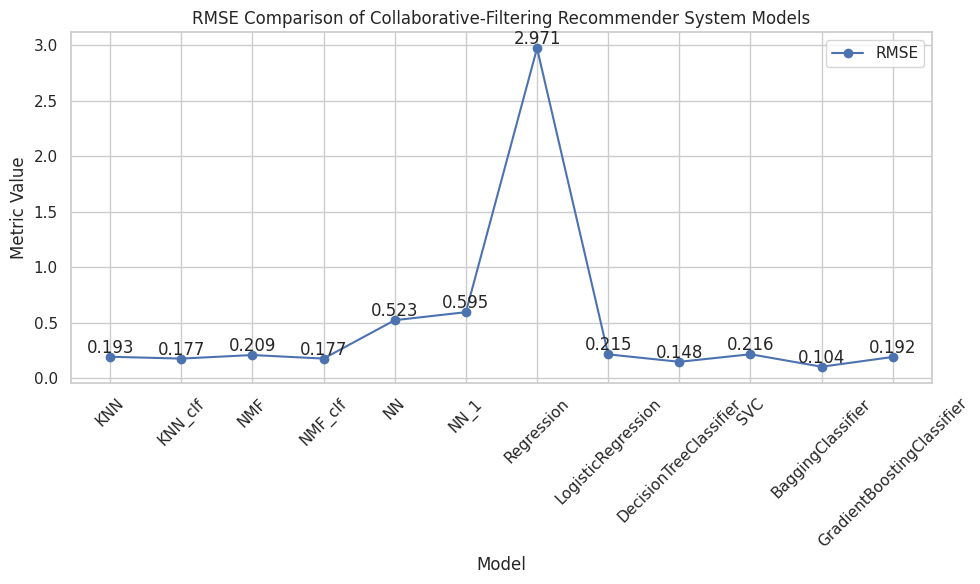

In [435]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
for metric in metric_df_col_fil.columns[1:]:
    plt.plot(metric_df_col_fil['Model'], metric_df_col_fil[metric], marker='o', label=metric)

# Adding title and labels
plt.title('RMSE Comparison of Collaborative-Filtering Recommender System Models')
plt.xlabel('Model')
plt.ylabel('Metric Value')

# Adding legend
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Showing grid
plt.grid(True)

# Adding y-value labels
for metric in metric_df_col_fil.columns[1:]:
    for i, value in enumerate(metric_df_col_fil[metric]):
        plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')

# Showing the plot
plt.tight_layout()
plt.show()

# Conclussion
We have built collaborative-filtering recommender system models  using supervised learning. The results differ from the first version of first to fourt version of this notebook.

To determine the best recommender system based on the RMSE data provided, we need to choose the model with the lowest RMSE value because RMSE measures the average deviation of predicted values from actual values. The lower the RMSE, the better the model's performance in terms of accuracy.

<ul>Based on the given the models and RMSE values:
<li>BaggingClassifier: 0.104
<li>DecisionTreeClassifier: 0.148
<li>NMF_clf: 0.172
<li>KNN_clf: 0.172
<li>GradientBoostingClassifier: 0.192
<li>KNN: 0.192
<li>NMF: 0.208
<li>LogisticRegression: 0.215
<li>SVC: 0.216
<li>NN: 0.483
<li>NN_1: 0.575
<li>Regression: 2.971
</ul>
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The Result
    <li>The BaggingClassifier has the lowest RMSE (0.104), indicating better performance in predicting ratings or recommendations among the provided models.
    <li>From the provided list, models such as DecisionTreeClassifier (RMSE: 0.148) and BaggingClassifier (RMSE: 0.104) are typically less computationally expensive compared to neural network models like NN and NN_1.
    <li>If you're exploring the structure or patterns within the data without labeled examples, unsupervised learning is more appropriate. It can help in understanding the underlying structure of the data and finding hidden patterns.
    <li>Unsupervised learning algorithms like k-means clustering can be useful for segmenting data into distinct groups based on similarities.
    <li>Techniques like Principal Component Analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE) are used for dimensionality reduction and visualization, which can be valuable for understanding high-dimensional data.
     <li>Unsupervised learning is often used for anomaly detection where the goal is to identify rare events or outliers in the data.
     <li>If you have a sufficient amount of labeled data, supervised learning models can be a good choice. For example, in classification or regression tasks where you have labeled examples of input-output pairs, supervised learning can be effective.
     <li>When the objective is well-defined and can be framed as predicting an outcome based on input features, supervised learning is suitable. For example, predicting customer churn, spam detection, sentiment analysis, etc.
     <li>Supervised learning models are evaluated based on metrics like accuracy, precision, recall, F1-score, etc., which make it easier to assess model performance.
     <li>Sometimes, a combination of supervised and unsupervised learning techniques is used, known as semi-supervised learning. This can be beneficial when labeled data is limited but unlabeled data is abundant.

</ol>

<h3> All documents are available in the <a href="https://github.com/whyzie/Task003-ML-DL-Rec-Sys-Course-20231201">Github.</a></h3>

In [436]:
from IPython.display import display, HTML
# Link HTML files for pages
output_file_01 = "https://www.kaggle.com/wahyuardhitama/task003-p001-ml-dl-rec-sys-course-20231025"
output_file_02 = "https://www.kaggle.com/wahyuardhitama/task003-p002-ml-dl-rec-sys-course-20231029"

# Display links to the saved HTML files
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_01}' target='_blank' style='font-size: 18px;'>P01 </a>or <a href='{output_file_02}' target='_blank' style='font-size: 18px;'>P02.</a></p>"))